In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys
import galsim

sys.path.insert(0,'../scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils, plot
from tools_for_VAE import vae_functions, model, plot, generator, results_processing, utils
from tools_for_VAE.utils import load_vae_conv, denorm, norm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#%run ../scripts/Images_generation/cosmos_generation.py

In [ ]:
training_or_test = 'test'
data_dir = '/sps/lsst/users/barcelin/data/single_galaxies/28/' + training_or_test
root = 'galaxies_isolated_20191022'

In [ ]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
redshift        10000 non-null float64
moment_sigma    10000 non-null float64
e1              10000 non-null float64
e2              10000 non-null float64
SNR             10000 non-null float64
SNR_peak        10000 non-null float64
mag             10000 non-null float64
dtypes: float64(7)
memory usage: 547.0 KB


In [7]:
df.head()

redshift  moment_sigma        e1        e2        SNR   SNR_peak       mag
0    0.3728      2.347043  0.123473  0.551234  25.521063  78.083646  0.106139
1    0.8144      1.588691 -0.308641  0.319644  27.097584  28.553894  0.051122
2    0.3027      1.925562 -0.047280  0.186962  26.750065  31.614044  0.049189
3    0.1544      1.721385  0.013249  0.483021  27.235385  20.546669  0.034981
4    0.7710      1.846338  0.556189 -0.080457  27.696793  14.423821  0.022528

In [8]:
df.describe()

redshift  moment_sigma            e1            e2           SNR  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.085139      2.028924     -0.002715      0.000819     26.647066   
std        0.797212      0.451629      0.290762      0.291197      1.202988   
min        0.006500      1.488476     -1.227877     -1.600182     20.509111   
25%        0.497700      1.725604     -0.181699     -0.175791     26.184397   
50%        0.873850      1.909301     -0.003473     -0.002153     26.987763   
75%        1.389000      2.175293      0.173908      0.179882     27.494682   
max        5.208000      5.651824      1.606169      1.998942     27.999770   

           SNR_peak           mag  
count  10000.000000  10000.000000  
mean      67.019950      0.103415  
std      158.950453      0.295221  
min        4.730731      0.005445  
25%       16.947182      0.027042  
50%       25.998395      0.041093  
75%       49.523470      0.074014  
max     2699.164172      7.703596

27.999769667522912

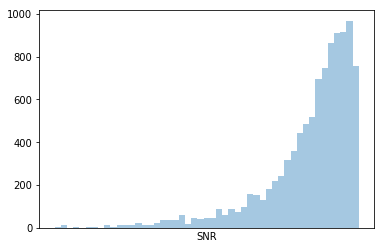

In [9]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')
np.max(df['SNR'])

In [10]:
i = 0
galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(i)), mmap_mode = 'c')

In [11]:
galaxies.shape

(10000, 2, 10, 64, 64)

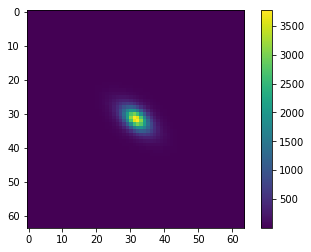

In [12]:
plt.imshow(galaxies[0][0][6])
plt.colorbar()

In [13]:
PSF = galsim.Kolmogorov(fwhm=0.65)
r_band = 6
pix_scale = 0.2
count = 0

psf_image = PSF.drawImage(nx=64, ny=64, scale=0.2)
e_beta = np.sqrt(df['e1']**2+df['e2']**2)
print(e_beta.shape, e_beta[0])
e = []

for i in range(len(galaxies)):
    gal_image = galsim.Image(galaxies[i][0][r_band,:,:])
    gal_image.scale = pix_scale

    # Measurements of shapes
    res = galsim.hsm.EstimateShear(gal_image, psf_image)
    e_beta_in = [res.observed_shape.e]#[e_beta[i]]#
    print(e_beta_in)
    e.append(e_beta_in)

e_beta = np.array(e)

(10000,) 0.5648933218765233
[0.4639183010238389]
[0.09317689893359671]
[0.13445009524632986]
[0.14777402445294188]
[0.2951380620922854]
[0.050613694883431995]
[0.05823989550659889]
[0.528327959759617]
[0.3393267590037265]
[0.058471257515096624]
[0.3766948275364702]
[0.36223989846002824]
[0.017145068299390387]
[0.8915371862913847]
[0.09657013237696606]
[0.4073624171419524]
[0.012579553618996339]
[0.18773667402397287]
[0.602214841460253]
[0.12048096746828264]
[0.6022533677811911]
[0.20097813498150388]
[0.10697300140729926]
[0.2513617691228049]
[0.4355792365757571]
[0.2697768323116835]
[0.1662764794588284]
[0.21208304821697904]
[0.6016021171734776]
[0.677571335642558]
[0.35531937928052565]
[0.3435840479896146]
[0.19881746271808926]
[0.2959263797494568]
[0.19135846513143645]
[0.017876601963569255]
[0.13271770637422375]
[0.3989437251787406]
[0.08313369965047843]
[0.11036441922841665]
[0.15253165537903882]
[0.1558121194773372]
[0.07535031186773672]
[0.04480610462503647]
[0.3406846919059067]


[0.17031094548488127]
[0.4813073132044326]
[0.320029959791231]
[0.1288491033171525]
[0.24450070540155766]
[0.15875443395916397]
[0.052740677828220124]
[0.03092590740867217]
[0.2191822416253581]
[0.0457775552216966]
[0.47493599937291014]
[0.11244256608573744]
[0.07408628090997221]
[0.10628673325505145]
[0.20470745594693093]
[0.23678203699698339]
[0.17899704670137054]
[0.01730021810282222]
[0.22544072802848392]
[0.15331017594897053]
[0.28433092713061403]
[0.11502892861134557]
[0.32640595245376447]
[0.22343143691253323]
[0.2723870960614396]
[0.21805338894762746]
[0.15327993488515457]
[0.07973139174456953]
[0.16910007743900327]
[0.07806844165547377]
[0.43245657266270227]
[0.22275283164571885]
[0.12550060451312753]
[0.14590852833465442]
[0.050540831690511205]
[0.24856678375677904]
[0.334761696138317]
[0.18877013259460204]
[0.41259411103390625]
[0.017153683493177915]
[0.1083594787118337]
[0.12633374723187873]
[0.20502357889138959]
[0.2928377188268375]
[0.24850032365795777]
[0.280543143012282

[0.09040368622968589]
[0.22276129159554098]
[0.17209278341160603]
[0.06541777240244226]
[0.25959101044826743]
[0.21820979515406214]
[0.4328736528999171]
[0.15357849776375346]
[0.07247300844381122]
[0.01677463126002176]
[0.31796208031836865]
[0.36959512091838803]
[0.28077671848196323]
[0.19565481230814924]
[0.3290306127326992]
[0.010752657864680513]
[0.5818113180233541]
[0.25754847805319675]
[0.1891363515019528]
[0.20274257301855989]
[0.3393479941499786]
[0.05804329085786491]
[0.09904850649089333]
[0.07254937301615828]
[0.02322012363938737]
[0.3096004363023844]
[0.12815798400546258]
[0.14344064561964243]
[0.22457910999821737]
[0.2643812448766706]
[0.2284482942179576]
[0.10775241734056451]
[0.1720626378296069]
[0.18699426491745488]
[0.07411311860977733]
[0.1457751180717189]
[0.16231428695662511]
[0.14843282641334307]
[0.1470228491834084]
[0.5148057330419604]
[0.26377998678756587]
[0.42629845947949024]
[0.18911070764783977]
[0.08872355731949798]
[0.2512231231534157]
[0.3360649493041219]
[

[0.21841446530048442]
[0.1780661727442487]
[0.16580605602622428]
[0.30960044762500294]
[0.2493127617349798]
[0.3195049322083334]
[0.021848198996638556]
[0.065936019039427]
[0.04223722503426437]
[0.08608581702791769]
[0.09316341385178253]
[0.4507167262236194]
[0.11326377211924074]
[0.030299206893234187]
[0.13157607398070698]
[0.41729141070524695]
[0.22100103873708324]
[0.17912249876077171]
[0.04181736341254473]
[0.17540343189367744]
[0.07723570396662542]
[0.10723346208753895]
[0.43725131617782553]
[0.21238859095868032]
[0.1705336532259779]
[0.13584022149531527]
[0.045955563956403135]
[0.19614094801331733]
[0.04232215353455997]
[0.022138184751635287]
[0.1666491064911414]
[0.13602807606805636]
[0.1283943790060486]
[0.545992754548167]
[0.5911196198777294]
[0.07616659971373238]
[0.04232471899557661]
[0.06378930154722535]
[0.09352590503434356]
[0.18273597927610963]
[0.1429178264954541]
[0.10885152072302336]
[0.13324571101233684]
[0.09707345555182964]
[0.04548288731775417]
[0.1419119649076743

[0.13619749097648623]
[0.08133746025576025]
[0.4851532832850135]
[0.18901400660949277]
[0.054067071615623824]
[0.10006981469242206]
[0.16890843188336238]
[0.0485040358864135]
[0.09932236353159872]
[0.2452384259583935]
[0.512278589286313]
[0.03375635310218914]
[0.30455876052604997]
[0.02813560365416583]
[0.36899131451249517]
[0.09588399625783645]
[0.019912872104264123]
[0.10182094843447483]
[0.07995720781696423]
[0.30845224319313075]
[0.27039871164692797]
[0.48400216751005914]
[0.13442256091532664]
[0.07655419748224028]
[0.07725563593005154]
[0.37048650145230166]
[0.34901554351314895]
[0.2220479396985681]
[0.057362115637876764]
[0.0250326762032171]
[0.4443162016335959]
[0.251933754356149]
[0.1319371720170821]
[0.0667622140304011]
[0.47806685455566167]
[0.2804581405520739]
[0.18196772585578116]
[0.04755869733981546]
[0.12445380369696014]
[0.06443122045496498]
[0.14465401123169422]
[0.16871461040974134]
[0.10580149000549093]
[0.1195700018393178]
[0.2657092438765354]
[0.12020789525463162]


[0.05523029997591469]
[0.16340426433519625]
[0.08408836546947789]
[0.11652601839556971]
[0.1729511948357554]
[0.3219993966038554]
[0.05407428601452993]
[0.12978720691420556]
[0.07807334057938371]
[0.3433246345184615]
[0.0934181822181384]
[0.09243832914093539]
[0.21418421799248225]
[0.04241831275056987]
[0.07855365381308717]
[0.514814158136977]
[0.07394104493018126]
[0.0692904884552338]
[0.17978602725371676]
[0.11212869473600587]
[0.13937906058544794]
[0.251143963076607]
[0.29427458387104427]
[0.23541523092345767]
[0.09799404065063136]
[0.2372814504714935]
[0.0819924593871252]
[0.10282426178722338]
[0.022579320970493887]
[0.04499329155784558]
[0.15480975105264003]
[0.03376316056855962]
[0.08134552205792413]
[0.09318450105561574]
[0.48160254270467856]
[0.5579002662260621]
[0.03793693827360903]
[0.33042808366703613]
[0.34178067620289077]
[0.41292739897532965]
[0.47507267920462165]
[0.06243650063928437]
[0.08125539392581167]
[0.11461323402900953]
[0.18580083459413532]
[0.17889839673073377]

[0.12635140308766812]
[0.012533418688825066]
[0.06321545870734413]
[0.15603438835206726]
[0.12041988938979932]
[0.3953551309284548]
[0.06837475228508913]
[0.4250906490728328]
[0.09182886935956697]
[0.2586840133583793]
[0.11034699805935162]
[0.11924479163244389]
[0.25000535108782057]
[0.2043046926803608]
[0.4756816845707397]
[0.1255487561004259]
[0.030934510222092038]
[0.2675021243011274]
[0.07308288803289961]
[0.13908151574402286]
[0.35850475989861724]
[0.10272327441589134]
[0.08293934641532216]
[0.4919363361130267]
[0.20499268412317315]
[0.20327434458049903]
[0.03326459080412659]
[0.2839386175212614]
[0.08613908918592232]
[0.07360749700680506]
[0.16450333192172703]
[0.2642664788312791]
[0.30245620129412704]
[0.08730897750274626]
[0.33322307334934004]
[0.30373885669490297]
[0.3861902722302172]
[0.03680256781545605]
[0.1949578295929876]
[0.31079861363560557]
[0.3638707512617735]
[0.3526858381189567]
[3.0137096922178108e-05]
[0.2906921820468301]
[0.2367943138210807]
[0.06783116856673088]

[0.03496062974895598]
[0.12374664284350305]
[0.2931055627639177]
[0.09234250827963213]
[0.1557088032512107]
[0.3025272574219777]
[0.10453775707078651]
[0.14227227415534083]
[0.05622230945220209]
[0.2895632325072758]
[0.07125313697602487]
[0.3073097490553539]
[0.14238741522995058]
[0.22855303552392844]
[0.17024872618299242]
[0.044804337707684265]
[0.21238520041078446]
[0.10975970195605794]
[0.13599804968019427]
[0.6016254787240992]
[0.21996429442180776]
[0.07630937532046277]
[0.09292010320252632]
[0.3032877384600353]
[0.07212972228735838]
[0.27337472124651213]
[0.29132543609539024]
[0.0818743962513809]
[0.06631853212105818]
[0.14465275300373076]
[0.16284438390179862]
[0.008146414137808413]
[0.10113833217133797]
[0.014780205919525708]
[0.09256612684228228]
[0.23337221293048377]
[0.0707476264227941]
[0.3944916716774011]
[0.06632540935263012]
[0.28907612567711555]
[0.37205719888959493]
[0.31292414160454657]
[0.09283894464442076]
[0.21960192125257189]
[0.20226606818081988]
[0.06586247141242

[0.22242891179294297]
[0.20141301023644817]
[0.13896310312917085]
[0.17822582002912152]
[0.1322537726242218]
[0.10161319628530119]
[0.10969953045399365]
[0.14366947277387654]
[0.09384063811394074]
[0.3936172083420376]
[0.11577600087660533]
[0.07417821465429743]
[0.34626077424011575]
[0.20652493189693305]
[0.44499835811236615]
[0.2531429548845567]
[0.19226178586467957]
[0.31994242330308253]
[0.4335318066635821]
[0.0645431977698226]
[0.03706056489225784]
[0.050455598236073304]
[0.14057739049144577]
[0.0367618822481587]
[0.17896160846355788]
[0.2070523193497447]
[0.27377844694714765]
[0.09499656446169252]
[0.1204341899200788]
[0.07879667011331887]
[0.32588745723384765]
[0.3050472319563929]
[0.0035799773692252275]
[0.267173650584024]
[0.3491021826437842]
[0.4356203373064358]
[0.1484218700271172]
[0.08648270629107768]
[0.3343536500164191]
[0.5460673191806596]
[0.14187315716379342]
[0.025068416880207948]
[0.26404617927988294]
[0.1684720632648594]
[0.2642500981719771]
[0.2846536270074447]
[0.

[0.09186670764618185]
[0.29369676688802543]
[0.1512984720682924]
[0.23472399264736227]
[0.011217205544227601]
[0.18355865130374213]
[0.4840942049751814]
[0.20439482613916637]
[0.0716343775552533]
[0.41555000855915]
[0.08257600111325705]
[0.3942765194536264]
[0.12707236553088608]
[0.11388216646948596]
[0.7095421698846397]
[0.002702020188216617]
[0.12768868378187828]
[0.39047723694866504]
[0.38544599246212996]
[0.316172948689248]
[0.31258126979638007]
[0.2355291948677788]
[0.19334674612445973]
[0.20268038659678836]
[0.28465869505503244]
[0.48396977474205616]
[0.170322507994818]
[0.40569072350424185]
[0.22351532116187894]
[0.2272272184400023]
[0.1285070605087663]
[0.039299058858165765]
[0.11621034440391413]
[0.0681545747365524]
[0.03458903498091798]
[0.035307769267271735]
[0.4302830622666515]
[0.3165356086638699]
[0.1360139244298995]
[0.11117215324221655]
[0.4590625499565677]
[0.7111438459301187]
[0.4024759809140547]
[0.04567409536884886]
[0.27965614625598495]
[0.12170271357641788]
[0.256

[0.16799029480004543]
[0.3881252547675329]
[0.09238061227473637]
[0.13593760044511274]
[0.45069838188208855]
[0.08752852545750352]
[0.2352112652808016]
[0.12041902014092278]
[0.19759874675882183]
[0.04644653992090499]
[0.5198483645785578]
[0.2958990153019786]
[0.10114694428509063]
[0.3619988057672394]
[0.4999101449379438]
[0.08351576318308744]
[0.17920162228219533]
[0.408556812586182]
[0.053141247322246024]
[0.2870203322080993]
[0.12552313602084061]
[0.4443178553220127]
[0.04910058551790744]
[0.11917188974001255]
[0.09636371776971386]
[0.05107548835139242]
[0.41856055369027295]
[0.14022693456815896]
[0.26712959059148345]
[0.08064342263376538]
[0.008234934167486153]
[0.1791429220649458]
[0.24984055225188803]
[0.2214893135892947]
[0.2540395743222296]
[0.07394646871920788]
[0.05823512849508744]
[0.0996255901145708]
[0.06446785002099303]
[0.19962883479829835]
[0.15280367323063013]
[0.05546402274318545]
[0.06498626375973257]
[0.13821933085238922]
[0.1771368014354789]
[0.21350208691126424]
[

[0.0906221558885894]
[0.1137673418740349]
[0.06025818428708097]
[0.4839709291511895]
[0.05049399198598748]
[0.037882890435636224]
[0.14069682778726617]
[0.09799141160888172]
[0.08414545546820498]
[0.04905184807074645]
[0.37215616797273365]
[0.2555328660335532]
[0.07697588244997569]
[0.18805263563156074]
[0.23768414054620504]
[0.1419805379484139]
[0.40247858819643345]
[0.7058781982757169]
[0.4094928514528604]
[0.0395045006721849]
[0.15966331261695638]
[0.18620927143403104]
[0.26714456832724165]
[0.7473838308180978]
[0.06273293762110622]
[0.1618242326336008]
[0.40897851727138007]
[0.23143616091258234]
[0.09334061964019891]
[0.4583988984953715]
[0.40108251232116005]
[0.3148275251513656]
[0.2836161760726016]
[0.21242960588027154]
[0.1285809382408909]
[0.38391315505230605]
[0.13935846843877583]
[0.019898087194909504]
[0.19645708549608817]
[0.23099548514125295]
[0.14602649134381607]
[0.07773180552198239]
[0.4276510977651124]
[0.04167013440779351]
[0.24842358799666936]
[0.26826969849024623]
[

[0.42213327897246505]
[0.11695505083627558]
[0.5635004095525276]
[0.3046438779165837]
[0.40946441260356115]
[0.28392415899216383]
[0.052163901762916416]
[0.31290644360781605]
[0.09867427703275757]
[0.0785756922364712]
[0.2599844060006153]
[0.5837271651167321]
[0.12919667727831222]
[0.050512267256564276]
[0.12237565719749552]
[0.008847041733863057]
[0.2971549073751732]
[0.023272184182974495]
[0.2985117292043739]
[0.3179437612483928]
[0.07530400941551148]
[0.12991682426171705]
[0.14221022709929446]
[0.11321921574561121]
[0.33465475822649693]
[0.162069182469277]
[0.36841276363904063]
[0.2091252327576109]
[0.18487326197854784]
[0.14366072799403828]
[0.1859867851798009]
[0.33928747587619223]
[0.12726391502894718]
[0.15537757311993822]
[0.10319759462928597]
[0.06294031119620648]
[0.1226229795271416]
[0.15264815093461737]
[0.5725674125068297]
[0.30076259636808783]
[0.1771670823316436]
[0.01574973578031389]
[0.1878472278714039]
[0.1079324910986002]
[0.20862086230445454]
[0.16799762246011074]
[

[0.1492255320534961]
[0.02656749954886261]
[0.16479066138721668]
[0.03514911652916928]
[0.13278295851887761]
[0.3429920093857835]
[0.6096289452235524]
[0.32611210820110753]
[0.10964804802481393]
[0.07705714203039274]
[0.1717293748318053]
[0.2511739527709587]
[0.0385899548665809]
[0.01562656849468565]
[0.4156959794690738]
[0.0681935079302192]
[0.19879483406424997]
[0.09149392399651293]
[0.028170897677536604]
[0.06928841197035607]
[0.1564827353400987]
[0.6547531039712438]
[0.05546245390288555]
[0.30845665629553926]
[0.2516308802301431]
[0.1283853892350777]
[0.07371222693237882]
[0.11221776065812855]
[0.0644317105948356]
[0.41089814406668795]
[0.3146133969592411]
[0.6023143751909571]
[0.3991669184734145]
[0.5148067644631401]
[0.16878361733201394]
[0.20726202217848355]
[0.4478682897357334]
[0.06101335913244717]
[0.318347613289763]
[0.15263067940411304]
[0.4293528768391275]
[0.4135763119932816]
[0.41075238020506344]
[0.13447952264801152]
[0.05127979148140337]
[0.23518508312329622]
[0.184023

[0.28431149195298533]
[0.1808731520556757]
[0.10700920621367549]
[0.09940550946908987]
[0.18909672034824834]
[0.04041528517053684]
[0.19576134238113357]
[0.1081145493830755]
[0.30480234363730563]
[0.2836049473326942]
[0.1841612526149604]
[0.3712470990858255]
[0.5290553284789643]
[0.5139976176178914]
[0.3091165596479059]
[0.046140785497470305]
[0.05560767994270766]
[0.4130020172258117]
[0.19970591217440856]
[0.21675753884815394]
[0.03417445894698963]
[0.38711878296128505]
[0.17169097670804004]
[0.18707415089368706]
[0.14530753647414904]
[0.14257003079437164]
[0.29800318829453637]
[0.5102888479257678]
[0.5538209562702331]
[0.09392385697352847]
[0.3333268593984399]
[0.23763518919859888]
[0.3459074127968461]
[0.16121846102158507]
[0.33840752258451]
[0.27047367743204814]
[0.09099855059875289]
[0.20635711814331809]
[0.4003321692497803]
[0.373830665285403]
[0.40854552167769687]
[0.17893905542705413]
[0.04796647308266588]
[0.057349056322802315]
[0.10988703662991274]
[0.0899489042418424]
[0.424

[0.239142019104279]
[0.2919299914554282]
[0.35242869902446866]
[0.1360818722264155]
[0.03653829717970566]
[0.016972246205917193]
[0.013828332700787574]
[0.12045572658984348]
[0.15972798108346703]
[0.1524714858113773]
[0.0828599256396484]
[0.12125553718362043]
[0.13602218687812198]
[0.08256805996527591]
[0.23130851330942814]
[0.08125153472871953]
[0.1716645827142208]
[0.013829617237699432]
[0.7058540644634087]
[0.005892664556528078]
[0.03395047848136458]
[0.07316534576293712]
[0.3904571271477097]
[0.4010720112228998]
[0.1791719428443169]
[0.28723113267418715]
[0.14366626121622103]
[0.28897213451320913]
[0.21656781981425546]
[0.19493103453536262]
[0.11794872633285372]
[0.14639025449547027]
[0.15847385303595227]
[0.2994084455647571]
[0.1419155541995865]
[0.07722912523225921]
[0.12553367606951057]
[0.027856078895152615]
[0.1505456308586436]
[0.3508023243768808]
[0.07543965075968688]
[0.12974167921585847]
[0.3239630811118241]
[0.39450473351407095]
[0.11262297095214562]
[0.029291586946003093

[0.08556910243396647]
[0.20962257170403623]
[0.10159713495803405]
[0.36674652360845506]
[0.3350523586714435]
[0.14219981989731986]
[0.2642179378415925]
[0.18129198326351204]
[0.49592265660973006]
[0.19956197116446073]
[0.28044243476354375]
[0.18313414226567762]
[0.21181569829291244]
[0.3773325991650532]
[0.49435736952759346]
[0.1195598086115717]
[0.2988613563802845]
[0.048012620932388554]
[0.09153044768058041]
[0.2786331378593303]
[0.21595563833281087]
[0.04531159157313405]
[0.13442109357099308]
[0.23598114158910083]
[0.24060849738343795]
[0.03100979527488076]
[0.1642523105454097]
[0.4347603065365636]
[0.4139775891771311]
[0.10148721024476458]
[0.09100392800243066]
[0.05271784461160548]
[0.02107620746775154]
[0.18357062281952888]
[0.16034333750375002]
[0.04552874467492656]
[0.20615583979169802]
[0.16424870923744367]
[0.33205922422480666]
[0.40487401228171016]
[0.3264948225151577]
[0.11119119101728298]
[0.11059130212139356]
[0.021493201156307425]
[0.4107843862235883]
[0.3538283482484896

[0.06586030575994212]
[0.1978811230280654]
[0.11029934809963134]
[0.328195358609082]
[0.3103377930310416]
[0.08035257274306634]
[0.0657106808788499]
[0.44062785979970337]
[0.08125889481567487]
[0.16675318543172402]
[0.4347580296872296]
[0.18621193442345074]
[0.029114089494090056]
[0.17111279894237247]
[0.3885485719598488]
[0.041059324899125046]
[0.1009692146397613]
[0.14842055723930445]
[0.25960065115234154]
[0.05753573080995045]
[0.06675486939320631]
[0.05199441956169324]
[0.2570061529944943]
[0.07830969672061229]
[0.2517527220709944]
[0.06881169695970511]
[0.11824778461780036]
[0.24523178518025107]
[0.16005080375582334]
[0.1752838445986284]
[0.47841133146177167]
[0.2042946998368222]
[0.15264529251697834]
[0.06153698043424196]
[0.2080186685583501]
[0.24057672310832373]
[0.06176750198790196]
[0.31044196128140567]
[0.28356248406507684]
[0.27924981603052335]
[0.3976537342288716]
[0.09899960678269316]
[0.17674826850673125]
[0.11746453410326725]
[0.0752132470243001]
[0.19311451669656712]
[

[0.1510510986752951]
[0.15327641332628064]
[0.23574518704291586]
[0.5837241920312053]
[0.39827041839236754]
[0.20863551586180834]
[0.5198449315767325]
[0.13116977029429164]
[0.2905490176858335]
[0.268221945727167]
[0.11247224666596034]
[0.016842631318509244]
[0.003517391514806296]
[0.4224136284721236]
[0.03707202527394655]
[0.09024877283580147]
[0.4324678159938879]
[0.004923583255392616]
[0.05358850471664702]
[0.2687145211548641]
[0.30703223258862183]
[0.055555015450445146]
[0.11377569993869033]
[0.06440603955601677]
[0.3712579660953318]
[0.30155262913879066]
[0.27346841077959644]
[0.23355684320146017]
[0.09409068737574781]
[0.06882680796105389]
[0.1906165267178927]
[0.7473831197549905]
[0.12693001978805346]
[0.08116376109905396]
[0.22845071670288994]
[0.2276397294889277]
[0.16057224348456808]
[0.3267926901360446]
[0.4583843003530745]
[0.07813758839836157]
[0.07647077444190022]
[0.4100136818277686]
[0.23678232876594385]
[0.23650328140665522]
[0.3833696293101799]
[0.37630322644183023]
[

[0.2169974070522102]
[0.2721809554089655]
[0.06691223088429735]
[0.12651402054888095]
[0.21834072782644134]
[0.2747709989286192]
[0.03858236705445426]
[0.07425620882403097]
[0.013036284818056106]
[0.6245322460253384]
[0.1173575041564843]
[0.7150341471644163]
[0.1376454309152028]
[0.16667132363389298]
[0.10095667372567414]
[0.5290791802515635]
[0.14450096330973822]
[0.22357450423960912]
[0.11624340377176565]
[0.08553507949697983]
[0.33464834399654]
[0.27763929667424914]
[0.3113137101908121]
[0.20470863335870237]
[0.04258344859393612]
[0.10046771191986072]
[0.43122540098114914]
[0.14907460491074698]
[0.029468720609814234]
[0.2563572550720421]
[0.3336078617507576]
[0.21190279106290097]
[0.1195568281882256]
[0.2638094682243937]
[0.10215285211909014]
[0.45583838752226846]
[0.14365083709504847]
[0.2203548348843958]
[0.06392378593757021]
[0.06105206760950281]
[0.16832929195705085]
[0.7057759611367603]
[0.20937698782746259]
[0.11246812621154662]
[0.050454396203571485]
[0.250907878068342]
[0.08

[0.18090280296202915]
[0.08008097985934788]
[0.2826616332757178]
[0.4262937048111844]
[0.44781167597260296]
[0.15151604003182628]
[0.012683037068530476]
[0.2633224288760281]
[0.050441132435298734]
[0.3438550838054265]
[0.3958957692207894]
[0.45585309224103343]
[0.45587785439713596]
[0.4531910607242573]
[0.5700179060946863]
[0.1283140070157171]
[0.20636106528223644]
[0.20874963634656865]
[0.3996903175125518]
[0.019963296747322678]
[0.0833773880320584]
[0.06566511213138887]
[0.26736550465682185]
[0.48162816290116517]
[0.24333130367461067]
[0.08105422429812476]
[0.07241911961551499]
[0.08622161691982912]
[0.21298261933896734]
[0.20597684709599728]
[0.1636234782767413]
[0.2972050109012433]
[0.1431813255811617]
[0.03272347203745467]
[0.21669003157656702]
[0.3383743831386374]
[0.16544909895973772]
[0.26643660924403084]
[0.3958775425818844]
[0.028167820694040797]
[0.21300318250897463]
[0.14946329899383104]
[0.1116906513204545]
[0.14038739118868115]
[0.3587547486572489]
[0.1698639643637101]
[0

[0.19595719859242874]
[0.08286989075492711]
[0.35178659530223044]
[0.3069434162950511]
[0.4531890895223116]
[0.3066829916463729]
[0.3502845877785527]
[0.07624784640588894]
[0.0761768182746785]
[0.09822881901540499]
[0.4160132473861181]
[0.3170199546067572]
[0.038604512670388724]
[0.33437341398016757]
[0.07556450117122034]
[0.4010840324425741]
[0.2452419692182864]
[0.09326355918816459]
[0.04223527631486675]
[0.27839810786094565]
[0.21314122723790094]
[0.18489681711301337]
[0.14860573660355128]
[0.07809819599191813]
[0.20214125678287498]
[0.11323661502537824]
[0.5568819289048696]
[0.07461774802607109]
[0.37592798411367057]
[0.09695713604675568]
[0.05521962607604263]
[0.23675770542652186]
[0.30908939711105415]
[0.36677538259209475]
[0.16463910864853964]
[0.25755628504301]
[0.5266792043329541]
[0.08223911693990495]
[0.30637738515249396]
[0.29817992726871384]
[0.1649261200566682]
[0.30908723034789554]
[0.24510476416843008]
[0.36700600527867727]
[0.07637505473928984]
[0.129790677503577]
[0.0

[0.8083787444579896]
[0.012572062039515466]
[0.3786584037918754]
[0.18672007053400294]
[0.11221850271353943]
[0.24491248456257783]
[0.22204481665349965]
[0.11210414146647925]
[0.03841598660113445]
[0.09352639373999734]
[0.14471998265098404]
[0.3958773974918967]
[0.0968347942650883]
[0.06274454181379985]
[0.1658971575065201]
[0.0696964746614121]
[0.2627603206980812]
[0.052175756667510405]
[0.33941885696158003]
[0.1520822352025729]
[0.23199079086754604]
[0.05490174345303273]
[0.4670884952822113]
[0.13753374698050344]
[0.09004603843363301]
[0.11832466493951456]
[0.043518727071682646]
[0.1175694586876846]
[0.46708246889790445]
[0.10731143442300595]
[0.7488132718550048]
[0.2059411527470183]
[0.08683446417386737]
[0.09429188216765169]
[0.19495563694581622]
[0.16449301092438026]
[0.08402109465056903]
[0.061618587824077024]
[0.1806467056193795]
[0.7473907927146909]
[0.14039145352387472]
[0.1282119110683114]
[0.1449235026973225]
[0.03167166525914479]
[0.18208079082408687]
[0.31130986505993063]


In [14]:
count

0

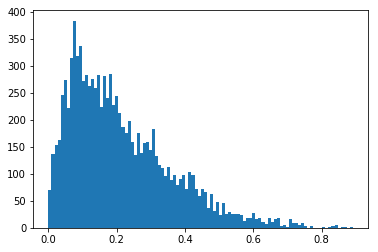

In [15]:
histo_e = plt.hist(e_beta, bins = 100)

In [16]:
histo_e

(array([ 70., 137., 154., 163., 245., 273., 221., 314., 383., 318., 336.,
        271., 282., 262., 275., 259., 282., 223., 280., 240., 285., 228.,
        244., 212., 186., 175., 197., 158., 134., 176., 139., 157., 158.,
        144., 182., 132., 117., 111.,  96., 112.,  88.,  98.,  79.,  91.,
         97.,  72., 104.,  97.,  72.,  59.,  72.,  67.,  37.,  62.,  31.,
         48.,  23.,  46.,  25.,  29.,  26.,  25.,  26.,  24.,  13.,  18.,
         18.,  27.,  17.,  18.,  10.,   7.,  19.,  10.,  16.,  18.,   3.,
          5.,   1.,  17.,   9.,   9.,   5.,   8.,   3.,   0.,   4.,   0.,
          0.,   0.,   2.,   0.,   1.,   4.,   5.,   0.,   2.,   1.,   0.,
          1.]),
 array([3.01370969e-05, 8.94520759e-03, 1.78602781e-02, 2.67753486e-02,
        3.56904191e-02, 4.46054896e-02, 5.35205600e-02, 6.24356305e-02,
        7.13507010e-02, 8.02657715e-02, 8.91808420e-02, 9.80959125e-02,
        1.07010983e-01, 1.15926053e-01, 1.24841124e-01, 1.33756194e-01,
        1.42671265e-01, 1.5158

In [17]:
x = np.linspace(0, 1, len(galaxies))

In [18]:
x.shape

(10000,)

In [19]:
histo_e[1].shape, histo_e[0].shape

((101,), (100,))

In [20]:
histo_e_x = np.zeros((100))
for i in range (len(histo_e[0])):
    histo_e_x[i] = (histo_e[1][i+1]+histo_e[1][i])/2

In [21]:
histo_e_x

array([0.00448767, 0.01340274, 0.02231781, 0.03123288, 0.04014795,
       0.04906302, 0.0579781 , 0.06689317, 0.07580824, 0.08472331,
       0.09363838, 0.10255345, 0.11146852, 0.12038359, 0.12929866,
       0.13821373, 0.1471288 , 0.15604387, 0.16495894, 0.17387401,
       0.18278908, 0.19170415, 0.20061922, 0.20953429, 0.21844936,
       0.22736443, 0.23627951, 0.24519458, 0.25410965, 0.26302472,
       0.27193979, 0.28085486, 0.28976993, 0.298685  , 0.30760007,
       0.31651514, 0.32543021, 0.33434528, 0.34326035, 0.35217542,
       0.36109049, 0.37000556, 0.37892063, 0.3878357 , 0.39675077,
       0.40566584, 0.41458091, 0.42349599, 0.43241106, 0.44132613,
       0.4502412 , 0.45915627, 0.46807134, 0.47698641, 0.48590148,
       0.49481655, 0.50373162, 0.51264669, 0.52156176, 0.53047683,
       0.5393919 , 0.54830697, 0.55722204, 0.56613711, 0.57505218,
       0.58396725, 0.59288232, 0.6017974 , 0.61071247, 0.61962754,
       0.62854261, 0.63745768, 0.64637275, 0.65528782, 0.66420

In [22]:
p_e = np.interp(x, histo_e_x, histo_e[0])

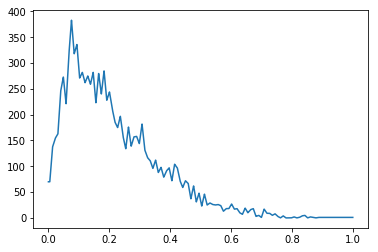

In [33]:
plt.plot(x, p_e, '-')

In [24]:
np.save('/sps/lsst/users/barcelin/data/single_galaxies/28/weights_x', histo_e_x)

In [25]:
np.save('/sps/lsst/users/barcelin/data/single_galaxies/28/weights_y', histo_e[0])

In [7]:
histo_e_x = np.load('/sps/lsst/users/barcelin/data/single_galaxies/28/weights_x.npy')
histo_e_y = np.load('/sps/lsst/users/barcelin/data/single_galaxies/28/weights_y.npy')

Do same and save weights for training sample

In [8]:
import sklearn
from sklearn import preprocessing
import galsim

In [43]:
training_or_test = 'training'
data_dir = '/sps/lsst/users/barcelin/data/single_galaxies/28/'+training_or_test
root = 'galaxies_isolated_20191022'
count = 0

In [44]:
def compute_e (galaxies, count):
    PSF = galsim.Kolmogorov(fwhm=0.65)
    r_band = 6
    bands = [0,1,2,3,4,5,6,7,8,9]
    pix_scale = 0.2
    #final_epsf_image = PSF.drawImage(scale=0.2)

    psf_image = PSF.drawImage(nx=64, ny=64, scale=0.2)
    e = []
    weight = []
    error_list = []
    denormed_gal = denorm(galaxies[:,0], bands)
    print(denormed_gal.shape)
    for i in range(len(galaxies)):
        #print(i)
        try :
            gal_image = galsim.Image(denormed_gal[i][r_band,:,:])
            gal_image.scale = pix_scale

            # Measurements of shapes
            res = galsim.hsm.EstimateShear(gal_image, psf_image)
            e_beta_in = [res.observed_shape.e]
            e.append(e_beta_in)
            #weight.append(1 / (np.interp(e_beta_in, histo_e_x, histo_e_y)+0.1))
            print(e_beta_in, 1 / np.interp(e_beta_in, histo_e_x, histo_e_y))
        except :
            print('erreur')
            count += 1
            error_list.append(i)
            pass
        continue
    return np.array(e), count, error_list

In [46]:
weights = []
bands = [0,1,2,3,4,5,6,7,8,9]
for i in range (10):
    galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(i+1)), mmap_mode = 'c')
    
    # Compute e_beta
    e_beta_test, count, error_list = compute_e(galaxies, count)
    print(error_list)
    print(galaxies.shape)
    norm(galaxies[:,0], bands)
    new_galaxies = np.delete(galaxies,error_list, axis = 0)
    print(new_galaxies.shape)
    
    # Save weights transform e_beta distribution in a uniform distribution
    weights = 1 / (np.interp(e_beta_test, histo_e_x, histo_e_y)+2.)
    
    np.save(data_dir+'/cropped/'+str('e_beta_{}.npy'.format(i+1)),np.array(weights))
    np.save(data_dir+'/cropped/'+str('images_cropped_{}.npy'.format(i+1)),new_galaxies)

(10000, 10, 64, 64)
[0.18075158934641722] [0.00364013]
[0.07264047517912918] [0.00278954]
[0.20777555173892626] [0.00458058]
[0.008905779282954981] [0.00968958]
[0.07878452448539233] [0.00276778]
[0.44093685124416004] [0.01678764]
[0.03120459429651433] [0.00613604]
[0.18962549548368707] [0.00414439]
[0.15125304241010396] [0.0039261]
[0.16104684965096158] [0.00392176]
[0.07670342916165171] [0.00265623]
[0.14528891816955802] [0.00360681]
[0.07819142130563851] [0.00273505]
[0.5281069062334927] [0.03579525]
[0.30675855456521584] [0.00560497]
[0.15680570054150791] [0.00438845]
[0.13374714926349243] [0.00374509]
[0.2320321155597276] [0.0053614]
[0.5843646711053722] [0.05555556]
[0.18177003308366618] [0.00357326]
[0.22656100832476087] [0.0056821]
[0.26636695098678] [0.00616794]
[0.3975933227514671] [0.01056666]
[0.14416826314390588] [0.00364482]
[0.11893867601392984] [0.00377015]
[0.25610234955919886] [0.00697409]
[0.1083638486389828] [0.00359493]
[0.13952503842980482] [0.00381122]
[0.0685007

[0.0685630355925483] [0.00305881]
[0.1716164091700073] [0.00399793]
[0.24776547860537368] [0.00661906]
[0.1454896122303984] [0.00360009]
[0.04751683699185028] [0.00372934]
[0.28334803710166007] [0.0063581]
[0.10071460620157456] [0.00351609]
[0.2513042719153437] [0.00706453]
[0.21654427000949747] [0.0052204]
[0.26632849893925675] [0.00616187]
[0.031427499904699986] [0.00606833]
[0.4300183814910919] [0.01270493]
[0.4577473831488929] [0.0147514]
[0.044805407082558854] [0.00385167]
[0.4075212144717848] [0.01271299]
[0.28662898594007014] [0.00634326]
[0.04950637110267825] [0.00369803]
[0.3166553411501091] [0.00758932]
[0.4725768903883433] [0.02014721]
[0.15779942983161055] [0.00426941]
[0.2782881514501975] [0.00658685]
[0.19476818589437128] [0.00428267]
[0.09417457393912272] [0.00301123]
[0.43728025061655196] [0.01540839]
[0.11958321784445754] [0.00379081]
[0.3984547441133019] [0.01084344]
[0.14199962512730038] [0.00372069]
[0.060959293928431246] [0.00396669]
[0.17175457691850957] [0.004007

[0.05246478225657574] [0.0039501]
[0.28090659296384246] [0.00636919]
[0.5880530216715584] [0.05555556]
[0.032278889757306535] [0.00579304]
[0.2584762611401395] [0.00646949]
[0.3919794762176918] [0.01066225]
[0.3696139884319564] [0.01025002]
[0.16023520179913167] [0.00400323]
[0.1346568924444747] [0.00376813]
[0.39885185441341364] [0.01097598]
[0.34260101499912887] [0.01029767]
[0.36787693119974396] [0.0104589]
[0.08151878946698461] [0.00292942]
[0.5565995835743847] [0.0385651]
[0.5148755369025363] [0.02453999]
[0.3437125802680174] [0.01032934]
[0.07860056811417122] [0.00275755]
[0.21317007885735437] [0.00496533]
[0.1324506183404863] [0.00371274]
[0.21274148387888223] [0.0049347]
[0.08238575660492989] [0.00298469]
[0.08076987398809292] [0.0028833]
[0.1816427373796353] [0.00358149]
[0.6447726970287533] [0.0593603]
[0.6492427250726808] [0.06210146]
[0.10581165788499482] [0.0036361]
[0.6059458705737526] [0.04474939]
[0.08989942157000592] [0.0030446]
[0.09298675599073222] [0.00298789]
[0.21

[0.1627642306000688] [0.00375985]
[0.10349498795156954] [0.00367429]
[0.018763845463489824] [0.00679242]
[0.1470383218229517] [0.00354904]
[0.5097281926644434] [0.0259939]
[0.4376412909571138] [0.0155344]
[0.1679306127520345] [0.00375]
[0.2702838869782653] [0.0068553]
[0.08530298211876282] [0.00313312]
[0.36965460487118107] [0.01024524]
[0.06107507004282307] [0.00394778]
[0.21254377761666202] [0.0049207]
[0.1990085863162399] [0.0041475]
[0.02092553729835697] [0.00660742]
[0.39347776629914033] [0.01054883]
[0.20863756813617299] [0.00464644]
[0.421575502251001] [0.01015147]
[0.1559859609684086] [0.00447661]
[0.292103321988022] [0.00647938]
[0.4229708467430495] [0.01026564]
[0.3530123344558535] [0.00911187]
[0.2605158466926605] [0.00609086]
[0.5730644504252864] [0.06471404]
[0.3735989550156665] [0.01106909]
[0.3482068335465254] [0.00953493]
[0.2678060424694914] [0.00640385]
[0.18555744067272742] [0.00374111]
[0.10999574197574222] [0.0035691]
[0.1324287102057245] [0.00371219]
[0.6101573781

[0.05696741545124423] [0.00440732]
[0.43575670963221813] [0.01489839]
[0.23680704946998063] [0.00513631]
[0.031244691666725864] [0.00613088]
[0.2590739272913975] [0.00635375]
[0.14920035961844078] [0.0037273]
[0.15250538795249183] [0.00405815]
[0.27657998639849857] [0.00673996]
[0.04355257112069096] [0.00391094]
[0.21176872368759783] [0.00486657]
[0.20193499709386487] [0.00417925]
[0.13222169107248904] [0.00370708]
[0.4427497377413548] [0.01637307]
[0.4141181639320072] [0.00977145]
[0.22318309659100247] [0.00555065]
[0.13566844340002068] [0.00379409]
[0.1233965513160497] [0.00375385]
[0.17188270230203137] [0.00401712]
[0.07079599621171283] [0.00290523]
[0.10966455437952995] [0.00357431]
[0.19347251930921838] [0.00432575]
[0.1897125688436435] [0.00415397]
[0.3352563727089964] [0.00913517]
[0.14008949157502648] [0.00379019]
[0.1151077778980187] [0.00365182]
[0.08980594090334491] [0.00304635]
[0.18070889481542649] [0.00364299]
[0.39350880326312787] [0.01054651]
[0.09916149496556667] [0.00

[0.04261849055243843] [0.00395633]
[0.0713700040830673] [0.00286821]
[0.19229306678218486] [0.00436573]
[0.024520766664451337] [0.00640107]
[0.07758666366995444] [0.00270246]
[0.04433667920398713] [0.00387363]
[0.031153151341547333] [0.006138]
[0.3290388092373234] [0.00872819]
[0.14962430673481206] [0.0037667]
[0.33497183505619404] [0.00909539]
[0.1250104885199695] [0.00372097]
[0.16299426319098395] [0.00373918]
[0.4647494566058871] [0.02075618]
[0.06591750629931972] [0.0032914]
[0.27598335838754867] [0.00679513]
[0.2707824715905901] [0.00695395]
[0.11929190560627868] [0.00378145]
[0.10272187277037186] [0.00368721]
[0.1592851603452638] [0.00410301]
[0.1196272662546935] [0.00379224]
[0.17705587005791495] [0.00390532]
[0.008079442877520151] [0.01030997]
[0.2023513008575814] [0.00420552]
[0.1975429512434545] [0.00419324]
[0.16041491233967625] [0.00398491]
[0.19557633883124292] [0.00425623]
[0.059869649252473185] [0.00415399]
[0.053597430895190964] [0.00405595]
[0.335358174452898] [0.00914

[0.07756452059167188] [0.00270128]
[0.5397937642701085] [0.03852834]
[0.13770328873149848] [0.0038474]
[0.0944797889714103] [0.00303154]
[0.6906296262373038] [0.20289928]
[0.12189909054169798] [0.00378487]
[0.44841472253333253] [0.01442239]
[0.20759585486451326] [0.00456709]
[0.1792439564281991] [0.00374384]
[0.046035910952405695] [0.00379517]
[0.4333379787865861] [0.01415461]
[0.3088078173584358] [0.0057069]
[0.3309022212208775] [0.00882478]
[0.3779147818520425] [0.01232382]
[0.09480299930375657] [0.00305335]
[0.3070487680631105] [0.00556638]
[0.06571162189285482] [0.00331483]
[0.0405978011159808] [0.00405823]
[0.20621690975856827] [0.00446613]
[0.2728903783952276] [0.00709626]
[0.15277423561354775] [0.00408766]
[0.18450005426173235] [0.00364883]
[0.18058574723978488] [0.00365126]
[0.1693766647620402] [0.00384351]
[0.14360368738218046] [0.00366427]
[0.015210991844526305] [0.00712007]
[0.2547917236566642] [0.00728792]
[0.004862268689108646] [0.01373339]
[0.09567436591415812] [0.0031137

[0.6351475973115314] [0.1285783]
[0.12741867930416853] [0.00367298]
[0.028171879955594777] [0.00625352]
[0.10687589733472051] [0.00361882]
[0.12677492033111482] [0.00368569]
[0.2307771807626262] [0.00545192]
[0.058491502874311034] [0.00441782]
[0.14236082199652617] [0.00370784]
[0.17270475469802404] [0.00407754]
[0.24224289945787877] [0.00585095]
[0.04606424245800742] [0.00379389]
[0.4655328295797977] [0.02195761]
[0.023019442827089807] [0.00646378]
[0.1774544310607106] [0.00387488]
[0.326102764620366] [0.0085802]
[0.24047238969018808] [0.00559729]
[0.10577600130952049] [0.00363668]
[0.060130362911851726] [0.00410759]
[0.1223648426690357] [0.00377517]
[0.07223207419150132] [0.00281435]
[0.6867785153938315] [0.24602676]
[0.33579778437099805] [0.00921183]
[0.5409392534582504] [0.03872002]
[0.34007839795340744] [0.00986643]
[0.13490552210305295] [0.00377448]
[0.20996454764547315] [0.00474507]
[0.07377829187069249] [0.00272265]
[0.45913134647190695] [0.01492226]
[0.27266248608216603] [0.00

[0.118288876830925] [0.00374954]
[0.2142176354421204] [0.00504181]
[0.04231033400082546] [0.00397154]
[0.13347692451242013] [0.0037383]
[0.15158204502413603] [0.00395995]
[0.13859419681442406] [0.00384643]
[0.015422232105000737] [0.0070997]
[0.30538125821961043] [0.00579568]
[0.5488939889925938] [0.03989492]
[0.1896744003557442] [0.00414976]
[0.3350981823135442] [0.00911301]
[0.44255755669386815] [0.01644854]
[0.4288392057024473] [0.01219269]
[0.6671559677111907] [0.06001503]
[0.19479835481494354] [0.00428168]
[0.04789898291443596] [0.00371272]
[0.11875215109924872] [0.00376421]
[0.5779986635409003] [0.06824761]
[0.03798489843849575] [0.00444238]
[0.054723643383559555] [0.00416697]
[0.15406648355468627] [0.00423574]
[0.09690554295374154] [0.00320329]
[0.09748243686302574] [0.00324704]
[0.2889913542915782] [0.00633261]
[0.12161448378304718] [0.00379082]
[0.37030319563683295] [0.01027056]
[0.09237280304601295] [0.002999]
[0.5827089349602489] [0.05782261]
[0.7965305026839828] [inf]
[0.147

[0.09084124768231203] [0.00302707]
[0.11671976370896953] [0.0037007]
[0.28586157920622035] [0.00634672]
[0.017641222354859713] [0.00689264]
[0.2048584228015309] [0.00437094]
[0.32275216597852613] [0.00823005]
[0.2647204975783125] [0.00591849]
[0.31317257455380276] [0.00663364]
[0.25459456643617123] [0.00733759]
[0.3818711278770318] [0.01205234]
[0.1144957965456715] [0.00363361]
[0.04865553843807155] [0.00368026]
[0.10055695953604378] [0.00350193]
[0.24177489488684656] [0.00578169]
[0.4711665136015446] [0.0218916]
[0.2801972733689999] [0.00642375]
[0.5131936674784595] [0.02236558]
[0.030681521633330815] [0.00615599]
[0.2132662301704342] [0.00497225]
[0.1893373547171316] [0.00411298]
[0.5089521681584088] [0.02742093]
[0.1481755884372159] [0.00363541]
[0.2692517806255513] [0.00665974]
[0.13934783743432386] [0.00381787]
[0.10651705633508554] [0.00362463]
[0.0637939919565626] [0.00355025]
[0.29376173528464744] [0.0065906]
[0.06851727605275558] [0.00306213]
[0.09514429734533088] [0.00307673]

[0.018960098187287156] [0.00677519]
[0.18620053998798372] [0.00379956]
[0.297395855422898] [0.00684817]
[0.25058356314007024] [0.00696901]
[0.2978141351212454] [0.00687911]
[0.022737549776714692] [0.00647569]
[0.20292900330879787] [0.00424252]
[0.20169205509139695] [0.00416408]
[0.3769441978289085] [0.01201747]
[0.3476938678106704] [0.00961937]
[0.4194210351812911] [0.00998008]
[0.1969170375461925] [0.00421309]
[0.14699555233527917] [0.00355043]
[0.05808605711336664] [0.00450194]
[0.24288886004137653] [0.00594931]
[0.1317793368013783] [0.0036962]
[0.3049094188330917] [0.00586403]
[0.06241077679730907] [0.00374194]
[0.26139617331467907] [0.00594079]
[0.16021597006251714] [0.00400521]
[0.3262686745319454] [0.00858843]
[0.11115335643891668] [0.003551]
[0.15473505065600002] [0.00431664]
[0.47482768770937933] [0.01787424]
[0.6456075398434358] [0.05564829]
[0.5054661063909973] [0.03639698]
[0.03977271342509394] [0.00413995]
[0.3571284253268943] [0.01013519]
[0.16700315022024587] [0.00369238]

[0.3921196532906825] [0.01065154]
[0.1674416304528419] [0.0037194]
[0.06703666007455994] [0.00317349]
[0.18361705542874296] [0.00357518]
[0.0930131317777786] [0.00298741]
[0.09870003843887669] [0.00334342]
[0.15302728581330896] [0.00411584]
[0.07028887853791048] [0.00293874]
[0.4621216630865871] [0.01753734]
[0.16105046179516683] [0.00392141]
[0.09729360837236968] [0.00323259]
[0.38613164858138305] [0.01127316]
[0.15498118421605028] [0.0043472]
[0.12648014131171126] [0.00369153]
[0.1979876520712489] [0.00417926]
[0.052907358825782964] [0.00399079]
[0.060732205954592874] [0.00400432]
[0.012165908404318235] [0.00783056]
[0.3976078252749232] [0.0105712]
[0.041524928503495456] [0.00401083]
[0.027276162699491884] [0.00628909]
[0.11023266815567868] [0.00356538]
[0.16244075031929953] [0.00378932]
[0.29777444543268794] [0.00687616]
[0.5821280291063679] [0.05893282]
[0.05522734789586463] [0.00421862]
[0.26325178027812357] [0.0057124]
[0.3819055252489616] [0.01204561]
[0.21060429614109138] [0.00

[0.07490619301002156] [0.00265944]
[0.17599569033747073] [0.00398868]
[0.23068049088404927] [0.00545902]
[0.02483133293790541] [0.00638825]
[0.3539241165011917] [0.00932033]
[0.12369198946921577] [0.00374778]
[0.13861456815223] [0.00384565]
[0.055314370534089274] [0.00422767]
[0.09452701805973636] [0.00303471]
[0.3088163135529411] [0.00570846]
[0.21328128558395773] [0.00497334]
[0.34479109646487544] [0.01012686]
[0.10581963917162232] [0.00363597]
[0.11093434896872485] [0.00355441]
[0.0522930923353218] [0.00393454]
[0.37115841269374794] [0.01046649]
[0.35863541391844833] [0.01056979]
[0.36596951210848383] [0.0106983]
[0.4129744826730909] [0.01017979]
[0.33555893305833806] [0.00917785]
[0.10100513764411158] [0.00354247]
[0.18266073142508898] [0.00351677]
[0.13444956519785545] [0.00376286]
[0.3679780455086629] [0.01044651]
[0.06805995605536687] [0.00309568]
[0.052151210992889] [0.00392177]
[0.24312163976548992] [0.00598558]
[0.2029877590779229] [0.00424631]
[0.08152274232156892] [0.002929

[0.30580566593386893] [0.00573554]
[0.3260616882557534] [0.00857817]
[0.03262535251950273] [0.00568803]
[0.3912399237728572] [0.01071914]
[0.12772435688565104] [0.00366697]
[0.06726398844188175] [0.00315587]
[0.03479675648813227] [0.00510777]
[0.19834563613260628] [0.00416806]
[0.3645489472713426] [0.01088384]
[0.2573481140578256] [0.00669986]
[0.41685137526882193] [0.00978308]
[0.17694844964865336] [0.00391361]
[0.06323469317722036] [0.00362535]
[0.18624107315368396] [0.00380331]
[0.47047156168787596] [0.02286718]
[0.16179058055560386] [0.00384997]
[0.0703555552891963] [0.00293429]
[0.14025836673551179] [0.00378394]
[0.47489622542882554] [0.01781305]
[0.22942477226431315] [0.00555295]
[0.3747677342983912] [0.01138294]
[0.13607169507210584] [0.00380453]
[0.13884178729254779] [0.003837]
[0.3620201741658941] [0.01123055]
[0.6736878271987871] [0.05868141]
[0.1718278477423082] [0.00401315]
[0.44829087073016344] [0.01446006]
[0.38836352201361907] [0.01094628]
[0.2768715933288029] [0.0067133

[0.14494793327587854] [0.00361829]
[0.22067622232222622] [0.00545696]
[0.42859659054422433] [0.01209238]
[0.1418411624388089] [0.00372636]
[0.27573414657281886] [0.00681844]
[0.37761969821886154] [0.01222904]
[0.5757359742618364] [0.07471886]
[0.04192135698807245] [0.0039909]
[0.006223170827993866] [0.01204197]
[0.033027418202622415] [0.00557085]
[0.19613446735028256] [0.00423817]
[0.055781241832675604] [0.00427691]
[0.24515456884585002] [0.00632211]
[0.10531284819584574] [0.00364425]
[0.4058335923784711] [0.0137737]
[0.4434770283922984] [0.01609361]
[0.09922817794583035] [0.00338702]
[0.24846923924544223] [0.00670311]
[0.1749138262905367] [0.0040775]
[0.08129210854714353] [0.00291531]
[0.0785670657278446] [0.00275569]
[0.09144896521672441] [0.00301587]
[0.27898157861474154] [0.00652666]
[0.21292651340662525] [0.00494788]
[0.2230687498678561] [0.0055463]
[0.09482254684699114] [0.00305468]
[0.08894203834683409] [0.00306262]
[0.4694571915233397] [0.02445809]
[0.1272736705451799] [0.00367

[0.592868182413851] [0.05555556]
[0.6865362284829849] [0.24936138]
[0.23470904068330525] [0.00517801]
[0.05420581358655987] [0.00411517]
[0.23141455300707758] [0.00540556]
[0.08981851593304582] [0.00304611]
[0.2539208600363073] [0.00743449]
[0.23410575134233064] [0.00521823]
[0.6838368045105417] [0.29371531]
[0.06447363474944875] [0.00346308]
[0.09660954931640536] [0.0031813]
[0.16246011586718617] [0.00378754]
[0.01863101904110296] [0.00680412]
[0.2032680129080145] [0.00426453]
[0.05344752316251309] [0.00404161]
[0.2615062801204943] [0.00592254]
[0.24134586742782535] [0.00571963]
[0.4138491892604371] [0.00986451]
[0.31360529195732595] [0.00674219]
[0.27473538325103697] [0.0069135]
[0.1378340437293131] [0.00385087]
[0.14545765360969226] [0.00360116]
[0.2681239979374682] [0.00645842]
[0.051925299333262516] [0.0039016]
[0.04322945002041205] [0.00392652]
[0.16934316080173087] [0.00384129]
[0.6937067969379141] [0.26579965]
[0.10413407665670191] [0.00366367]
[0.37826030010712386] [0.01243668

[0.08922750012064944] [0.00305722]
[0.09019938830798122] [0.00303899]
[0.19280372611879612] [0.00434833]
[0.31444514571411664] [0.00696333]
[0.00898851137878398] [0.00963155]
[0.1249929512818124] [0.00372133]
[0.3127785305326922] [0.0065378]
[0.2468679559763394] [0.00651486]
[0.04229592000003647] [0.00397225]
[0.12360273958106353] [0.00374961]
[0.06228843709015943] [0.0037599]
[0.04909342561092717] [0.00366538]
[0.4145839736742719] [0.00961561]
[0.008464430321705105] [0.01001133]
[0.14212249052366266] [0.00371631]
[0.06137151721581484] [0.00390016]
[0.05795137724159457] [0.0045217]
[0.1166414621458237] [0.00369829]
[0.3478358841586598] [0.00959584]
[0.5256164851815345] [0.03728663]
[0.4028107233127212] [0.01249899]
[0.45990489036782795] [0.01550849]
[0.11684176250636576] [0.00370445]
[0.18937449004398857] [0.004117]
[0.18390820288493276] [0.00359913]
[0.18396662959240792] [0.00360398]
[0.07380472980572422] [0.00272114]
[0.1355036057538202] [0.00378983]
[0.3572649817934072] [0.01017309]

[0.03947970036497979] [0.00418667]
[0.062123068995348994] [0.00378445]
[0.297428583126134] [0.00685058]
[0.42168933850206136] [0.01016069]
[0.28288435590101374] [0.0063602]
[0.081838468236403] [0.00294956]
[0.4199209856541947] [0.01001933]
[0.4285748429369016] [0.01208347]
[0.23502839994609917] [0.00515696]
[0.07420802847506584] [0.00269822]
[0.3188896897165376] [0.00781221]
[0.24893020341037891] [0.00675934]
[0.04519162672037114] [0.00383375]
[0.04236366723492069] [0.0039689]
[0.36228866821372274] [0.01119269]
[0.05839886535000753] [0.00443677]
[0.11980366896256427] [0.00379793]
[0.06759712058028756] [0.0031304]
[0.05779318420220253] [0.00450291]
[0.2852840447792932] [0.00634933]
[0.03943612554448173] [0.0041937]
[0.24068771505621117] [0.00562696]
[0.05707892754204151] [0.00441999]
[0.119651152345925] [0.00379301]
[0.10945686323524789] [0.00357759]
[0.21917223055319826] [0.00540225]
[0.025890737339282502] [0.0063449]
[0.3175377296413288] [0.00767581]
[0.4362094901757424] [0.01504639]


[0.35009987707412754] [0.00923574]
[0.101568814262993] [0.00359481]
[0.06728445593711362] [0.00315429]
[0.07919531402523515] [0.00279092]
[0.19767186954317195] [0.00418918]
[0.19883478932654808] [0.00415287]
[0.44028152415391614] [0.01652258]
[0.0582779235294265] [0.00446174]
[0.3629809853690594] [0.01109625]
[0.41503944013714533] [0.00964879]
[0.14384349053596826] [0.00365598]
[0.25403922233788606] [0.00745214]
[0.22065552140079073] [0.0054562]
[0.3077942598248052] [0.00552758]
[0.15534916839402202] [0.00439372]
[0.10603330294646941] [0.00363248]
[0.1392722970967307] [0.00382072]
[0.26318113368816515] [0.00570285]
[0.19148381814657392] [0.00435903]
[0.018930244505863163] [0.00677781]
[0.11820383458009141] [0.00374686]
[0.17674811096406845] [0.00392916]
[0.12715053956612668] [0.00367826]
[0.5061627829129619] [0.03416215]
[0.0670332866574603] [0.00317375]
[0.3569025225011146] [0.0100731]
[0.23386897911216223] [0.00523419]
[0.35870947215404203] [0.01059211]
[0.5464477860428905] [0.039669

[0.22959438257676051] [0.00554008]
[0.2805212438754624] [0.00639687]
[0.17009665161089385] [0.00389183]
[0.1345627333220953] [0.00376573]
[0.3823105420418728] [0.01196703]
[0.07641408340451177] [0.00264143]
[0.4218078320154132] [0.0101703]
[0.2524100427385997] [0.00721629]
[0.03164070680219453] [0.00599696]
[0.40582436431298957] [0.01377999]
[0.11418352564627866] [0.00362438]
[0.33265243669658284] [0.00891748]
[0.10500839192438233] [0.00364925]
[0.0927997012289394] [0.00299127]
[0.17726450531197632] [0.00388933]
[0.4597494512812208] [0.0153837]
[0.3737933843126785] [0.01112009]
[0.274356973307937] [0.00695022]
[0.09867409573479205] [0.0033413]
[0.18233431084337834] [0.00353726]
[0.22877051672762141] [0.00560319]
[0.29477011854037155] [0.0066601]
[0.3385802892453816] [0.00962701]
[0.4481033945101489] [0.01451744]
[0.3893352530742267] [0.01086848]
[0.24036232722988385] [0.00558225]
[0.26030634473119796] [0.0061277]
[0.09536370161392374] [0.00309195]
[0.536275827851292] [0.03697051]
[0.12

[0.057899014935784275] [0.00451546]
[0.5094713271494558] [0.02644951]
[0.0908341139882705] [0.0030272]
[0.22186982625252666] [0.00550117]
[0.10033684147809445] [0.00348236]
[0.31642738502381373] [0.00754762]
[0.1172593089440717] [0.00371735]
[0.13445261700683048] [0.00376293]
[0.20327660062755565] [0.00426509]
[0.141919223187403] [0.00372357]
[0.16341609707138482] [0.00370185]
[0.192099530270059] [0.00437236]
[0.5022836561499575] [0.03695432]
[0.18236485908710987] [0.00353533]
[0.05217750640127243] [0.00392413]
[0.4223359149426101] [0.01021337]
[0.2597380735260184] [0.0062299]
[0.2841167676232248] [0.00635462]
[0.3462444114380093] [0.00986626]
[0.05444080674916001] [0.00413852]
[0.32865575235242345] [0.00870859]
[0.055345116408890144] [0.00423088]
[0.20933317079645827] [0.00470097]
[0.2464987820280925] [0.00647295]
[0.02273432519417386] [0.00647582]
[0.5201881259656168] [0.03541618]
[0.21097393790630997] [0.00481229]
[0.11331541318883973] [0.00359898]
[0.06200672694165742] [0.00380191]

[0.004326380651595265] [0.01428571]
[0.03872688354477012] [0.00431166]
[0.033060463934449925] [0.00556143]
[0.07593447765223559] [0.00261726]
[0.18709892056028515] [0.00388433]
[0.7338432934337281] [0.17379664]
[0.23095519083445812] [0.00543889]
[0.081772809305593] [0.0029454]
[0.2841504247043971] [0.00635446]
[0.3491835064831268] [0.00937819]
[0.23892909754810776] [0.00539348]
[0.25932004551357135] [0.00630728]
[0.17347225162713062] [0.0041356]
[0.07957590767590067] [0.0028127]
[0.3063354609435695] [0.0056622]
[0.20724400688801797] [0.0045409]
[0.33793480385919944] [0.0095274]
[0.11091483162342562] [0.00355471]
[0.24488521844357042] [0.00627536]
[0.08597720531318762] [0.00311982]
[0.11957141479732597] [0.00379043]
[0.33022130451907217] [0.00878924]
[0.3157270261529751] [0.0073303]
[0.08407771443300735] [0.00309879]
[0.02237257888248508] [0.00649118]
[0.24039490445613837] [0.00558669]
[0.5736557186635436] [0.06792071]
[0.021650681366219435] [0.00654759]
[0.4054926685447732] [0.01379584

[0.2528886666085959] [0.00728401]
[0.24840194594736034] [0.00669499]
[0.2094502060703536] [0.00471028]
[0.2904886633541815] [0.00637465]
[0.15912533826156802] [0.00412028]
[0.02429655414968715] [0.00641036]
[0.1655483072641187] [0.00360548]
[0.10823285515089628] [0.00359702]
[0.25251318918733934] [0.00723077]
[0.12734644079331917] [0.0036744]
[0.03815030904635841] [0.00441256]
[0.4178868394151868] [0.00986152]
[0.20984944450627493] [0.00473752]
[0.15584099682826918] [0.00445747]
[0.3157295122573996] [0.00733105]
[0.05131003904220436] [0.00384773]
[0.07266279095715326] [0.00278819]
[0.33773349047751117] [0.00949675]
[0.21276283132405008] [0.00493622]
[0.27495611688139965] [0.00689227]
[0.637513321419876] [0.14134477]
[0.34459422775220483] [0.01016323]
[0.012955102934309536] [0.00748302]
[0.08352784738523315] [0.00306076]
[0.14083944081141003] [0.00376259]
[0.15734066802633798] [0.00432355]
[0.09655034665395909] [0.00317694]
[0.180564377446587] [0.00365269]
[0.32771230612407026] [0.00866

[0.279853686890629] [0.0064525]
[0.032613317118062604] [0.00569161]
[0.28190318100849665] [0.00636466]
[0.2370201788172556] [0.00516103]
[0.03622086593997178] [0.00478746]
[0.03811441785036248] [0.004419]
[0.08661109399767725] [0.00310741]
[0.27546147850633235] [0.00684414]
[0.24687874655338615] [0.0065161]
[0.27021021980998366] [0.00684097]
[0.20077242035964055] [0.00410762]
[0.10935780683020761] [0.00357915]
[0.05788959299974362] [0.00451434]
[0.19378352643898286] [0.00431533]
[0.09735132185828747] [0.00323699]
[0.303222105528045] [0.00612223]
[0.10096639548705888] [0.00353893]
[0.09415089934474252] [0.00300966]
[0.13806181309031823] [0.00385694]
[0.2993220328162811] [0.00681592]
[0.0920562237171206] [0.00300476]
[0.2775478547891912] [0.00665234]
[0.19066164196816504] [0.00426139]
[0.2974085987158192] [0.00684911]
[0.2633789193936062] [0.00572968]
[0.13956444021956357] [0.00380975]
[0.3187240007132543] [0.00779524]
[0.4427068887377742] [0.01638983]
[0.3068143007229758] [0.00559751]
[

[0.16616332671177697] [0.00364171]
[0.22101734663022304] [0.00546952]
[0.43155742379759915] [0.01344198]
[0.24159876679674044] [0.00575605]
[0.07455187095202898] [0.00267898]
[0.06613594493130281] [0.0032669]
[0.07410431482526478] [0.00270408]
[0.29378987430872117] [0.00659251]
[0.18362656453175163] [0.00357596]
[0.34009805197402965] [0.00986965]
[0.2701054434544016] [0.00682068]
[0.19907852415632615] [0.00414534]
[0.28440490674921454] [0.00635331]
[0.275480600373966] [0.00684233]
[0.11635625457623047] [0.00368956]
[0.07563488847017681] [0.00262014]
[0.3925882643888201] [0.01061587]
[0.19064604286738304] [0.00425958]
[0.26035941764213444] [0.00611832]
[0.24251166562852544] [0.00589148]
[0.2120818808191011] [0.0048883]
[0.5258551456656073] [0.03713834]
[0.05316103931992512] [0.0040145]
[0.11016175057772769] [0.00356649]
[0.3936376085516467] [0.01053688]
[0.16075395632254758] [0.00395078]
[0.13509398540074888] [0.0037793]
[0.15566453828648236] [0.00443438]
[0.07495339995490524] [0.002656

[0.04926590748623034] [0.00367895]
[0.6918535804872994] [0.217688]
[0.06381304966047563] [0.00354775]
[0.020229514643713583] [0.00666587]
[0.000256217332605192] [0.01428571]
[0.14251861774381172] [0.00370225]
[0.11790918253816272] [0.0037376]
[0.1693425358691504] [0.00384125]
[0.14522351819212814] [0.00360901]
[0.21510511184265613] [0.00510847]
[0.025519564332883687] [0.00636002]
[0.30784062676512586] [0.00553554]
[0.1518001427810955] [0.00398271]
[0.6561145168432366] [0.09472942]
[0.11446489233236308] [0.00363269]
[0.03096147466078294] [0.0061453]
[0.07350204063682002] [0.0027386]
[0.35188595502674674] [0.00897018]
[0.0533259007054297] [0.00403006]
[0.18566474570377609] [0.00375074]
[0.11874322184964411] [0.00376393]
[0.10886531750210418] [0.00358695]
[0.011838124757528672] [0.00798458]
[0.6190908666609042] [0.05574198]
[0.17030686720549149] [0.00390617]
[0.27281553122726165] [0.00710388]
[0.14535019449314973] [0.00360475]
[0.28018629840478954] [0.00642466]
[0.5468872259591108] [0.039

[0.27749338448608823] [0.00665721]
[0.5787922412046175] [0.06623568]
[0.06848978988361967] [0.00306413]
[0.4346759207120433] [0.0145566]
[0.11036899889933614] [0.00356324]
[0.19423623255296651] [0.00430025]
[0.11361154107974097] [0.0036076]
[0.37020358339669807] [0.01024821]
[0.03260696148135331] [0.00569351]
[0.15861640223289603] [0.00417627]
[0.39112813080984415] [0.01072779]
[0.38609375861613604] [0.01127964]
[0.006193572805118883] [0.01207431]
[0.40000483118938324] [0.01137982]
[0.4567579937446389] [0.01463163]
[0.06600620785641134] [0.00328141]
[0.10637862497854847] [0.00362687]
[0.16272845942716394] [0.00376309]
[0.46630727810864075] [0.02329036]
[0.17351639956370496] [0.004139]
[0.13782773331439824] [0.0038507]
[0.016731674901248453] [0.00697604]
[0.04292455309981781] [0.00394134]
[0.1766354689666893] [0.00393796]
[0.026550014866943507] [0.00631822]
[0.16126027638374404] [0.00390089]
[0.2949140011690312] [0.00667014]
[0.22636432453025537] [0.00567427]
[0.0709356318983713] [0.002

[0.20242460464355902] [0.00421018]
[0.10345433153801999] [0.00367496]
[0.14634831962397662] [0.0035716]
[0.206909268699268] [0.00451626]
[0.40330658656536583] [0.01272007]
[0.11174607177366985] [0.00355395]
[0.11821205106632775] [0.00374712]
[0.10496098444838221] [0.00365003]
[0.2098817858040792] [0.00473964]
[0.025387336519870737] [0.00636542]
[0.16810040643760452] [0.00376074]
[0.1430786037108335] [0.00368255]
[0.671752501722547] [0.05651737]
[0.4873506794970097] [0.02961782]
[0.29715338141364206] [0.00683036]
[0.22362604192096205] [0.00556754]
[0.09669652915608414] [0.00318773]
[0.10207078829878519] [0.00364273]
[0.013066117778645154] [0.0074366]
[0.34357745783979493] [0.01035528]
[0.09536952312835731] [0.00309235]
[0.2702382949394098] [0.00684642]
[0.13356002933137426] [0.00374039]
[0.13280713721131768] [0.00372158]
[0.1347906317306983] [0.00377154]
[0.25336645194531876] [0.0073529]
[0.0385862752716803] [0.00433584]
[0.2877148158359856] [0.00633836]
[0.05055850429633757] [0.0037839

[0.3506946575067761] [0.00914558]
[0.08102847095804853] [0.00289906]
[0.39786376463938505] [0.01065202]
[0.24952447880795847] [0.00683323]
[0.37464822151775595] [0.01135003]
[0.08204272896448514] [0.00296258]
[0.2664493606162375] [0.00618097]
[0.007947235983688385] [0.01041668]
[0.027264482290540248] [0.00628955]
[0.06793341512053098] [0.0031051]
[0.15200469153537058] [0.0040043]
[0.15439466505795185] [0.00427507]
[0.2233080748748515] [0.0055554]
[0.058834909827226535] [0.004349]
[0.1784740435079149] [0.00379911]
[0.1675902641911324] [0.00372865]
[0.13845450961976208] [0.00385177]
[0.5843698427160368] [0.05555556]
[0.05602356113348897] [0.00430292]
[0.13040332496169296] [0.00366277]
[0.4796364863613584] [0.01894478]
[0.14803054245299377] [0.00362276]
[0.23769945458006347] [0.00524141]
[0.35519378286915615] [0.00962701]
[0.20163774520291355] [0.0041607]
[0.08363142483570558] [0.00306785]
[0.015167605851910198] [0.00712426]
[0.16969608910301623] [0.0038648]
[0.32577186773518724] [0.00856

[0.25711493389088197] [0.00674954]
[0.1534243140760833] [0.00416084]
[0.2048637661494943] [0.00437131]
[0.16631844506245072] [0.00365096]
[0.14598668677532695] [0.00358354]
[0.20908624591190486] [0.00468147]
[0.03892794899502271] [0.00427755]
[0.119534872483626] [0.00378926]
[0.06289344510139158] [0.00367275]
[0.39385280985727117] [0.01052082]
[0.17752286633159498] [0.0038697]
[0.03389983908637189] [0.00533247]
[0.24184236514549842] [0.00579157]
[0.2226513221422328] [0.0055305]
[0.22987858894263918] [0.00551863]
[0.16440176235927056] [0.00361745]
[0.394914183138818] [0.01044234]
[0.3642208445796258] [0.01092761]
[0.20013442196762657] [0.00411303]
[0.06659996469278233] [0.00321604]
[0.43508804030905235] [0.01468506]
[0.21988855803369228] [0.00542817]
[0.37043877665140634] [0.01030113]
[0.04568097266648824] [0.0038113]
[0.26691960345202775] [0.00625645]
[0.09583006853016277] [0.0031248]
[0.06298557842649034] [0.00365983]
[0.32260347186108174] [0.00821314]
[0.20208540803289868] [0.0041887

[0.10362652099231842] [0.0036721]
[0.055105359444677676] [0.00420599]
[0.5105885966588011] [0.02457587]
[0.10510820534262909] [0.00364761]
[0.06286887628343178] [0.00367621]
[0.03552850855484998] [0.00493801]
[0.02959702890298825] [0.00619776]
[0.04781538341020133] [0.00371635]
[0.16277530297969042] [0.00375885]
[0.05475446593729704] [0.00417009]
[0.12615174761560144] [0.00369807]
[0.1522691476433128] [0.00403256]
[0.3535474943823807] [0.00923307]
[0.14428410100920194] [0.00364085]
[0.23061010819059474] [0.0054642]
[0.06322480980695581] [0.0036267]
[0.05578848745916955] [0.00427768]
[0.08682666495984702] [0.00310321]
[0.1483917055257518] [0.00365441]
[0.3105377894521455] [0.00604143]
[0.2588868157815974] [0.00638954]
[0.40915278738268723] [0.01183206]
[0.35246248025628407] [0.00899061]
[0.04231740431479308] [0.00397119]
[0.05299444055193995] [0.0039989]
[0.13402264170792552] [0.00375204]
[0.2568283729677167] [0.00681161]
[0.2945454379361603] [0.00664449]
[0.08276761624361505] [0.003009

[0.15631121163954587] [0.00445019]
[0.23873000620169163] [0.00536826]
[0.40351905012555217] [0.01281721]
[0.09344537938445432] [0.00297965]
[0.49423476654910914] [0.02132623]
[0.21571590403084034] [0.00515539]
[0.2995071088317455] [0.00677947]
[0.27702496427869944] [0.00669939]
[0.3554870158499836] [0.00970074]
[0.11363909310557105] [0.00360841]
[0.15468270860080904] [0.00431019]
[0.24397286761126713] [0.00612203]
[0.031078733168516594] [0.00614083]
[0.26794725751498566] [0.00642797]
[0.048581040422665825] [0.00368343]
[0.14965173112687363] [0.00376927]
[0.07057966504768008] [0.00291943]
[0.23726894736275378] [0.00519018]
[0.19969749904117706] [0.00412634]
[0.4623590424844167] [0.01778651]
[0.2135831233610751] [0.00499521]
[0.09728652124102957] [0.00323205]
[0.15100849712172096] [0.00390131]
[0.22792571569275452] [0.00566941]
[0.09175642756256186] [0.00301023]
[0.33168764188416194] [0.00886614]
[0.3058932523849586] [0.00572329]
[0.23041675876399792] [0.00547848]
[0.17806759546789439] [

[0.08779221382968101] [0.00308455]
[0.20446554257921176] [0.00434416]
[0.23969283509800532] [0.00549245]
[0.3965044286987091] [0.01032693]
[0.32437680003093705] [0.00841946]
[0.05023888287879241] [0.0037574]
[0.30653568184910757] [0.00563497]
[0.09707625454918056] [0.00321611]
[0.20333972805037506] [0.00426922]
[0.09053670952469614] [0.00303271]
[0.28304167643337197] [0.00635949]
[0.04852782813046765] [0.0036857]
[0.008458947879232485] [0.01001547]
[0.38761079971217627] [0.01102569]
[0.3703981250400851] [0.01029195]
[0.08538488357124353] [0.0031315]
[0.2664791767960467] [0.00618571]
[0.06930774867048502] [0.00300582]
[0.10893216331136137] [0.00358589]
[0.19033138546415665] [0.00422338]
[0.07836433078955624] [0.00274451]
[0.1670732413398572] [0.00369667]
[0.4574015195167717] [0.01470931]
[0.2236433921064494] [0.0055682]
[0.13086362260454776] [0.00367389]
[0.08404865145540234] [0.00309675]
[0.40854652487453424] [0.01214477]
[0.21571970389893036] [0.00515568]
[0.0770677425566802] [0.00267

[0.1753777003277793] [0.00403893]
[0.28721296231541815] [0.00634062]
[0.3025141130982341] [0.00623747]
[0.3229053104824741] [0.00824754]
[0.37146683931793467] [0.010539]
[0.6203882367666314] [0.05774546]
[0.3789070179413977] [0.01265358]
[0.48813624546713474] [0.02835959]
[0.5411495444758426] [0.03875541]
[0.13508128306141043] [0.00377898]
[0.14953026894024274] [0.00375789]
[0.08140168883232037] [0.00292211]
[0.2517166691682144] [0.00712037]
[0.23772695640117708] [0.00524472]
[0.1823932265600656] [0.00353355]
[0.09890503559843752] [0.00336021]
[0.25159910861338136] [0.00710436]
[0.14940982575048636] [0.00374666]
[0.10968520338815516] [0.00357399]
[0.27107996070131174] [0.00701417]
[0.07905662433636329] [0.00278307]
[0.2065886311073005] [0.0044929]
[0.19929188962335462] [0.00413877]
[0.22466041273776993] [0.00560738]
[0.0068266787287455145] [0.01141833]
[0.5354071704631627] [0.03657524]
[0.08516293869113244] [0.0031359]
[0.2505449913105999] [0.00696397]
[0.11253297001296926] [0.00357638

[0.1074376314794818] [0.00360976]
[0.42390910941924076] [0.01043389]
[0.11404995876975277] [0.00362045]
[0.07096135339542803] [0.00289447]
[0.15958966902686664] [0.00407049]
[0.730681021093745] [0.13941762]
[0.27197907448243763] [0.00719014]
[0.15204065657465385] [0.00400812]
[0.4054378609405619] [0.01376665]
[0.07570600771460023] [0.00261637]
[0.41486560254909916] [0.0096361]
[0.5540236803558418] [0.03899967]
[0.11972447392292669] [0.00379537]
[0.347782118854211] [0.00960474]
[0.27237193688267186] [0.00714937]
[0.024968501986129245] [0.0063826]
[0.25388729245759] [0.0074295]
[0.12538542090547503] [0.00371342]
[0.3247907564807611] [0.00846913]
[0.3005767504984701] [0.0065762]
[0.08185290804042555] [0.00295048]
[0.04416677954124236] [0.00388165]
[0.19984350707392154] [0.00412188]
[0.13295362933925306] [0.00372522]
[0.11111278297069656] [0.00355163]
[0.4101424606684199] [0.0113548]
[0.1751450446968379] [0.00405818]
[0.11370181822133689] [0.00361024]
[0.04924468681279219] [0.00367728]
[0.

[0.07165517374075196] [0.00285017]
[0.376956001642536] [0.0120211]
[0.09327870758996276] [0.00298264]
[0.354302937480444] [0.00940977]
[0.14980319393545927] [0.00378357]
[0.31900294939853363] [0.00782386]
[0.16173257767598886] [0.00385547]
[0.13921754034704187] [0.00382278]
[0.132226964593521] [0.00370721]
[0.4551115206969466] [0.01443658]
[0.20381433837458324] [0.0043005]
[0.3567101130705026] [0.01002081]
[0.33350819509335317] [0.00896352]
[0.11099066205779853] [0.00355353]
[0.06357480735084486] [0.00357931]
[0.10557980342955013] [0.00363988]
[0.06341842573246083] [0.00360033]
[0.10725252122718341] [0.00361274]
[0.3944628626822821] [0.01047557]
[0.1471302737281479] [0.00354622]
[0.4936027493583921] [0.02188882]
[0.29287982640407284] [0.00653098]
[0.09770951038996939] [0.00326459]
[0.3963759007919659] [0.01033616]
[0.2543471255903793] [0.00740089]
[0.020386916326344415] [0.00665256]
[0.07251344483822462] [0.00279721]
[0.2280236493812503] [0.00566166]
[0.3014708780000717] [0.00641541]
[

[0.08931911491380062] [0.0030555]
[0.24445843063613734] [0.00620269]
[0.07961719631470747] [0.00281509]
[0.25637142924304684] [0.00691297]
[0.13063213630770357] [0.00366829]
[0.10769730045632932] [0.00360559]
[0.26643290789881424] [0.00617837]
[0.03115442059904274] [0.00613795]
[0.1951530498442378] [0.00427004]
[0.4539654511723153] [0.01430385]
[0.4413996462209566] [0.01691841]
[0.055566094144368965] [0.00425407]
[0.16169907636030273] [0.00385866]
[0.10656290666979283] [0.00362388]
[0.32278006735922105] [0.00823323]
[0.17965559814061352] [0.00371494]
[0.7018136326757243] [0.2221965]
[0.27168588288945583] [0.00714011]
[0.07663301103523783] [0.00265261]
[0.4154417351481386] [0.00967828]
[0.04883763076381822] [0.00367253]
[0.09503660017812618] [0.00306932]
[0.1514012074113389] [0.00394127]
[0.06901291378678026] [0.00302658]
[0.5724648009612984] [0.06175705]
[0.07506626981492119] [0.00265071]
[0.047650047540492735] [0.00372353]
[0.27460770379366595] [0.00692585]
[0.02471212169030914] [0.00

[0.21002955169261964] [0.00474934]
[0.18543716209238795] [0.00373038]
[0.2559403694692944] [0.00701141]
[0.15844766238454042] [0.00419518]
[0.0619689712153639] [0.00380761]
[0.1876570344239595] [0.00393893]
[0.013689439023200755] [0.00727026]
[0.2632484315177855] [0.00571195]
[0.0666491871578657] [0.00321074]
[0.10045641176938198] [0.00349297]
[0.025458060535910085] [0.00636253]
[0.2266146865487591] [0.00568424]
[0.3626453689748306] [0.01114279]
[0.04881365055435793] [0.00367354]
[0.42724332198752313] [0.01156182]
[0.2911917102948355] [0.00641983]
[0.09031880495492078] [0.00303677]
[0.15858187595125794] [0.00418013]
[0.027095671970721425] [0.0062963]
[0.06136996811359442] [0.00390041]
[0.0765141245956869] [0.00264653]
[0.006191092176763999] [0.01207703]
[0.14025718153512257] [0.00378398]
[0.12337767656409496] [0.00375423]
[0.20602664428201847] [0.00445255]
[0.040879229138436404] [0.00404372]
[0.3925996615101206] [0.01061501]
[0.13396808432352114] [0.00375066]
[0.08710737471234917] [0.0

[0.052129387461205504] [0.00391981]
[0.2357112225907053] [0.00511254]
[0.20197138926947722] [0.00418154]
[0.25943319431728235] [0.00628615]
[0.11011786099527972] [0.00356718]
[0.26101115934580615] [0.00600551]
[0.17854720475739141] [0.00379379]
[0.1175386366418565] [0.00372603]
[0.15496238121691364] [0.00434485]
[0.19781938970415291] [0.00418454]
[0.23387739480687256] [0.00523362]
[0.15263397551789495] [0.00407221]
[0.518683126913759] [0.03146554]
[0.6205387728493056] [0.05819944]
[0.3013048333143225] [0.00644467]
[0.1968434343768739] [0.00421543]
[0.02992674799255733] [0.006185]
[0.37355531148747995] [0.0110577]
[0.08189785969842606] [0.00295333]
[0.1706811641279664] [0.00393197]
[0.2246516183341331] [0.00560704]
[0.35397336571419397] [0.00933186]
[0.2679766020584876] [0.00643301]
[0.41523242191683074] [0.00966291]
[0.3617707479839989] [0.01126595]
[0.33752359714848934] [0.00946501]
[0.6296032428483631] [0.10370124]
[0.35670463116487755] [0.01001933]
[0.316271977662778] [0.00749829]
[

[0.13200551069896474] [0.00370176]
[0.030252832154223915] [0.00617244]
[0.11360174839420782] [0.00360732]
[0.11097910074768425] [0.00355371]
[0.05167814092678459] [0.00387978]
[0.05823622279674495] [0.00447042]
[0.17186079908166985] [0.00401553]
[0.22487051401325817] [0.00561554]
[0.022167948641895863] [0.00650558]
[0.06314310828428671] [0.00363795]
[0.3094548224534222] [0.00582759]
[0.39875338400853516] [0.01094281]
[0.14260050802364596] [0.00369935]
[0.04027487852875684] [0.004075]
[0.07438016583616548] [0.00268855]
[0.03643243381126285] [0.00474327]
[0.2914965821059024] [0.00643963]
[0.08983352311828183] [0.00304583]
[0.09020655599434974] [0.00303886]
[0.026370227378485826] [0.00632547]
[0.3566774290829669] [0.01001199]
[0.3749645307949115] [0.01143755]
[0.12823571095182] [0.00365698]
[0.26345557071045816] [0.00574014]
[0.06133523752184357] [0.00390593]
[0.4003387803064804] [0.0115024]
[0.11054002879124342] [0.00356056]
[0.08077071450797013] [0.00288335]
[0.11627388414790212] [0.003

[0.17490507959865717] [0.00407823]
[0.08422630811019723] [0.00310922]
[0.034581995728459804] [0.00515983]
[0.0449941493218832] [0.00384289]
[0.060177360845018936] [0.00409933]
[0.05391421702728902] [0.00408657]
[0.3498262964746495] [0.00927782]
[0.19587392819153226] [0.00424658]
[0.21957725666920966] [0.00541687]
[0.0940977667889713] [0.00300616]
[0.09867281915530525] [0.0033412]
[0.5014719403730912] [0.03408701]
[0.22867552113491904] [0.00561056]
[0.09983454433675609] [0.00343851]
[0.07056389487748738] [0.00292047]
[0.024079738549954956] [0.00641936]
[0.3342450854254685] [0.00900354]
[0.08000502518380534] [0.00283768]
[0.26528961395213546] [0.0060024]
[0.17375552946405912] [0.00415746]
[0.10046777525215529] [0.00349398]
[0.1224370596430426] [0.00377366]
[0.4613232440645635] [0.01674819]
[0.131620268849189] [0.00369231]
[0.09806872504178117] [0.00329274]
[0.10353143092524834] [0.00367368]
[0.1301989712355822] [0.00365786]
[0.24115724424346907] [0.00569276]
[0.24887508887886178] [0.0067

[0.14529541324702805] [0.00360659]
[0.1460288161094098] [0.00358215]
[0.1984920267060134] [0.0041635]
[0.25597906728620307] [0.00700245]
[0.12948364391520492] [0.00364076]
[0.23735636212749306] [0.0052005]
[0.05506881961532199] [0.00420222]
[0.12709242028897688] [0.00367941]
[0.18651585319761474] [0.00382889]
[0.11267709603002238] [0.00358052]
[0.18511580438143127] [0.00370201]
[0.0514682334465634] [0.00386144]
[0.19694184969226014] [0.0042123]
[0.05907119302944894] [0.00430287]
[0.4097207866797004] [0.01155336]
[0.25032457034057526] [0.00693531]
[0.3242929232481653] [0.00840947]
[0.08510928364207784] [0.00313697]
[0.11513763131382765] [0.00365272]
[0.08492683518384338] [0.0031406]
[0.2685658737813176] [0.00653583]
[0.28666309565433323] [0.0063431]
[0.16974908323241675] [0.00386836]
[0.09520741749094484] [0.00308109]
[0.05982877383281073] [0.00416136]
[0.14124037567607586] [0.00374801]
[0.06944551159066219] [0.00299622]
[0.24271488545034856] [0.0059225]
[0.23057658701901998] [0.0054666

[0.23529764896695693] [0.00513935]
[0.02913897481713878] [0.00621558]
[0.27087805957901373] [0.00697319]
[0.10264466758598959] [0.0036885]
[0.3352096294696582] [0.00912861]
[0.2564870824948332] [0.00688703]
[0.17491631632865065] [0.00407729]
[0.4234599316697383] [0.01030627]
[0.18548254502242206] [0.00373442]
[0.008899814357711781] [0.00969379]
[0.1469161583338638] [0.00355301]
[0.3786839605121964] [0.01257792]
[0.2656724386625013] [0.00606019]
[0.24737508293270014] [0.00657333]
[0.17692630597099435] [0.00391532]
[0.2514878258462433] [0.00708928]
[0.4565851364189938] [0.01461091]
[0.16294463742542306] [0.00374362]
[0.16175362985855402] [0.00385347]
[0.22400655273929643] [0.00558213]
[0.17334447850511284] [0.00412582]
[0.18184461772036292] [0.00356846]
[0.06594488699147888] [0.00328831]
[0.34130588632777037] [0.01007166]
[0.2874705203263568] [0.00633946]
[0.5734113973133789] [0.06655791]
[0.021749187344045396] [0.00653955]
[0.174505349488754] [0.00411207]
[0.5425539843208392] [0.0389934

[0.2588618609204989] [0.00639434]
[0.1006227219470104] [0.00350782]
[0.07498128676959988] [0.00265534]
[0.14370554401855706] [0.00366075]
[0.2729739309253998] [0.00708778]
[0.22425296528983255] [0.00559162]
[0.2838303685193676] [0.00635591]
[0.2587391578725505] [0.00641806]
[0.2099595464528423] [0.00474474]
[0.3383070678124237] [0.00958459]
[0.06290707460222218] [0.00367083]
[0.14412001210136915] [0.00364647]
[0.32686049262739714] [0.00861791]
[0.10541210196947784] [0.00364263]
[0.7405658359773253] [0.14932491]
[0.11764060210863382] [0.00372921]
[0.40420823177735093] [0.01314276]
[0.3944470300257487] [0.01047674]
[0.2663981448289188] [0.00617286]
[0.15450973496419673] [0.00428903]
[0.11321610017022078] [0.00359609]
[0.19949483884926478] [0.00413254]
[0.13865293828297656] [0.00384419]
[0.2542908321661363] [0.00741545]
[0.05548153331524957] [0.00424517]
[0.19242320176541347] [0.00436128]
[0.12307507809308545] [0.00376046]
[0.3041129882971557] [0.00598313]
[0.45987497872098076] [0.0154843

[0.24496307376653562] [0.0062888]
[0.10714228601169332] [0.00361452]
[0.19974793823611914] [0.00412479]
[0.35956432430293955] [0.01085676]
[0.19234321133352586] [0.00436401]
[0.351763022263644] [0.00898797]
[0.17182218487047762] [0.00401274]
[0.42552919143124096] [0.01095309]
[0.1488025954177884] [0.00369109]
[0.28766180928373847] [0.0063386]
[0.038837845928032126] [0.00429277]
[0.2770145030759843] [0.00670034]
[0.4303136759497658] [0.01284001]
[0.44478766941928444] [0.01561338]
[0.2828698076578447] [0.00636027]
[0.0996521145557462] [0.00342286]
[0.1508900023825168] [0.00388941]
[0.2706646100081096] [0.00693037]
[0.05572905676993464] [0.00427135]
[0.1917508934501086] [0.00438435]
[0.23865987831129032] [0.00535944]
[0.3518640517642095] [0.00897334]
[0.3354847342793275] [0.00916735]
[0.3245048981023006] [0.00843477]
[0.09901937715310292] [0.00336965]
[0.23298441447270338] [0.00529469]
[0.5177620489252823] [0.02945468]
[0.11437484329308416] [0.00363003]
[0.2848738658926635] [0.00635119]
[

[0.13759338576049632] [0.00384448]
[0.21089193900166964] [0.00480676]
[0.06129759423061817] [0.00391193]
[0.07524345740449596] [0.00264111]
[0.2782548824848737] [0.00658976]
[0.017080705181144986] [0.0069438]
[0.014660513044217326] [0.00717368]
[0.4499995907791869] [0.01395718]
[0.09109392187983503] [0.0030224]
[0.23274307115413193] [0.00531144]
[0.2830757281438725] [0.00635934]
[0.3349141736604937] [0.00908737]
[0.34111114941790804] [0.01003854]
[0.1932531501020604] [0.00433313]
[0.2689899873638118] [0.0066119]
[0.25618959530270347] [0.00695416]
[0.450139663095713] [0.01391751]
[0.09566960483291106] [0.00311342]
[0.16602539493910257] [0.00363352]
[0.4919171548303472] [0.02354537]
[0.2969357614478968] [0.00681445]
[0.05206722984733125] [0.00391425]
[0.2764487509954335] [0.00675202]
[0.3421759381971879] [0.01022238]
[0.1080206885878073] [0.00360041]
[0.30695483359161424] [0.00557881]
[0.1308056705831686] [0.00367248]
[0.057328935154828085] [0.00444867]
[0.42242613651630884] [0.01022077]

[0.2759434336222477] [0.00679886]
[0.17912545242797656] [0.00375224]
[0.19765551404183973] [0.00418969]
[0.1905869755574198] [0.00425273]
[0.26897726531451815] [0.00660959]
[0.3147086547663818] [0.00703573]
[0.20327506150326025] [0.00426499]
[0.09752324549769507] [0.00325018]
[0.46580537405544686] [0.02240888]
[0.2998109904645182] [0.00672045]
[0.3348358027420335] [0.0090765]
[0.12969870965802374] [0.00364588]
[0.2718052989985516] [0.00716547]
[0.03338561028115557] [0.00547044]
[0.032335827765419684] [0.00577551]
[0.020493760900581207] [0.00664356]
[0.16743025076304835] [0.00371869]
[0.048840524463421985] [0.0036724]
[0.11405463930114551] [0.00362059]
[0.40572230811604604] [0.0138499]
[0.1132205713266768] [0.00359622]
[0.5765836753870569] [0.07215562]
[0.18568907614607857] [0.00375293]
[0.018942086506285868] [0.00677677]
[0.2356889199386845] [0.00511398]
[0.12754923915121566] [0.00367041]
[0.27353418316644507] [0.0070314]
[0.15144420385305898] [0.0039457]
[0.20881536371713372] [0.00466

[0.10857363762903628] [0.00359159]
[0.2620873187101746] [0.00582806]
[0.5062941251429183] [0.03377122]
[0.2108972649280273] [0.00480711]
[0.43529876552376623] [0.01475163]
[0.13066146815610216] [0.003669]
[0.08650708198991779] [0.00310944]
[0.4414528425893396] [0.01689624]
[0.029887566294059285] [0.00618652]
[0.4194447951274886] [0.00998194]
[0.13643292298973816] [0.00381394]
[0.08320976187871168] [0.00303919]
[0.2657638274904777] [0.00607416]
[0.23923088386024183] [0.00543216]
[0.43251972691889323] [0.01391952]
[0.3708454645479854] [0.01039393]
[0.34779610786105913] [0.00960242]
[0.09354226649330309] [0.00297791]
[0.23754797903304148] [0.00522327]
[0.29259205368949104] [0.00651176]
[0.26113220807470305] [0.00598501]
[0.09649230158161032] [0.00317267]
[0.04878128822556526] [0.00367492]
[0.25725414423573983] [0.00671979]
[0.13585115935249245] [0.00379881]
[0.07665344150615364] [0.00265366]
[0.1376390549079986] [0.00384569]
[0.2192642346874023] [0.00540556]
[0.09855993721934803] [0.00333

[0.0964562945722843] [0.00317003]
[0.16603213212441925] [0.00363392]
[0.19507110097261632] [0.00427272]
[0.5526439751669925] [0.03923649]
[0.021855854321793947] [0.00653086]
[0.23045085961062847] [0.00547596]
[0.26473773090941477] [0.005921]
[0.33478039152313094] [0.00906882]
[0.5517588697616357] [0.03938993]
[0.2691419684808236] [0.00663959]
[0.18109300359111863] [0.00361744]
[0.0997992292871988] [0.00343547]
[0.3513315890744061] [0.00905096]
[0.20335047997994904] [0.00426992]
[0.4087942656881325] [0.01201501]
[0.18885239638469756] [0.00406119]
[0.2487908546181288] [0.00674224]
[0.4026165361794143] [0.0124145]
[0.1303465723792648] [0.0036614]
[0.01739909672167938] [0.00691465]
[0.12921316886726086] [0.00363801]
[0.48247383527638854] [0.02329981]
[0.2083325677726853] [0.00462292]
[0.23850757414988458] [0.00534037]
[0.2086971585858792] [0.00465106]
[0.23540009965303102] [0.00513268]
[0.30021772177437905] [0.00664306]
[0.09507322208239506] [0.00307183]
[0.18986373446252497] [0.00417072]


[0.06845542497471871] [0.00306662]
[0.10893027136317059] [0.00358592]
[0.3550111676885106] [0.00958167]
[0.3042202021478119] [0.00596682]
[0.48382553996860833] [0.02616529]
[0.08056538518971187] [0.00287096]
[0.2258614184059715] [0.00565436]
[0.2969348717855429] [0.00681439]
[0.11284075801812728] [0.00358524]
[0.16587191641460722] [0.00362445]
[0.16149191479469005] [0.00387848]
[0.20593427038640014] [0.00444599]
[0.2215819864416163] [0.00549044]
[0.19824999680895225] [0.00417105]
[0.10392215635370167] [0.00366718]
[0.2561380450277122] [0.00696592]
[0.31164655032355476] [0.00627725]
[0.23498686022088125] [0.00515969]
[0.05231192636137476] [0.00393624]
[0.10829854231397251] [0.00359598]
[0.05189968543748659] [0.00389933]
[0.5283249587391786] [0.03567033]
[0.526673257967876] [0.03663887]
[0.03061134839313884] [0.00615868]
[0.22684894932259347] [0.00569359]
[0.24475183424610794] [0.00625247]
[0.3404378220664958] [0.00992565]
[0.12142942025109041] [0.00379471]
[0.11265571404945318] [0.00357

[0.045221520512616284] [0.00383238]
[0.2007688214558575] [0.0041074]
[0.45986507101778035] [0.01547633]
[0.27061309914306364] [0.00692012]
[0.17602453962364203] [0.00398637]
[0.25616111675323283] [0.00696065]
[0.27922671537946125] [0.00650564]
[0.06093748426399581] [0.00397028]
[0.15944555763573218] [0.00408581]
[0.18096928893781442] [0.00362563]
[0.1084485840449903] [0.00359358]
[0.28050407431921726] [0.00639829]
[0.09273712477814533] [0.0029924]
[0.45681580130977834] [0.01463858]
[0.13187276070201306] [0.0036985]
[0.03674557006471983] [0.00467934]
[0.168509630057438] [0.00378689]
[0.4249607538325344] [0.01076514]
[0.06192555654770029] [0.00381419]
[0.01802621408801259] [0.00685794]
[0.11204468380553738] [0.00356243]
[0.19455050698588325] [0.00428985]
[0.40739378660427866] [0.01278734]
[0.10030270124848742] [0.00347935]
[0.34978851327256855] [0.00928366]
[0.3228526231300224] [0.00824152]
[0.10295978816287456] [0.00368322]
[0.2342004266547328] [0.00521188]
[0.10477578374121987] [0.0036

[0.1611849746251581] [0.00390823]
[0.028103692397193493] [0.00625622]
[0.26942246074596965] [0.00669131]
[0.021967537262573736] [0.00652179]
[0.09130281476755084] [0.00301855]
[0.4086368779722757] [0.01209712]
[0.09637805892606667] [0.00316431]
[0.25443544483259306] [0.00737817]
[0.5657950563033224] [0.04153387]
[0.13546327662223548] [0.00378879]
[0.22015750808658913] [0.00543796]
[0.15657739310110713] [0.00441674]
[0.037325726962329345] [0.00456535]
[0.16217825023274052] [0.00381357]
[0.2935061201895079] [0.00657321]
[0.3736235743554578] [0.01107552]
[0.12535407162060505] [0.00371405]
[0.11397253089003033] [0.00361817]
[0.532371884248792] [0.03525807]
[0.272539397082293] [0.00713213]
[0.12021435829637697] [0.00381127]
[0.20851961819352688] [0.00463731]
[0.5726086706107155] [0.06244159]
[0.15318277974989536] [0.00413335]
[0.4281377532914888] [0.01190712]
[0.12962065975243783] [0.00364402]
[0.1680748931617776] [0.00375912]
[0.7971441570592659] [inf]
[0.1828894806135441] [0.00351669]
[0.

[0.041616501614766765] [0.00400621]
[0.2740257163145164] [0.00698267]
[0.18884432205654078] [0.00406034]
[0.09276125376840524] [0.00299196]
[0.05577618364048374] [0.00427637]
[0.31380270112639597] [0.00679289]
[0.09925946744677608] [0.00338964]
[0.10010570561538237] [0.00346205]
[0.2477875978134258] [0.00662167]
[0.2901405260023999] [0.00635251]
[0.4694132476829908] [0.02453203]
[0.14456074589314816] [0.00363142]
[0.6724979682511251] [0.05598818]
[0.2311085368537327] [0.00542772]
[0.1624598124215172] [0.00378757]
[0.09436961788997754] [0.00302418]
[0.04946287583949539] [0.00369457]
[0.25467636906871394] [0.0073169]
[0.17747513102994] [0.00387331]
[0.13854773156802436] [0.0038482]
[0.21450249572244218] [0.00506302]
[0.05510481128666776] [0.00420593]
[0.12299647331755062] [0.00376208]
[0.08017199161421502] [0.00284751]
[0.08830047047146018] [0.00307482]
[0.23889426415637724] [0.00538905]
[0.3371820809717623] [0.00941381]
[0.1500116101927324] [0.00380342]
[0.24613518707577284] [0.0064322]

[0.08864555809645147] [0.00306824]
[0.546913245103464] [0.03975142]
[0.05533046754397527] [0.00422935]
[0.25406641070767216] [0.00745621]
[0.2943900837140146] [0.00663374]
[0.48831009788634716] [0.02809545]
[0.01913814384747474] [0.00675965]
[0.12267517930015949] [0.00376873]
[0.3703654900527831] [0.01028458]
[0.36054414369341997] [0.01117683]
[0.13089038872386324] [0.00367453]
[0.20897536376018847] [0.00467276]
[0.07883963487271327] [0.00277087]
[0.10164096174908946] [0.00360162]
[0.39829044759458515] [0.01078954]
[0.3638291214450021] [0.01098033]
[0.08579475732065353] [0.00312341]
[0.14910599106295164] [0.00371865]
[0.36845504475554763] [0.01038845]
[0.03726970570400491] [0.00457611]
[0.016224832636998827] [0.00702339]
[0.058027951705628064] [0.00451426]
[0.06340876578974355] [0.00360164]
[0.23212232214453488] [0.00535501]
[0.0706479509558916] [0.00291493]
[0.051736408372240916] [0.0038849]
[0.24038158863844541] [0.00558488]
[0.13320022551827793] [0.00373137]
[0.11649441982622794] [0

[0.44603108801582886] [0.01518354]
[0.10485023283158129] [0.00365185]
[0.174245754974551] [0.00413434]
[0.04615941210408102] [0.00378959]
[0.3488177536637453] [0.00943628]
[0.20092424914726406] [0.00411683]
[0.23631547098531708] [0.0050802]
[0.24129499616414984] [0.00571235]
[0.16419162268312895] [0.00363512]
[0.1883887537482195] [0.00401288]
[0.05265648333518619] [0.00396762]
[0.2835606695855164] [0.00635714]
[0.14285910327710663] [0.00369025]
[0.3586867135142417] [0.01058524]
[0.07012586594932399] [0.00294968]
[0.3132298626426218] [0.00664781]
[0.36145555077972347] [0.011311]
[0.14863977307233137] [0.00367647]
[0.29809045165610015] [0.00689971]
[0.2376239565534491] [0.00523235]
[0.18941593644196822] [0.0041215]
[0.18345686844280096] [0.00356214]
[0.27824910517629337] [0.00659027]
[0.14502411420758451] [0.00361572]
[0.1017993376105533] [0.00361666]
[0.4527010481591183] [0.01416021]
[0.39679799609946453] [0.01032337]
[0.09887271360464207] [0.00335755]
[0.4022142224179151] [0.01224302]


[0.5274099005456547] [0.03620049]
[0.32335615311171295] [0.00829947]
[0.20376433457759993] [0.00429718]
[0.08284718092012207] [0.00301496]
[0.23826255482094344] [0.00530997]
[0.23075453035988944] [0.00545358]
[0.2859045904853965] [0.00634653]
[0.2406965686478901] [0.00562819]
[0.031247820768479904] [0.0061298]
[0.14712736867843126] [0.00354615]
[0.13470242630043075] [0.00376929]
[0.058390400902507605] [0.00443851]
[0.08008520601176894] [0.00284239]
[0.0636838010195215] [0.0035648]
[0.2108907861237613] [0.00480668]
[0.5534879398137655] [0.03909129]
[0.3703643837319989] [0.01028433]
[0.04093011647139018] [0.00404111]
[0.5271095894000658] [0.03637793]
[0.3729730643370542] [0.01090803]
[0.3517056364389049] [0.0089963]
[0.4583503906734371] [0.01482536]
[0.18852379163709918] [0.00402683]
[0.14310903791797505] [0.00368149]
[0.22341169883255782] [0.00555935]
[0.2890978630822912] [0.00633214]
[0.08475878171241794] [0.00314395]
[0.22394190034675907] [0.00557964]
[0.23364839209908045] [0.00524915

[0.3200559524008378] [0.00793384]
[0.19617972542763593] [0.00423671]
[0.08078751924218079] [0.00288437]
[0.21557482497575886] [0.00514447]
[0.2108870836013983] [0.00480643]
[0.26949435779738656] [0.0067047]
[0.1710092457197053] [0.00395486]
[0.39503035300711375] [0.01043383]
[0.11286283388284932] [0.00358587]
[0.38604685272214245] [0.01128768]
[0.15360557392871324] [0.00418171]
[0.2937941591799293] [0.00659281]
[0.0848546435212551] [0.00314203]
[0.32160444713809166] [0.0081013]
[0.03594471041227402] [0.00484639]
[0.08953685680509964] [0.0030514]
[0.04469922721411883] [0.00385662]
[0.039426120683243054] [0.00419532]
[0.28802027967896227] [0.00633699]
[0.17365369539296663] [0.00414958]
[0.7319268000030391] [0.15120037]
[0.3278380535928672] [0.00866705]
[0.150719681928915] [0.00387243]
[0.13309812372277616] [0.00372882]
[0.2776188712063145] [0.006646]
[0.021651641703537172] [0.00654752]
[0.5022211981483989] [0.03671667]
[0.12466317845815339] [0.003728]
[0.11009584827185846] [0.00356753]
[

[0.39458674682610373] [0.01046643]
[0.26153768724244775] [0.00591736]
[0.03643300658224651] [0.00474315]
[0.23332639988022064] [0.00527113]
[0.08629675903966902] [0.00311355]
[0.0923352525491517] [0.00299968]
[0.07148848725309209] [0.00286069]
[0.04549954983509805] [0.00381959]
[0.02536352348026148] [0.0063664]
[0.4442472923913178] [0.01580786]
[0.1482709719525791] [0.00364377]
[0.12461723225793271] [0.00372893]
[0.1618161572056537] [0.00384754]
[0.03717339383904543] [0.00459474]
[0.24887894579676417] [0.00675304]
[0.08818886230268946] [0.00307695]
[0.6839292261652953] [0.29193745]
[0.6360736628125971] [0.13394532]
[0.12307707290289813] [0.00376042]
[0.3078961586331815] [0.0055451]
[0.6320345459947737] [0.11331533]
[0.10853513744276078] [0.0035922]
[0.08820011581383852] [0.00307674]
[0.004092034678590342] [0.01428571]
[0.2395646477115254] [0.00547559]
[0.03329667444310651] [0.00549503]
[0.4688688931049321] [0.02548645]
[0.46653517707993575] [0.02371392]
[0.17684421718260787] [0.0039216

[0.15949379626637378] [0.00408067]
[0.2620548603978651] [0.00583325]
[0.16390954489486523] [0.00365911]
[0.05576190839727221] [0.00427484]
[0.08363596263026918] [0.00306816]
[0.21833004019889457] [0.0053663]
[0.06248496343765499] [0.00373114]
[0.037009967875122146] [0.00462669]
[0.05219435640418764] [0.00392564]
[0.16199968872350115] [0.00383025]
[0.03657515954462052] [0.00471392]
[0.3144120284166478] [0.00695433]
[0.14115372413938004] [0.00375115]
[0.26403161544746934] [0.00582001]
[0.2970294501286746] [0.00682129]
[0.11355945348586001] [0.00360608]
[0.09263635707255173] [0.00299422]
[0.45114484953452827] [0.01398735]
[0.25069650484035816] [0.00698381]
[0.1470374684033285] [0.00354906]
[0.07867460524524886] [0.00276166]
[0.10646442311632456] [0.00362548]
[0.037205689924984464] [0.00458848]
[0.23460038721934232] [0.00518521]
[0.2420671936666098] [0.00582475]
[0.16666658783854646] [0.00367191]
[0.1848002221976964] [0.00367456]
[0.16485176514135716] [0.00358019]
[0.020863165131690238] [0

[0.31608422216938525] [0.00743955]
[0.020711690383180898] [0.00662527]
[0.12722578803022752] [0.00367678]
[0.24056830842324792] [0.00561047]
[0.1901221951118094] [0.00419966]
[0.417777984865275] [0.00985322]
[0.01877371505690411] [0.00679155]
[0.54587672427666] [0.03956854]
[0.036813562789102236] [0.00466569]
[0.26566093830068477] [0.00605844]
[0.046327827910421136] [0.00378201]
[0.04881528689200719] [0.00367347]
[0.6485343666338874] [0.05946085]
[0.23954813615435447] [0.00547342]
[0.23211445499813516] [0.00535556]
[0.4153623846284233] [0.00967245]
[0.4287426482044305] [0.01215257]
[0.10423388792519726] [0.00366202]
[0.33291742216592607] [0.00893168]
[0.1429996467312452] [0.00368532]
[0.10926593216716225] [0.00358061]
[0.48731531292912694] [0.0296771]
[0.004593997199755736] [0.01412448]
[0.030537512272889557] [0.00616151]
[0.18083665029836657] [0.00363445]
[0.3085443084245718] [0.00565917]
[0.3634052186089113] [0.01103796]
[0.07547982916229894] [0.00262841]
[0.5983106355367099] [0.0425

[0.2450526616543381] [0.00630434]
[0.19089557578556376] [0.00428872]
[0.3869193770012852] [0.01114]
[0.2803991965520319] [0.00640697]
[0.3274852984539702] [0.00864926]
[0.6516956620036446] [0.07338708]
[0.2028347772174559] [0.00423644]
[0.41965542504996717] [0.00999844]
[0.13664100119410524] [0.00381938]
[0.2236521445647809] [0.00556853]
[0.2604717840035788] [0.00609857]
[0.4227074894579377] [0.0102439]
[0.3427591676548039] [0.01032596]
[0.3913904885303541] [0.01070751]
[0.18320916993294292] [0.00354215]
[0.09433486373818314] [0.00302186]
[0.23366953782864608] [0.00524771]
[0.18925328038859454] [0.00410391]
[0.2648375013844032] [0.00593555]
[0.10201083693136428] [0.00363694]
[0.042319662011145426] [0.00397108]
[0.38370606104451727] [0.01170393]
[0.5176720461791717] [0.02927189]
[0.5141769379085999] [0.02358746]
[0.08014595137682147] [0.00284597]
[0.21111227740965788] [0.00482165]
[0.22871420631142184] [0.00560755]
[0.13263917690638263] [0.00371741]
[0.21100758226878838] [0.00481456]
[0

[0.10752876261160903] [0.0036083]
[0.28089337270735415] [0.00636925]
[0.08739438618182319] [0.00309221]
[0.19148624393144295] [0.00435933]
[0.027105825123313877] [0.0062959]
[0.0228529312547782] [0.00647081]
[0.15969347576110968] [0.00405952]
[0.2542290478815563] [0.00743149]
[0.2369476953905374] [0.0051526]
[0.04140525475116817] [0.00401689]
[0.101771631589069] [0.00361402]
[0.4010062061138908] [0.01175547]
[0.39388168028372805] [0.01051867]
[0.13342964508726796] [0.00373712]
[0.22589081597471777] [0.00565552]
[0.08707504502322758] [0.00309839]
[0.18997108602952037] [0.00418269]
[0.19286692473135325] [0.00434619]
[0.13474369955582982] [0.00377035]
[0.18715014789737547] [0.00388928]
[0.28213343311357114] [0.00636361]
[0.24975918508382758] [0.00686286]
[0.20805011324006045] [0.00460135]
[0.20281739575844673] [0.00423532]
[0.23871083098855717] [0.00536585]
[0.16953227015741124] [0.00385385]
[0.1330128231373388] [0.0037267]
[0.166997914236063] [0.00369206]
[0.45136494963474594] [0.0140115

[0.5972847978997332] [0.04455452]
[0.25488828302917876] [0.00726384]
[0.15596069566982232] [0.00447326]
[0.6296391575306636] [0.10383137]
[0.4529329224094399] [0.01418634]
[0.11019482983137976] [0.00356597]
[0.2974170443766791] [0.00684973]
[0.15394802072504035] [0.00422172]
[0.16147220854983005] [0.00388038]
[0.12209221426576801] [0.00378084]
[0.11732172454139325] [0.00371928]
[0.20964329110158783] [0.00472406]
[0.3426198454399503] [0.01030103]
[0.061256654928282764] [0.00391848]
[0.15443019545395884] [0.00427937]
[0.08818817608860248] [0.00307696]
[0.11992571241292234] [0.00380189]
[0.06125139155370585] [0.00391932]
[0.3378740956643506] [0.00951813]
[0.0764229505897536] [0.00264188]
[0.1725848127690704] [0.00406861]
[0.23777959065413917] [0.00525106]
[0.6046907934417828] [0.04209731]
[0.2224130852828662] [0.00552153]
[0.09729699461503101] [0.00323285]
[0.04167438539738047] [0.0040033]
[0.020280818382762654] [0.00666153]
[0.19945765399171544] [0.00413368]
[0.262240402139448] [0.005803

[0.030119437087404815] [0.00617757]
[0.10585551749572827] [0.00363538]
[0.2446626329984084] [0.00623725]
[0.19485251935952974] [0.0042799]
[0.04123686158079514] [0.00402544]
[0.5409441216255042] [0.03872084]
[0.06422742580184107] [0.00349416]
[0.13118766048633934] [0.00368175]
[0.09280700178707367] [0.00299113]
[0.6001415737985626] [0.03948137]
[0.062494931661270285] [0.00372969]
[0.2592048480623925] [0.00632895]
[0.22676076039452436] [0.00569007]
[0.04571143432394043] [0.00380991]
[0.05261947650867034] [0.00396423]
[0.09796194702757396] [0.00328432]
[0.33719366998481076] [0.00941553]
[0.04152337231567604] [0.00401091]
[0.22962568691947918] [0.00553771]
[0.3733133453300088] [0.01099501]
[0.5891403973206827] [0.05555556]
[0.11736905550623873] [0.00372075]
[0.2557941171825691] [0.00704544]
[0.13085337178902381] [0.00367364]
[0.17884291012700174] [0.00377243]
[0.04419306305292556] [0.00388041]
[0.2631958203987794] [0.00570484]
[0.2857026297134769] [0.00634744]
[0.03633943313008855] [0.004

[0.3704668874262572] [0.01030749]
[0.11372915967763039] [0.00361104]
[0.1678961197037259] [0.00374782]
[0.45938641593993523] [0.01509992]
[0.2677858690874366] [0.00640041]
[0.2739463593586096] [0.0069905]
[0.112610716148018] [0.00357862]
[0.17586990437298627] [0.00399881]
[0.05216817771691763] [0.00392329]
[0.5013261319713893] [0.03361846]
[0.4765746326557346] [0.01643513]
[0.10452342428870491] [0.00365723]
[0.06024698783085564] [0.00408716]
[0.3070534693922653] [0.00556575]
[0.07389174578215923] [0.00271616]
[0.08160888731220024] [0.00293507]
[0.0610475808093065] [0.00395225]
[0.5450688001711638] [0.03942716]
[0.45321012170753855] [0.0142177]
[0.11401485476264078] [0.00361942]
[0.11726393336508824] [0.00371749]
[0.23340130813770846] [0.005266]
[0.4421703026156452] [0.01660275]
[0.36838375778772103] [0.01039708]
[0.24208647318187426] [0.00582762]
[0.5954214734935562] [0.04863024]
[0.41119764440359735] [0.01088661]
[0.06246259563870867] [0.00373439]
[0.17324492544685596] [0.00411823]
[0

[0.32111957016600995] [0.00804811]
[0.27832050000820824] [0.00658402]
[0.14206288310511606] [0.00371843]
[0.0957194916606101] [0.00311695]
[0.07058912027325126] [0.00291881]
[0.2028638653433384] [0.00423831]
[0.3769245110768805] [0.01201141]
[0.6854769509659777] [0.26506872]
[0.08911154759272082] [0.00305941]
[0.09972468257993396] [0.00342907]
[0.06864250736856414] [0.00305307]
[0.3959822576327705] [0.01036454]
[0.19530569398785144] [0.00426505]
[0.20357875185752874] [0.00428491]
[0.15819652299295098] [0.00422363]
[0.13744540495166477] [0.00384056]
[0.0156791920588027] [0.00707509]
[0.36225632181055284] [0.01119724]
[0.05438627650116622] [0.00413308]
[0.3381476147865436] [0.00956001]
[0.44046877452173144] [0.01659746]
[0.4351340541305856] [0.01469955]
[0.20007175055107512] [0.00411493]
[0.36275884779497003] [0.01112701]
[0.2257676927634392] [0.00565067]
[0.2065257279441717] [0.00448835]
[0.11593343783395295] [0.00367669]
[0.25620660737636336] [0.00695028]
[0.24537061969691412] [0.00634

[0.05657534586190887] [0.00436334]
[0.20539995082262297] [0.0044084]
[0.0195779842985032] [0.00672154]
[0.11078670810546727] [0.00355671]
[0.2441699803165556] [0.00615452]
[0.5956931507444151] [0.04799016]
[0.3064781632414131] [0.00564277]
[0.032310453170776535] [0.00578331]
[0.29606596658595435] [0.00675161]
[0.04827253289919458] [0.00369662]
[0.2761567348073687] [0.00677901]
[0.11016974087197798] [0.00356637]
[0.05607685427754677] [0.00430868]
[0.21008287031802242] [0.00475285]
[0.5454224155232901] [0.03948892]
[0.46890328640098683] [0.02542395]
[0.026478526288828467] [0.0063211]
[0.28558236216472177] [0.00634799]
[0.22599709769673357] [0.00565972]
[0.17190361434873286] [0.00401863]
[0.12813460663553614] [0.00365895]
[0.10887236461349077] [0.00358684]
[0.1974947250564192] [0.00419476]
[0.07827022262319557] [0.00273935]
[0.15244692544342445] [0.00405179]
[0.052816094920210076] [0.00398233]
[0.11762313534802606] [0.00372866]
[0.2777396792456465] [0.00663525]
[0.516790664365301] [0.0275

[0.4588856513698671] [0.01489164]
[0.26070763215382575] [0.00605752]
[0.03390209132803471] [0.00533188]
[0.26204990360735336] [0.00583405]
[0.3008931452212282] [0.00651839]
[0.021119685723394524] [0.00659129]
[0.09109699586361591] [0.00302235]
[0.06802976520922117] [0.00309792]
[0.310554957713971] [0.00604494]
[0.2470351804672752] [0.00653403]
[0.4107356217094409] [0.01108677]
[0.041698612213734394] [0.00400208]
[0.4240234601590134] [0.01046892]
[0.4243950558332267] [0.01058439]
[0.007752818081381731] [0.01057767]
[0.025749575251537773] [0.00635064]
[0.068252059878961] [0.0030815]
[0.18604765689933442] [0.0037855]
[0.48368529835248875] [0.02583563]
[0.4245940651014777] [0.01064728]
[0.1320525030805681] [0.00370291]
[0.27111614121558947] [0.00702157]
[0.13394659163646988] [0.00375012]
[0.0795700704361401] [0.00281237]
[0.07442770425719664] [0.0026859]
[0.08108230284987615] [0.00290236]
[0.23105888307046263] [0.00543133]
[0.13220680878148772] [0.00370671]
[0.4957769457980229] [0.02207173

[0.0496020387676922] [0.00370568]
[0.16852606441571438] [0.00378795]
[0.15679748777490296] [0.00438946]
[0.2998300118632625] [0.00671679]
[0.009390750728116478] [0.00935905]
[0.021393205035680214] [0.00656871]
[0.3154092551788887] [0.00723577]
[0.6909491988148274] [0.20001972]
[0.021247998612265288] [0.00658068]
[0.1542744057174028] [0.00426057]
[0.4214392310800675] [0.01014045]
[0.12214189449911796] [0.0037798]
[0.6103270573399342] [0.05736474]
[0.1095483376841492] [0.00357614]
[0.34995267964771587] [0.00925833]
[0.4227737222306021] [0.01024936]
[0.17246833227781827] [0.00405997]
[0.3828131262849979] [0.01187093]
[0.5142239279127413] [0.02364921]
[0.3007461900165093] [0.00654511]
[0.08712040505809722] [0.00309751]
[0.10912292335405357] [0.00358287]
[0.06251562807244536] [0.00372669]
[0.31747549613219683] [0.00766964]
[0.4430173980136127] [0.0162691]
[0.08342993614120493] [0.00305409]
[0.3113991519106393] [0.00622305]
[0.17239540494377997] [0.00405459]
[0.26343339265167165] [0.00573711

[0.24510139000932987] [0.00631283]
[0.018498837331442457] [0.00681581]
[0.07484719545418819] [0.00266268]
[0.10838022221172831] [0.00359467]
[0.35544458233762977] [0.00969]
[0.6571164019222565] [0.08904189]
[0.1646715531826934] [0.00359502]
[0.6442066251408306] [0.06217234]
[0.3124803120336983] [0.00646708]
[0.45458469507200255] [0.01437526]
[0.11168134875157465] [0.00355211]
[0.2235890529216637] [0.00556612]
[0.45417845352560354] [0.01432833]
[0.08743534269752758] [0.00309142]
[0.2226380395503592] [0.00553]
[0.11165215856761553] [0.00355129]
[0.20588148105819773] [0.00444224]
[0.14797759248674566] [0.00361817]
[0.3783313881107181] [0.01246016]
[0.0889766716745376] [0.00306196]
[0.08681077910197019] [0.00310352]
[0.09862298685450807] [0.00333715]
[0.1402073485382469] [0.00378582]
[]
(10000, 2, 10, 64, 64)
(10000, 2, 10, 64, 64)
(10000, 10, 64, 64)
[0.5362814054468925] [0.03697307]
[0.2558160346738069] [0.00704032]
[0.09921204763222635] [0.00338567]
[0.020384194660892554] [0.00665279]
[

[0.23701211759023452] [0.00516009]
[0.40616564234643665] [0.01355124]
[0.17577829277751708] [0.00400622]
[0.3030565758127317] [0.00614879]
[0.01340532102727837] [0.00729901]
[0.0932965243565536] [0.00298232]
[0.6251729958833804] [0.07678284]
[0.29450878020943194] [0.00664195]
[0.31536886602971864] [0.00722393]
[0.37731048016486957] [0.01213127]
[0.1666146660438292] [0.00366877]
[0.1254109197658817] [0.00371291]
[0.1877619034883947] [0.00394936]
[0.17422394298407584] [0.00413623]
[0.015701946122181804] [0.00707292]
[0.43328033405206196] [0.01413779]
[0.18438880278375047] [0.00363938]
[0.5116995619694354] [0.02295868]
[0.17403495989648815] [0.00415261]
[0.11204071626619201] [0.00356231]
[0.03043225284071335] [0.00616554]
[0.43778231634074477] [0.01558419]
[0.044004805374526466] [0.00388933]
[0.4908655116584584] [0.02471221]
[0.14102003486260398] [0.00375601]
[0.15815813864559933] [0.00422801]
[0.08813301099677655] [0.00307802]
[0.10646777091577866] [0.00362542]
[0.04222810926607116] [0.0

[0.03289959267026248] [0.00560757]
[0.013844605560229673] [0.00725465]
[0.09080203676967298] [0.0030278]
[0.21126210410265356] [0.00483183]
[0.7239402934721649] [0.11111111]
[0.20343710114401764] [0.0042756]
[0.09911824443865236] [0.00337785]
[0.10593603897687151] [0.00363407]
[0.24240600360436992] [0.00587548]
[0.07252843112080849] [0.0027963]
[0.05923853717625088] [0.00427079]
[0.09768337865955008] [0.00326256]
[0.15097488956332725] [0.00389793]
[0.09877330570502948] [0.0033494]
[0.10811390864426432] [0.00359892]
[0.0839749526205967] [0.00309161]
[0.206965640949392] [0.00452039]
[0.19187644844762577] [0.00438002]
[0.38176489083031406] [0.01207314]
[0.09207209589731656] [0.00300447]
[0.22522639085298296] [0.00562942]
[0.23700679075694558] [0.00515947]
[0.039226787776391284] [0.00422784]
[0.24441340958530008] [0.00619512]
[0.055173336430379194] [0.00421302]
[0.03462211823168738] [0.00515002]
[0.21594226521666424] [0.00517299]
[0.07384055476917951] [0.00271909]
[0.7939400320971209] [inf

[0.18024380932391174] [0.00367441]
[0.08757559899648179] [0.00308872]
[0.15290218416270693] [0.00410186]
[0.26954373908590673] [0.00671392]
[0.6393827488286019] [0.10426208]
[0.3938095562189321] [0.01052404]
[0.16859579079969353] [0.00379244]
[0.37196795698416707] [0.01065897]
[0.3504872675473368] [0.00917682]
[0.18101618945050307] [0.00362252]
[0.05687105237480497] [0.00439643]
[0.0996583491202877] [0.00342339]
[0.3736106147353175] [0.01107213]
[0.32168231386818436] [0.00810991]
[0.13532240367360654] [0.00378517]
[0.6611374439899592] [0.07175196]
[0.05973241355339493] [0.00417884]
[0.05483166922912648] [0.00417794]
[0.10551173555275563] [0.003641]
[0.12620304695051238] [0.00369705]
[0.050011146973482946] [0.00373874]
[0.19392044834510538] [0.00431076]
[0.09976693715303081] [0.00343269]
[0.5095467268877507] [0.02631413]
[0.3716470945547739] [0.01058184]
[0.14298990580456064] [0.00368566]
[0.4468335079376238] [0.01491849]
[0.1536910582427965] [0.00419163]
[0.15120595082548585] [0.003921

[0.1755088819841401] [0.00402816]
[0.13757106623567938] [0.00384389]
[0.40000970690001114] [0.01138159]
[0.6830588722820352] [0.30958442]
[0.15989464914207416] [0.00403844]
[0.20741860708405652] [0.00455386]
[0.07282483212382587] [0.00277848]
[0.04732354780728897] [0.0037378]
[0.2562558025370193] [0.0069391]
[0.20706571585542888] [0.00452774]
[0.5153702078283188] [0.02526236]
[0.33867047716969373] [0.00964109]
[0.29682379589901414] [0.0068063]
[0.141284609513075] [0.0037464]
[0.1705802928702945] [0.00392498]
[0.07145734018371867] [0.00286266]
[0.24374103085490798] [0.00608425]
[0.0071354221578136525] [0.01112362]
[0.020534229958780757] [0.00664015]
[0.04897606464969862] [0.00366667]
[0.07817359261716214] [0.00273408]
[0.18242049975941624] [0.00353183]
[0.46975344853530254] [0.02397102]
[0.14455210661900134] [0.00363171]
[0.5652768007125589] [0.04133427]
[0.5580869697485358] [0.03875073]
[0.19500623075218887] [0.00427485]
[0.2987933803299514] [0.00692224]
[0.20660583582694006] [0.004494

[0.15301149636091474] [0.00411407]
[0.07034230184395596] [0.00293517]
[0.3879317776795951] [0.01098121]
[0.2183208929839289] [0.00536554]
[0.3460872691696112] [0.00989379]
[0.014393121483257523] [0.00720002]
[0.14454960078219672] [0.0036318]
[0.22951568245723136] [0.00554604]
[0.282469637653324] [0.00636209]
[0.15899219691996486] [0.00413478]
[0.06915678657631809] [0.00301641]
[0.20191965012177743] [0.00417829]
[0.12702763234875053] [0.00368069]
[0.05303906516808769] [0.00400307]
[0.3962386901242284] [0.01034604]
[0.06543635646558905] [0.00334669]
[0.10423310795842432] [0.00366203]
[0.037684988827392366] [0.0044975]
[0.23175998115916283] [0.00538077]
[0.1444744507023198] [0.00363435]
[0.23948859632820868] [0.00546563]
[0.07186592115197409] [0.00283698]
[0.27410837053312265] [0.00697455]
[0.2328998506382214] [0.00530054]
[0.08938843557865611] [0.00305419]
[0.02902537108651014] [0.00622001]
[0.19985769138586165] [0.00412145]
[0.12178554886747961] [0.00378724]
[0.23687079338145825] [0.005

[0.33005674521614686] [0.00878069]
[0.16717965541420418] [0.00370321]
[0.1604445737201973] [0.0039819]
[0.47953693181785506] [0.01882134]
[0.08509835231934412] [0.00313718]
[0.29595597807035545] [0.00674374]
[0.04695495483099589] [0.00375405]
[0.1525667103789745] [0.00406484]
[0.30767891816536397] [0.00550789]
[0.2664027415178855] [0.00617359]
[0.033814727761581814] [0.00535482]
[0.1592990259923565] [0.00410151]
[0.3829313163083844] [0.01184855]
[0.23184451634066525] [0.00537474]
[0.1368227390560369] [0.00382414]
[0.08039391185697631] [0.00286069]
[0.3283964181596336] [0.00869537]
[0.4378350764345421] [0.0156029]
[0.1818146860414453] [0.00357039]
[0.05246437004633131] [0.00395006]
[0.03660243124505813] [0.00470835]
[0.2680464222262974] [0.00644502]
[0.2582704561166065] [0.00651033]
[0.33816288564621044] [0.00956236]
[0.1337571133781291] [0.00374534]
[0.19457217380653663] [0.00428913]
[0.3783113357004935] [0.01245353]
[0.4012878658419987] [0.01186565]
[0.27603651921453437] [0.00679018]


[0.3583232496632445] [0.01047673]
[0.10008271572903955] [0.00346004]
[0.31880557406952476] [0.00780358]
[0.25744370672114814] [0.00667971]
[0.1455103167682125] [0.00359939]
[0.24947500622916016] [0.00682702]
[0.1692484590828799] [0.00383503]
[0.21437758030135304] [0.0050537]
[0.42520407123165727] [0.0108448]
[0.07359837673955373] [0.00273301]
[0.20079334165394516] [0.00410889]
[0.11821216115483862] [0.00374712]
[0.1525865621602328] [0.00406702]
[0.2798109826973253] [0.0064561]
[0.20480840061896907] [0.00436751]
[0.30667737965133174] [0.00561586]
[0.2608119834696769] [0.00603954]
[0.21619193322916147] [0.00519255]
[0.11789376144168953] [0.00373712]
[0.41932244198857865] [0.00997238]
[0.1240572095310421] [0.00374032]
[0.007734616205608399] [0.010593]
[0.20867645343927338] [0.00464945]
[0.30329866871059913] [0.00611002]
[0.2591246853143102] [0.00634411]
[0.1639460429184834] [0.00365599]
[0.21139734548071668] [0.00484105]
[0.17253508915184246] [0.00406492]
[0.17556855733037066] [0.00402328

[0.018372503317135296] [0.00682702]
[0.23135115023929978] [0.00541014]
[0.19559953452396428] [0.00425548]
[0.01532327135635808] [0.00710923]
[0.5468988607510631] [0.03974887]
[0.12425603134586363] [0.00373627]
[0.16536309879407066] [0.00359471]
[0.0798740791075048] [0.00283001]
[0.2098142925458039] [0.00473522]
[0.1009031331474122] [0.00353316]
[0.13262835072964618] [0.00371714]
[0.2628083184482376] [0.00571492]
[0.03651661501428011] [0.00472591]
[0.17712565695228427] [0.00389996]
[0.29328810224128504] [0.00655845]
[0.1590188777317995] [0.00413187]
[0.30008725450837886] [0.00666769]
[0.40983796472993794] [0.01149749]
[0.12960997660136767] [0.00364377]
[0.4093458155354836] [0.01173585]
[0.13580570409388326] [0.00379764]
[0.11871453395150887] [0.00376302]
[0.1442621459815136] [0.0036416]
[0.24038145614407086] [0.00558486]
[0.15063559678155183] [0.00386411]
[0.06345633731819217] [0.00359521]
[0.2723819053785794] [0.00714834]
[0.1335625701860254] [0.00374045]
[0.24939323190616686] [0.00681

[0.1430539683952003] [0.00368341]
[0.11910236213882258] [0.00377538]
[0.015216441978677518] [0.00711954]
[0.039588960391755815] [0.00416913]
[0.5430221283905867] [0.03907349]
[0.2935875602818647] [0.00657874]
[0.09343818682535114] [0.00297978]
[0.07302827075451085] [0.00276637]
[0.0660223648642371] [0.00327959]
[0.3351641190263092] [0.00912223]
[0.15764917699308842] [0.00428699]
[0.20844161948481962] [0.0046313]
[0.19563127715664255] [0.00425445]
[0.18601898218025004] [0.00378288]
[0.09478527306650435] [0.00305215]
[0.3454098327378402] [0.01001425]
[0.17080876704405462] [0.00394084]
[0.11400420931521024] [0.0036191]
[0.3264700419145481] [0.00859844]
[0.21552241774843295] [0.00514043]
[0.13474384915751753] [0.00377035]
[0.20740049231061647] [0.00455251]
[0.03136247704875176] [0.00609043]
[0.4192818798752546] [0.00996921]
[0.4291614541060936] [0.01232853]
[0.06927428439171777] [0.00300816]
[0.15238504576325804] [0.00404508]
[0.12536506654381321] [0.00371383]
[0.15096826677652142] [0.0038

[0.04842888163199612] [0.00368992]
[0.13323601947091027] [0.00373227]
[0.34775558841375326] [0.00960913]
[0.165542749027446] [0.00360516]
[0.18197907836030386] [0.00355984]
[0.7212054987290173] [0.11111111]
[0.10539367242175002] [0.00364293]
[0.24818376459399497] [0.00666876]
[0.15361241197521275] [0.0041825]
[0.1973684361984954] [0.00419876]
[0.04382442571059642] [0.00389792]
[0.20203394761690177] [0.00418547]
[0.1589500313097779] [0.0041394]
[0.1339141221263492] [0.0037493]
[0.13357011120737464] [0.00374064]
[0.05438048778687843] [0.0041325]
[0.3631502739851749] [0.01107292]
[0.35425022988129073] [0.00939722]
[0.311149429558224] [0.00616928]
[0.24790866825161192] [0.00663599]
[0.09300134758079015] [0.00298763]
[0.06819706371368037] [0.00308555]
[0.30543322622269636] [0.00578824]
[0.08147491906958715] [0.00292668]
[0.117089594255285] [0.00371209]
[0.09426862921679588] [0.00301746]
[0.17389749227036697] [0.00416461]
[0.15843398049994334] [0.00419672]
[0.3773016818049026] [0.01212851]
[

[0.15074439956267452] [0.00387489]
[0.35062460469830076] [0.00915611]
[0.020410963829229887] [0.00665053]
[0.08799174753805573] [0.00308072]
[0.08181197329448964] [0.00294788]
[0.06125058422632601] [0.00391945]
[0.1498568356265064] [0.00378866]
[0.3679438222577186] [0.0104507]
[0.06478486052028753] [0.00342458]
[0.06251986702549918] [0.00372608]
[0.48186261879823394] [0.02220044]
[0.24339813516999212] [0.00602923]
[0.5253975750921742] [0.03742368]
[0.03907332382616553] [0.00425323]
[0.2798375389093781] [0.00645386]
[0.30416080311525423] [0.00597585]
[0.24286857966069797] [0.00594618]
[0.1362650056234148] [0.00380956]
[0.2905007402649574] [0.00637542]
[0.21442701804120526] [0.00505738]
[0.3994159866713634] [0.01116993]
[0.22423605567983473] [0.00559097]
[0.0974340990793112] [0.00324333]
[0.026204268431602826] [0.00633218]
[0.00755297708677204] [0.01074843]
[0.23379441481524318] [0.00523924]
[0.17424736227292312] [0.0041342]
[0.2851629633306786] [0.00634988]
[0.14758424291148076] [0.0035

[0.23139406438586874] [0.00540704]
[0.07613465736836846] [0.00262729]
[0.26380978826738666] [0.00578899]
[0.04354824385647877] [0.00391115]
[0.23480954817837818] [0.00517137]
[0.13390154447354002] [0.00374898]
[0.2260361796176953] [0.00566127]
[0.5418752157977582] [0.03887806]
[0.15544875161471422] [0.00440648]
[0.14284937643633938] [0.00369059]
[0.3290012463524462] [0.00872626]
[0.07720758246583474] [0.00268242]
[0.43312989046843176] [0.01409408]
[0.4541750909087397] [0.01432794]
[0.11717854721022883] [0.00371485]
[0.1060744819227579] [0.00363181]
[0.08512600561424492] [0.00313663]
[0.02931402670427495] [0.00620876]
[0.3690721281702103] [0.01031428]
[0.2485645403917511] [0.00671466]
[0.19049893372319604] [0.00424258]
[0.30425809681601096] [0.00596107]
[0.31922680900807787] [0.00784698]
[0.11229259016225909] [0.0035695]
[0.10155549523864273] [0.00359355]
[0.1633841177809686] [0.00370465]
[0.23335119356190515] [0.00526943]
[0.20925906676640027] [0.0046951]
[0.03792256523958493] [0.00445

[0.500336044040688] [0.03074841]
[0.3704442632484095] [0.01030237]
[0.10592538980946163] [0.00363424]
[0.32752783882484493] [0.0086514]
[0.30544026762973675] [0.00578724]
[0.15878747808896224] [0.00415728]
[0.02049064381266257] [0.00664382]
[0.4238664538494624] [0.01042089]
[0.41754752407387047] [0.00983568]
[0.1271538948918732] [0.00367819]
[0.05893111319588926] [0.0043301]
[0.07109303875635953] [0.00288595]
[0.069814120392951] [0.00297082]
[0.312231285267284] [0.00640919]
[0.4514291873692621] [0.01401862]
[0.32013057199184797] [0.00794175]
[0.2744832269660011] [0.00693792]
[0.06476350608017632] [0.00342719]
[0.15327056778720607] [0.0041433]
[0.21702723870748217] [0.00525908]
[0.20453441018312815] [0.00434883]
[0.3147380624545483] [0.00704391]
[0.13391428606962294] [0.0037493]
[0.16477717394343055] [0.00358631]
[0.481509311026058] [0.02161101]
[0.454172688012617] [0.01432767]
[0.08793497806042977] [0.00308181]
[0.1803075261050899] [0.00367007]
[0.11715533503063799] [0.00371413]
[0.312

[0.2269624650882897] [0.00569814]
[0.15397526561706837] [0.00422493]
[0.2325224575940913] [0.00532684]
[0.12942808622233015] [0.00363944]
[0.21789737442341778] [0.00533021]
[0.18839414543829983] [0.00401344]
[0.4034940334461118] [0.01280569]
[0.4607829090620709] [0.01625324]
[0.07755953216143562] [0.00270101]
[0.021731133686228855] [0.00654102]
[0.39713299675381214] [0.01042447]
[0.23954306053041113] [0.00547276]
[0.07761967821961921] [0.00270422]
[0.6376867214248093] [0.1368307]
[0.6019508914843041] [0.03727473]
[0.24775931681604121] [0.00661833]
[0.024941818411191766] [0.0063837]
[0.4213709275179732] [0.01013494]
[0.06958855922610455] [0.00298631]
[0.19947959243410382] [0.00413301]
[0.12298045783931195] [0.00376241]
[0.2276351232606644] [0.00569256]
[0.06739753909520382] [0.00314561]
[0.34260215814038725] [0.01029787]
[0.15581816543122856] [0.00445447]
[0.23266174657976862] [0.0053171]
[0.5659891240953747] [0.04160911]
[0.1846137084618385] [0.00365853]
[0.1841803549725687] [0.0036218

[0.35158132418142235] [0.00901439]
[0.11032957649027782] [0.00356386]
[0.3215356046490847] [0.0080937]
[0.1453254171780191] [0.00360559]
[0.26055457087761774] [0.0060841]
[0.07144742868834271] [0.00286329]
[0.22037164905086087] [0.00544579]
[0.1650729035976922] [0.00357796]
[0.6287371135436072] [0.10065884]
[0.056713611592099804] [0.00437875]
[0.1968707059686457] [0.00421456]
[0.01356577123741332] [0.00728274]
[0.2278491968759781] [0.00567549]
[0.16357633593344234] [0.00368786]
[0.41487254405644475] [0.0096366]
[0.24676108206542482] [0.00650268]
[0.3437208141949511] [0.01032776]
[0.25057113330835734] [0.00696738]
[0.15645719168822547] [0.00443179]
[0.06086369445979898] [0.00398245]
[0.5491029263691858] [0.03985766]
[0.04602778285142608] [0.00379554]
[0.27604458760730943] [0.00678943]
[0.14049801807220336] [0.00377511]
[0.08692652872397247] [0.00310127]
[0.06914508216027238] [0.00301724]
[0.08888359517615006] [0.00306373]
[0.1784945006969515] [0.00379762]
[0.1555113406543913] [0.0044145

[0.1920150597171532] [0.00437526]
[0.15514719388277226] [0.00436807]
[0.07206138819103698] [0.00282485]
[0.09621174428526014] [0.00315221]
[0.04728574288323832] [0.00373946]
[0.3250755780874811] [0.00850364]
[0.3643113472532485] [0.0109155]
[0.05689614207949304] [0.00439926]
[0.07447352065073684] [0.00268334]
[0.10148126715293929] [0.00358658]
[0.48606264907056435] [0.0319414]
[0.1802040750511296] [0.00367712]
[0.10498280196669418] [0.00364967]
[0.4251697015982062] [0.01083347]
[0.04996353200424934] [0.00373486]
[0.1739162105512116] [0.00416297]
[0.5924260269209145] [0.05555556]
[0.35269454351099194] [0.00904139]
[0.14952277048054602] [0.00375719]
[0.12091119923110893] [0.00380562]
[0.09273792145560007] [0.00299238]
[0.13080479681081122] [0.00367246]
[0.4709553388750592] [0.02217913]
[0.5779005182624838] [0.06850496]
[0.5537738212397461] [0.03904235]
[0.41289825287199716] [0.01020823]
[0.16060763454850557] [0.00396543]
[0.09073698311683934] [0.003029]
[0.2729474478455005] [0.00709046]


[0.3053789443279462] [0.00579601]
[0.41934688653769137] [0.00997428]
[0.2930919827454052] [0.00654523]
[0.17174822471324877] [0.00400741]
[0.20897167691922205] [0.00467247]
[0.33831280551222287] [0.00958548]
[0.12101046860199977] [0.00380352]
[0.31204242241188745] [0.00636597]
[0.299337849194988] [0.00681279]
[0.036150370284464745] [0.00480237]
[0.24458896613853334] [0.00622474]
[0.26198224792311486] [0.00584492]
[0.38385260005932464] [0.01167698]
[0.22760770493503532] [0.00569475]
[0.2254341016131894] [0.00563756]
[0.06220206326429834] [0.00377268]
[0.4308656750374569] [0.01310039]
[0.5510616207120121] [0.03951166]
[0.007795951230606721] [0.01054153]
[0.1950317193429427] [0.00427402]
[0.48052918213242585] [0.02012848]
[0.057212001632867555] [0.00443521]
[0.1186105233391095] [0.00375971]
[0.2606577366115858] [0.00606616]
[0.4498204830673252] [0.01400825]
[0.1629283506734363] [0.00374508]
[0.08846104118767122] [0.00307176]
[0.08134834739007518] [0.0029188]
[0.24478833465873878] [0.00625

[0.055814802852681124] [0.00428049]
[0.05585589430954018] [0.00428489]
[0.33530175981448845] [0.00914155]
[0.5025910354678939] [0.03817016]
[0.06713435446994083] [0.00316589]
[0.24072827344902706] [0.00563259]
[0.12095293694484995] [0.00380474]
[0.08037505057360655] [0.00285957]
[0.14575303667559858] [0.0035913]
[0.20041487968016947] [0.00410453]
[0.08239338549022654] [0.00298519]
[0.10972641644885173] [0.00357334]
[0.12150687435901869] [0.00379308]
[0.1816327635915886] [0.00358213]
[0.27824266119172975] [0.00659084]
[0.010580939779499619] [0.00863609]
[0.1312972937461801] [0.00368442]
[0.12747015281990098] [0.00367197]
[0.1740413457701927] [0.00415205]
[0.1249678421444982] [0.00372183]
[0.2433304725372026] [0.00601849]
[0.05579739331415317] [0.00427863]
[0.11031607559436339] [0.00356407]
[0.10339293935825898] [0.00367599]
[0.11018176154361828] [0.00356618]
[0.041989844561432225] [0.00398748]
[0.1271050599829366] [0.00367916]
[0.07160214825882004] [0.00285351]
[0.38945167475573883] [0.

[0.1814736686707969] [0.00359247]
[0.11763106209582976] [0.00372891]
[0.38176440926378047] [0.01207324]
[0.139167560961498] [0.00382467]
[0.12661102774252408] [0.00368894]
[0.09148635522623473] [0.00301518]
[0.09239536770760005] [0.00299859]
[0.11172372405797197] [0.00355331]
[0.05616849118257237] [0.00431863]
[0.18291665580744884] [0.00351884]
[0.2614648816612788] [0.00592939]
[0.15153636112310565] [0.00395522]
[0.29258704660868723] [0.00651143]
[0.18778185714710047] [0.00395135]
[0.15803473181009786] [0.00424216]
[0.4284610523180116] [0.01203706]
[0.43935313264091796] [0.01616109]
[0.01368977387986063] [0.00727022]
[0.3334934811957987] [0.00896272]
[0.08917956729312132] [0.00305813]
[0.8138706891608526] [2.36048511]
[0.5778645573765049] [0.06859974]
[0.21869657930764003] [0.00538518]
[0.07409562792530883] [0.00270457]
[0.23331360689631805] [0.00527201]
[0.5199879130342439] [0.03483435]
[0.5438181671900516] [0.03921029]
[0.1306225827161934] [0.00366806]
[0.0684187719793282] [0.0030692

[0.31178938800674166] [0.00630898]
[0.4317604446918274] [0.01354564]
[0.13511104506031849] [0.00377974]
[0.19207643244140077] [0.00437315]
[0.11936297319652837] [0.00378373]
[0.22173265672946266] [0.00549605]
[0.42526959125768526] [0.01086645]
[0.03475565792958471] [0.00511765]
[0.055891954791277204] [0.00428875]
[0.46582626614876566] [0.02244424]
[0.20336917500335366] [0.00427115]
[0.015187609560871273] [0.00712233]
[0.3288525994052309] [0.00871865]
[0.161971028530579] [0.00383294]
[0.051321760804820545] [0.00384874]
[0.22412121573347654] [0.00558654]
[0.26979407441929565] [0.00676108]
[0.45018131741745393] [0.01390575]
[0.5920869076331455] [0.05555556]
[0.12412221463800395] [0.00373899]
[0.0744475788989495] [0.00268479]
[0.20414944847751132] [0.00432286]
[0.018178618521053815] [0.0068443]
[0.03788630818480035] [0.00446035]
[0.37303438492586166] [0.0109236]
[0.18281354771723407] [0.0035107]
[0.07128110371376169] [0.00287388]
[0.03953513104393458] [0.00417775]
[0.05650038805627511] [0.

[0.10539749137693388] [0.00364287]
[0.01715920353707537] [0.00693659]
[0.05491311108554047] [0.00418625]
[0.13108332321610588] [0.00367922]
[0.1780970361492855] [0.00382678]
[0.04110120606301061] [0.00403236]
[0.09021190652697927] [0.00303876]
[0.09477191396523858] [0.00305124]
[0.3473143207027375] [0.00968282]
[0.3795599016500041] [0.01252184]
[0.10106066681372142] [0.00354756]
[0.022890649588148532] [0.00646921]
[0.09801581933563656] [0.00328857]
[0.17182472827017484] [0.00401293]
[0.0766451108238101] [0.00265324]
[0.044556444289366455] [0.0038633]
[0.11069089389811593] [0.00355821]
[0.3765688612562913] [0.01190304]
[0.25263689813536083] [0.00724823]
[0.28124424634801853] [0.00636766]
[0.16677740578315634] [0.00367862]
[0.13182466312865526] [0.00369731]
[0.289556781542985] [0.00633007]
[0.19205274663568958] [0.00437396]
[0.17654224213396189] [0.00394527]
[0.07158191154394872] [0.00285478]
[0.27495017286524903] [0.00689284]
[0.1812427811619581] [0.00360757]
[0.12799725807960155] [0.00

[0.16754250290515132] [0.00372567]
[0.045182239680356555] [0.00383419]
[0.1673753128699715] [0.00371529]
[0.17626900206114196] [0.00396685]
[0.03328411377221216] [0.00549852]
[0.6539733700220384] [0.08828486]
[0.44046946699907835] [0.01659773]
[0.15698402422593638] [0.0043666]
[0.2545740173638603] [0.00734281]
[0.23466280385558644] [0.00518107]
[0.25477781202139543] [0.0072914]
[0.22779249634506954] [0.00568]
[0.17843568448836522] [0.00380191]
[0.4407680499966724] [0.01671855]
[0.4543265732667697] [0.01434541]
[0.3308930417813853] [0.0088243]
[0.05334171838180202] [0.00403156]
[0.4410861373772541] [0.01684921]
[0.1692502732175345] [0.00383515]
[0.027454496340125922] [0.00628197]
[0.16434233792573164] [0.00362243]
[0.36270655471594737] [0.01113428]
[0.5145604019580522] [0.02410095]
[0.5990114024788269] [0.04134373]
[0.06690930766458388] [0.00318345]
[0.08975027778047982] [0.00304739]
[0.0908422842534029] [0.00302705]
[0.30879368810707686] [0.00570432]
[0.15096511236636728] [0.00389695]


[0.260467171958228] [0.00609938]
[0.055507480042425485] [0.0042479]
[0.23501434042915129] [0.00515789]
[0.08029368089930024] [0.00285472]
[0.1686899166186244] [0.00379853]
[0.09470156001420581] [0.00304647]
[0.16398054293002778] [0.00365304]
[0.25198873116230275] [0.0071577]
[0.23250139682046314] [0.00532831]
[0.08943756056607269] [0.00305326]
[0.1628503542364718] [0.00375209]
[0.12944852225163297] [0.00363992]
[0.07369675139617479] [0.00272734]
[0.02224305475893745] [0.00649952]
[0.14962891398064349] [0.00376713]
[0.44532047966742644] [0.01542625]
[0.10198967038189238] [0.0036349]
[0.5059958531752178] [0.03467226]
[0.10714975097462555] [0.0036144]
[0.20523426926504063] [0.00439687]
[0.21247796928538468] [0.00491606]
[0.1572513038090984] [0.00433426]
[0.10963939788514089] [0.00357471]
[0.08058624152042301] [0.00287221]
[0.13510390913787632] [0.00377956]
[0.2071529248238825] [0.00453417]
[0.0727761860755722] [0.00278139]
[0.06556086557617366] [0.0033322]
[0.39834781939998065] [0.0108083

[0.005310362615333487] [0.01312632]
[0.2483127016855152] [0.00668423]
[0.11917713926177556] [0.00377777]
[0.23467559917637176] [0.00518022]
[0.17365079868111064] [0.00414935]
[0.27437727866536343] [0.00694824]
[0.36056525175076476] [0.01118393]
[0.05568024752512612] [0.00426616]
[0.07524181668084236] [0.0026412]
[0.2816949669632385] [0.00636561]
[0.14958478199747144] [0.00376299]
[0.4639899837991134] [0.0197106]
[0.12910451289086197] [0.00364011]
[0.3425620058122932] [0.01029071]
[0.03615304282038914] [0.0048018]
[0.15978706746162671] [0.00404969]
[0.31372343967240857] [0.00677244]
[0.14121654551366852] [0.00374887]
[0.015193464953117004] [0.00712176]
[0.2243394036348069] [0.00559495]
[0.22219881191506594] [0.00551348]
[0.18281175157674853] [0.00351056]
[0.6175050653714801] [0.05630021]
[0.30686077000185685] [0.00559132]
[0.2090468332608312] [0.00467837]
[0.13482088971513875] [0.00377232]
[0.03831447952818565] [0.00438335]
[0.04672334371779737] [0.00376433]
[0.4659347261195884] [0.0226

[0.3099308446584574] [0.00591969]
[0.04210874296605622] [0.00398155]
[0.1451086274134851] [0.00361287]
[0.03780032728209232] [0.00447614]
[0.12963643927148352] [0.0036444]
[0.13830359707170722] [0.00385755]
[0.16179684126155336] [0.00384937]
[0.1686589557945236] [0.00379652]
[0.021371406430401713] [0.0065705]
[0.07505964728824006] [0.00265107]
[0.2219929359730339] [0.00550577]
[0.04920562996605528] [0.0036742]
[0.2849066314393755] [0.00635104]
[0.22916566537910227] [0.00557274]
[0.10861872124821907] [0.00359087]
[0.6673716141549019] [0.05984129]
[0.28689769045376556] [0.00634205]
[0.5078117025247919] [0.02982741]
[0.22073993283267834] [0.0054593]
[0.027952453747965112] [0.0062622]
[0.2541119102200893] [0.00746209]
[0.26893147432409703] [0.0066013]
[0.0898576533648978] [0.00304538]
[0.14242734506676355] [0.00370548]
[0.05280815362202449] [0.0039816]
[0.11296828640640172] [0.00358892]
[0.21872944683597806] [0.00538635]
[0.42808679827349816] [0.0118869]
[0.3296051839299944] [0.00875732]
[

[0.021816118557652236] [0.0065341]
[0.0396040359318499] [0.00416672]
[0.12730724433418775] [0.00367517]
[0.20378249680614996] [0.00429838]
[0.2897822064988051] [0.00632989]
[0.3517174563864224] [0.00899458]
[0.024063340503576915] [0.00642004]
[0.5733276527690396] [0.06610329]
[0.23747119354511867] [0.00521412]
[0.24350307702268975] [0.00604596]
[0.22643311587175008] [0.00567701]
[0.37665109093811244] [0.01192792]
[0.7503856754335028] [0.2143829]
[0.6357575117998989] [0.1320634]
[0.33869188800594086] [0.00964444]
[0.07771329245079595] [0.00270922]
[0.25491642008637816] [0.00725685]
[0.07599073545060507] [0.00262007]
[0.11155043728123692] [0.00354841]
[0.1148031610255555] [0.00364273]
[0.09741904291643451] [0.00324217]
[0.009558936745811075] [0.00924963]
[0.17862841133993962] [0.0037879]
[0.07887420512743767] [0.0027728]
[0.4191583367703209] [0.00995958]
[0.10085991299898012] [0.00352923]
[0.2217810914548397] [0.00549786]
[0.11221401911803765] [0.00356726]
[0.16095926827263154] [0.003930

[0.031434546424682165] [0.00606594]
[0.17057552949080854] [0.00392465]
[0.1907091914260073] [0.00426691]
[0.038897013622232995] [0.00428277]
[0.01775735147001927] [0.00688214]
[0.08246909071789531] [0.00299011]
[0.15375340559431952] [0.00419889]
[0.18979391140296634] [0.00416296]
[0.11722467652052013] [0.00371627]
[0.13917759416260395] [0.00382429]
[0.33648698241867303] [0.00931129]
[0.12189064031635521] [0.00378505]
[0.14330130018115853] [0.00367478]
[0.24489297449327369] [0.0062767]
[0.208806386364787] [0.00465955]
[0.2006212219146737] [0.00409848]
[0.3865121809726506] [0.01120844]
[0.08728541446624197] [0.00309432]
[0.014324201542025442] [0.00720684]
[0.24515283897697365] [0.00632181]
[0.18867643509598667] [0.00404272]
[0.09840387492699516] [0.00331945]
[0.19588231793823968] [0.00424631]
[0.08153469274706636] [0.00293042]
[0.26210279478147425] [0.00582558]
[0.16840242316282591] [0.00378001]
[0.12713970048423703] [0.00367847]
[0.2242508335336817] [0.00559154]
[0.5888632171578658] [0.

[0.1186537585324026] [0.00376109]
[0.0829635048239891] [0.00302269]
[0.45521414224569673] [0.01444858]
[0.16488428797239937] [0.00357753]
[0.24205404049608836] [0.0058228]
[0.10570308221272312] [0.00363787]
[0.456562850876854] [0.01460824]
[0.0656806760264144] [0.00331838]
[0.48823220596034467] [0.02821318]
[0.035162601345570275] [0.00502146]
[0.4070563925150283] [0.01298849]
[0.501296988560249] [0.03352634]
[0.20221629845411568] [0.00419697]
[0.22976404653097307] [0.00552726]
[0.1346277963729725] [0.00376739]
[0.23420363278785492] [0.00521166]
[0.448767500210037] [0.01431618]
[0.4592202439883091] [0.01497349]
[0.37044671134415835] [0.01030293]
[0.2204520402042734] [0.00544873]
[0.082477291736487] [0.00299065]
[0.07696523987073617] [0.00266977]
[0.3984866627641276] [0.01085397]
[0.21767613732007818] [0.00531194]
[0.2842681268094906] [0.00635393]
[0.09174856994863106] [0.00301038]
[0.4934064320115498] [0.02206966]
[0.10323939636276278] [0.00367855]
[0.33328724750053207] [0.00895158]
[0.

[0.154092306816154] [0.00423881]
[0.1521386925936233] [0.00401857]
[0.15446846533460326] [0.00428401]
[0.5250978320913642] [0.03761299]
[0.14288883346326456] [0.0036892]
[0.29558732040858504] [0.00671752]
[0.03914053206717642] [0.00424207]
[0.22607840013322783] [0.00566294]
[0.16808321636053053] [0.00375965]
[0.2380333582742112] [0.00528185]
[0.6196867009051044] [0.0557199]
[0.15834666073558695] [0.00420657]
[0.590807667011619] [0.05555556]
[0.2057380923801148] [0.00443211]
[0.4830558176905948] [0.02445281]
[0.01824984299450102] [0.00683794]
[0.4002042927899963] [0.01145272]
[0.13721312338016908] [0.00383442]
[0.23442820352991145] [0.00519665]
[0.07088456664968687] [0.00289946]
[0.08386099604808152] [0.00308369]
[0.15947359075662745] [0.00408282]
[0.0004220699220790423] [0.01428571]
[0.05168278489615721] [0.00388019]
[0.3868334914340033] [0.01115437]
[0.03495722886561187] [0.00506955]
[0.04333546625121758] [0.0039214]
[0.1981629345632056] [0.00417377]
[0.039685575943478324] [0.00415374

[0.29124241781137383] [0.00642312]
[0.29005883450509645] [0.00634734]
[0.17573261047030775] [0.00400992]
[0.1829630523848866] [0.00352252]
[0.23138784143295046] [0.00540749]
[0.1729853711062382] [0.00409858]
[0.10834056541492791] [0.0035953]
[0.19681583067745517] [0.00421631]
[0.28264238827130167] [0.0063613]
[0.2046469632582665] [0.00435649]
[0.38613192564551024] [0.01127311]
[0.25472631162027193] [0.00730433]
[0.11762017917011472] [0.00372857]
[0.12063760805368627] [0.00381141]
[0.4088410393393706] [0.01199082]
[0.17676480924624163] [0.00392786]
[0.2900160840810849] [0.00634464]
[0.41758764830727935] [0.00983873]
[0.09338713946937145] [0.00298069]
[0.22861120789808217] [0.00561556]
[0.10598207336415767] [0.00363332]
[0.08758482069240234] [0.00308854]
[0.23532303850639025] [0.0051377]
[0.5219377498779398] [0.03973189]
[0.35931296511119926] [0.01077758]
[0.3806288489678084] [0.01230023]
[0.1788272612530673] [0.00377355]
[0.48485341831200657] [0.02886471]
[0.12441479207205841] [0.003733

[0.1192780567881983] [0.003781]
[0.06651466582503894] [0.00322527]
[0.15649657243386492] [0.00442685]
[0.3296020839427688] [0.00875716]
[0.0977821176263836] [0.00327024]
[0.20661984601322206] [0.00449517]
[0.36056342369792366] [0.01118332]
[0.47728292377543874] [0.01640179]
[0.2660402173190823] [0.00611678]
[0.04418196103986156] [0.00388094]
[0.44832892278705455] [0.01444846]
[0.3695714832453995] [0.01025503]
[0.21137009024851705] [0.00483919]
[0.16915666822765477] [0.00382899]
[0.17665613289160614] [0.00393634]
[0.15347947744014012] [0.00416717]
[0.023906749012752634] [0.00642657]
[0.03952611452436475] [0.0041792]
[0.29717601046745146] [0.00683202]
[0.10523250758431024] [0.00364557]
[0.08100407706000881] [0.00289757]
[0.08495813584759637] [0.00313997]
[0.1228609174403663] [0.00376488]
[0.29594040530636545] [0.00674263]
[0.16837685174379993] [0.00377837]
[0.0640878461601279] [0.00351203]
[0.16332284979150097] [0.00371003]
[0.09838869191902726] [0.00331823]
[0.3672207432435056] [0.01054

[0.2636485563437746] [0.00576665]
[0.5078242814319972] [0.02979857]
[0.15073324585305323] [0.00387378]
[0.028288181866642143] [0.00624894]
[0.3547533562726153] [0.00951837]
[0.11932657728918566] [0.00378256]
[0.08851463140746164] [0.00307074]
[0.14188560096987796] [0.00372477]
[0.5170833810046742] [0.02813011]
[0.4188505359891371] [0.00993566]
[0.05913776766570848] [0.00429005]
[0.29252538539324824] [0.00650733]
[0.1899700926445733] [0.00418258]
[0.06453243579420385] [0.00345574]
[0.1444772830908888] [0.00363426]
[0.06562094407989345] [0.00332526]
[0.2741139746533395] [0.006974]
[0.22470108610216985] [0.00560896]
[0.4361163337738744] [0.0150157]
[0.1400402102891837] [0.00379201]
[0.3223819448341715] [0.00818807]
[0.4555234912567378] [0.01448489]
[0.27056706478516324] [0.00691098]
[0.17278682804694329] [0.00408367]
[0.5107805333182095] [0.02428039]
[0.0006930087371933992] [0.01428571]
[0.3717065832029609] [0.01059605]
[0.3252309988588852] [0.00852259]
[0.17069112190960303] [0.00393266]


[0.2633049269080976] [0.00571961]
[0.3135827812889953] [0.00673645]
[0.031585593992184864] [0.00601525]
[0.09068944480102696] [0.00302988]
[0.15003677697671639] [0.00380583]
[0.036127876273989196] [0.00480714]
[0.11418508817263827] [0.00362443]
[0.055971346894078594] [0.00429729]
[0.537662823264058] [0.03761965]
[0.6671550810266104] [0.06001575]
[0.37972909456962045] [0.01248623]
[0.3335409901406302] [0.00896529]
[0.2389254357181386] [0.00539301]
[0.18318888914273274] [0.00354053]
[0.3025611914298143] [0.00622967]
[0.0374264819416811] [0.00454611]
[0.055287860932583775] [0.00422491]
[0.2785763734704527] [0.0065617]
[0.4812222138953141] [0.02115461]
[0.29102507721431325] [0.00640907]
[0.4553733659003698] [0.01446725]
[0.47295288569536914] [0.01972813]
[0.09808721051469736] [0.0032942]
[0.27986777759098075] [0.00645132]
[0.2018561657230483] [0.00417432]
[0.053526886140964104] [0.00404919]
[0.11595561332259731] [0.00367737]
[0.04933946344032137] [0.00368477]
[0.49592600794713226] [0.02227

[0.2656731428850102] [0.0060603]
[0.12211605746823569] [0.00378034]
[0.3355230514663129] [0.00917277]
[0.05089834447600862] [0.0038125]
[0.11823671508617649] [0.0037479]
[0.206358793063994] [0.00447631]
[0.29041540461403265] [0.00636998]
[0.173348110513247] [0.0041261]
[0.16851553118441778] [0.00378727]
[0.10874652976889913] [0.00358884]
[0.3175288823173312] [0.00767493]
[0.3328021345824986] [0.0089255]
[0.059791048380637715] [0.00416819]
[0.19701928766842103] [0.00420983]
[0.11594918231172247] [0.00367717]
[0.03605621685228659] [0.00482242]
[0.08927292071545617] [0.00305637]
[0.09720133418076846] [0.00322557]
[0.5824043776916976] [0.0583994]
[0.19123290675774113] [0.00432876]
[0.027125249157964323] [0.00629512]
[0.33146624797199514] [0.00885444]
[0.07121718549881406] [0.00287797]
[0.18468676340438941] [0.00366479]
[0.08632294767483019] [0.00311304]
[0.2275020503100053] [0.00570322]
[0.22345167378409084] [0.00556087]
[0.09803922830138204] [0.00329041]
[0.1886635895336815] [0.00404138]


[0.2560635049357117] [0.006983]
[0.2795391503555002] [0.00647905]
[0.3719601578890264] [0.01065708]
[0.19507810723822747] [0.00427249]
[0.14418778391639495] [0.00364415]
[0.10245341949667656] [0.00368013]
[0.2980162302885028] [0.00689416]
[0.2512385724384847] [0.00705571]
[0.40285266090903404] [0.01251739]
[0.03726702658627731] [0.00457663]
[0.09069632941384664] [0.00302975]
[0.024880128338821632] [0.00638624]
[0.3387199875143371] [0.00964884]
[0.14763105710828797] [0.0035884]
[0.21023714358911771] [0.00476303]
[0.051093045454880776] [0.00382908]
[0.15432923493531356] [0.00426717]
[0.012465986608430926] [0.00769468]
[0.4108993106356666] [0.01101502]
[0.22143108327851635] [0.00548483]
[0.16633373625088005] [0.00365188]
[0.3394630257245022] [0.00976666]
[0.04900054761948532] [0.00366564]
[0.315375574514097] [0.00722589]
[0.23345935140469665] [0.00526203]
[0.17707288599247115] [0.00390401]
[0.26171420287499403] [0.00588838]
[0.41868831338439805] [0.0099231]
[0.06525349766137595] [0.003368

[0.12205622680351462] [0.00378159]
[0.17402089257210754] [0.00415383]
[0.17439553137411087] [0.00412146]
[0.2214777410205541] [0.00548657]
[0.19400002062030405] [0.00430811]
[0.21645005306060977] [0.00521293]
[0.38480532931389044] [0.0115047]
[0.24751221040725777] [0.00658932]
[0.15965642076731842] [0.00406343]
[0.12630010725944965] [0.00369512]
[0.11119807452276143] [0.0035503]
[0.5007852673559752] [0.03198743]
[0.05097698975626579] [0.00381918]
[0.616806029041953] [0.05654985]
[0.005428751550586977] [0.01297479]
[0.053717809313462345] [0.00406753]
[0.1995039790550284] [0.00413226]
[0.23193904242494104] [0.00536801]
[0.05249689715609592] [0.00395302]
[0.38039912218265537] [0.01234719]
[0.4763847686072435] [0.01658021]
[0.14471493102318994] [0.00362618]
[0.09589819265137975] [0.00312966]
[0.04210737170339722] [0.00398162]
[0.18619862584411304] [0.00379938]
[0.20533292540254308] [0.00440372]
[0.06433934791521231] [0.00347997]
[0.05175216609825818] [0.00388629]
[0.04033275785701175] [0.0

[0.18223076578209113] [0.00354381]
[0.062292252103856326] [0.00375934]
[0.08540820826105151] [0.00313104]
[0.5875989146172094] [0.05555556]
[0.1780860972288204] [0.00382759]
[0.04678905683016923] [0.00376141]
[0.3241598293057003] [0.00839366]
[0.2529026648036864] [0.00728601]
[0.07493789603047661] [0.00265771]
[0.1600567924290351] [0.0040216]
[0.4210308891137807] [0.01010759]
[0.06681437789094594] [0.00319307]
[0.079409818022283] [0.00280316]
[0.09835589219905183] [0.0033156]
[0.15106896125641467] [0.00390741]
[0.2420593956495342] [0.0058236]
[0.0830733405423039] [0.00303003]
[0.2140907467100664] [0.00503242]
[0.0791466568353609] [0.00278816]
[0.10801053386455557] [0.00360058]
[0.10424452959986048] [0.00366184]
[0.2979500823299806] [0.00688923]
[0.08381439415350196] [0.00308046]
[0.1253452191356655] [0.00371423]
[0.014462103694082002] [0.00719321]
[0.2564320112379574] [0.00689936]
[0.04710859330844789] [0.00374726]
[0.50226848788813] [0.03689632]
[0.20558075149299618] [0.00442104]
[0.0

[0.10340853236929021] [0.00367573]
[0.021178373551886162] [0.00658643]
[0.16455938509588575] [0.00360431]
[0.04106860494656518] [0.00403402]
[0.19692983728886881] [0.00421268]
[0.012927351814138231] [0.00749472]
[0.3357238915280945] [0.00920129]
[0.14772573069928757] [0.00359648]
[0.01926252083373207] [0.00674883]
[0.1605101730553084] [0.00397526]
[0.10256236744818133] [0.00368989]
[0.19623680274032929] [0.00423487]
[0.033661784717536475] [0.00539547]
[0.20447106505299498] [0.00434454]
[0.25001836929701543] [0.00689589]
[0.13393633449566847] [0.00374986]
[0.09383908186412036] [0.00298921]
[0.0458660271900979] [0.00380287]
[0.18583199167033074] [0.00376585]
[0.454174482808412] [0.01432787]
[0.20395976218525252] [0.00431017]
[0.24542389987572316] [0.00635394]
[0.045298861432443785] [0.00382881]
[0.17450880874827843] [0.00411177]
[0.13043872126552025] [0.00366362]
[0.028863746581941414] [0.00622633]
[0.24572805040718998] [0.00638717]
[0.5251239521150353] [0.03759642]
[0.01945083847529218]

[0.2402391210354654] [0.00556551]
[0.20046571465776325] [0.00410299]
[0.12444036305098602] [0.00373252]
[0.18432989902784971] [0.0036344]
[0.04813340941582929] [0.0037026]
[0.34169625057235387] [0.01013873]
[0.031321486801613986] [0.00610445]
[0.2872309628526677] [0.00634054]
[0.24815141850997255] [0.00666489]
[0.29206171987748875] [0.00647664]
[0.2570428792197563] [0.00676504]
[0.13687639197550477] [0.00382555]
[0.2370365837266047] [0.00516294]
[0.1374164568766398] [0.00383979]
[0.03681195999682207] [0.00466601]
[0.333986819962064] [0.00898947]
[0.26776431847732357] [0.00639675]
[0.02884662396121459] [0.006227]
[0.15858262590863334] [0.00418004]
[0.2731414333929985] [0.00707083]
[0.04813232690817343] [0.00370265]
[0.025417433059758163] [0.00636419]
[0.3170971786936778] [0.00763238]
[0.419797262267412] [0.01000959]
[0.03414397476770595] [0.00526937]
[0.2749337748654981] [0.00689441]
[0.16140540377474252] [0.00388682]
[0.12985957551962937] [0.00364972]
[0.16652607806798234] [0.00366343]

[0.26738373015343364] [0.00633277]
[0.20704595808700202] [0.00452629]
[0.2831457679379031] [0.00635902]
[0.24669107229777837] [0.00649472]
[0.30879528783781907] [0.00570462]
[0.14785651204889164] [0.00360771]
[0.32295732913115843] [0.0082535]
[0.11531942667620276] [0.00365817]
[0.3361627990997307] [0.00926424]
[0.07025702869669521] [0.00294087]
[0.03228384631453604] [0.00579151]
[0.18232195203815832] [0.00353804]
[0.31235969641544686] [0.00643891]
[0.15850377403771587] [0.00418887]
[0.29611592100140127] [0.00675519]
[0.17267323298415632] [0.00407518]
[0.13319893324648965] [0.00373134]
[0.24315238428600636] [0.0059904]
[0.1978138676345589] [0.00418471]
[0.05933735110136763] [0.00425207]
[0.17192604914968257] [0.00402026]
[0.29181531697676866] [0.00646045]
[0.09030638273778033] [0.003037]
[0.2949352683871131] [0.00667163]
[0.050685251139051785] [0.00379452]
[0.4468807935431679] [0.01490316]
[0.09759752202508183] [0.00325591]
[0.4074199013581425] [0.01277203]
[0.1473593088231781] [0.00356

[0.2183701490477258] [0.00536967]
[0.02896362831440236] [0.00622242]
[0.2922695346190418] [0.00649036]
[0.13435389944106912] [0.00376043]
[0.15273369212796034] [0.00408319]
[0.05473682327612816] [0.0041683]
[0.030586058848359014] [0.00615965]
[0.39019293811534433] [0.01080072]
[0.05301492920579057] [0.00400081]
[0.04487818021020468] [0.00384828]
[0.2447632425147154] [0.00625442]
[0.7023315518412937] [0.18416079]
[0.11110034634346584] [0.00355182]
[0.07021428815502435] [0.00294373]
[0.2504154540640568] [0.0069471]
[0.2137706617599758] [0.00500889]
[0.3489176337754267] [0.00942035]
[0.268235250401987] [0.00647774]
[0.09347824736945917] [0.00297906]
[0.285177867751451] [0.00634981]
[0.1809868867732078] [0.00362446]
[0.20523943073512813] [0.00439723]
[0.05745394030041082] [0.00446314]
[0.20797673823952806] [0.00459578]
[0.30898630902987756] [0.00573969]
[0.6144916084470549] [0.05739242]
[0.1298970952685451] [0.00365062]
[0.12236150448873276] [0.00377523]
[0.1257742560963937] [0.00370562]
[

[0.4616566023765562] [0.01706888]
[0.14701640723767395] [0.00354975]
[0.1498409358615828] [0.00378715]
[0.07154998429547083] [0.0028568]
[0.17801322660351718] [0.00383299]
[0.1816610735142408] [0.0035803]
[0.1072389214100563] [0.00361296]
[0.34804807418410355] [0.00956091]
[0.1393155421920055] [0.00381909]
[0.4515784277979556] [0.01403508]
[0.07701714814967679] [0.00267247]
[0.07436276556186375] [0.00268953]
[0.17813853835687848] [0.00382372]
[0.17396156374138613] [0.00415901]
[0.2726808702981686] [0.00711763]
[0.1584394729087302] [0.0041961]
[0.16063598372233617] [0.00396259]
[0.16472552936080995] [0.00359057]
[0.29697450455078] [0.00681728]
[0.39244969466202506] [0.01062639]
[0.09923364861777917] [0.00338748]
[0.06691648096800583] [0.00318288]
[0.020388945413746612] [0.00665239]
[0.44771836607854787] [0.01463675]
[0.033408349185094895] [0.00546419]
[0.25886068200736945] [0.00639457]
[0.16219595990911548] [0.00381193]
[0.33229478364628834] [0.00889838]
[0.10530165542644399] [0.0036444

[0.08104193907118708] [0.00289989]
[0.2969695446501583] [0.00681692]
[0.4859718046338313] [0.03211912]
[0.17480428042473165] [0.00408671]
[0.35802462011015035] [0.01038923]
[0.1261213731400873] [0.00369868]
[0.014547712106884965] [0.00718477]
[0.24552272668122035] [0.0063647]
[0.009763509684211682] [0.00911994]
[0.14310529527470697] [0.00368162]
[0.1997090442559225] [0.00412598]
[0.42884378916005017] [0.01219461]
[0.1498147925960579] [0.00378467]
[0.0631273830648548] [0.00364012]
[0.10333100205063932] [0.00367702]
[0.41376104420717486] [0.00989539]
[0.2889563711234278] [0.00633277]
[0.32160396873280594] [0.00810124]
[0.15959391830509487] [0.00407004]
[0.2216557496131281] [0.00549318]
[0.17435364347448615] [0.00412506]
[0.09824704106826156] [0.0033069]
[0.011201290782073808] [0.00830184]
[0.1808827233021292] [0.00363138]
[0.37644787188952716] [0.01186662]
[0.38600985723217307] [0.01129403]
[0.03863264234620154] [0.00432784]
[0.13965273529163166] [0.00380644]
[0.3801028730342112] [0.0124

[0.018853573271466764] [0.00678453]
[0.2851459619803087] [0.00634996]
[0.4601310126248224] [0.01569369]
[0.025091956118779294] [0.00637753]
[0.2957277957362758] [0.00672749]
[0.0690729645683575] [0.00302233]
[0.24575935044669625] [0.00639061]
[0.048046199751520295] [0.00370636]
[0.19629752640345302] [0.00423292]
[0.24561622718097606] [0.00637491]
[0.20054293835547493] [0.00410066]
[0.15569591854357837] [0.00443847]
[0.1521843078912657] [0.00402345]
[0.10398219902062197] [0.00366619]
[0.07283723486912508] [0.00277774]
[0.3764465359082104] [0.01186622]
[0.3064996457294255] [0.00563986]
[0.29330157661132644] [0.00655936]
[0.5069392000840265] [0.03197418]
[0.23736893717270158] [0.00520199]
[0.4408240806432187] [0.01674142]
[0.22448182508896075] [0.00560046]
[0.04323891597438371] [0.00392607]
[0.28867322083665864] [0.00633405]
[0.4054628241279534] [0.01377993]
[0.4615926136532883] [0.01700637]
[0.40274550713148116] [0.01247049]
[0.33064180757523987] [0.00881115]
[0.3251580843912386] [0.0085

[0.12709779204449584] [0.0036793]
[0.120714303795623] [0.00380978]
[0.0739534566295692] [0.00271264]
[0.06725889868732451] [0.00315626]
[0.3124743039470474] [0.00646567]
[0.4714687526195501] [0.02149282]
[0.3937303980471493] [0.01052995]
[0.17246704706600205] [0.00405988]
[0.0036484046224600766] [0.01428571]
[0.4422603564120175] [0.01656663]
[0.31939850145104415] [0.00786481]
[0.37451584299576424] [0.01131381]
[0.24406450770119228] [0.00613709]
[0.46050543285592244] [0.01601026]
[0.1611489891657575] [0.00391174]
[0.24800204182891658] [0.00664708]
[0.18833579329014663] [0.00400744]
[0.19849083798417014] [0.00416354]
[0.3272456669581332] [0.00863721]
[0.10401792094851563] [0.0036656]
[0.11779726084246483] [0.0037341]
[0.229518807431574] [0.00554581]
[0.29737013159867187] [0.00684627]
[0.33526095703089587] [0.00913581]
[0.020570320357677068] [0.00663712]
[0.2785364148078232] [0.00656517]
[0.13055918441626083] [0.00366653]
[0.16161892137456793] [0.0038663]
[0.06701248319606258] [0.00317537

[0.13178167299895502] [0.00369626]
[0.1660692698913109] [0.00363612]
[0.16705877126902421] [0.00369578]
[0.07910837025021847] [0.00278599]
[0.21354840088680938] [0.00499268]
[0.1222822983402869] [0.00377688]
[0.13866954986637228] [0.00384355]
[0.06762150618027306] [0.00312855]
[0.05946352767880715] [0.00422841]
[0.015841205500040378] [0.00705966]
[0.10395991449893559] [0.00366656]
[0.41453169915831] [0.00963175]
[0.04718374043871616] [0.00374395]
[0.1178869876185723] [0.00373691]
[0.20738823850683763] [0.0045516]
[0.0613832101839931] [0.00389831]
[0.09155672957886499] [0.00301389]
[0.13647139761361327] [0.00381494]
[0.6577188170229898] [0.08593941]
[0.0009035230781551878] [0.01428571]
[0.06122131639758895] [0.00392415]
[0.16095426691870354] [0.00393089]
[0.5580616878755522] [0.03874222]
[0.0791152054527914] [0.00278638]
[0.4246874059824265] [0.01067703]
[0.029887053523110604] [0.00618654]
[0.318138718338812] [0.00773585]
[0.19116861736865084] [0.00432107]
[0.0845478959937383] [0.003132

[0.14022422494145204] [0.0037852]
[0.2752941124996431] [0.00686]
[0.18730833203798353] [0.00390464]
[0.2230141178121079] [0.00554423]
[0.2335858217472616] [0.00525341]
[0.5072835004010542] [0.03109114]
[0.37273269499942524] [0.01084741]
[0.23997327204899804] [0.00552971]
[0.3023844319616452] [0.00625905]
[0.18249530924691373] [0.00352712]
[0.08032223857620904] [0.00285642]
[0.10010305289392656] [0.00346181]
[0.11034734444370418] [0.00356358]
[0.14151052965758157] [0.00373824]
[0.20031173663353288] [0.00410765]
[0.0823670313812514] [0.00298347]
[0.15072961329596646] [0.00387342]
[0.11293606293414675] [0.00358799]
[0.34800032518087975] [0.00956875]
[0.2230759372990648] [0.00554658]
[0.026024136678489913] [0.00633948]
[0.2770622730811935] [0.00669601]
[0.6886196008196819] [0.22333262]
[0.2978179213530691] [0.00687939]
[0.1642781647047149] [0.00362782]
[0.06013576354051895] [0.00410664]
[0.14055022001855716] [0.00377319]
[0.13473763937132327] [0.00377019]
[0.04250118572395538] [0.00396211]

[0.11970427690875705] [0.00379472]
[0.06897318868778891] [0.0030294]
[0.2848884560028332] [0.00635112]
[0.13369922600627007] [0.00374388]
[0.28276876358728265] [0.00636073]
[0.480816590769022] [0.0205417]
[0.21630334182623637] [0.00520133]
[0.40582585734058085] [0.01377897]
[0.05653718975229135] [0.00435911]
[0.11208026176943432] [0.00356344]
[0.09741110354971783] [0.00324157]
[0.15343890463778578] [0.00416251]
[0.09577384137440238] [0.0031208]
[0.23071748330107564] [0.0054563]
[0.060198206356184135] [0.00409568]
[0.25169975408621453] [0.00711807]
[0.13261608603641403] [0.00371683]
[0.11767361622151996] [0.00373024]
[0.17016736719364334] [0.00389665]
[0.09721469339936999] [0.00322659]
[0.577999260724176] [0.06824605]
[0.08644037356890245] [0.00311074]
[0.12057546813864918] [0.00381272]
[0.10703097022570368] [0.00361631]
[0.09063328479326574] [0.00303092]
[0.32684338286009434] [0.00861706]
[0.039176745925257536] [0.00423609]
[0.44124379716683565] [0.01691473]
[0.39473730006362623] [0.01

[0.16974019422890532] [0.00386776]
[0.24459561855119555] [0.00622587]
[0.021348354271816045] [0.0065724]
[0.189305473550755] [0.00410954]
[0.09837003910926297] [0.00331673]
[0.20061309063698834] [0.00409855]
[0.357571025558512] [0.01025908]
[0.43838554651034045] [0.01580079]
[0.18940234723859045] [0.00412002]
[0.024963900970170674] [0.00638279]
[0.05455503065332805] [0.00414996]
[0.1202594986415211] [0.00381274]
[0.09647168508456688] [0.00317116]
[0.21938332061610027] [0.00540986]
[0.09166111998066671] [0.00301198]
[0.26646951140525754] [0.00618417]
[0.3311988181726771] [0.00884036]
[0.042252506065304715] [0.00397441]
[0.2825653893208445] [0.00636165]
[0.12527628225847612] [0.00371561]
[0.6003349484784029] [0.03917939]
[0.1054410693900427] [0.00364215]
[0.47133950866120305] [0.02166156]
[0.1743193192352527] [0.00412801]
[0.06371771021918433] [0.00356031]
[0.15253861278585948] [0.00406177]
[0.2154483167728978] [0.00513473]
[0.3001492177903255] [0.00665597]
[0.16156127296586673] [0.00387

[0.4148183377127748] [0.00963265]
[0.053248977524024424] [0.00402278]
[0.3344016293826521] [0.00901671]
[0.006061776845583535] [0.01222046]
[0.15893485237317737] [0.00414106]
[0.0677916043380768] [0.00311571]
[0.0577987445240725] [0.00450357]
[0.29029639238574434] [0.00636241]
[0.2936211464604149] [0.00658102]
[0.27390108512571754] [0.00699497]
[0.12608201876601927] [0.00369946]
[0.11845985895737815] [0.00375494]
[0.10901999855737582] [0.0035845]
[0.07218371964069108] [0.00281732]
[0.09503772875632344] [0.00306939]
[0.037250476984543604] [0.00457982]
[0.22248187601409297] [0.00552412]
[0.2251360135904108] [0.00562589]
[0.07926921626614335] [0.00279512]
[0.2625597962294556] [0.00575342]
[0.262148643723665] [0.00581826]
[0.07177088186798297] [0.00284291]
[0.3060969058299707] [0.00569499]
[0.3342304899596549] [0.00900274]
[0.3244794894174195] [0.00843173]
[0.28342032711164855] [0.00635777]
[0.21812469846325178] [0.00534911]
[0.3961841502231257] [0.01034997]
[0.5188500675686242] [0.0318597

[0.4859249234225983] [0.03221161]
[0.04097679596270083] [0.00403872]
[0.2641230947062631] [0.0058329]
[0.22484080965557193] [0.00561439]
[0.1355683012373148] [0.0037915]
[0.14522864585370052] [0.00360883]
[0.28353984761430656] [0.00635723]
[0.17340542022810296] [0.00413048]
[0.125503533380261] [0.00371104]
[0.5916584662552825] [0.05555556]
[0.12300265309161264] [0.00376196]
[0.25871639379590583] [0.00642249]
[0.20780202874846643] [0.00458258]
[0.21136909539566606] [0.00483912]
[0.1749297971865484] [0.00407616]
[0.49714836220109243] [0.02411903]
[0.2643108174266755] [0.00585952]
[0.48257844658770066] [0.02349898]
[0.16844014430486284] [0.00378243]
[0.2903118785828119] [0.00636339]
[0.19502847846348745] [0.00427412]
[0.17908866796298953] [0.00375486]
[0.29238430385039793] [0.00649796]
[0.10166097395141101] [0.00360351]
[0.10694301915535652] [0.00361773]
[0.09462748563669582] [0.00304147]
[0.09071642135714723] [0.00302938]
[0.27193928207249174] [0.00719414]
[0.18416431792731283] [0.003620

[0.07258147212292924] [0.00279309]
[0.1415148754865517] [0.00373809]
[0.10347167607539819] [0.00367467]
[0.21322359224009169] [0.00496918]
[0.0502150049676248] [0.00375544]
[0.06802590377461118] [0.00309821]
[0.2927752983678896] [0.00652399]
[0.17821324684360942] [0.00381821]
[0.6003577539702792] [0.03914408]
[0.41093480369525337] [0.01099958]
[0.11007510263628847] [0.00356785]
[0.36616191684530935] [0.01067366]
[0.05357799620273559] [0.00405408]
[0.25858452964506073] [0.00644821]
[0.09937392658832632] [0.00339926]
[0.5415837011751256] [0.0388287]
[0.10163107428157878] [0.00360068]
[0.05714811457135018] [0.00442789]
[0.07956531956420697] [0.00281209]
[0.19801237017924056] [0.00417848]
[0.1271865292659656] [0.00367755]
[0.13548748083801399] [0.00378942]
[0.21164757903870896] [0.00485822]
[0.2280271345222687] [0.00566138]
[0.08615581892367574] [0.00311631]
[0.12530133321219863] [0.00371511]
[0.07813645336109432] [0.00273205]
[0.024844740922462038] [0.00638769]
[0.13705853177849492] [0.00

[0.25593505574637776] [0.00701264]
[0.11225082793657055] [0.00356831]
[0.16321202221504075] [0.00371981]
[0.21927641256305724] [0.005406]
[0.3179396706026905] [0.00771586]
[0.22092118277857603] [0.00546597]
[0.05229884108421292] [0.00393505]
[0.09916636562943772] [0.00338186]
[0.3353468656153433] [0.00914789]
[0.1092924682806955] [0.00358019]
[0.14814573500100783] [0.0036328]
[0.06924157242765297] [0.00301045]
[0.3624866575751032] [0.01116494]
[0.5274343989189503] [0.03618609]
[0.10619600303384524] [0.00362984]
[0.28763399239418] [0.00633873]
[0.043541592338243326] [0.00391147]
[0.2635578668174812] [0.00575416]
[0.2448172881380121] [0.00626368]
[0.2379392650395569] [0.00527039]
[0.13914724955990276] [0.00382543]
[0.2831528226608877] [0.00635899]
[0.23632747864342774] [0.00508156]
[0.27685611804128485] [0.00671473]
[0.11235302802248627] [0.00357123]
[0.11492019135007261] [0.00364622]
[0.10455267652006149] [0.00365675]
[0.16960979419760047] [0.00385903]
[0.19331007272111667] [0.00433121]

[0.2838918638986871] [0.00635564]
[0.5161984087690817] [0.02657192]
[0.11739994402661494] [0.00372171]
[0.041751881409465695] [0.0039994]
[0.4810993166835399] [0.02096508]
[0.08945544305332508] [0.00305293]
[0.12388271771242639] [0.00374388]
[0.07330641401108452] [0.00275]
[0.14109258305832967] [0.00375337]
[0.1416544904755071] [0.00373306]
[0.7246814617886428] [0.11111111]
[0.22518658984813206] [0.00562787]
[0.0351573780781667] [0.00502267]
[0.10380333398848116] [0.00366916]
[0.24467570130908955] [0.00623948]
[0.3785096923156017] [0.01251944]
[0.08175485311803701] [0.00294427]
[0.13075060222052873] [0.00367115]
[0.1289964586760031] [0.0036422]
[0.22470542749221512] [0.00560913]
[0.1023125388496358] [0.00366627]
[0.027205685275294548] [0.0062919]
[0.5723660396216875] [0.06129576]
[0.178990744000864] [0.00376184]
[0.14528761467563955] [0.00360685]
[0.3691375598255154] [0.01030648]
[0.5316507888788454] [0.03495898]
[0.41417363734804713] [0.00975247]
[0.14914995314482257] [0.00372268]
[0.

[0.4939626999179974] [0.02156483]
[0.05160938024447642] [0.00387375]
[0.045469073068487006] [0.00382099]
[0.5168646094604693] [0.02772815]
[0.3075066014593008] [0.00550656]
[0.36858462852492524] [0.01037278]
[0.6501818367504638] [0.06598646]
[0.37647674895847344] [0.01187529]
[0.2727784632360579] [0.00710766]
[0.12340674439767083] [0.00375364]
[0.21223294091321776] [0.00489885]
[0.18800342934496994] [0.0039736]
[0.2973101673936753] [0.00684186]
[0.06888889443999066] [0.0030354]
[0.16817750994496794] [0.00376564]
[0.03674382944669851] [0.00467969]
[0.2953336575320097] [0.00669959]
[0.07804194770898046] [0.00272692]
[0.07337535278429855] [0.00274597]
[0.6864653452369892] [0.25035411]
[0.09499141561526571] [0.00306622]
[0.4182173958634029] [0.00988683]
[0.3049087638669341] [0.00586412]
[0.028290306854011498] [0.00624885]
[0.17056344673793586] [0.00392382]
[0.07110693778531987] [0.00288506]
[0.057043484837373704] [0.00441596]
[0.26618792468071767] [0.0061398]
[0.40189951630150506] [0.01211

[0.31107385066995363] [0.00615319]
[0.10760259751634003] [0.00360711]
[0.27801817140999996] [0.00661058]
[0.5448637378645037] [0.03939144]
[0.3782639326408419] [0.01243788]
[0.02963225600467173] [0.0061964]
[0.19619458561590464] [0.00423623]
[0.04853616366552883] [0.00368534]
[0.1084506287218194] [0.00359355]
[0.09357256525683488] [0.00297737]
[0.06400464412499163] [0.00352277]
[0.06221497765109025] [0.00377076]
[0.10255690192430605] [0.00368998]
[0.05986866617004721] [0.00415417]
[0.1473452907070315] [0.00356421]
[0.04834231146924736] [0.00369363]
[0.0956685058497037] [0.00311334]
[0.42995323268472485] [0.0126755]
[0.607053192976822] [0.04738305]
[0.5155746271225028] [0.02557344]
[0.1732422061343543] [0.00411803]
[0.12640041238500058] [0.00369312]
[0.2850345282010216] [0.00635046]
[0.1313577982921979] [0.0036859]
[0.2740959649038759] [0.00697577]
[0.46932859596045007] [0.02467573]
[0.28128425510335986] [0.00636747]
[0.10651562383264795] [0.00362465]
[0.0878905842890226] [0.00308266]
[

[0.24171449646555132] [0.00577287]
[0.20054565465298313] [0.00410058]
[0.2851559274312457] [0.00634991]
[0.1148404774040905] [0.00364385]
[0.24350769613426052] [0.0060467]
[0.4662982977416955] [0.02327398]
[0.16745208568095557] [0.00372005]
[0.14169580223159858] [0.00373157]
[0.0693320102435813] [0.00300412]
[0.06070546256986435] [0.0040088]
[0.21973129750352927] [0.00542246]
[0.32508708598846314] [0.00850504]
[0.28315924452379654] [0.00635896]
[0.2112060094693255] [0.00482801]
[0.22489032154863223] [0.00561631]
[0.21387767772957636] [0.00501673]
[0.3939538837454862] [0.0105133]
[0.028901557036967312] [0.00622485]
[0.0424400474955761] [0.00396512]
[0.254270506459889] [0.00742072]
[0.05220924211110996] [0.00392698]
[0.14847130383089807] [0.00366146]
[0.15180021922839562] [0.00398272]
[0.4570529925722632] [0.01466714]
[0.29639224260682423] [0.00677505]
[0.22953946857760935] [0.00554424]
[0.29094005661182926] [0.00640359]
[0.09680910730995211] [0.00319609]
[0.4665960545972911] [0.02382969

[0.19125194570396337] [0.00433104]
[0.04390072992910152] [0.00389429]
[0.24608953101526418] [0.00642712]
[0.12105988112231561] [0.00380248]
[0.33824465571546075] [0.00957496]
[0.20896197476868206] [0.00467171]
[0.1905940095527078] [0.00425355]
[0.17654907994749106] [0.00394473]
[0.5249134354556719] [0.0377304]
[0.16415749374768543] [0.00363801]
[0.1309970892421925] [0.00367712]
[0.018151779831591306] [0.0068467]
[0.27637847613172545] [0.00675849]
[0.3377248227673073] [0.00949543]
[0.15019298790193825] [0.00382086]
[0.08337978106242087] [0.00305068]
[0.18962794001384956] [0.00414465]
[0.1581956030613032] [0.00422373]
[0.09149152699630023] [0.00301509]
[0.30060553186240074] [0.0065709]
[0.14563724823487614] [0.00359516]
[0.12201733048608428] [0.0037824]
[0.129038369412569] [0.00364139]
[0.14486455423519545] [0.00362111]
[0.5547186761297734] [0.03888146]
[0.15545808804771338] [0.00440768]
[0.07561508811024621] [0.0026212]
[0.4131687368556983] [0.01010805]
[0.19793618037630734] [0.00418087

[0.11743029439643247] [0.00372266]
[0.04210258649224239] [0.00398186]
[0.23143871558342535] [0.00540382]
[0.31170882096657654] [0.00629104]
[0.38486944300623604] [0.01149329]
[0.1274039572793168] [0.00367327]
[0.20469834156145977] [0.00435999]
[0.08393988469823774] [0.00308917]
[0.4430199248956228] [0.01626812]
[0.21333685424658355] [0.00497735]
[0.35838648495709235] [0.01049545]
[0.22133074827534316] [0.00548111]
[0.05609625939235134] [0.00431078]
[0.47640641546946066] [0.01656354]
[0.28029914448843296] [0.00641527]
[0.19440130508111692] [0.00429478]
[0.10141047892332121] [0.00357995]
[0.26758671406270096] [0.00636673]
[0.14673124194993198] [0.00355904]
[0.32322587964378297] [0.00828439]
[0.24787816098158608] [0.00663237]
[0.08643579217574829] [0.00311083]
[0.17120344550707978] [0.00396853]
[0.04668649404434155] [0.00376597]
[0.2750587060825418] [0.00688244]
[0.027139941115889018] [0.00629453]
[0.29782937788563707] [0.00688025]
[0.13420349017913402] [0.00375661]
[0.09321218634634562] 

[0.29798636440943704] [0.00689194]
[0.22738005251998172] [0.00571303]
[0.009496553231636081] [0.00928992]
[0.011789402292317624] [0.008008]
[0.284420677299401] [0.00635324]
[0.08850502912988466] [0.00307092]
[0.13303736312282533] [0.00372731]
[0.43659831596592963] [0.01517586]
[0.019097453640572967] [0.00676319]
[0.16696701016736126] [0.00369017]
[0.1897113089758604] [0.00415383]
[0.2182452635588493] [0.00535919]
[0.11971747728953451] [0.00379515]
[0.062301451305666784] [0.00375798]
[0.04008653250087673] [0.00409107]
[0.24913986773507285] [0.00678523]
[0.21604351806973668] [0.00518091]
[0.28947784656525477] [0.00633043]
[0.19737612946935573] [0.00419851]
[0.0659353510603781] [0.00328938]
[0.06713020353409334] [0.00316621]
[0.2543166946624923] [0.00740876]
[0.13723595301420116] [0.00383502]
[0.23027824522287332] [0.00548876]
[0.16479593695781963] [0.00358477]
[0.1562234734757582] [0.00446133]
[0.024654981542918467] [0.00639552]
[0.2051579459996265] [0.00439158]
[0.18121449704561673] [0.

[0.3533373238711754] [0.00918509]
[0.10673435232226648] [0.00362111]
[0.0400752845599779] [0.0040928]
[0.5652485455513875] [0.04132344]
[0.5414295136822587] [0.03880264]
[0.1677618971429385] [0.00373938]
[0.23757809179412878] [0.00522687]
[0.17191952783967238] [0.00401979]
[0.018334917437387938] [0.00683036]
[0.2048651467371438] [0.0043714]
[0.2450052890886293] [0.00629612]
[0.3916162232545984] [0.01069012]
[0.22784740425581235] [0.00567563]
[0.14730102031600942] [0.00356049]
[0.4323632559952099] [0.01386308]
[0.4146964827343088] [0.00962378]
[0.12622409785778674] [0.00369663]
[0.3343932754659518] [0.00901557]
[0.2503342790017835] [0.00693657]
[0.2625007408958818] [0.00576264]
[0.3587099522133975] [0.01059226]
[0.4335656638673978] [0.01422144]
[0.5360440714650229] [0.03686422]
[0.4506295361624659] [0.01393103]
[0.062099709506297694] [0.00378794]
[0.6906172207933181] [0.20301391]
[0.620117941029149] [0.05694783]
[0.09352653595231096] [0.00297819]
[0.23145119511361784] [0.00540292]
[0.04

[0.10735297042229694] [0.00361113]
[0.2764395914156372] [0.00675286]
[0.061809975115193] [0.00383181]
[0.5169323103109101] [0.02785131]
[0.16294864553649652] [0.00374326]
[0.2632376830747726] [0.0057105]
[0.3243407972103849] [0.00841517]
[0.08563962980241371] [0.00312646]
[0.10541208619929399] [0.00364263]
[0.21273022712116949] [0.0049339]
[0.008329179202620666] [0.01011426]
[0.17215949565461805] [0.00403726]
[0.14780148357793776] [0.00360298]
[0.4151404001979734] [0.00965617]
[0.32477701339212905] [0.00846747]
[0.4639832929096399] [0.01970186]
[0.09012120611928204] [0.00304045]
[0.31206402746446527] [0.00637089]
[0.1140932235471208] [0.00362172]
[0.2232919612208432] [0.00555479]
[0.21334054784210618] [0.00497762]
[0.4418981945654889] [0.01671285]
[0.21289231513812845] [0.00494544]
[0.3741910313335758] [0.01122589]
[0.06665720043582458] [0.00320988]
[0.07653948683613669] [0.00264783]
[0.1937327191056293] [0.00431703]
[0.1150583663622728] [0.00365035]
[0.15386679497895048] [0.00421216]


[0.04607855463754249] [0.00379324]
[0.11406570802237848] [0.00362091]
[0.2102301657693586] [0.00476257]
[0.5114781914204068] [0.02326372]
[0.428482679740524] [0.01204585]
[0.08017336195649039] [0.00284759]
[0.24656806383140675] [0.00648078]
[0.40141701453033884] [0.01191686]
[0.0779502538921696] [0.00272196]
[0.21663872711124715] [0.00522792]
[0.18868428827746592] [0.00404354]
[0.3163673556169339] [0.00752849]
[0.18152836391487878] [0.00358891]
[0.3439891346897573] [0.01027665]
[0.24855202800775328] [0.00671314]
[0.19655018897542612] [0.00422481]
[0.2908739608322897] [0.00639933]
[0.4099129053850867] [0.01146204]
[0.15498552696202617] [0.00434775]
[0.49312810711724836] [0.02233123]
[0.28830515420310304] [0.0063357]
[0.022314821622415142] [0.00649375]
[0.20614804624971364] [0.0044612]
[0.1989238468503265] [0.00415011]
[0.38514580393476044] [0.01144436]
[0.0819256560426789] [0.0029551]
[0.3154780566668084] [0.00725603]
[0.2843775818829879] [0.00635344]
[0.07085842173344856] [0.00290116]


[0.11058588709847686] [0.00355985]
[0.1418657968978113] [0.00372548]
[0.04060765469290394] [0.00405772]
[0.22129029514767434] [0.00547961]
[0.15415936269271832] [0.0042468]
[0.012094656258649247] [0.00786354]
[0.06490507479047145] [0.00340994]
[0.0940766946763575] [0.00300477]
[0.1543288729616167] [0.00426712]
[0.080967247703899] [0.00289532]
[0.39953693328430573] [0.0112124]
[0.07200878609183395] [0.00282811]
[0.18022449777128982] [0.00367573]
[0.4825602301250517] [0.02346405]
[0.216564911158096] [0.00522205]
[0.0622057191909985] [0.00377214]
[0.14581298539449855] [0.00358931]
[0.4169544642925547] [0.00979084]
[0.1784832469442623] [0.00379844]
[0.14168642191270228] [0.00373191]
[0.23819315049034476] [0.00530142]
[0.05199362732109893] [0.00390768]
[0.15720551658718504] [0.00433977]
[0.14700884448714294] [0.00355]
[0.36269242326514095] [0.01113624]
[0.2746615134678368] [0.00692064]
[0.23056345146864002] [0.00546764]
[0.07285293397287819] [0.0027768]
[0.11906895337323385] [0.00377431]
[0

[0.5175807118456236] [0.0290887]
[0.09406269880128836] [0.00300385]
[0.4026364253313712] [0.0124231]
[0.2334619842622395] [0.00526185]
[0.008508412005322586] [0.00997831]
[0.40423722004877993] [0.01315682]
[0.11813849478487154] [0.0037448]
[0.4039205745263308] [0.01300489]
[0.2598528481823625] [0.00620898]
[0.4942607668366703] [0.02130371]
[0.19479323493088835] [0.00428185]
[0.3200336985605813] [0.00793148]
[0.2229584933699417] [0.00554212]
[0.3167013883609348] [0.00759379]
[0.15893449482895985] [0.0041411]
[0.22808468510142713] [0.00565683]
[0.15675472390668344] [0.00439474]
[0.2647826275542691] [0.00592754]
[0.05735894945553753] [0.00445213]
[0.18929981615493618] [0.00410893]
[0.22758098223143688] [0.00569689]
[0.11150104339630751] [0.00354702]
[0.15757046769286764] [0.00429626]
[0.06711973796698525] [0.00316703]
[0.05728993057326326] [0.00444417]
[0.05751239820396667] [0.00446995]
[0.04971887941130251] [0.00371506]
[0.10991877808027836] [0.00357031]
[0.06649444568311942] [0.00322747

[0.2402464281620646] [0.0055665]
[0.1093216320763873] [0.00357973]
[0.3312895117098793] [0.00884513]
[0.37064490746080647] [0.01034796]
[0.0348765810559653] [0.00508869]
[0.03931219083867747] [0.00421385]
[0.17282434771073676] [0.00408648]
[0.12042016596246499] [0.00381602]
[0.22516581447190834] [0.00562706]
[0.0442691641309198] [0.00387682]
[0.20089820054982252] [0.00411525]
[0.2298413961866304] [0.00552143]
[0.32144797808754505] [0.00808406]
[0.2008600010704828] [0.00411293]
[0.1348123325881599] [0.0037721]
[0.1258319062200589] [0.00370446]
[0.26014051235658076] [0.00615717]
[0.037926447300863954] [0.00445302]
[0.26371874045212207] [0.00577635]
[0.1318007351568983] [0.00369673]
[0.09673158561249974] [0.00319033]
[0.09681004940777194] [0.00319616]
[0.04547054998170452] [0.00382092]
[0.1401198556191587] [0.00378906]
[0.19228721772004] [0.00436593]
[0.11959735177604194] [0.00379127]
[0.39766913175678625] [0.01059045]
[0.35564632088509607] [0.00974126]
[0.2269211968583316] [0.00569648]
[

[0.1601699316892202] [0.00400993]
[0.13454299312033566] [0.00376523]
[0.06459070251532525] [0.0034485]
[0.47199088431658426] [0.02083709]
[0.26903712362930426] [0.00662046]
[0.0553160009760047] [0.00422784]
[0.10564051376477684] [0.00363889]
[0.2876449792363664] [0.00633868]
[0.07868175010669982] [0.00276206]
[0.08598172668467027] [0.00311973]
[0.1448790049329075] [0.00362062]
[0.1329771007606513] [0.00372581]
[0.21607156627048088] [0.0051831]
[0.17589923376042096] [0.00399644]
[0.07786521538510244] [0.00271737]
[0.0245918154247346] [0.00639813]
[0.14425463386191603] [0.00364186]
[0.11577419172546058] [0.00367187]
[0.06264709043489346] [0.00370774]
[0.0616539151507388] [0.00385586]
[0.5224791971472155] [0.03935205]
[0.11200615255369493] [0.00356133]
[0.16023466088913346] [0.00400329]
[0.15571231347687256] [0.00444061]
[0.097733220970059] [0.00326643]
[0.06061749770445998] [0.0040236]
[0.6267247820644893] [0.08597537]
[0.01559356544635679] [0.00708327]
[0.13509679161569324] [0.00377938]

[0.09103121993966475] [0.00302356]
[0.2067450283132112] [0.00450426]
[0.22915485527480173] [0.00557357]
[0.1114631581005822] [0.00354618]
[0.16184521930629034] [0.00384479]
[0.062043658975317044] [0.00379635]
[0.21527427921936645] [0.00512138]
[0.127029370376444] [0.00368065]
[0.36130734296092326] [0.01133231]
[0.2993183863910229] [0.00681664]
[0.06184699453285532] [0.00382615]
[0.5205361137282072] [0.03647508]
[0.22445026465642598] [0.00559924]
[0.37029386752535204] [0.01026846]
[0.27149870044735214] [0.00710073]
[0.4317418388483981] [0.01353608]
[0.13832088230315706] [0.00385689]
[0.28133230667474257] [0.00636725]
[0.20729988939135968] [0.00454504]
[0.12524460204309565] [0.00371625]
[0.23087361979069077] [0.00544485]
[0.43045800543789287] [0.01290709]
[0.25819162057997347] [0.00652611]
[0.36872281755817077] [0.01035613]
[0.27838179326485396] [0.00657866]
[0.1700828554996037] [0.0038909]
[0.06643721112263695] [0.0032337]
[0.4900924885196249] [0.02564644]
[0.12318757372989388] [0.00375

[0.13569442027098946] [0.00379476]
[0.06247076019255044] [0.0037332]
[0.20702507754247354] [0.00452475]
[0.30435299763078494] [0.00594673]
[0.10704369524296942] [0.00361611]
[0.22112480994567915] [0.00547349]
[0.19674671089084877] [0.00421852]
[0.2676886050441108] [0.00638392]
[0.08711971088575968] [0.00309752]
[0.018371049905497656] [0.00682715]
[0.10440159023744683] [0.00365925]
[0.4220949178884788] [0.01019367]
[0.23817339746778135] [0.005299]
[0.2429606810897626] [0.00596045]
[0.2478860486361723] [0.00663331]
[0.1364695941892008] [0.0038149]
[0.2087483397514147] [0.00465504]
[0.2932857371130532] [0.00655829]
[0.6765751430736059] [0.08208068]
[0.4301107369070469] [0.01274687]
[0.3190195928538411] [0.00782557]
[0.10973435367390742] [0.00357321]
[0.37861143968998495] [0.01255352]
[0.2164784366098332] [0.00521518]
[0.10073057032263343] [0.00351753]
[0.5167932752849016] [0.02759956]
[0.2929034112950584] [0.00653256]
[0.1248141583370747] [0.00372494]
[0.09531986895016932] [0.0030889]
[0.

[0.303719243118085] [0.00604382]
[0.13973024448560534] [0.00380355]
[0.5921349872944076] [0.05555556]
[0.163159605054559] [0.00372446]
[0.07390036357390188] [0.00271567]
[0.02465263751771614] [0.00639562]
[0.3283978846523336] [0.00869545]
[0.12527944086823395] [0.00371555]
[0.3615008548862403] [0.01130451]
[0.6111837192303947] [0.05864119]
[0.24370317463406363] [0.00607813]
[0.5636598885661651] [0.04072368]
[0.3625636863014697] [0.01115418]
[0.17188687749572984] [0.00401742]
[0.19877278091752784] [0.00415479]
[0.4041269207951098] [0.0131035]
[0.056773108706408205] [0.00438542]
[0.19601122497438245] [0.00424214]
[0.3883463790203629] [0.01094766]
[0.035821215685591205] [0.00487322]
[0.0035440594925798484] [0.01428571]
[0.46638177649436363] [0.02342715]
[0.06548682484939311] [0.0033408]
[0.09574687371539892] [0.00311889]
[0.04137249761486397] [0.00401855]
[0.08618670194121093] [0.0031157]
[0.30411304792817695] [0.00598312]
[0.13921853602819023] [0.00382274]
[0.06113133610387519] [0.003938

[0.09949415634999664] [0.00340942]
[0.02369816714252335] [0.00643528]
[0.09335292602931153] [0.0029813]
[0.12864243033495304] [0.00364906]
[0.38673546499484834] [0.01117081]
[0.4800672286146407] [0.01949804]
[0.363456359591699] [0.01103098]
[0.3539079570876458] [0.00931655]
[0.04880976734060578] [0.00367371]
[0.24442115267533276] [0.00619642]
[0.31173993571919895] [0.00629796]
[0.024700186943627588] [0.00639365]
[0.238147724325543] [0.00529585]
[0.14667388213481267] [0.00356092]
[0.10829559583397726] [0.00359602]
[0.33585876763715494] [0.00922054]
[0.17028394720832138] [0.00390461]
[0.08875076871291665] [0.00306625]
[0.35285636738398535] [0.00907714]
[0.10057331357181241] [0.0035034]
[0.14110306450800247] [0.00375299]
[0.06396980898373816] [0.00352728]
[0.12342556696665777] [0.00375325]
[0.10043688938850842] [0.00349123]
[0.20995981927167004] [0.00474476]
[0.15076335955120984] [0.00387677]
[0.23085807137080772] [0.00544599]
[0.21125394981116907] [0.00483127]
[0.11518907803918968] [0.00

[0.12042935417714275] [0.00381582]
[0.1642415573330865] [0.00363091]
[0.08316369883874732] [0.00303609]
[0.18921458985393283] [0.00409975]
[0.14318439473171676] [0.00367885]
[0.08472003054580643] [0.00314442]
[0.33504054538844874] [0.00910496]
[0.10500783396276551] [0.00364926]
[0.5216877678924515] [0.03990975]
[0.5148770846539674] [0.02454218]
[0.1602426560119831] [0.00400247]
[0.23255745801008293] [0.00532439]
[0.14748783796222703] [0.00357623]
[0.08254911795067502] [0.00299534]
[0.2885079709987379] [0.00633479]
[0.1139769013507584] [0.0036183]
[0.7387883731598167] [0.16397005]
[0.004305277532463037] [0.01428571]
[0.07925851414666608] [0.00279451]
[0.3818293224879921] [0.01206052]
[0.05483625914741434] [0.00417841]
[0.40048662602153906] [0.01155752]
[0.4151977301706682] [0.00966037]
[0.2359187123132383] [0.00509919]
[0.05521851967241283] [0.0042177]
[0.03969240087376112] [0.00415265]
[0.4075977870560637] [0.01266872]
[0.5724222936350127] [0.06155766]
[0.20580080944447202] [0.00443654

[0.29449096537665487] [0.00664071]
[0.028438275118642144] [0.00624302]
[0.10260589680921148] [0.00368916]
[0.023298843962572636] [0.00645201]
[0.502474545220111] [0.03770008]
[0.09930539868140699] [0.00339349]
[0.19837456612172683] [0.00416716]
[0.10654856819592692] [0.00362411]
[0.004502766125103143] [0.0142626]
[0.19285811262272057] [0.00434648]
[0.04184573925650285] [0.00399469]
[0.5146895771513826] [0.024279]
[0.0379994200503814] [0.00443975]
[0.42212001482651584] [0.01019572]
[0.32422810703337623] [0.00840177]
[0.14857066623292214] [0.00367029]
[0.439165139888169] [0.0160898]
[0.16647975980798943] [0.00366064]
[0.06501994457133152] [0.00339606]
[0.16448223722425606] [0.00361073]
[0.1468387009378648] [0.00355554]
[0.20703096498611068] [0.00452518]
[0.12627105290592183] [0.00369569]
[0.12324362811874744] [0.00375699]
[0.29956616432643063] [0.00676792]
[0.16289413585745266] [0.00374815]
[0.13404584786615978] [0.00375262]
[0.33587140224725215] [0.00922235]
[0.3989110825187439] [0.0109

[0.2008212991166517] [0.00411058]
[0.2727212925767703] [0.00711349]
[0.3141209727450759] [0.00687627]
[0.042533029205541154] [0.00396054]
[0.6378961907885892] [0.13174788]
[0.1388006997577099] [0.00383856]
[0.3530066649655983] [0.0091106]
[0.11068235866807577] [0.00355834]
[0.3186801622112843] [0.00779076]
[0.05889870293473852] [0.00433645]
[0.14360140077707265] [0.00366435]
[0.1700194260532383] [0.00388659]
[0.02832244269768636] [0.00624759]
[0.15192585779785808] [0.00399596]
[0.28602558510974746] [0.00634598]
[0.5916242388738748] [0.05555556]
[0.23072807624610922] [0.00545552]
[0.7108238891640248] [0.06594425]
[0.5713120495523641] [0.05677037]
[0.14091857962817017] [0.00375971]
[0.2090202425633312] [0.00467628]
[0.11940272086669598] [0.003785]
[0.4023477755631538] [0.01229942]
[0.12982155917399804] [0.00364882]
[0.3578370138435955] [0.010335]
[0.056541843849039604] [0.00435963]
[0.10124801591862659] [0.00356483]
[0.21093007397868563] [0.00480933]
[0.04856393192047533] [0.00368416]
[0

[0.09187301497244788] [0.0030081]
[0.08668603390737901] [0.00310595]
[0.141656268998173] [0.003733]
[0.0618570891334089] [0.00382461]
[0.3316337447683539] [0.00886329]
[0.28148853394681844] [0.00636654]
[0.27158134060944467] [0.00711806]
[0.2641539880006419] [0.00583726]
[0.18288131854780879] [0.00351605]
[0.050593453005119776] [0.00378683]
[0.390537801479069] [0.01077371]
[0.24688796181275086] [0.00651715]
[0.21051580691808516] [0.00478154]
[0.5377559683947475] [0.03766407]
[0.2015733489950054] [0.0041567]
[0.25780637462959155] [0.00660433]
[0.47678974178555006] [0.01627379]
[0.1380909873755598] [0.00385772]
[0.03123907401624359] [0.00613283]
[0.11502172520035342] [0.00364925]
[0.06913939925755667] [0.00301764]
[0.19209147217110611] [0.00437263]
[0.2821196322233386] [0.00636368]
[0.1714997005188942] [0.00398958]
[0.08860127949154452] [0.00306909]
[0.2099883821515708] [0.00474663]
[0.3547497268947025] [0.00951748]
[0.05437401138345669] [0.00413186]
[0.03351330507530516] [0.00543552]
[0

[0.11067637920051691] [0.00355843]
[0.08771774182957007] [0.00308598]
[0.2919407885028895] [0.00646868]
[0.09711989158776338] [0.00321941]
[0.29711235968029237] [0.00682735]
[0.25382559081650685] [0.00742034]
[0.09213363568386927] [0.00300335]
[0.03700119977397928] [0.00462842]
[0.28554644977582605] [0.00634815]
[0.11015319278726322] [0.00356663]
[0.23586653527665566] [0.00510254]
[0.05081699750575532] [0.00380562]
[0.0908683878705368] [0.00302657]
[0.427438632496315] [0.0116355]
[0.2258482804967653] [0.00565385]
[0.09390014023117263] [0.00299319]
[0.23208796060280126] [0.00535744]
[0.2821380166817798] [0.00636359]
[0.2945562411515989] [0.00664524]
[0.29774351068024013] [0.00687387]
[0.15840207196697922] [0.00420031]
[0.2518972636947732] [0.00714511]
[0.22172590707135573] [0.0054958]
[0.33309691756038645] [0.00894133]
[0.27988959129168645] [0.00644949]
[0.23096814522323642] [0.00543795]
[0.0556020785238605] [0.00425788]
[0.40362766900841] [0.01286744]
[0.1504073888785054] [0.00384169]


[0.1709103496002789] [0.00394793]
[0.2492915921742652] [0.00680408]
[0.27406055967479137] [0.00697925]
[0.38292459132991147] [0.01184982]
[0.19702489821763464] [0.00420965]
[0.431525403170736] [0.01342578]
[0.038219227116287356] [0.00440025]
[0.21509117663051625] [0.00510741]
[0.24103444149643696] [0.0056754]
[0.04453339515469725] [0.00386438]
[0.049044440946945] [0.00366379]
[0.10500128204788368] [0.00364936]
[0.4070478033611969] [0.01299369]
[0.11098614108850124] [0.0035536]
[0.2006474742549619] [0.00410006]
[0.3669924598235841] [0.01056857]
[0.10261517652628246] [0.003689]
[0.31135162081431733] [0.00621274]
[0.0475028788577543] [0.00372995]
[0.3448911338436271] [0.01010849]
[0.07168471862939077] [0.00284831]
[0.27843821914188827] [0.00657373]
[0.2946096913209335] [0.00664895]
[0.10815974192710226] [0.00359819]
[0.07038305684753074] [0.00293246]
[0.21220298115235423] [0.00489675]
[0.18384887079679652] [0.00359423]
[0.5000081275176563] [0.0299029]
[0.07544753275821782] [0.00263014]
[0

[0.13644140631845245] [0.00381416]
[0.2517501077753752] [0.00712494]
[0.09086608679509564] [0.00302661]
[0.23515531063610362] [0.00514865]
[0.37216880025834764] [0.01070782]
[0.13638549708473546] [0.0038127]
[0.32860620959884707] [0.00870606]
[0.04844548331719046] [0.00368921]
[0.15860986699709018] [0.004177]
[0.00575572082474007] [0.0125739]
[0.2066753413563672] [0.00449919]
[0.1782802505166348] [0.00381329]
[0.4525978750787625] [0.01414862]
[0.27191877614133864] [0.00718973]
[0.2562236132005408] [0.00694641]
[0.07773669758854156] [0.00271047]
[0.18390887241013948] [0.00359919]
[0.03721568550714066] [0.00458654]
[0.16883607384395724] [0.00380801]
[0.14232590108008825] [0.00370908]
[0.41926699362768305] [0.00996805]
[0.08593777862268283] [0.00312059]
[0.4602773551581432] [0.01581592]
[0.18792385256059982] [0.00396558]
[0.06803711054859911] [0.00309738]
[0.0936438037393989] [0.00297654]
[0.26172536020849674] [0.00588656]
[0.07824603155009871] [0.00273803]
[0.2681756834660187] [0.0064673

[0.07686557259749265] [0.0026646]
[0.27647031835327707] [0.00675003]
[0.14021276257736376] [0.00378562]
[0.48543697918118306] [0.03066056]
[0.08527298755980309] [0.00313372]
[0.2302173871664855] [0.00549329]
[0.11463461296685977] [0.00363772]
[0.4538130405373737] [0.01428638]
[0.28823264205661014] [0.00633603]
[0.07418335525134997] [0.00269961]
[0.21203092061622425] [0.00488475]
[0.089016702752677] [0.00306121]
[0.23105515082788278] [0.0054316]
[0.22238287558243436] [0.00552039]
[0.48115188422737676] [0.02104573]
[0.17177995828071344] [0.00400969]
[0.3797457874804424] [0.01248273]
[0.46754928215578784] [0.02580195]
[0.2785885433033342] [0.00656064]
[0.4704757973024825] [0.02286097]
[0.2564527524036162] [0.00689471]
[0.5681776148981619] [0.04654996]
[0.6180599326012844] [0.05610362]
[0.12514500405978626] [0.00371826]
[0.1004300179246462] [0.00349062]
[0.03277916376992021] [0.00564262]
[0.42308634683961593] [0.01027521]
[0.048780818726694535] [0.00367493]
[0.49620540618091635] [0.0226730

[0.043825569150374236] [0.00389787]
[0.12455041153323687] [0.00373028]
[0.43812952407060357] [0.01570813]
[0.2875529965603175] [0.00633909]
[0.5221384216181667] [0.03959026]
[0.16893373597079794] [0.00381438]
[0.2298741201419106] [0.00551897]
[0.10545498093611926] [0.00364192]
[0.4452573932562974] [0.01544817]
[0.21687238284976704] [0.00524661]
[0.090996473286436] [0.0030242]
[0.15719823976668465] [0.00434064]
[0.051758206825902715] [0.00388682]
[0.03706119597007559] [0.00461663]
[0.03066555863252003] [0.0061566]
[0.03760297724040301] [0.00451281]
[0.26006599440605016] [0.00617051]
[0.13968844001817365] [0.00380511]
[0.0037060633125661014] [0.01428571]
[0.28155701419267626] [0.00636623]
[0.09420308321058507] [0.00301311]
[0.15240408223286517] [0.00404714]
[0.0211776117376559] [0.0065865]
[0.37632576369951565] [0.01183009]
[0.0472379238886735] [0.00374157]
[0.6116281300105842] [0.05847027]
[0.11271763444652416] [0.00358169]
[0.2161178060277502] [0.00518673]
[0.05304980806685925] [0.0040

[0.1136891228582816] [0.00360987]
[0.11819043898126187] [0.00374644]
[0.13087238219089609] [0.0036741]
[0.11572328462948939] [0.00367033]
[0.14602933186385486] [0.00358213]
[0.21392611757776864] [0.00502029]
[0.043256013681310386] [0.00392524]
[0.534618703394592] [0.03622372]
[0.22863471356367027] [0.00561373]
[0.11310730951142056] [0.00359294]
[0.2144181308310346] [0.00505672]
[0.03629728611059704] [0.0047714]
[0.2520972987268222] [0.00717271]
[0.21739956350564954] [0.00528928]
[0.04106907005711824] [0.004034]
[0.44331520212020553] [0.01615496]
[0.2570480918032988] [0.00676391]
[0.0839516757126458] [0.00308999]
[0.05799554822065369] [0.00452116]
[0.11551553790054883] [0.00366406]
[0.04753428991757893] [0.00372858]
[0.1622331678265041] [0.00380847]
[0.12560756664976697] [0.00370896]
[0.0564301110824245] [0.00434728]
[0.16237116575931462] [0.00379572]
[0.08332953065022566] [0.00304727]
[0.143940779969277] [0.00365263]
[0.09967181719472933] [0.00342454]
[0.2957065865771821] [0.00672598]


[0.09187599737262206] [0.00300805]
[0.2824843099275369] [0.00636202]
[0.08604938426900259] [0.0031184]
[0.01906113496685629] [0.00676636]
[0.8103207262992234] [0.81964684]
[0.2773516112935284] [0.00666992]
[0.247585064421892] [0.00659785]
[0.1765938572451479] [0.00394122]
[0.09087829271837701] [0.00302638]
[0.24221971270700407] [0.00584748]
[0.16613353806271333] [0.00363994]
[0.22477494862859168] [0.00561183]
[0.19079041505868133] [0.00427639]
[0.3557862276616102] [0.00977713]
[0.6145821612374085] [0.05735898]
[0.38863390120528024] [0.01092452]
[0.17285570660688826] [0.00408883]
[0.06040827720509028] [0.00405925]
[0.11081895831539414] [0.00355621]
[0.2096530870337629] [0.0047247]
[0.06180464616234865] [0.00383263]
[0.36189456266152786] [0.01124835]
[0.6706862185880051] [0.05729193]
[0.05476969316397813] [0.00417164]
[0.24570203580651523] [0.00638431]
[0.08413974463806478] [0.00310313]
[0.38746617095027797] [0.01104941]
[0.4309910091736369] [0.01316099]
[0.535763655753313] [0.03673643]


[0.10871486738030307] [0.00358934]
[0.16394975136694767] [0.00365567]
[0.0525166064430857] [0.00395482]
[0.20568400145589946] [0.0044283]
[0.2506705148647338] [0.00698039]
[0.7484673811023341] [0.1742032]
[0.25743502874832425] [0.00668153]
[0.5207327471480616] [0.03710191]
[0.1633725660379998] [0.00370566]
[0.19315178168103495] [0.00433655]
[0.24812046782143454] [0.00666119]
[0.02577947589582368] [0.00634942]
[0.13243417428609533] [0.00371233]
[0.03540057105730943] [0.00496687]
[0.08691347854551155] [0.00310152]
[0.07462676960604289] [0.00267483]
[0.29291412371403525] [0.00653328]
[0.22411821427195708] [0.00558642]
[0.15138321932120216] [0.00393942]
[0.34702208857673655] [0.00973224]
[0.17951248080337384] [0.00372494]
[0.2713587352291926] [0.00707156]
[0.2586682565143918] [0.00643185]
[0.08204892871065475] [0.00296297]
[0.08475796646306161] [0.00314396]
[0.12026647420090357] [0.00381297]
[0.7280037417650926] [0.11941821]
[0.03155014127195976] [0.00602707]
[0.21710495766102833] [0.00526

[0.2825229180938168] [0.00636184]
[0.041994697619361525] [0.00398724]
[0.2626662179090674] [0.00573687]
[0.1828067852249836] [0.00351017]
[0.28553578455322076] [0.0063482]
[0.17180082611393127] [0.0040112]
[0.14011307522831326] [0.00378931]
[0.14532422251295915] [0.00360563]
[0.12818980607320912] [0.00365787]
[0.4320954522841861] [0.01372024]
[0.1620513168106052] [0.00382541]
[0.07296756157439024] [0.00276998]
[0.08467726646941295] [0.00314134]
[0.15174908490512168] [0.00397736]
[0.3606686840083908] [0.01121887]
[0.13587764250658851] [0.0037995]
[0.4143377562938766] [0.00969676]
[0.33078010460805163] [0.00881839]
[0.24314142271873576] [0.00598868]
[0.032131785692768505] [0.0058388]
[0.2240196188369282] [0.00558263]
[0.03277502695538839] [0.00564383]
[0.07283852660038508] [0.00277766]
[0.3000481313796639] [0.00667511]
[0.3199751919847265] [0.00792529]
[0.18747302493216544] [0.00392076]
[0.08343911079449258] [0.00305471]
[0.14238993616171416] [0.0037068]
[0.0752857413009814] [0.00263883]

[0.0431184801145718] [0.0039319]
[0.06947350613808123] [0.00299427]
[0.7047021609519963] [0.10325669]
[0.3464905200953736] [0.00982345]
[0.48488678134743013] [0.0289617]
[0.09519404441610524] [0.00308017]
[0.23513138952204382] [0.00515021]
[0.5485969973425695] [0.03994802]
[0.2110082516407746] [0.00481461]
[0.09365196803702315] [0.00297707]
[0.43817230256893497] [0.01572354]
[0.40005669001905464] [0.01139869]
[0.07292346658901784] [0.0027726]
[0.24896365419125793] [0.00676346]
[0.38127351870330434] [0.01217033]
[0.28274246535499475] [0.00636085]
[0.20986338330812923] [0.00473843]
[0.27051609770707713] [0.0069009]
[0.17405948620509015] [0.00415048]
[0.20250436183534673] [0.00421526]
[0.48571584673947144] [0.03160008]
[0.29211825412410114] [0.00648037]
[0.24516915882182538] [0.00632466]
[0.45159835281857236] [0.01403729]
[0.44141858073317514] [0.01691051]
[0.06253913978213257] [0.00372329]
[0.15943939875366703] [0.00408647]
[0.04033688864815188] [0.00407177]
[0.12932418307897997] [0.0036

[0.020320387704590638] [0.00665818]
[0.1430875343080487] [0.00368224]
[0.11857037905884943] [0.00375844]
[0.18881136754073952] [0.00405687]
[0.21006380487107906] [0.00475159]
[0.4740647351671221] [0.01858497]
[0.10772535349771949] [0.00360514]
[0.3325500116950837] [0.008912]
[0.009336812072617856] [0.0093947]
[0.05366794914269314] [0.00406272]
[0.08470101600771174] [0.00314305]
[0.007284520652665412] [0.01098668]
[0.5004322606756589] [0.03100564]
[0.09669826902744247] [0.00318786]
[0.07451971263150718] [0.00268077]
[0.16033808299512348] [0.00399272]
[0.34377348243660316] [0.01031769]
[0.16602379107028825] [0.00363343]
[0.052734845693166686] [0.00397483]
[0.1293337712571851] [0.0036372]
[0.39492042837932306] [0.01044189]
[0.6816877519848829] [0.27925589]
[0.46730083836435116] [0.02525712]
[0.09557235110640556] [0.00310656]
[0.03247623052035738] [0.00573276]
[0.05561041747751579] [0.00425876]
[0.1358701972347682] [0.00379931]
[0.39279385434580955] [0.0106003]
[0.4779504665098345] [0.0170

[0.03162128876718329] [0.00600339]
[0.11681456519526144] [0.00370361]
[0.13055224491234407] [0.00366636]
[0.010770259053650743] [0.00853126]
[0.2577442268411819] [0.00661713]
[0.09119292504035423] [0.00302058]
[0.08398195496149408] [0.0030921]
[0.6354933599999129] [0.13053109]
[0.3055508633408676] [0.00577149]
[0.1996642192161065] [0.00412735]
[0.2756585576685073] [0.00682555]
[0.12609413677358486] [0.00369922]
[0.02655548662171122] [0.006318]
[0.4782164268846405] [0.01732414]
[0.34709175241900864] [0.00972041]
[0.11826783018226285] [0.00374888]
[0.325409709707977] [0.00854449]
[0.27293918763435554] [0.0070913]
[0.5768981198811506] [0.07124897]
[0.0619065994928331] [0.00381707]
[0.374493013065774] [0.01130758]
[0.041563616140111705] [0.00400888]
[0.1762866999199219] [0.00396545]
[0.014211665597295248] [0.007218]
[0.1511656053310832] [0.0039172]
[0.6496913016712662] [0.06389845]
[0.3794545751479053] [0.01254411]
[0.3025840374424543] [0.0062259]
[0.3043417518485097] [0.00594843]
[0.04577

[0.16730297429760602] [0.00371081]
[0.17812396799508096] [0.00382479]
[0.025785097958846436] [0.00634919]
[0.05354859677740702] [0.00405127]
[0.22024079767890167] [0.005441]
[0.5989325522893965] [0.04148024]
[0.14437566684439243] [0.00363772]
[0.20553090970740237] [0.00441755]
[0.10673117855531725] [0.00362116]
[0.1724612659027016] [0.00405945]
[0.15185080353022667] [0.00398804]
[0.09002753696803649] [0.0030422]
[0.7006109873339086] [0.42696419]
[0.5428614282699398] [0.03904599]
[0.4795542788474082] [0.01884273]
[0.046869509902409574] [0.00375783]
[0.23797620589272345] [0.00527489]
[0.07614346252997747] [0.00262774]
[0.2716918943403051] [0.00714139]
[0.17893458187307498] [0.00376586]
[0.2217334278659176] [0.00549608]
[0.19734801754172618] [0.0041994]
[0.5890578077383734] [0.05555556]
[0.18673376258025137] [0.00384943]
[0.09539921110192075] [0.00309443]
[0.1343595564365539] [0.00376057]
[0.12542690422666763] [0.00371258]
[0.21608701554374843] [0.00518431]
[0.16048303731600994] [0.003978

[0.11726633435348963] [0.00371757]
[0.09437322584714179] [0.00302442]
[0.3738659575084137] [0.01113925]
[0.5215245588825865] [0.03986028]
[0.27608282092905695] [0.00678587]
[0.5205376560277759] [0.03647992]
[0.18463746122945499] [0.00366056]
[0.26236065580550166] [0.00578464]
[0.06981172612415319] [0.00297098]
[0.17839909231976675] [0.00380458]
[0.22215264002800367] [0.00551175]
[0.2252229560152594] [0.00562929]
[0.19775623898328018] [0.00418652]
[0.519983403698816] [0.03482147]
[0.25405490448193047] [0.00745449]
[0.1498134238296885] [0.00378454]
[0.048218600680567] [0.00369894]
[0.3463184124269532] [0.00985335]
[0.1541857769136765] [0.00424995]
[0.19643226215448106] [0.00422859]
[0.0694099307512305] [0.00299869]
[0.2225793127278337] [0.00552779]
[0.21327078858480605] [0.00497258]
[0.30778528312815867] [0.00552605]
[0.07916153461692231] [0.002789]
[0.05115973367862344] [0.00383479]
[0.236753656126783] [0.00513016]
[0.09517584066883224] [0.00307891]
[0.16407104251076862] [0.00364534]
[0

[0.4272511203502378] [0.01156474]
[0.45392841478899726] [0.0142996]
[0.22524142048587065] [0.00563001]
[0.4067886919679303] [0.01315264]
[0.10738545860042847] [0.0036106]
[0.2555772525097023] [0.00709652]
[0.29533296666215103] [0.00669954]
[0.16885197599234233] [0.00380905]
[0.24329289241416016] [0.00601254]
[0.21110776857296035] [0.00482134]
[0.31529058033654483] [0.00720109]
[0.39104203622586037] [0.01073446]
[0.6204001004470373] [0.05778098]
[0.2180000437318536] [0.00533873]
[0.13749855818855128] [0.00384196]
[0.26511260477295273] [0.00597605]
[0.13254572799954314] [0.00371509]
[0.12339497683078975] [0.00375388]
[0.0939122565852097] [0.00299398]
[0.5754298505269815] [0.07568984]
[0.09884760045535806] [0.00335549]
[0.1758238373833791] [0.00400253]
[0.27366193844637726] [0.00701867]
[0.14801210287040195] [0.00362116]
[0.29732027902621266] [0.00684261]
[0.3510100891850439] [0.00909847]
[0.3143693927647842] [0.00694279]
[0.5336758034363721] [0.03581211]
[0.2762451694883391] [0.00677081]

[0.3014175733500722] [0.00642478]
[0.24436766146326402] [0.00618745]
[0.127752106188078] [0.00366643]
[0.0966437040395173] [0.00318382]
[0.1399710292158671] [0.00379458]
[0.030799989642568724] [0.00615146]
[0.19929745975141872] [0.0041386]
[0.09663567884262705] [0.00318323]
[0.19435756110283653] [0.00429623]
[0.08253697579571888] [0.00299454]
[0.11488889541592302] [0.00364529]
[0.1496373892882659] [0.00376792]
[0.05028020135975409] [0.00376081]
[0.3312061661906082] [0.00884074]
[0.2437597994656297] [0.00608729]
[0.009736827097007341] [0.00913665]
[0.37581217920789867] [0.01167886]
[0.12247396680151262] [0.0037729]
[0.09750624862328643] [0.00324887]
[0.11574229158853724] [0.00367091]
[0.39877929473030177] [0.01095152]
[0.3774158008766517] [0.01216439]
[0.048291178127949926] [0.00369582]
[0.1055521768344934] [0.00364033]
[0.5577039674046582] [0.03862214]
[0.3141197538136939] [0.00687595]
[0.0323387635976404] [0.00577461]
[0.08386959083626258] [0.00308428]
[0.3452969773871462] [0.0100346]

[0.378894906273087] [0.01264945]
[0.26698920422250816] [0.00626777]
[0.1122258081874489] [0.00356759]
[0.25685730693328496] [0.00680529]
[0.47619097883509676] [0.01673096]
[0.09389410973317243] [0.0029928]
[0.45934528047191253] [0.01506842]
[0.12978110739068693] [0.00364785]
[0.3403859232069552] [0.00991706]
[0.21977369206146677] [0.00542399]
[0.4777710529533641] [0.01687149]
[0.2815198367291985] [0.0063664]
[0.508640995795877] [0.02803814]
[0.10288012815332005] [0.00368456]
[0.49461529714659935] [0.02100124]
[0.018550291345568366] [0.00681126]
[0.12357830212688377] [0.00375011]
[0.5290766070338135] [0.03524633]
[0.43148879592213846] [0.0134073]
[0.08425743525025953] [0.00311142]
[0.4744567234369675] [0.01821289]
[0.3214833062158693] [0.00808794]
[0.0894867452449287] [0.00305234]
[0.22425142241709478] [0.00559156]
[0.027540128301963743] [0.00627856]
[0.27853589120765326] [0.00656522]
[0.2594029227440863] [0.00629179]
[0.19800034970803052] [0.00417886]
[0.09691869233328392] [0.00320427]

[0.14181106385978995] [0.00372744]
[0.12203795972320927] [0.00378197]
[0.4665097416914065] [0.02366589]
[0.10710854152268494] [0.00361506]
[0.17593609448605863] [0.00399347]
[0.3098047916912548] [0.00589501]
[0.29965068745391954] [0.00675146]
[0.29532502510605163] [0.00669898]
[0.10076176377793186] [0.00352034]
[0.22407695515855158] [0.00558484]
[0.5126253491480085] [0.02176518]
[0.20625960034206892] [0.00446919]
[0.16885765858564522] [0.00380942]
[0.3003592127805167] [0.00661655]
[0.07772961670642127] [0.00271009]
[0.08013077532685689] [0.00284508]
[0.10165496010471924] [0.00360294]
[0.1125644432031499] [0.00357729]
[0.16989791708830915] [0.00387838]
[0.12396528504115234] [0.00374219]
[0.3041966548947282] [0.00597039]
[0.06972599324179123] [0.00297685]
[0.29837335301122125] [0.00692092]
[0.09259460449859844] [0.00299498]
[0.28136861353058934] [0.00636709]
[0.13601041371157685] [0.00380294]
[0.1133597281171328] [0.00360027]
[0.10540819391012818] [0.00364269]
[0.16078027203793946] [0.00

[0.43998457217234327] [0.01640521]
[0.18570417529376346] [0.00375429]
[0.13356370941538698] [0.00374048]
[0.1426167148658313] [0.00369878]
[0.42353551830388636] [0.01032107]
[0.35750748800003646] [0.01024111]
[0.11394073392687418] [0.00361724]
[0.06020714284543113] [0.00409412]
[0.01701921064060602] [0.00694945]
[0.1353659414880948] [0.00378629]
[0.3054911026954007] [0.00577999]
[0.08296345957512552] [0.00302269]
[0.5063307909737526] [0.03366368]
[0.1254308561450049] [0.0037125]
[0.41732369971442235] [0.00981871]
[0.029521082788210393] [0.00620071]
[0.11172608771536185] [0.00355338]
[0.12323040085704239] [0.00375726]
[0.335610533947953] [0.00918517]
[0.19043658326751436] [0.00423541]
[0.08112539096208847] [0.00290501]
[0.188355312785856] [0.00400944]
[0.0932920155139523] [0.0029824]
[0.14059684342621662] [0.00377148]
[0.08506236713965216] [0.0031379]
[0.058884492659801196] [0.00433924]
[0.295933762275307] [0.00674216]
[0.3779977690918346] [0.01235074]
[0.30704292883325984] [0.00556715]

[0.1407034844286435] [0.00376757]
[0.06704375403293564] [0.00317294]
[0.2381577509965795] [0.00529708]
[0.21812322124283065] [0.00534899]
[0.10390389559362394] [0.00366749]
[0.09327170524354818] [0.00298276]
[0.12930510648470958] [0.00363652]
[0.438936494210474] [0.01600395]
[0.1682516892129198] [0.00377037]
[0.057168458284197615] [0.00443022]
[0.1323936218686965] [0.00371133]
[0.34911058467228073] [0.00938972]
[0.06362508780919367] [0.0035726]
[0.27074298974738975] [0.00694603]
[0.41566643885894206] [0.00969484]
[0.33605879973308395] [0.00924925]
[0.39427276141659723] [0.01048963]
[0.11094967636142941] [0.00355417]
[0.30656714259132095] [0.00563072]
[0.09288644666479043] [0.0029897]
[0.13232137269780256] [0.00370954]
[0.03585250702654709] [0.0048664]
[0.42095705399915534] [0.01010167]
[0.035037733141906384] [0.00505059]
[0.060390669835262825] [0.00406228]
[0.5008246948955234] [0.03210096]
[0.0739388948308906] [0.00271347]
[0.3439688013693146] [0.01028051]
[0.41129066447126117] [0.0108

[0.05801956934285444] [0.00451605]
[0.08914166230130002] [0.00305884]
[0.42060817643828896] [0.01007379]
[0.15589887309082476] [0.00446509]
[0.3530466573363213] [0.00911955]
[0.01764834702674673] [0.00689199]
[0.28203665138573836] [0.00636405]
[0.03456882969106575] [0.00516306]
[0.29737302429857504] [0.00684649]
[0.13533668639185387] [0.00378553]
[0.3020791499978329] [0.00631045]
[0.12330378077987124] [0.00375575]
[0.15944404640913662] [0.00408598]
[0.48256877839982437] [0.02348043]
[0.08471420743154534] [0.003144]
[0.12352693759620173] [0.00375117]
[0.302876433379564] [0.00617796]
[0.28652271796019274] [0.00634374]
[0.3862433022508243] [0.01125409]
[0.46354460550607585] [0.01914504]
[0.08425864284103791] [0.00311151]
[0.21784840435827577] [0.00532616]
[0.23979675295765285] [0.0055062]
[0.28512976585352523] [0.00635003]
[0.1535014361652009] [0.00416969]
[0.111224338372308] [0.00354989]
[0.6215064343864536] [0.0612972]
[0.42917678691445904] [0.01233507]
[0.07043318914837991] [0.00292913

[0.3174213913008491] [0.00766429]
[0.07045607611883044] [0.00292761]
[0.08419899661819233] [0.0031073]
[0.13334121022142603] [0.0037349]
[0.15082621903784466] [0.00388304]
[0.2886758752506823] [0.00633403]
[0.4476239035023207] [0.01466632]
[0.09992529901902522] [0.00344635]
[0.1313601514508173] [0.00368595]
[0.2852709525091264] [0.00634939]
[0.4182954194874897] [0.00989282]
[0.2454419089141584] [0.0063559]
[0.27810294490253884] [0.00660311]
[0.24878182000348406] [0.00674114]
[0.14566729678165488] [0.00359416]
[0.584922945424203] [0.05555556]
[0.4129853995660226] [0.01017573]
[0.2776554947731706] [0.00664274]
[0.2042872156022182] [0.00433212]
[0.1379079027074866] [0.00385284]
[0.24536007003681226] [0.00634701]
[0.2580133644713042] [0.00656207]
[0.1510102183033957] [0.00390148]
[0.038616876065317475] [0.00433056]
[0.40353261625093023] [0.01282346]
[0.5101744132341011] [0.02523865]
[0.11744910649661656] [0.00372324]
[0.21964474287934893] [0.00541932]
[0.19214815316119135] [0.00437069]
[0.

[0.12227936001262221] [0.00377694]
[0.059019840706039224] [0.00431281]
[0.1853468476978244] [0.00372236]
[0.5006196629777314] [0.03151922]
[0.2533365923835587] [0.00734856]
[0.03775752854581138] [0.00448404]
[0.6089429473132495] [0.05267355]
[0.29171662250375063] [0.00645399]
[0.18089207158387413] [0.00363076]
[0.34256180069772185] [0.01029068]
[0.060561124532875245] [0.00403314]
[0.15647969161723843] [0.00442896]
[0.13252308465110638] [0.00371453]
[0.06680448249469496] [0.00319412]
[0.19822260937297825] [0.0041719]
[0.39418867305464406] [0.01049586]
[0.14366871752035093] [0.00366202]
[0.11893810987761554] [0.00377013]
[0.18392918606529282] [0.00360087]
[0.14896209106143557] [0.00370553]
[0.08827726865231017] [0.00307526]
[0.06745643372193548] [0.0031411]
[0.3626938986472527] [0.01113604]
[0.351481969859432] [0.0090289]
[0.20139390931013884] [0.0041456]
[0.08285814321566025] [0.00301569]
[0.14113885089424827] [0.00375169]
[0.20614831961809943] [0.00446122]
[0.07917585131290539] [0.0027

[0.007638935870226148] [0.01067431]
[0.18963174990822088] [0.00414507]
[0.14191934274323367] [0.00372356]
[0.2553378865139953] [0.00715377]
[0.03076902593516829] [0.00615265]
[0.03289090172113924] [0.00561009]
[0.5307718146809589] [0.0346012]
[0.09425405053466311] [0.00301649]
[0.11132347417652709] [0.00354835]
[0.18131381623809195] [0.00360291]
[0.0716826107725126] [0.00284844]
[0.1972549099724245] [0.00420235]
[0.07447298572160582] [0.00268337]
[0.22204850125281925] [0.00550785]
[0.30554014861816364] [0.00577302]
[0.5918604576358283] [0.05555556]
[0.4521835748480671] [0.01410226]
[0.11229941685642256] [0.0035697]
[0.19384070718364138] [0.00431342]
[0.44321486181673925] [0.01619324]
[0.22635654390772514] [0.00567396]
[0.16786584131737553] [0.00374592]
[0.29613785606280385] [0.00675676]
[0.23803963637197473] [0.00528262]
[0.1122475394405716] [0.00356821]
[0.7412380222356354] [0.14444598]
[0.26664046141816566] [0.00621142]
[0.007135795054879475] [0.01112327]
[0.08149201514838536] [0.002

[0.07708224593246472] [0.00267586]
[0.4860238904424561] [0.03201698]
[0.10606302617705815] [0.003632]
[0.126571331346512] [0.00368972]
[0.3393429824506333] [0.00974743]
[0.18547215916798276] [0.0037335]
[0.7071170313661755] [0.07133378]
[0.06223316345092434] [0.00376807]
[0.13282942165331674] [0.00372213]
[0.31106551919171255] [0.00615142]
[0.10658171390480367] [0.00362358]
[0.3652650204644081] [0.01078952]
[0.15060214130773533] [0.0038608]
[0.1567347083240608] [0.00439721]
[0.14028458127276633] [0.00378297]
[0.3592654232760572] [0.01076273]
[0.2888597496380974] [0.00633321]
[0.305802603820178] [0.00573597]
[0.13280644289910223] [0.00372156]
[0.24292994455207084] [0.00595568]
[0.2902369659525595] [0.00635863]
[0.10923854160662612] [0.00358104]
[0.07887293253787739] [0.00277273]
[0.16652982222234966] [0.00366365]
[0.08363356301857139] [0.003068]
[0.17027071780326425] [0.0039037]
[0.12928487120340307] [0.00363663]
[0.32173060948757] [0.00811525]
[0.6496585597155681] [0.06376378]
[0.02951

[0.061358877133481766] [0.00390217]
[0.21434389647062882] [0.00505119]
[0.2254100735047246] [0.00563662]
[0.09988016299584106] [0.00344245]
[0.05773127339841602] [0.0044956]
[0.0735297955291639] [0.00273698]
[0.11309510861124397] [0.00359259]
[0.03674968812204779] [0.00467851]
[0.15823524811127548] [0.00421921]
[0.31175867569199456] [0.00630213]
[0.022925512075707085] [0.00646774]
[0.15460844972175203] [0.00430108]
[0.37687585233555315] [0.01199647]
[0.0293017962973717] [0.00620923]
[0.10251893568955087] [0.00368661]
[0.2017491605870973] [0.00416764]
[0.0784294514746936] [0.00274809]
[0.00503301011943861] [0.01349557]
[0.41110165372490043] [0.0109276]
[0.3128826303181471] [0.00656285]
[0.3863877968539631] [0.01122951]
[0.220703147395244] [0.00545795]
[0.5603031446958622] [0.03951197]
[0.2127859548773991] [0.00493786]
[0.23164272223572444] [0.00538916]
[0.09524080659117577] [0.00308341]
[0.40960897978305844] [0.01160718]
[0.28517329786501877] [0.00634984]
[0.1574356673770128] [0.0043122

[0.6954490664769694] [0.33551266]
[0.27250073334574776] [0.0071361]
[0.11192991023687868] [0.00355916]
[0.10527000285025241] [0.00364495]
[0.30437089897124775] [0.00594404]
[0.40367952126805956] [0.01289156]
[0.27802253285335626] [0.0066102]
[0.00469646889079047] [0.01397249]
[0.4961458706155316] [0.02258751]
[0.03668949569179226] [0.00469066]
[0.23068764649912843] [0.00545849]
[0.00907042025070156] [0.00957478]
[0.06381285562034246] [0.00354777]
[0.24170710131586695] [0.00577179]
[0.2783375853432305] [0.00658252]
[0.06251464439859868] [0.00372683]
[0.46306417914276743] [0.01857026]
[0.09748815339857263] [0.00324748]
[0.37192076445398603] [0.01064755]
[0.05856362425603227] [0.00440319]
[0.12183096197105676] [0.00378629]
[0.042924896182030575] [0.00394133]
[0.12726270961759878] [0.00367605]
[0.022249856374599062] [0.00649898]
[0.06363791381724473] [0.00357089]
[0.3144301297208951] [0.00695925]
[0.111341621039296] [0.00354807]
[0.4619659685240046] [0.01737767]
[0.06727731008011129] [0.00

[0.11023805140374997] [0.00356529]
[0.07430780959895532] [0.00269261]
[0.10626252478138573] [0.00362876]
[0.06876085014972898] [0.00304455]
[0.32274895301922324] [0.00822969]
[0.14711481738684873] [0.00354655]
[0.07079601186899438] [0.00290523]
[0.10351243939510704] [0.003674]
[0.033086875901300855] [0.00555392]
[0.22307046502080605] [0.00554637]
[0.05598312997027897] [0.00429856]
[0.14760165822545984] [0.00358589]
[0.2449807407557242] [0.00629186]
[0.06301341244573573] [0.00365594]
[0.06785299260249465] [0.00311111]
[0.17405997530963307] [0.00415043]
[0.42905927032003355] [0.01228513]
[0.5839627916498573] [0.05556328]
[0.4394094755774592] [0.01618257]
[0.439184683145414] [0.01609718]
[0.2512022551604122] [0.00705085]
[0.18354449539986475] [0.00356926]
[0.09464475227470834] [0.00304263]
[0.12595512210917756] [0.003702]
[0.375168767924112] [0.01149477]
[0.07858209443713009] [0.00275652]
[0.03604922207537595] [0.00482392]
[0.21127952684068593] [0.00483301]
[0.11461081775325072] [0.003637

[0.15850631091883244] [0.00418859]
[0.012085436994134923] [0.00786782]
[0.17585940192484273] [0.00399966]
[0.1518042501661326] [0.00398315]
[0.3669164037609084] [0.0105781]
[0.04420850046359732] [0.00387968]
[0.21943529366769707] [0.00541174]
[0.06504317829864245] [0.00339327]
[0.12239918323347124] [0.00377445]
[0.03309220735816558] [0.00555241]
[0.016653988194374726] [0.00698325]
[0.2762845207125326] [0.00676717]
[0.16462834034701407] [0.00359859]
[0.0974806554516998] [0.0032469]
[0.3344100444971885] [0.00901786]
[0.08725376939669406] [0.00309493]
[0.010328014425262998] [0.00878023]
[0.09098278456975786] [0.00302445]
[0.1307856205964524] [0.003672]
[0.2876849528854717] [0.0063385]
[0.3704641452788985] [0.01030687]
[0.10570390255407561] [0.00363786]
[0.30440754774337103] [0.00593852]
[0.05835724374898748] [0.00444533]
[0.03749062826919363] [0.00453395]
[0.07753924796012943] [0.00269994]
[0.49602861919654606] [0.02242099]
[0.06187761623555079] [0.00382148]
[0.07103374844746867] [0.00288

[0.08669954328190282] [0.00310569]
[0.3082957239137743] [0.00561487]
[0.42822472174508214] [0.0119418]
[0.19327720252606384] [0.00433232]
[0.27565083522089223] [0.00682627]
[0.624353262013258] [0.07267792]
[0.06438431363274724] [0.00347429]
[0.1970164950431409] [0.00420992]
[0.43309786390782895] [0.01408481]
[0.7467434446826031] [0.14909153]
[0.5793543566192528] [0.06488086]
[0.3234108982994281] [0.00830581]
[0.5786927194810565] [0.06648146]
[0.08541331778375398] [0.00313094]
[0.42421499778330773] [0.01052812]
[0.11623041578370799] [0.00368572]
[0.11502024263762456] [0.00364921]
[0.049154476628462195] [0.00367017]
[0.5341174478601215] [0.03600373]
[0.12551175757978733] [0.00371088]
[0.116540128637191] [0.00369519]
[0.3032055181546687] [0.00612488]
[0.2674899839932513] [0.0063505]
[0.10449350887521561] [0.00365773]
[0.1816771745365855] [0.00357926]
[0.02745626618699397] [0.0062819]
[0.1290008556073982] [0.00364211]
[0.08548598440647301] [0.0031295]
[0.14530779309046019] [0.00360618]
[0.

[0.04741676356703319] [0.00373372]
[0.16282448592780435] [0.00375442]
[0.03785409203341122] [0.00446625]
[0.23830295392865694] [0.00531496]
[0.018758562367499627] [0.00679288]
[0.06139827475266041] [0.00389592]
[0.060724373220113426] [0.00400563]
[0.09847547074106049] [0.00332521]
[0.5210133553523367] [0.03803467]
[0.30750596675898234] [0.00550664]
[0.06564072553495705] [0.00332298]
[0.09942248089029455] [0.00340335]
[0.40815476652173716] [0.01235578]
[0.05952801903371882] [0.00421641]
[0.060881066270457404] [0.00397957]
[0.42242956577737917] [0.01022105]
[0.1293847189435162] [0.00363841]
[0.20504905950747299] [0.00438405]
[0.4286779106650063] [0.01212582]
[0.027692444783166494] [0.00627251]
[0.13793892036344255] [0.00385367]
[0.1772825518862363] [0.00388795]
[0.2582266791262382] [0.00651908]
[0.10184820129949546] [0.00362133]
[0.18889629342318218] [0.00406583]
[0.2707068815627216] [0.00693881]
[0.2019798407123212] [0.00418207]
[0.394609164253055] [0.01046478]
[0.0832271750560697] [0.0

[0.11302411696393609] [0.00359053]
[0.16134913197328735] [0.00389226]
[0.08864364360668105] [0.00306828]
[0.17391056822246248] [0.00416347]
[0.17707938681731808] [0.00390351]
[0.15086083692583818] [0.00388649]
[0.4920703328325902] [0.02338455]
[0.1813253741396224] [0.00360215]
[0.012527651575770187] [0.00766734]
[0.06026274018275189] [0.00408442]
[0.4768523586722482] [0.01622742]
[0.25764265004565085] [0.00663815]
[0.04243100009234619] [0.00396557]
[0.087543948078121] [0.00308933]
[0.2004559268986282] [0.00410329]
[0.3500477483654091] [0.00924373]
[0.16695053841055488] [0.00368916]
[0.04887121689565494] [0.0036711]
[0.10375221944347264] [0.00367001]
[0.5246876260912693] [0.03787519]
[0.19071139381874047] [0.00426717]
[0.4583026827383478] [0.01481948]
[0.14028739497137652] [0.00378287]
[0.014489656869380975] [0.00719049]
[0.4066857765876167] [0.01321685]
[0.18574350098066858] [0.00375784]
[0.039773621834338045] [0.00413981]
[0.09719101531953288] [0.00322479]
[0.5145216371246406] [0.0240

[0.1893399154402742] [0.00411326]
[0.1801892762954027] [0.00367813]
[0.03212557325454603] [0.00584075]
[0.09131102467101779] [0.0030184]
[0.15158887104145202] [0.00396066]
[0.13611416262650206] [0.00380564]
[0.06152056381913327] [0.00387666]
[0.04957649790343026] [0.00370364]
[0.08242146795875006] [0.00298701]
[0.05480232059200469] [0.00417495]
[0.06432665649067994] [0.00348157]
[0.04163462073842689] [0.0040053]
[0.346612095670226] [0.00980244]
[0.13174617046472537] [0.00369539]
[0.5077490323212946] [0.02997195]
[0.3950481755815758] [0.01043252]
[0.06297050657799005] [0.00366193]
[0.05499278907764788] [0.00419441]
[0.1360816165066553] [0.00380479]
[0.5873729041767212] [0.05555556]
[0.13141421006178375] [0.00368727]
[0.2534952944851449] [0.0073717]
[0.45667419194478187] [0.01462158]
[0.1511744812422873] [0.0039181]
[0.20326355948396374] [0.00426424]
[0.10821255378068566] [0.00359735]
[0.14259025040652817] [0.00369972]
[0.29128335582769366] [0.00642577]
[0.20748733890037668] [0.00455898]

[0.4057911708162999] [0.01380265]
[0.10381508822330467] [0.00366896]
[0.12774818490470882] [0.00366651]
[0.09122458787343506] [0.00301999]
[0.5119809407039527] [0.02258232]
[0.6606388591248343] [0.07352214]
[0.26284377364638695] [0.00570947]
[0.10091816506470191] [0.00353453]
[0.20494665581100904] [0.004377]
[0.11432858227919832] [0.00362866]
[0.27565943139284804] [0.00682547]
[0.10879790028868039] [0.00358803]
[0.1963547092340535] [0.00423108]
[0.17663685444727226] [0.00393785]
[0.3419267854058941] [0.01017876]
[0.3732243519662425] [0.01097213]
[0.47892967855355756] [0.01810192]
[0.3293918603039299] [0.00874632]
[0.21236575970678273] [0.00490816]
[0.4425450232963218] [0.01645348]
[0.30412394081966426] [0.00598146]
[0.12105582869725741] [0.00380257]
[0.346711663818936] [0.0097853]
[0.11780985962358269] [0.00373449]
[0.03135837404513785] [0.00609183]
[0.1439612022041986] [0.00365193]
[0.339591451372145] [0.00978731]
[0.3537952341988866] [0.00929028]
[0.16860879404616377] [0.00379328]
[0

[0.2236171396313013] [0.0055672]
[0.6241742434145076] [0.07183918]
[0.034551342652439414] [0.00516735]
[0.17039963843916833] [0.00391254]
[0.07432490484854196] [0.00269165]
[0.08678910128564961] [0.00310394]
[0.181055137422777] [0.00361994]
[0.2956553447914326] [0.00672234]
[0.15333344949148445] [0.00415045]
[0.2780096880294451] [0.00661133]
[0.020639865035848408] [0.00663128]
[0.11668407379302126] [0.0036996]
[0.046025721811051606] [0.00379563]
[0.13878097218678212] [0.00383931]
[0.0745669842724965] [0.00267814]
[0.09617448480647887] [0.00314952]
[0.25430649397834165] [0.00741139]
[0.11538965563186787] [0.00366028]
[0.14234367607865647] [0.00370844]
[0.22621774311189713] [0.00566846]
[0.5668258070292023] [0.04319609]
[0.1835081656586324] [0.0035663]
[0.34534062573263535] [0.01002672]
[0.09690292864874757] [0.00320309]
[0.057879371613055106] [0.00451313]
[0.1851141972202841] [0.00370187]
[0.13154768408066742] [0.00369053]
[0.1411053833339683] [0.00375291]
[0.4666835096796082] [0.023997

[0.2603535296838771] [0.00611936]
[0.13879813734995403] [0.00383866]
[0.023348128872479834] [0.00644994]
[0.45229468895539937] [0.01411466]
[0.040428031630724275] [0.00406703]
[0.18995444574865286] [0.00418083]
[0.07107047322908537] [0.00288741]
[0.169349869181353] [0.00384174]
[0.10389875637317238] [0.00366757]
[0.21423514554655865] [0.00504311]
[0.12215629061678435] [0.0037795]
[0.7967844602680132] [inf]
[0.5330560567000749] [0.03554662]
[0.17936366813927562] [0.00373539]
[0.3002795892493929] [0.00663144]
[0.07170099471872358] [0.00284729]
[0.40666676938812424] [0.01322878]
[0.5725454156415138] [0.06213876]
[0.35373158005285776] [0.00927552]
[0.08943812769166624] [0.00305325]
[0.02712160740209789] [0.00629526]
[0.131129669788904] [0.00368034]
[0.04056540223122033] [0.00405991]
[0.32636139285973875] [0.00859304]
[0.4555123163614697] [0.01448358]
[0.12354596169675389] [0.00375078]
[0.07105968716841304] [0.00288811]
[0.14848081661975052] [0.0036623]
[0.13324144739810598] [0.0037324]
[0.

[0.3237058955217769] [0.0083402]
[0.29930216226628376] [0.00681986]
[0.2745704835264603] [0.00692945]
[0.029860485660185825] [0.00618756]
[0.31188177985332083] [0.00632967]
[0.5489377330429314] [0.03988712]
[0.10395923557365436] [0.00366657]
[0.13643788474098983] [0.00381407]
[0.367134683695506] [0.01055078]
[0.10727412992514862] [0.00361239]
[0.16498877312633253] [0.00357314]
[0.23532843948261167] [0.00513735]
[0.06476627290255696] [0.00342686]
[0.08828102405328894] [0.00307519]
[0.20876490538026235] [0.00465632]
[0.27245924569150914] [0.00714037]
[0.351091845179153] [0.00908634]
[0.3283034004925841] [0.00869064]
[0.12264671876111848] [0.00376932]
[0.2389314585033197] [0.00539378]
[0.17800117806534574] [0.00383388]
[0.4126096529650344] [0.01031733]
[0.0360554528770969] [0.00482259]
[0.33310866258982946] [0.00894196]
[0.40884002661439245] [0.01199134]
[0.09534842778983091] [0.00309088]
[0.11084711705168232] [0.00355577]
[0.2151990239227957] [0.00511563]
[0.2618461973665588] [0.0058669]

[0.2751706755870482] [0.00687175]
[0.038172930667336076] [0.00440851]
[0.06522368564157952] [0.00337172]
[0.31163682053353703] [0.0062751]
[0.0925546981360121] [0.0029957]
[0.15736048738463632] [0.00432118]
[0.05117935782972378] [0.00383648]
[0.5473277143918618] [0.03982502]
[0.11848688538182862] [0.0037558]
[0.06680641628358941] [0.00319392]
[0.07958898807355128] [0.00281346]
[0.10130030707712889] [0.00356969]
[0.5472326683934847] [0.03980812]
[0.5495625303379449] [0.03977593]
[0.19186078046431712] [0.00438056]
[0.16698993248552546] [0.00369157]
[0.19025321427029326] [0.00421449]
[0.27761057992018384] [0.00664674]
[0.07189229526124628] [0.00283534]
[0.16178545180568013] [0.00385045]
[0.2783384557525004] [0.00658244]
[0.06055543503977121] [0.00403411]
[0.06928755398663944] [0.00300723]
[0.08691070331252229] [0.00310158]
[0.10449306630377167] [0.00365774]
[0.14584683216760272] [0.00358818]
[0.18921174150288325] [0.00409944]
[0.39214879010562886] [0.01064931]
[0.17738818244731183] [0.003

[0.0795749845016958] [0.00281265]
[0.15433572137331153] [0.00426795]
[0.19431631579399253] [0.0042976]
[0.14565342302104478] [0.00359462]
[0.13557361282700883] [0.00379164]
[0.14869395240937877] [0.00368132]
[0.2531544531398981] [0.00732217]
[0.1618674627655564] [0.00384269]
[0.03272549207836307] [0.00565838]
[0.34592864288594793] [0.00992174]
[0.5868598177709091] [0.05555556]
[0.08765674140244169] [0.00308716]
[0.12303025372669872] [0.00376139]
[0.22221055850594973] [0.00551392]
[0.4416171617917967] [0.01682811]
[0.37711875619046875] [0.01207143]
[0.6295765643487499] [0.10360478]
[0.07826202455795929] [0.00273891]
[0.03746250164323105] [0.00453928]
[0.23187456625153438] [0.0053726]
[0.18377985547922024] [0.00358853]
[0.28141915540615886] [0.00636686]
[0.3263504374065957] [0.00859249]
[0.031310224684637046] [0.00610831]
[0.20370861401277782] [0.00429349]
[0.17556012250373967] [0.00402397]
[0.22470036049464598] [0.00560893]
[0.09746138695407454] [0.00324542]
[0.5053796359040729] [0.0366

[0.14759756719373301] [0.00358554]
[0.28875666827756474] [0.00633367]
[0.42818236181214037] [0.01192488]
[0.19619046282512823] [0.00423636]
[0.05895208026849626] [0.004326]
[0.07239560221570603] [0.00280436]
[0.46469754967120097] [0.0206812]
[0.055784166783149604] [0.00427722]
[0.06701386066556338] [0.00317527]
[0.14368508672231856] [0.00366145]
[0.10796316493576097] [0.00360133]
[0.09750809407117372] [0.00324901]
[0.2304859610477788] [0.00547336]
[0.1207249990797019] [0.00380956]
[0.21134740117347176] [0.00483764]
[0.4219099396968041] [0.0101786]
[0.033898710605467744] [0.00533276]
[0.02683966953717131] [0.00630656]
[0.37314895525456737] [0.01095281]
[0.4700069442128045] [0.02356939]
[0.20146950490645676] [0.00415027]
[0.38975979906763236] [0.01083483]
[0.3318914287310318] [0.00887694]
[0.1624502858845533] [0.00378845]
[0.9076037193366246] [1.]
[0.16603010787029962] [0.0036338]
[0.13842343221191006] [0.00385296]
[0.14084362253194171] [0.00376244]
[0.16574581647927508] [0.00361704]
[0.

[0.11053499829259529] [0.00356064]
[0.0727462310445448] [0.00278318]
[0.5247595834007168] [0.03782893]
[0.07524360280749494] [0.0026411]
[0.0732686915678815] [0.00275221]
[0.08579909706617901] [0.00312332]
[0.14607661599245944] [0.00358057]
[0.5650537542181132] [0.04124895]
[0.2839322801226776] [0.00635545]
[0.16735437024222935] [0.00371399]
[0.2845648719791072] [0.00635259]
[0.09738506005889389] [0.00323957]
[0.09877297829633386] [0.00334937]
[0.0850446524474048] [0.00313825]
[0.16488068726959554] [0.00357782]
[0.08675844325536039] [0.00310454]
[0.13476748791727838] [0.00377095]
[0.2402184681300005] [0.00556271]
[0.1946230041366647] [0.00428746]
[0.4488484281944354] [0.01429203]
[0.14946251681505332] [0.00375156]
[0.23746981392272024] [0.00521396]
[0.10777883748661587] [0.00360429]
[0.03137722659034583] [0.0060854]
[0.21100861886475514] [0.00481463]
[0.07614970606320931] [0.00262805]
[0.22606427340243776] [0.00566238]
[0.11569981845796345] [0.00366962]
[0.25261874639680276] [0.0072456

[0.18392215330506778] [0.00360029]
[0.03540059005498605] [0.00496687]
[0.20632517927103766] [0.00447389]
[0.20982903307603304] [0.00473618]
[0.20387710746389417] [0.00430467]
[0.17808234308936743] [0.00382787]
[0.409439646639626] [0.01168965]
[0.3822757413189701] [0.01197374]
[0.3031032517246403] [0.00614128]
[0.16221367338460072] [0.00381028]
[0.13884469879032976] [0.00383689]
[0.11062468370862984] [0.00355924]
[0.23232544715382197] [0.00534067]
[0.1291743568688756] [0.00363876]
[0.11373986135903055] [0.00361135]
[0.10735797745233129] [0.00361105]
[0.4219843915528548] [0.01018466]
[0.12767425880108713] [0.00366796]
[0.13044012722737114] [0.00366366]
[0.5271095552383215] [0.03637796]
[0.23456409133634812] [0.00518761]
[0.04003061665717123] [0.00409969]
[0.20193220499995818] [0.00417908]
[0.19293683679902623] [0.00434382]
[0.04054079393037971] [0.00406118]
[0.03883329774921065] [0.00429354]
[0.09546260482486986] [0.00309886]
[0.07193091411114162] [0.00283294]
[0.06453765683336792] [0.00

[0.020130572087874832] [0.00667427]
[0.11483289582074367] [0.00364362]
[0.6178028247416818] [0.05619454]
[0.12667347423505407] [0.0036877]
[0.18722028314017877] [0.00389608]
[0.24723924813496126] [0.00655757]
[0.04670170714616418] [0.00376529]
[0.7090125202885059] [0.05956008]
[0.07484178645101773] [0.00266297]
[0.09690159173394632] [0.00320299]
[0.3873076307491366] [0.01107552]
[0.08541343080112576] [0.00313094]
[0.4667963865008587] [0.02421875]
[0.11332959579032234] [0.00359939]
[0.12288092950367854] [0.00376447]
[0.11145946671660498] [0.00354624]
[0.1025304130478948] [0.00368775]
[0.14203975721551418] [0.00371926]
[0.051447336434442305] [0.00385962]
[0.29835022280745943] [0.00691918]
[0.18129835989440737] [0.00360392]
[0.07388558740440378] [0.00271651]
[0.2631983696007836] [0.00570518]
[0.1278155865979413] [0.00366519]
[0.032007280130461356] [0.00587811]
[0.3649822962118446] [0.01082656]
[0.04603695906195106] [0.00379513]
[0.02732969738926273] [0.00628695]
[0.3568557991570347] [0.01

[0.3651553006564177] [0.01080386]
[0.3637481084322323] [0.0109913]
[0.11892457062198439] [0.0037697]
[0.050327147901421496] [0.00376468]
[0.15232088819186876] [0.00403814]
[0.2604671722286054] [0.00609938]
[0.21762685565794812] [0.00530789]
[0.4503086423146178] [0.01389619]
[0.08503434077058182] [0.00313846]
[0.2169974383623741] [0.00525667]
[0.04566164412162869] [0.00381218]
[0.07841392847480162] [0.00274724]
[0.21879775609150218] [0.0053888]
[0.13015083292727847] [0.0036567]
[0.20974093219591847] [0.00473043]
[0.162689485957648] [0.00376662]
[0.6242725184571591] [0.07229721]
[0.20498738289448779] [0.0043798]
[0.1902666166742524] [0.00421601]
[0.15032532247371522] [0.00383369]
[0.396226172164979] [0.01034694]
[0.16840487445827984] [0.00378016]
[0.14952638905758908] [0.00375752]
[0.14456816463536487] [0.00363116]
[0.15213448095614931] [0.00401812]
[0.11312162395818072] [0.00359336]
[0.09358629400861718] [0.00297712]
[0.4055114627271514] [0.01380588]
[0.44390957490534305] [0.01593189]
[

[0.07952212158108941] [0.0028096]
[0.10707749856464578] [0.00361556]
[0.1098444319063468] [0.00357148]
[0.05281468723658646] [0.0039822]
[0.035389310802821115] [0.00496943]
[0.12299577345809419] [0.0037621]
[0.3014313586591414] [0.00642235]
[0.42901821795241823] [0.01226778]
[0.3742072751186669] [0.01123025]
[0.1042912454447023] [0.00366107]
[0.25030364355622675] [0.0069326]
[0.4342823254272368] [0.01443599]
[0.16889394594921472] [0.00381178]
[0.1310851932227275] [0.00367926]
[0.1398561234987858] [0.00379885]
[0.2460136128384142] [0.00641869]
[0.20236532233767296] [0.00420641]
[0.21186144341637955] [0.00487298]
[0.36411778323871646] [0.01094143]
[0.25972266018406237] [0.00623272]
[0.27201766774589875] [0.00718612]
[0.40619532173758693] [0.0135317]
[0.08704268235391717] [0.00309902]
[0.429024851198654] [0.01227058]
[0.12718219045555187] [0.00367764]
[0.1129612432652198] [0.00358872]
[0.2088821325026235] [0.00466547]
[0.012539905841853117] [0.00766193]
[0.26150323942810483] [0.00592304]


[0.14892664718692133] [0.00370231]
[0.13872244429881264] [0.00384154]
[0.255875595825913] [0.00702644]
[0.30502155729461516] [0.00584764]
[0.21285646570646197] [0.00494288]
[0.3610409350593305] [0.01134643]
[0.38557281179535136] [0.01136957]
[0.017058842206001974] [0.00694581]
[0.2622704604982332] [0.0057989]
[0.5619045377613116] [0.04008091]
[0.34443053828297976] [0.01019366]
[0.15052233512564392] [0.00385295]
[0.14487882105187705] [0.00362063]
[0.31716471389042444] [0.00763901]
[0.10621477430005664] [0.00362953]
[0.08606286513879811] [0.00311813]
[0.6755719902132974] [0.07209294]
[0.3464923496843574] [0.00982313]
[0.359091980615355] [0.01070892]
[0.22210477519558616] [0.00550995]
[0.027450353755341897] [0.00628214]
[0.07277917095166986] [0.00278121]
[0.1223645870119234] [0.00377517]
[0.17728691687743148] [0.00388762]
[0.19945892696749337] [0.00413364]
[0.046494059985174786] [0.00377456]
[0.018366208244995148] [0.00682758]
[0.1670874670758006] [0.00369754]
[0.2500279113453303] [0.0068

[0.03795400882290819] [0.004448]
[0.0799798375726131] [0.0028362]
[0.322823907457154] [0.00823824]
[0.23857747509464022] [0.0053491]
[0.18596286725872097] [0.00377775]
[0.1874132073875886] [0.00391489]
[0.13500642813933245] [0.00377706]
[0.12048350768796677] [0.00381467]
[0.03142300889846339] [0.00606985]
[0.35876486805331986] [0.01060887]
[0.03167718491959663] [0.00598492]
[0.15628355171715516] [0.0044537]
[0.053514402447906395] [0.00404799]
[0.17532076087208515] [0.00404363]
[0.04625181490504242] [0.00378543]
[0.08922449364900777] [0.00305728]
[0.3777085092872562] [0.01225741]
[0.08409678305011516] [0.00310012]
[0.14844789217386334] [0.00365938]
[0.2750714812454289] [0.00688122]
[0.23336982366069864] [0.00526816]
[0.37589989813745267] [0.01170441]
[0.04996695180430331] [0.00373514]
[0.027450332437656856] [0.00628214]
[0.1369243112079726] [0.00382681]
[0.05286638499173507] [0.00398699]
[0.12935744243405156] [0.00363776]
[0.6679867356932868] [0.05935118]
[0.052736479647004286] [0.00397

[0.2159853846130907] [0.00517636]
[0.14083662888584045] [0.0037627]
[0.30510130328859547] [0.00583604]
[0.104105601540427] [0.00366414]
[0.06686234835156006] [0.00318798]
[0.1542478030771056] [0.00425738]
[0.46997454883324097] [0.02361997]
[0.018467029561289705] [0.00681863]
[0.12839521573447849] [0.00365387]
[0.13495840924558117] [0.00377583]
[0.1447265578528368] [0.00362578]
[0.12218131860225712] [0.00377898]
[0.3461415595996837] [0.00988426]
[0.15471206480144833] [0.00431381]
[0.28274677192010356] [0.00636083]
[0.217562807793024] [0.00530263]
[0.3052369074935396] [0.00581642]
[0.6366191303127476] [0.13732155]
[0.20060337849436546] [0.00409884]
[0.08366167714087885] [0.00306993]
[0.18001845069274985] [0.00368983]
[0.15236598203027985] [0.00404301]
[0.1209437093334981] [0.00380493]
[0.43003832969959527] [0.01271396]
[0.06563971055712768] [0.0033231]
[0.1527774641259432] [0.00408802]
[0.1355232320557367] [0.00379034]
[0.21743839368172735] [0.00529245]
[0.06084958294904226] [0.00398478]

[0.026803978539999017] [0.006308]
[0.2781877575991349] [0.00659565]
[0.10651021484942724] [0.00362474]
[0.11279092309351404] [0.0035838]
[0.39802697682400906] [0.01070421]
[0.02818739148552195] [0.00625291]
[0.3021053815167068] [0.006306]
[0.14717624270560392] [0.00355005]
[0.23250051797557178] [0.00532838]
[0.15618862258726618] [0.00446577]
[0.1311510895150288] [0.00368086]
[0.24915817241171023] [0.0067875]
[0.3780312277309729] [0.01236162]
[0.15397618786398382] [0.00422504]
[0.04530000730549587] [0.00382876]
[0.06139351801862376] [0.00389668]
[0.24368579763167464] [0.00607532]
[0.04177078215156205] [0.00399845]
[0.26118428878063227] [0.00597623]
[0.15049583489652973] [0.00385035]
[0.09294114947101544] [0.00298871]
[0.2351367996609768] [0.00514986]
[0.26642754641142496] [0.00617752]
[0.21837145303933148] [0.00536978]
[0.19200755122459268] [0.00437552]
[0.05671384636591667] [0.00437878]
[0.010739836683643497] [0.00854794]
[0.055113582448854524] [0.00420684]
[0.6406529474366063] [0.0884

[0.09011792404094827] [0.00304051]
[0.17251376476850816] [0.00406334]
[0.07571483060101133] [0.0026159]
[0.1318876578605403] [0.00369886]
[0.13550974376760955] [0.00378999]
[0.028057744550737417] [0.00625803]
[0.07964375937947815] [0.00281662]
[0.1803020608255563] [0.00367045]
[0.2938867754132286] [0.00659914]
[0.4342005344260037] [0.01441118]
[0.1145708308092463] [0.00363583]
[0.06883428134769289] [0.0030393]
[0.3532212457327533] [0.0091588]
[0.34727074499789745] [0.00969016]
[0.08946218497428414] [0.0030528]
[0.09309523002469203] [0.00298594]
[0.3865123554544235] [0.01120841]
[0.48402963081256783] [0.02666034]
[0.33179152839682474] [0.00887164]
[0.07128398534432229] [0.0028737]
[0.2740388929140508] [0.00698138]
[0.20296567029836693] [0.00424489]
[0.1291157975771214] [0.00363989]
[0.3192063362357387] [0.00784486]
[0.039658658366517247] [0.00415801]
[0.09233532766777329] [0.00299968]
[0.1590613376387021] [0.00412724]
[0.10591511314370572] [0.00363441]
[0.22084345697717653] [0.00546311]

[0.16280891321658753] [0.00375582]
[0.05130646069506723] [0.00384742]
[0.17329415843996127] [0.00412198]
[0.16512962472046222] [0.00358122]
[0.043299706800875776] [0.00392312]
[0.12061818374822031] [0.00381182]
[0.12887954946303956] [0.00364446]
[0.08776369232493111] [0.0030851]
[0.13539063343233582] [0.00378692]
[0.11987502819710844] [0.00380025]
[0.09977102124612298] [0.00343304]
[0.07117325989295215] [0.00288079]
[0.10345748258923186] [0.00367491]
[0.10373936953927573] [0.00367022]
[0.5696942165755627] [0.05099176]
[0.4691517411224118] [0.02498144]
[0.1807581964845013] [0.00363969]
[0.09198855612751898] [0.00300599]
[0.493564396351625] [0.02192392]
[0.0777610450375569] [0.00271178]
[0.08201366787592027] [0.00296072]
[0.2018882450187858] [0.00417633]
[0.18563147220727755] [0.00374775]
[0.3608183908062154] [0.01126983]
[0.08686814808564276] [0.00310241]
[0.12527940378476762] [0.00371555]
[0.28149686374438976] [0.00636651]
[0.27114598399850515] [0.00702768]
[0.3621728929878997] [0.0112

[0.08900940441377894] [0.00306134]
[0.12308022297471964] [0.00376036]
[0.181301461293476] [0.00360372]
[0.2683431990719079] [0.00649659]
[0.061545790036423596] [0.00387271]
[0.6656785800432456] [0.06123303]
[0.08318486551913334] [0.00303751]
[0.10688703117162728] [0.00361864]
[0.2421802554017838] [0.00584158]
[0.045419099635902585] [0.00382328]
[0.1968833683097528] [0.00421416]
[0.08390931210952556] [0.00308704]
[0.08548405054385241] [0.00312954]
[0.32436841146518164] [0.00841846]
[0.35543552525769717] [0.00968771]
[0.24657644550631588] [0.00648173]
[0.4295282996181157] [0.0124869]
[0.27836055612677035] [0.00658051]
[0.1796823624790919] [0.00371308]
[0.20812801018190558] [0.00460728]
[0.0577713948259016] [0.00450034]
[0.5366925342002515] [0.03716317]
[0.5547333154254372] [0.03887898]
[0.16120472528513702] [0.0039063]
[0.09963977780211235] [0.0034218]
[0.10970767193750598] [0.00357363]
[0.07374237041903399] [0.00272472]
[0.031284937919342254] [0.006117]
[0.08846620404356594] [0.00307166

[0.06863848334846874] [0.00305336]
[0.11369484543560636] [0.00361004]
[0.019870128464497743] [0.00669646]
[0.2813491583283863] [0.00636718]
[0.20268242187793284] [0.00422664]
[0.18257386153966615] [0.0035222]
[0.13206883318589926] [0.00370332]
[0.07030161598991612] [0.00293789]
[0.38182571765318] [0.01206122]
[0.05912600014959919] [0.00429231]
[0.18877142057717183] [0.00405267]
[0.0824368262521168] [0.00298801]
[0.0019106174569330598] [0.01428571]
[0.1920556829851418] [0.00437386]
[0.183601835099083] [0.00357394]
[0.20160201233032662] [0.00415848]
[0.15181015910454335] [0.00398377]
[0.18203278638208936] [0.00355641]
[0.12370804205746846] [0.00374746]
[0.4534023694082009] [0.01423952]
[0.04524963828713009] [0.00383108]
[0.02211503224247845] [0.00650985]
[0.10222805553796868] [0.00365801]
[0.08691277243665185] [0.00310154]
[0.15611820202279128] [0.00447477]
[0.2258996299958742] [0.00565587]
[0.12710300451613551] [0.0036792]
[0.07022172899623767] [0.00294324]
[0.29731788509633467] [0.0068

[0.009258476890167296] [0.00944694]
[0.0720563093303179] [0.00282517]
[0.16116745792879597] [0.00390994]
[0.5948443496417377] [0.05004826]
[0.2781836783572995] [0.00659601]
[0.05910719267187927] [0.00429593]
[0.3755263525646548] [0.01159636]
[0.1059197994095169] [0.00363433]
[0.04009874023821497] [0.00408919]
[0.17248835441481608] [0.00406146]
[0.4633232839476583] [0.01887589]
[0.309756543478949] [0.00588563]
[0.2846407658651844] [0.00635224]
[0.11228549046484722] [0.0035693]
[0.21555200128397828] [0.00514271]
[0.22408502221682916] [0.00558515]
[0.20366158041843216] [0.00429038]
[0.16671311938903333] [0.00367472]
[0.23203317275603563] [0.00536132]
[0.4271310246348517] [0.01151988]
[0.36573636260326126] [0.01072832]
[0.013580334968637737] [0.00728127]
[0.06759783776466415] [0.00313034]
[0.4404760091381232] [0.01660036]
[0.12369895202862462] [0.00374764]
[0.4474129863848493] [0.01473277]
[0.10738847290706106] [0.00361055]
[0.2666943179105134] [0.00622006]
[0.19181276123483082] [0.0043822

[0.2042115871383933] [0.00432703]
[0.24713211871417934] [0.00654519]
[0.10566119929527588] [0.00363855]
[0.13506958594955254] [0.00377868]
[0.28461182973875876] [0.00635238]
[0.12421163540837146] [0.00373717]
[0.25617143869587317] [0.0069583]
[0.08668824253285567] [0.00310591]
[0.3136771616339042] [0.00676056]
[0.0920695015385604] [0.00300452]
[0.38250466275301664] [0.01192972]
[0.1359774885149545] [0.00380209]
[0.17250194511745737] [0.00406246]
[0.026754903396390473] [0.00630997]
[0.15493948808127664] [0.004342]
[0.7321831293062807] [0.15387619]
[0.07859679199174992] [0.00275734]
[0.260689719157299] [0.00606062]
[0.14227900337978777] [0.00371074]
[0.08383288632802251] [0.00308174]
[0.17065366407628357] [0.00393006]
[0.11861216295324269] [0.00375977]
[0.20143969286343524] [0.00414843]
[0.09134496041029593] [0.00301778]
[0.7660494492226076] [0.58949863]
[0.11490410448934611] [0.00364574]
[0.1817982137177112] [0.00357145]
[0.0334898910543658] [0.00544189]
[0.28303830470064884] [0.0063595

[0.2905590650603256] [0.00637915]
[0.333584310885832] [0.00896763]
[0.34752323910771443] [0.00964779]
[0.11241742970646945] [0.00357307]
[0.19263619741444904] [0.00435402]
[0.8010814597765805] [1.41396223]
[0.6406521565161863] [0.0884965]
[0.13354918308466518] [0.00374011]
[0.06789150064842553] [0.00310823]
[0.14272851294658112] [0.00369484]
[0.05568240962568] [0.00426639]
[0.039595443035787534] [0.00416809]
[0.24196807614538454] [0.00581008]
[0.2097188938821134] [0.00472899]
[0.6073392570198205] [0.04811459]
[0.07708297341383179] [0.0026759]
[0.2625910766457078] [0.00574854]
[0.25352420261451236] [0.00737593]
[0.25239502921805307] [0.00721418]
[0.09380627368045562] [0.00298707]
[0.04981450220003567] [0.00372278]
[0.17313350896658716] [0.00410977]
[0.2846012535276958] [0.00635242]
[0.5611722398813241] [0.03981872]
[0.08678104280461076] [0.0031041]
[0.3346908194482894] [0.00905644]
[0.3562666098942764] [0.00990234]
[0.29330926226516263] [0.00655988]
[0.0015634915993859356] [0.01428571]


[0.07592628240060621] [0.00261685]
[0.341055384596043] [0.01002909]
[0.22401715053730828] [0.00558253]
[0.030223890282645622] [0.00617355]
[0.14254398992643558] [0.00370135]
[0.22592541437773217] [0.00565689]
[0.14702557299805613] [0.00354945]
[0.29818600293395114] [0.00690686]
[0.1252683267504965] [0.00371577]
[0.04950388327686255] [0.00369783]
[0.05256537007411385] [0.00395928]
[0.4332933571234877] [0.01414159]
[0.1102300664083268] [0.00356542]
[0.206453939157555] [0.00448316]
[0.42579293891866765] [0.01104255]
[0.13000121051077332] [0.00365311]
[0.3015368651873782] [0.00640386]
[0.1453100591066883] [0.0036061]
[0.2542486765486068] [0.00742639]
[0.29429551249790853] [0.00662721]
[0.11327329917199312] [0.00359775]
[0.30191272355344373] [0.00633882]
[0.7047831740050963] [0.10172942]
[0.2112267087019687] [0.00482942]
[0.3074554462035344] [0.00551318]
[0.04129287335330186] [0.00402259]
[0.4104235682368156] [0.01122618]
[0.15189004216135774] [0.00399217]
[0.162740477702952] [0.003762]
[0.

[0.35096153189714574] [0.00910569]
[0.16415156571497347] [0.00363851]
[0.07432272899806927] [0.00269177]
[0.0545380166511842] [0.00414825]
[0.2515427376795718] [0.00709671]
[0.07098034905002484] [0.00289324]
[0.5090191519320996] [0.0272916]
[0.3533219438934153] [0.0091816]
[0.09955791908334356] [0.00341483]
[0.18030917315145906] [0.00366996]
[0.06014117681721241] [0.00410568]
[0.42817123393637824] [0.01192045]
[0.45630791199517856] [0.01457779]
[0.10685364076077729] [0.00361918]
[0.3746644826651524] [0.0113545]
[0.11124848318757018] [0.00354952]
[0.03462537484216072] [0.00514923]
[0.134775926890243] [0.00377117]
[0.19349080713787697] [0.00432514]
[0.13913321460196815] [0.00382596]
[0.49592666141286357] [0.02227818]
[0.19826029020336788] [0.00417073]
[0.34840652404740513] [0.00950246]
[0.38274435974290033] [0.01188398]
[0.5314131806876233] [0.03486153]
[0.1905301829075004] [0.00424618]
[0.2018909472737912] [0.00417649]
[0.28209554435280776] [0.00636379]
[0.1852941935733062] [0.0037177]


[0.22809346228109897] [0.00565614]
[0.420470119433473] [0.0100628]
[0.08574355876916971] [0.00312441]
[0.29871570084457916] [0.00693814]
[0.38050467021389384] [0.01232557]
[0.40882811663972796] [0.01199749]
[0.27901632534719945] [0.00652367]
[0.19523178228066027] [0.00426747]
[0.22612618710999122] [0.00566483]
[0.047915842637375236] [0.00371199]
[0.1132965711386174] [0.00359843]
[0.01589074044755845] [0.00705496]
[0.1619768432250021] [0.00383239]
[0.06162138711021395] [0.00386091]
[0.29620469115611214] [0.00676155]
[0.12880737413638527] [0.00364586]
[0.43961801728705485] [0.0162626]
[0.22698154464126036] [0.0056989]
[0.08793129722073174] [0.00308188]
[0.34053567669188484] [0.0099419]
[0.24268287527176885] [0.00591759]
[0.1488033745014917] [0.00369116]
[0.40226813550306384] [0.01226573]
[0.05465941148937892] [0.00416047]
[0.2995797742449221] [0.00676526]
[0.16762957459062058] [0.0037311]
[0.21681653329115716] [0.00524213]
[0.4030451237154915] [0.01260253]
[0.37846988642709306] [0.012506

[0.13243294365547492] [0.0037123]
[0.16031070734440753] [0.00399551]
[0.08703859663112473] [0.0030991]
[0.12659915215679912] [0.00368917]
[0.058905272935665734] [0.00433516]
[0.026246377864829966] [0.00633048]
[0.10535543305212236] [0.00364355]
[0.4393870199856638] [0.016174]
[0.2988075378616301] [0.00691935]
[0.01866316769297812] [0.00680129]
[0.12726859531794524] [0.00367593]
[0.059722821515883665] [0.00418059]
[0.09423625645924409] [0.00301531]
[0.015222205407042262] [0.00711898]
[0.6621330219742596] [0.06846059]
[0.1027487144240597] [0.00368676]
[0.12569777861534667] [0.00370715]
[0.1469862511767945] [0.00355073]
[0.4125090637892513] [0.01035591]
[0.20285813558157859] [0.00423794]
[0.3622197965525793] [0.01120238]
[0.08808755861533263] [0.00307889]
[0.26006280390185216] [0.00617108]
[0.5730000051063705] [0.06438274]
[0.49979244931433414] [0.0293717]
[0.12226828065540972] [0.00377717]
[0.010367898690087515] [0.00875718]
[0.3802775648131549] [0.01237218]
[0.40495367867035204] [0.0135

[0.4069826421605433] [0.0130333]
[0.2307107685735779] [0.00545679]
[0.09117442773977683] [0.00302092]
[0.07508326959935546] [0.00264979]
[0.367899758718998] [0.0104561]
[0.03522295512358273] [0.0050075]
[0.015341352094040691] [0.00710749]
[0.2403860115175364] [0.00558548]
[0.10261646927995967] [0.00368898]
[0.04605789239189798] [0.00379418]
[0.4593728653613524] [0.01508953]
[0.1254645594165666] [0.00371183]
[0.07247938248530711] [0.00279927]
[0.33583918828069936] [0.00921774]
[0.4472758705355228] [0.0147763]
[0.15451921097569704] [0.00429018]
[0.13100463702370546] [0.00367731]
[0.4673837037695118] [0.02543626]
[0.23390690442996592] [0.00523163]
[0.41961466359847] [0.00999525]
[0.382095362992718] [0.01200865]
[0.3117230436994375] [0.0062942]
[0.21229300548144145] [0.00490306]
[0.55529452796558] [0.03878406]
[0.18480825712141377] [0.00367525]
[0.09931376529300846] [0.0033942]
[0.5088752739794473] [0.02757091]
[0.3141805989954788] [0.00689212]
[0.3251949215342151] [0.00851819]
[0.22067517

[0.28161758661617614] [0.00636596]
[0.211324498803736] [0.00483608]
[0.3507425868132967] [0.00913839]
[0.21345758390894237] [0.00498609]
[0.13689811401674834] [0.00382612]
[0.5418854807280977] [0.0388798]
[0.13773457601645556] [0.00384823]
[0.17203810336371286] [0.0040284]
[0.2764646990150986] [0.00675055]
[0.231411592568846] [0.00540578]
[0.29498167710824486] [0.00667487]
[0.037313287107980986] [0.00456773]
[0.2539495045368456] [0.00743875]
[0.013037897345580333] [0.00744834]
[0.09233462411792268] [0.00299969]
[0.02655267665309486] [0.00631811]
[0.3341891063600528] [0.00900049]
[0.024154968218443672] [0.00641623]
[0.6077144641180586] [0.04910905]
[0.6161044736397508] [0.05680263]
[0.3506024591879894] [0.00915944]
[0.41735303017872144] [0.00982093]
[0.13642165848297547] [0.00381365]
[0.3530602724315802] [0.0091226]
[0.2613752554762307] [0.00594427]
[0.29939822318505815] [0.00680087]
[0.09300009249342549] [0.00298765]
[0.2849679815230993] [0.00635076]
[0.5308184743911026] [0.03462]
[0.0

[0.2621259050917309] [0.00582189]
[0.3592865972576431] [0.01076934]
[0.25945980414829395] [0.0062812]
[0.18588971305453356] [0.00377109]
[0.05603213831792277] [0.00430384]
[0.1141275325450413] [0.00362273]
[0.09187735800207801] [0.00300802]
[0.038608125769694544] [0.00433206]
[0.13907988757420625] [0.00382798]
[0.07228374891499663] [0.00281119]
[0.3152628806930566] [0.00719304]
[0.1758958012683568] [0.00399672]
[0.04127217768646236] [0.00402364]
[0.6177339905131668] [0.05621893]
[0.1382729485490556] [0.00385873]
[0.19895466518045055] [0.00414916]
[0.10573278369578692] [0.00363738]
[0.2571566874475671] [0.00674059]
[0.11718562084137647] [0.00371506]
[0.10114173998138232] [0.00355501]
[0.2323670841596818] [0.00533774]
[0.07394211245436355] [0.00271329]
[0.19596430428823391] [0.00424366]
[0.3873483096554041] [0.01106881]
[0.15083009643314413] [0.00388342]
[0.480925438991921] [0.02070266]
[0.4886731001193011] [0.02755948]
[0.11327678189631676] [0.00359786]
[0.10431593286816301] [0.00366066

[0.1238576189839269] [0.00374439]
[0.30708225358580815] [0.00556196]
[0.4219543765850734] [0.01018222]
[0.112880821342382] [0.00358639]
[0.08494458588448192] [0.00314024]
[0.15257905312845235] [0.00406619]
[0.11215762610719003] [0.00356565]
[0.4494236242200012] [0.01412274]
[0.16470047722150313] [0.00359263]
[0.15032884632378532] [0.00383403]
[0.2407223297665564] [0.00563176]
[0.10989549044313818] [0.00357067]
[0.1290684144220356] [0.00364081]
[0.075643568996272] [0.00261968]
[0.6728527916482672] [0.05573977]
[0.41323121834897536] [0.01008518]
[0.21208459726560108] [0.00488849]
[0.39864585010067993] [0.01090682]
[0.07721337857699657] [0.00268273]
[0.059123069741703296] [0.00429288]
[0.07300644342081626] [0.00276767]
[0.2749775807483954] [0.00689021]
[0.25200924537322583] [0.00716053]
[0.0192876544897732] [0.00674664]
[0.04082930439351136] [0.00404629]
[0.29179187006536744] [0.00645891]
[0.3025280906585035] [0.00623515]
[0.13322236868165135] [0.00373193]
[0.35708486480628193] [0.0101231

[0.28912924614824015] [0.00633199]
[0.33102457864446155] [0.0088312]
[0.34783474836138945] [0.00959603]
[0.12612305114603145] [0.00369864]
[0.17983624869727394] [0.0037024]
[0.08284334459313679] [0.00301471]
[0.33536356717504434] [0.00915025]
[0.14671802073021092] [0.00355948]
[0.2718363451127835] [0.00717209]
[0.15432848332743207] [0.00426708]
[0.04689292574619587] [0.0037568]
[0.15255285367850746] [0.00406333]
[0.26369283155302226] [0.00577277]
[0.28176017467714487] [0.00636531]
[0.35940102824518594] [0.01080519]
[0.46730976353805304] [0.02527629]
[0.2143856487733359] [0.0050543]
[0.10891668001686847] [0.00358614]
[0.17603515519887125] [0.00398551]
[0.0426214506691413] [0.00395619]
[0.3353720639387854] [0.00915144]
[0.28499201639943833] [0.00635066]
[0.059883201731953786] [0.00415155]
[0.17189448674591803] [0.00401797]
[0.1735633865216726] [0.00414261]
[0.09961878182242394] [0.00342001]
[0.059354330366770305] [0.00424887]
[0.1101181379283712] [0.00356718]
[0.22990662375643484] [0.005

[0.10811735751238911] [0.00359887]
[0.15480410685127968] [0.00432517]
[8722]
(10000, 2, 10, 64, 64)
(9999, 2, 10, 64, 64)
(10000, 10, 64, 64)
[0.4152857349208243] [0.00966682]
[0.18781318407906195] [0.00395448]
[0.09907685441922891] [0.00337441]
[0.16794230726908999] [0.00375074]
[0.5933578133616283] [0.0541125]
[0.20494684329807217] [0.00437701]
[0.0640051178762912] [0.00352271]
[0.05141252617722842] [0.0038566]
[0.20835884890878342] [0.00462494]
[0.0854717568147923] [0.00312978]
[0.095329271621864] [0.00308955]
[0.15956266931303684] [0.00407335]
[0.3802938751641116] [0.01236882]
[0.3574427772726231] [0.01022287]
[0.5879416417029003] [0.05555556]
[0.31552869399417466] [0.00727101]
[0.07589487262186732] [0.00261528]
[0.11132468192703743] [0.00354833]
[0.07134824233599724] [0.0028696]
[0.19803350336949502] [0.00417782]
[0.3929116431135675] [0.0105914]
[0.0516253765570378] [0.00387515]
[0.07591782225689182] [0.00261642]
[0.05197684017273905] [0.00390619]
[0.2529484310411186] [0.00729256]

[0.23042286763249636] [0.00547803]
[0.4350636703841797] [0.0146774]
[0.11296120755053896] [0.00358871]
[0.2789471243630052] [0.00652962]
[0.14117010569600763] [0.00375056]
[0.14941670516321548] [0.0037473]
[0.13942058644561237] [0.00381514]
[0.4113802638216452] [0.01080947]
[0.23674975622527386] [0.00512971]
[0.2987414000373408] [0.00693287]
[0.2203797925505113] [0.00544609]
[0.0657104797843173] [0.00331496]
[0.15413025485278312] [0.00424332]
[0.47719693147655823] [0.01632175]
[0.07256994190104571] [0.00279379]
[0.20464901689768017] [0.00435663]
[0.31726991795894605] [0.00764935]
[0.20950398856619018] [0.00471456]
[0.15122876005675803] [0.00392362]
[0.03610651450525511] [0.00481169]
[0.06631344450379136] [0.00324725]
[0.40399997135083826] [0.01304265]
[0.6512408357479446] [0.07099481]
[0.11724306371029229] [0.00371684]
[0.2729081962502818] [0.00709445]
[0.2277662440313218] [0.00568209]
[0.07562601440930077] [0.00262062]
[0.2245004727690145] [0.00560118]
[0.15407151831840693] [0.0042363

[0.24858905230002482] [0.00671764]
[0.04792355506195081] [0.00371166]
[0.3685870436203287] [0.01037249]
[0.3246531905434432] [0.00845256]
[0.21362769718355828] [0.00499845]
[0.20386022160660217] [0.00430354]
[0.380515194597342] [0.01232342]
[0.22505099033628895] [0.00562257]
[0.2800424691208259] [0.00643667]
[0.13533954127093392] [0.00378561]
[0.22362034012699322] [0.00556732]
[0.31067958969547066] [0.00607059]
[0.4679891765608662] [0.02682657]
[0.39781337007621936] [0.01063601]
[0.3187991749906956] [0.00780293]
[0.08881348416205627] [0.00306506]
[0.08182778060063467] [0.00294888]
[0.3098013845471506] [0.00589435]
[0.08796994341459394] [0.00308114]
[0.05018108430173539] [0.00375265]
[0.10447203183954433] [0.00365808]
[0.06261118889883517] [0.0037129]
[0.0747741896267241] [0.00266669]
[0.16100657809588537] [0.00392573]
[0.17659578811150262] [0.00394106]
[0.1590306519016658] [0.00413058]
[0.0817434209734914] [0.00294354]
[0.21133947679817874] [0.0048371]
[0.0754923735630413] [0.00262774]

[0.011391133987139599] [0.00820466]
[0.18583469801221675] [0.00376609]
[0.05447330055871143] [0.00414177]
[0.2304168824389306] [0.00547847]
[0.2174345540668362] [0.00529214]
[0.13036962604161909] [0.00366196]
[0.43200942269509507] [0.01367498]
[0.02597880468514311] [0.00634132]
[0.22046796255124396] [0.00544931]
[0.19484329385927593] [0.0042802]
[0.20704733682854534] [0.00452639]
[0.28021729313177873] [0.00642208]
[0.4929632894974922] [0.02248907]
[0.06475574086244648] [0.00342815]
[0.1743876256561676] [0.00412214]
[0.7022702616136954] [0.18796854]
[0.035754432684798526] [0.00488785]
[0.11346655102124732] [0.00360337]
[0.4381764408239234] [0.01572503]
[0.4149746323122644] [0.00964405]
[0.20255011907273074] [0.00421818]
[0.592452324802806] [0.05555556]
[0.17834874958122873] [0.00380826]
[0.030239103235427382] [0.00617296]
[0.09507818802360014] [0.00307217]
[0.22613181152349937] [0.00566505]
[0.039416667787217106] [0.00419685]
[0.6489629846171936] [0.06103111]
[0.008011455263288164] [0.0

[0.3120582100039364] [0.00636956]
[0.27915766542204] [0.00651155]
[0.40079436119879824] [0.01167395]
[0.6565434257863155] [0.092208]
[0.028997998918051625] [0.00622108]
[0.21207003003271013] [0.00488747]
[0.09222677300594645] [0.00300165]
[0.3103908711090998] [0.0060115]
[0.3358503857407708] [0.00921934]
[0.28912492177851157] [0.00633201]
[0.4804708517971326] [0.02004663]
[0.31533378791664984] [0.00721368]
[0.2580082283829385] [0.00656311]
[0.7521184665429562] [0.27080319]
[0.04419161656461768] [0.00388048]
[0.2307940160539854] [0.00545068]
[0.17662647699137246] [0.00393866]
[0.3158676119558751] [0.00737291]
[0.08793226358188022] [0.00308186]
[0.23199905424225925] [0.00536374]
[0.13772917705372006] [0.00384808]
[0.6740154751776531] [0.06064322]
[0.3568026298137493] [0.01004589]
[0.252678961975974] [0.00725418]
[0.15202666383297578] [0.00400664]
[0.18702769371657474] [0.00387748]
[0.09002392831018077] [0.00304227]
[0.18889591551485443] [0.00406579]
[0.10862605840893687] [0.00359076]
[0.

[0.0918985793771212] [0.00300763]
[0.3149260275388471] [0.0070966]
[0.3792194635617984] [0.0125941]
[0.12854524576213633] [0.00365095]
[0.10395463768531842] [0.00366665]
[0.5318924269850597] [0.03505864]
[0.11823899527503537] [0.00374797]
[0.1842127114469629] [0.00362453]
[0.28932504204060394] [0.00633111]
[0.05146551677861876] [0.0038612]
[0.11063178835006975] [0.00355913]
[0.014702002089666726] [0.00716961]
[0.1066262666114685] [0.00362286]
[0.06875040732253883] [0.0030453]
[0.05653170599694879] [0.0043585]
[0.4904571695569291] [0.02519706]
[0.07345526585082778] [0.00274131]
[0.11552218129693544] [0.00366426]
[0.2670785719276465] [0.00628238]
[0.08694293642247759] [0.00310095]
[0.3295877087511419] [0.00875642]
[0.020779654312763376] [0.00661958]
[0.27945141449303895] [0.0064865]
[0.08236784767772425] [0.00298353]
[0.03430524381335262] [0.0052285]
[0.14378011163772392] [0.00365817]
[0.1195397396097054] [0.00378941]
[0.09420577562059308] [0.00301329]
[0.21004365168148764] [0.00475027]


[0.07186374373340162] [0.00283711]
[0.2062745295105105] [0.00447026]
[0.6142843734932066] [0.05746909]
[0.15791823110540298] [0.00425561]
[0.07229805976748972] [0.00281031]
[0.317109690665766] [0.00763361]
[0.5164924833388025] [0.0270702]
[0.27218680185633165] [0.00716852]
[0.30416085835408646] [0.00597584]
[0.2133704490527787] [0.00497978]
[0.1463862033891259] [0.00357036]
[0.17487835128659718] [0.00408047]
[0.05123069043507061] [0.00384089]
[0.1225424112389788] [0.00377148]
[0.10920647823295385] [0.00358155]
[0.2884549225030452] [0.00633503]
[0.5654283915092053] [0.04139245]
[0.20155411610199914] [0.00415551]
[0.16637670055685616] [0.00365445]
[0.07793686605722253] [0.00272124]
[0.3150644705361604] [0.00713592]
[0.0957421797827083] [0.00311856]
[0.08039213981289756] [0.00286059]
[0.06524727856858263] [0.00336893]
[0.1271482041496795] [0.00367831]
[0.05079829582200138] [0.00380404]
[0.02623436395964308] [0.00633096]
[0.10629255679107306] [0.00362827]
[0.30949978084205604] [0.00583616]

[0.15371935863399222] [0.00419492]
[0.2906974492498123] [0.006388]
[0.058095198342568044] [0.00450001]
[0.15746893703518966] [0.00430828]
[0.1882955751908282] [0.00400331]
[0.07718483001065826] [0.00268123]
[0.028118810846256743] [0.00625562]
[0.061263829906453786] [0.00391733]
[0.11364127899709006] [0.00360847]
[0.07025209126459947] [0.0029412]
[0.152253299012832] [0.00403086]
[0.277288742789695] [0.00667558]
[0.2849589820436453] [0.0063508]
[0.29154190932791846] [0.00644258]
[0.31844434975255487] [0.00776675]
[0.03489688204868875] [0.00508386]
[0.2596305453297172] [0.00624962]
[0.4465282927253454] [0.01501821]
[0.035025667751014754] [0.00505342]
[0.35233803477994896] [0.00896361]
[0.03978103159145718] [0.00413864]
[0.11258402241822939] [0.00357785]
[0.30682769244189084] [0.00559573]
[0.1716958381599242] [0.00400364]
[0.4057049794983669] [0.01386184]
[0.10005964838801602] [0.00345803]
[0.4515300752223796] [0.01402974]
[0.2164362954202292] [0.00521184]
[0.11471378918918532] [0.00364008

[0.43920349979072004] [0.0161043]
[0.07096888836111209] [0.00289398]
[0.3054924241702605] [0.0057798]
[0.10247782589763695] [0.00368254]
[0.09068447240156852] [0.00302997]
[0.11569656380031434] [0.00366952]
[0.15599956895073738] [0.00447842]
[0.27778338099662925] [0.00663136]
[0.05199429878673687] [0.00390774]
[0.42873753970923056] [0.01215046]
[0.4131703497542023] [0.01010745]
[0.43177819852261934] [0.01355479]
[0.2991587126856789] [0.00684842]
[0.19079158753973374] [0.00427653]
[0.21747245239961838] [0.00529523]
[0.15600606826431848] [0.00447928]
[0.02413075572163521] [0.00641724]
[0.1976054829326136] [0.00419127]
[0.046649464235041155] [0.00376762]
[0.09277755504175156] [0.00299167]
[0.31537987636719855] [0.00722715]
[0.10819946393890933] [0.00359756]
[0.0983015698504767] [0.00331125]
[0.05589541255606421] [0.00428912]
[0.2003745567794083] [0.00410575]
[0.29626275057582374] [0.00676572]
[0.1970762004843681] [0.00420802]
[0.17862811195025738] [0.00378792]
[0.09232465402089814] [0.002

[0.18924463581707604] [0.00410298]
[0.02791156154319833] [0.00626382]
[0.21759924424889843] [0.00530562]
[0.18278638720374074] [0.00350894]
[0.03193951790998894] [0.00589972]
[0.22495154884452537] [0.0056187]
[0.18652228736570542] [0.00382949]
[0.5528959654802743] [0.03919302]
[0.03696746705473938] [0.00463508]
[0.15791333989894688] [0.00425617]
[0.06726544146184175] [0.00315576]
[0.3025058157535619] [0.00623885]
[0.2469391834493563] [0.00652301]
[0.5014598976358497] [0.03404782]
[0.24294425749545046] [0.0059579]
[0.05570632909688218] [0.00426893]
[0.18442214515925995] [0.00364221]
[0.3376909533867343] [0.0094903]
[0.43990277397414923] [0.01637317]
[0.14601418036216504] [0.00358263]
[0.10933493581631068] [0.00357952]
[0.4155909769227922] [0.00968927]
[0.3745809026438715] [0.01133158]
[0.26644949629176184] [0.006181]
[0.1586536329296873] [0.00417213]
[0.4158190768799154] [0.00970612]
[0.07426950354445988] [0.00269476]
[0.01460987664208263] [0.00717865]
[0.6904821089971606] [0.2042709]
[

[0.018069412623225] [0.00685407]
[0.12751109747432243] [0.00367116]
[0.13541431966607104] [0.00378753]
[0.38685945173658176] [0.01115002]
[0.08952422325930348] [0.00305163]
[0.1990159598208395] [0.00414727]
[0.12189857831177363] [0.00378488]
[0.24273124895803525] [0.00592501]
[0.11497331856026742] [0.00364781]
[0.5126267623543516] [0.02176345]
[0.01805197095537026] [0.00685563]
[0.10940069547735123] [0.00357848]
[0.28128273308792506] [0.00636748]
[0.1435728286241219] [0.00366534]
[0.23802556097628563] [0.0052809]
[0.10091877480751077] [0.00353459]
[0.13003347219352487] [0.00365389]
[0.267645137191288] [0.00637658]
[0.15600211232019645] [0.00447875]
[0.03875751305955224] [0.00430643]
[0.03616263244228402] [0.00479977]
[0.38990208883952393] [0.0108236]
[0.20940506784813007] [0.00470668]
[0.09095477155155843] [0.00302497]
[0.30825669875142514] [0.00560798]
[0.42529726192740286] [0.01087562]
[0.10821195743596085] [0.00359736]
[0.11387966670551447] [0.00361545]
[0.141297141843286] [0.003745

[0.25765946920753885] [0.00663466]
[0.1359982584928588] [0.00380263]
[0.35561158656044206] [0.0097324]
[0.23913777919836135] [0.00542017]
[0.1206928988722049] [0.00381023]
[0.03158554114815496] [0.00601527]
[0.20133870848418547] [0.0041422]
[0.45502980809562493] [0.01442703]
[0.15962134348488116] [0.00406714]
[0.5828676275921937] [0.05752655]
[0.41259150042784615] [0.01032427]
[0.4303335742008493] [0.01284922]
[0.2760551037344668] [0.00678845]
[0.3435492446785183] [0.01036071]
[0.1456473976783792] [0.00359482]
[0.340568777419985] [0.00994741]
[0.35213845472981664] [0.00893386]
[0.2602078290280594] [0.00614518]
[0.07314011542596191] [0.00275977]
[0.11198086599220296] [0.00356061]
[0.1438748166944086] [0.0036549]
[0.24233824547102004] [0.00586526]
[0.1605653400799048] [0.00396969]
[0.19519218210998052] [0.00426876]
[0.03399051922813143] [0.00530886]
[0.09345883335710341] [0.0029794]
[0.04469014448627739] [0.00385704]
[0.27899718182367056] [0.00652532]
[0.31452646616769325] [0.00698551]
[

erreur
[0.11875849252345484] [0.00376441]
[0.09987414736907667] [0.00344193]
[0.26375036169047233] [0.00578074]
[0.5118594624699034] [0.02274328]
[0.08363503894297082] [0.0030681]
[0.05384878585600167] [0.00408021]
[0.1542847465587483] [0.00426181]
[0.18715676499643433] [0.00388992]
[0.1895953272618614] [0.00414108]
[0.424967611970519] [0.01076737]
[0.08207596377501862] [0.0029647]
[0.25368052230944127] [0.0073989]
[0.1857776081073966] [0.00376092]
[0.2268605514785135] [0.00569406]
[0.2261059126698564] [0.00566403]
[0.2082099200706697] [0.00461353]
[0.28748476949204943] [0.0063394]
[0.09726789731303878] [0.00323063]
[0.09794988031380886] [0.00328337]
[0.04679985552586778] [0.00376093]
[0.49941311569094] [0.02848181]
[0.3803742813242296] [0.01235229]
[0.05048917510219242] [0.00377813]
[0.001984094628641671] [0.01428571]
[0.4804371153006343] [0.0199996]
[0.3606046397186423] [0.01119721]
[0.32885886177252166] [0.00871897]
[0.445523124779613] [0.01535625]
[0.18555192280723365] [0.00374062]

[0.543787059441367] [0.03920493]
[0.0314239964429329] [0.00606951]
[0.11699404136626594] [0.00370914]
[0.14158093337575575] [0.00373571]
[0.03830720686830366] [0.00438464]
[0.3650378898265601] [0.01081926]
[0.04400430263186076] [0.00388936]
[0.29525474012938907] [0.00669403]
[0.011256841076726351] [0.00827316]
[0.1418485972958816] [0.00372609]
[0.14238701538630744] [0.00370691]
[0.5261080963667178] [0.03698246]
[0.26190904003082727] [0.00585672]
[0.09873369321033451] [0.00334616]
[0.40535597894753556] [0.01372327]
[0.41021024110216625] [0.01132352]
[0.04528471519914738] [0.00382946]
[0.3322564032151947] [0.00889633]
[0.10648722993291636] [0.00362511]
[0.31803730068252056] [0.00772565]
[0.07734542946130347] [0.00268967]
[0.4320208088497865] [0.01368095]
[0.06495471408309898] [0.00340392]
[0.14235979215796862] [0.00370787]
[0.17680410805914756] [0.0039248]
[0.028677041346006873] [0.00623364]
[0.12846278978793021] [0.00365255]
[0.24884256112730052] [0.00674858]
[0.0799708243446381] [0.002

[0.1464426358812824] [0.0035685]
[0.710667949563534] [0.0653413]
[0.40215460875530934] [0.01221802]
[0.20257226448855645] [0.00421959]
[0.537692231645438] [0.03763366]
[0.03290066889855869] [0.00560726]
[0.5249137210845182] [0.03773022]
[0.5059979441104527] [0.03466578]
[0.24719287697708545] [0.0065522]
[0.226642580306099] [0.00568535]
[0.11855847270819497] [0.00375806]
[0.06169729880137178] [0.00384915]
[0.027016221298290462] [0.00629948]
[0.23134678226261168] [0.00541045]
[0.2979947265327398] [0.00689256]
[0.1871825667566629] [0.00389242]
[0.08390418801381991] [0.00308668]
[0.0985326005854404] [0.00332982]
[0.25606561037518655] [0.00698252]
[0.12337279564103658] [0.00375433]
[0.43116944916843747] [0.01324823]
[0.13059723970392942] [0.00366744]
[0.03725393628737687] [0.00457915]
[0.10743333333878026] [0.00360983]
[0.32942970896348445] [0.00874827]
[0.05717080143039219] [0.00443049]
[0.11293125836792538] [0.00358785]
[0.04790811068177051] [0.00371233]
[0.23476294647881335] [0.00517444]

[0.5206937383903427] [0.03697585]
[0.1632755696596298] [0.0037142]
[0.2822294458196844] [0.00636318]
[0.00467053280315807] [0.01401065]
[0.1968780034697857] [0.00421433]
[0.018791574891628478] [0.00678998]
[0.403046382658525] [0.01260309]
[0.07824726579673744] [0.0027381]
[0.21754893536454314] [0.0053015]
[0.4660780441492495] [0.02287931]
[0.0490280178981525] [0.00366448]
[0.07805672485402211] [0.00272772]
[0.40515457788542303] [0.01361772]
[0.02327117093021556] [0.00645318]
[0.06610891534618775] [0.00326991]
[0.28416501633525987] [0.0063544]
[0.21602589056401877] [0.00517953]
[0.04172795282914472] [0.0040006]
[0.027009631675761432] [0.00629975]
[0.16927210017849625] [0.0038366]
[0.13102463153263222] [0.00367779]
[0.45361302899417527] [0.01426352]
[0.3941381608763182] [0.01049961]
[0.3331200263816987] [0.00894257]
[0.43807545630301464] [0.0156887]
[0.07834722793930314] [0.00274357]
[0.15481516051545002] [0.00432654]
[0.15878807445086593] [0.00415722]
[0.14265666753757977] [0.00369737]


[0.2098082669826977] [0.00473483]
[0.1622051133942172] [0.00381108]
[0.026550607592960643] [0.00631819]
[0.041011874808868906] [0.00403692]
[0.12792631188425574] [0.00366302]
[0.313182930904586] [0.0066362]
[0.3959172780531189] [0.01036924]
[0.2408072829351776] [0.00564357]
[0.2597852338309249] [0.00622129]
[0.04435041555599598] [0.00387298]
[0.5438405870080132] [0.03921416]
[0.5186682965362256] [0.03143099]
[0.3126453177582865] [0.00650602]
[0.4055030697217438] [0.01380139]
[0.1988031734120618] [0.00415385]
[0.027530388897354444] [0.00627895]
[0.36077695256013914] [0.01125568]
[0.07809266184779287] [0.00272967]
[0.19221335158234237] [0.00436846]
[0.4868643436410951] [0.03045431]
[0.15176936707620942] [0.00397949]
[0.1478771876675301] [0.00360949]
[0.06646734211323212] [0.00323041]
[0.07314628783789702] [0.0027594]
[0.16794358308298818] [0.00375082]
[0.08830259989898095] [0.00307478]
[0.11725062423075121] [0.00371708]
[0.20999016061540676] [0.00474675]
[0.4584212542287871] [0.0148341]


[0.10141411563441283] [0.00358029]
[0.017778518082428918] [0.00688022]
[0.07119327765261114] [0.00287951]
[0.4722430030547169] [0.02053458]
[0.2525955264961977] [0.00724238]
[0.09324210711370065] [0.00298329]
[0.10718175166169329] [0.00361388]
[0.30475424960554787] [0.00588686]
[0.05757031457851046] [0.00447671]
[0.5301758043407233] [0.03464411]
[0.11916469596559418] [0.00377737]
[0.36431784806319933] [0.01091463]
[0.10057460228402323] [0.00350351]
[0.42248735559946277] [0.01022579]
[0.1345372587663112] [0.00376509]
[0.0588904351859234] [0.00433807]
[0.04887234679774912] [0.00367106]
[0.12331014308968445] [0.00375562]
[0.24001418457140497] [0.00553519]
[0.4468215691342553] [0.01492237]
[0.06814583242643561] [0.00308933]
[0.28562504935419064] [0.00634779]
[0.24619807146866363] [0.00643921]
[0.1983273207677793] [0.00416863]
[0.22661548724869174] [0.00568427]
[0.20695930984726024] [0.00451992]
[0.15428718847487674] [0.00426211]
[0.1019722868693533] [0.00363323]
[0.08002903344705758] [0.00

[0.01589367346498642] [0.00705468]
[0.12570052160306072] [0.00370709]
[0.36626300434773346] [0.01066075]
[0.07589445331515404] [0.00261526]
[0.4940152043272831] [0.02151837]
[0.38050310019093414] [0.01232589]
[0.2648146091147057] [0.0059322]
[0.1902576092561103] [0.00421499]
[0.08021076283475428] [0.00284981]
[0.13883181633087383] [0.00383738]
[0.012095340433572105] [0.00786322]
[0.6015672264787714] [0.03735854]
[0.35356513202800743] [0.00923712]
[0.03783459562427276] [0.00446983]
[0.09219977688732543] [0.00300214]
[0.2100515865091434] [0.00475079]
[0.2598783645718532] [0.00620435]
[0.1281081557559709] [0.00365946]
[0.24204422478343987] [0.00582135]
[0.4365915029640311] [0.01517357]
[0.17711194087720128] [0.00390101]
[0.05428550453675354] [0.00412306]
[0.70841376483976] [0.06117754]
[0.05746840716822811] [0.00446483]
[0.15424759082271217] [0.00425735]
[0.09662003769585178] [0.00318207]
[0.23795653668590802] [0.00527249]
[0.4086055874433349] [0.01211358]
[0.2566548783736211] [0.00684974

[0.29307531115596136] [0.0065441]
[0.5276451826465135] [0.03606268]
[0.26091947786240055] [0.00602112]
[0.1069094821358988] [0.00361828]
[0.4778218504718173] [0.01692192]
[0.2611236202329545] [0.00598646]
[0.20881507124898158] [0.00466023]
[0.3228161102364011] [0.00823735]
[0.402054096194012] [0.01217608]
[0.196447609257116] [0.00422809]
[0.5636192045720936] [0.04070855]
[0.08240569331912768] [0.00298599]
[0.20998217544994546] [0.00474622]
[0.1314557044160572] [0.00368829]
[0.7881003978682798] [inf]
[0.09341561813194361] [0.00298018]
[0.06509831917392042] [0.00338666]
[0.09761542413113772] [0.00325729]
[0.0927196453790945] [0.00299271]
[0.0898109065290589] [0.00304625]
[0.2882269127619153] [0.00633605]
[0.11959765765636034] [0.00379128]
[0.2536746088508559] [0.00739803]
[0.1487377145623422] [0.00368525]
[0.04756221746541807] [0.00372736]
[0.28373764581284033] [0.00635634]
[0.4602656909414808] [0.01580611]
[0.16550374875811247] [0.00360288]
[0.2538433406700957] [0.00742297]
[0.126587877

[0.572491752441584] [0.06188414]
[0.13666071932437407] [0.0038199]
[0.15276506300767445] [0.00408665]
[0.2325975339971216] [0.00532159]
[0.10996001317366623] [0.00356966]
[0.15137000893531402] [0.00393807]
[0.07668982933173338] [0.00265553]
[0.33476083846171417] [0.00906612]
[0.033507741305151044] [0.00543703]
[0.17672682558839173] [0.00393082]
[0.4334643444927741] [0.01419163]
[0.09131781875708894] [0.00301828]
[0.3999348136796798] [0.01135445]
[0.24931447359160558] [0.00680694]
[0.057371298910158665] [0.00445356]
[0.11658452867049993] [0.00369655]
[0.3146725059882644] [0.00702571]
[0.10734298691053626] [0.00361129]
[0.28761790673293164] [0.0063388]
[0.1015908395492657] [0.00359688]
[0.1548500177441291] [0.00433086]
[0.14030489105473706] [0.00378222]
[0.1509279827184448] [0.00389322]
[0.10457245053623727] [0.00365643]
[0.0660143844252319] [0.00328049]
[0.2813699636963171] [0.00636708]
[0.16764862369212027] [0.00373229]
[0.08562513288224566] [0.00312675]
[0.8271946210300256] [0.5410792

[0.23844316241038915] [0.00533234]
[0.07464962846115386] [0.00267356]
[0.4557820388214461] [0.01451538]
[0.1980415128177954] [0.00417757]
[0.22205513249756498] [0.0055081]
[0.28174531365596706] [0.00636538]
[0.060049772199295526] [0.00412182]
[0.11754508018091551] [0.00372623]
[0.07189063462110322] [0.00283544]
[0.2535319650365096] [0.00737707]
[0.3705101824151536] [0.0103173]
[0.41536102214789905] [0.00967235]
[0.039538529944304845] [0.0041772]
[0.1839106345521183] [0.00359933]
[0.1817442709566787] [0.00357492]
[0.15770776289789348] [0.00428012]
[0.4154131278591885] [0.00967618]
[0.1725955342915589] [0.0040694]
[0.007958482713802355] [0.01040752]
[0.24023143901134128] [0.00556446]
[0.12229955670714805] [0.00377652]
[0.05896968580679051] [0.00432257]
[0.22089511689512492] [0.00546501]
[0.24940823832446316] [0.00681865]
[0.11681311962769836] [0.00370357]
[0.3199974137768628] [0.00792764]
[0.17511040196181477] [0.00406106]
[0.4041311684726325] [0.01310554]
[0.31221432079985634] [0.006405

[0.39663488456897056] [0.01031757]
[0.298542056574091] [0.00693364]
[0.17306988362958808] [0.00410496]
[0.13845762842025133] [0.00385165]
[0.4610960748248581] [0.01653648]
[0.542219163702363] [0.03893646]
[0.2935970243767851] [0.00657938]
[0.05860489349130111] [0.00439486]
[0.535099711116045] [0.03643736]
[0.4005196364761295] [0.0115699]
[0.041431409432231774] [0.00401556]
[0.3560933716142662] [0.00985682]
[0.14472157253164633] [0.00362595]
[0.1773131462635617] [0.00388562]
[0.13133877101607086] [0.00368543]
[0.18232624017451263] [0.00353777]
[0.2944192422701139] [0.00663575]
[0.20347775332808823] [0.00427827]
[0.07026003833725636] [0.00294067]
[0.21381368982757215] [0.00501204]
[0.08075007208775356] [0.0028821]
[0.04751219107590426] [0.00372955]
[0.21083146596551663] [0.00480268]
[0.10011307861290974] [0.00346269]
[0.06609079427317] [0.00327193]
[0.25198516516649716] [0.00715721]
[0.14018045497312176] [0.00378682]
[0.005678036017339809] [0.01266688]
[0.23524093390278583] [0.00514305]


[0.04735036714897413] [0.00373663]
[0.36280208115905993] [0.01112101]
[0.2776604791190062] [0.00664229]
[0.2459233972973112] [0.0064087]
[0.0657320762059013] [0.00331249]
[0.1060037143563612] [0.00363297]
[0.03772310812819484] [0.00449042]
[0.05598338102555844] [0.00429858]
[0.19643121752093848] [0.00422862]
[0.07257541559165619] [0.00279346]
[0.4735860179691469] [0.01906051]
[0.297048993929132] [0.00682272]
[0.15176268534983436] [0.00397879]
[0.4665603790564154] [0.02376171]
[0.4692594635608076] [0.02479434]
[0.02408123849864773] [0.0064193]
[0.2279264113558577] [0.00566936]
[0.08651375150450387] [0.00310931]
[0.06997540629566729] [0.00295984]
[0.03371316762654189] [0.00538174]
[0.038171536473611205] [0.00440876]
[0.5095182303414673] [0.02636513]
[0.1512014798967438] [0.00392085]
[0.2163089995274936] [0.00520177]
[0.0492665777104997] [0.003679]
[0.1297934280033202] [0.00364814]
[0.07057801905835827] [0.00291954]
[0.11981489723051333] [0.0037983]
[0.21351805139284022] [0.00499047]
[0.2

[0.20872604908165165] [0.0046533]
[0.066028591464912] [0.00327889]
[0.2606932937194201] [0.00606]
[0.07767147130223938] [0.00270698]
[0.11530701911009389] [0.0036578]
[0.20035005153629676] [0.00410649]
[0.30022088672832736] [0.00664246]
[0.18313460579849564] [0.00353618]
[0.10630035341676343] [0.00362814]
[0.2306771843108074] [0.00545926]
[0.36172939132872933] [0.01127184]
[0.2529963863515808] [0.00729943]
[0.3764357552367342] [0.01186298]
[0.41892636204267697] [0.00994154]
[0.10041751588964966] [0.00348951]
[0.3668782068923024] [0.0105829]
[0.20113288944432745] [0.00412957]
[0.10166661289693042] [0.00360405]
[0.14230466535308298] [0.00370983]
[0.25155112713084815] [0.00709785]
[0.47510024509980564] [0.01763334]
[0.2305210257719289] [0.00547077]
[0.7200116435357802] [0.11111111]
[0.10811936539895378] [0.00359884]
[0.04635615446629614] [0.00378074]
[0.38039012975017467] [0.01234903]
[0.007134924749513218] [0.01112408]
[0.27470473247897925] [0.00691646]
[0.35643318619057773] [0.00994651]

[0.2274509817067763] [0.00570732]
[0.05332767456346629] [0.00403023]
[0.04586585396521531] [0.00380288]
[0.2936820732815107] [0.00658517]
[0.2875023978761792] [0.00633932]
[0.11335889629439067] [0.00360024]
[0.1590343441771328] [0.00413018]
[0.06385634366887427] [0.00354207]
[0.16582286116490258] [0.00362156]
[0.09849682328240411] [0.00332694]
[0.06582883238719436] [0.00330145]
[0.22561666031329772] [0.00564473]
[0.13880298340218594] [0.00383847]
[0.06247728069706744] [0.00373226]
[0.0852641976443729] [0.00313389]
[0.250541242681488] [0.00696348]
[0.007789464904411317] [0.01054695]
[0.22697243734828496] [0.00569854]
[0.18977544612523653] [0.00416092]
[0.16075449258207603] [0.00395072]
[0.25454996273556685] [0.00734892]
[0.40074879609827896] [0.01165656]
[0.5091282916373764] [0.02708348]
[0.32987055762675604] [0.00877104]
[0.3751388524076246] [0.01148636]
[0.11314129565225482] [0.00359393]
[0.010372141081049191] [0.00875473]
[0.02015400474597686] [0.00667228]
[0.14850968481911786] [0.00

[0.3283705292763533] [0.00869406]
[0.09216855772969215] [0.00300271]
[0.2628717345630806] [0.00570518]
[0.2764386285346653] [0.00675295]
[0.3575050417442944] [0.01024042]
[0.05398682310997417] [0.00409366]
[0.17816029052751625] [0.00382211]
[0.010578112055025133] [0.00863768]
[0.0835146559231023] [0.00305986]
[0.07576867822211682] [0.00261305]
[0.10100925284130931] [0.00354285]
[0.10605568647382815] [0.00363212]
[0.30514359929094165] [0.0058299]
[0.33517573601301637] [0.00912386]
[0.057233760311922996] [0.00443771]
[0.10159859086192503] [0.00359762]
[0.054798350097457836] [0.00417455]
[0.3731242807925324] [0.01094651]
[0.5295861482657356] [0.03496458]
[0.22622660446496484] [0.00566881]
[0.10134791162632391] [0.00357411]
[0.16179385033439417] [0.00384966]
[0.2605736784338711] [0.00608077]
[0.2646678821905124] [0.00591085]
[0.3681499278936436] [0.01042551]
[0.11860148528832633] [0.00375943]
[0.056734785499632186] [0.00438112]
[0.09486371569855091] [0.00305749]
[0.08493370065374772] [0.00

[0.19355412363271093] [0.00432301]
[0.2981099137324061] [0.00690116]
[0.3190549220436967] [0.00782922]
[0.17939982096967252] [0.00373284]
[0.12362371961222818] [0.00374918]
[0.1456767046792979] [0.00359384]
[0.7622213775293759] [62.84419589]
[0.1756939784460235] [0.00401306]
[0.31056515969221543] [0.00604703]
[0.19721194840216638] [0.00420371]
[0.05103326414757048] [0.00382398]
[0.7799044923275806] [11.46999815]
[0.14933677990472286] [0.00373989]
[0.6361423829264647] [0.1343615]
[0.5384642396476297] [0.03800523]
[0.08003053581126836] [0.00283917]
[0.4396237413714409] [0.01626481]
[0.13385739983844977] [0.00374787]
[0.4606929696799367] [0.01617368]
[0.09572898886849208] [0.00311762]
[0.13602178405741835] [0.00380324]
[0.15423925506668057] [0.00425635]
[0.07097113484392108] [0.00289383]
[0.1762750326675307] [0.00396637]
[0.34545956665260974] [0.01000531]
[0.18556395927071462] [0.0037417]
[0.13391549664646127] [0.00374933]
[0.013543456923391315] [0.007285]
[0.1905863658550259] [0.00425266

[0.18015382994869802] [0.00368055]
[0.22830786831830902] [0.00563926]
[0.28006958494089207] [0.00643441]
[0.1454398567880984] [0.00360175]
[0.24226533629814218] [0.00585431]
[0.40556709532673274] [0.01383568]
[0.2237384531849512] [0.00557184]
[0.11762287270480624] [0.00372865]
[0.23870514333596457] [0.00536513]
[0.18846490566813257] [0.00402074]
[0.13325328899782896] [0.0037327]
[0.032211091556764056] [0.00581404]
[0.14866303789382943] [0.00367855]
[0.167208687228567] [0.003705]
[0.08862945480615213] [0.00306855]
[0.039639384230806304] [0.00416108]
[0.11558607914906052] [0.00366619]
[0.04962360497640482] [0.00370741]
[0.07796852113472384] [0.00272295]
[0.29383806196187995] [0.00659581]
[0.16942337330538457] [0.00384661]
[0.14026581122735526] [0.00378366]
[0.17754611374626475] [0.00386794]
[0.08308314120860166] [0.00303068]
[0.3250794275385313] [0.00850411]
[0.13535540910199] [0.00378602]
[0.34607215630656424] [0.00989645]
[0.2942743984392443] [0.00662575]
[0.06660854701466852] [0.00321

[0.17455096951572158] [0.00410818]
[0.28669715042362454] [0.00634295]
[0.5177701335103919] [0.02947122]
[0.293035551775449] [0.00654143]
[0.20667268994830634] [0.004499]
[0.3452672263281639] [0.01003998]
[0.16149398936466414] [0.00387828]
[0.2721981365035815] [0.00716735]
[0.20006967021341895] [0.00411499]
[0.4404754067870843] [0.01660012]
[0.1087030435239721] [0.00358953]
[0.46033627682519895] [0.01586567]
[0.4574957435629395] [0.01472075]
[0.11420325020404622] [0.00362496]
[0.14135126658755687] [0.00374399]
[0.07565685787942525] [0.00261898]
[0.3607142697640322] [0.01123434]
[0.07800839142457684] [0.0027251]
[0.16246450069054438] [0.00378714]
[0.2022567980271783] [0.00419953]
[0.07007172282173497] [0.00295333]
[0.36757412076284474] [0.01049619]
[0.43355053327118553] [0.01421698]
[0.09293994166286326] [0.00298873]
[0.07738311321815265] [0.00269166]
[0.11978224365397601] [0.00379724]
[0.15045493632883847] [0.00384634]
[0.4030581683276072] [0.01260834]
[0.10279782814847277] [0.00368594]

[0.11283630332165247] [0.00358511]
[0.37220549383499313] [0.0107168]
[0.4859961622941536] [0.03207128]
[0.37535783294583497] [0.01154826]
[0.33106767602027815] [0.00883346]
[0.3307353362512817] [0.00881604]
[0.11177346019997327] [0.00355472]
[0.39315738929630034] [0.01057288]
[0.287411909081337] [0.00633973]
[0.2620081113780649] [0.00584076]
[0.32374232428348376] [0.00834446]
[0.138540949483316] [0.00384846]
[0.03621833056573635] [0.004788]
[0.30124374975533813] [0.00645551]
[0.203146192950279] [0.00425659]
[0.20178068965364043] [0.0041696]
[0.04307595832129283] [0.00393397]
[0.16772786280437402] [0.00373725]
[0.2981547027105167] [0.00690452]
[0.14833176881516105] [0.00364912]
[0.03935747755604756] [0.00420647]
[0.3577918709185179] [0.01032203]
[0.5606778015916208] [0.03964362]
[0.048689298839857134] [0.00367882]
[0.3347625998370784] [0.00906636]
[0.3426691592489607] [0.01030984]
[0.04566510837255037] [0.00381202]
[0.1212277014881658] [0.00379895]
[0.5736916875778756] [0.06812606]
[0.0

[0.08525313512740058] [0.00313411]
[0.3990635756536713] [0.01104797]
[0.06978336507423931] [0.00297292]
[0.2274455195988807] [0.00570776]
[0.09614735802630249] [0.00314755]
[0.13156317599103334] [0.00369091]
[0.26516590544116725] [0.00598396]
[0.4441865156442444] [0.01583004]
[0.38178622300729065] [0.01206896]
[0.0840811067641659] [0.00309902]
[0.09647333858718098] [0.00317128]
[0.22068443041449287] [0.00545726]
[0.12997766661230933] [0.00365255]
[0.227380794204454] [0.00571297]
[0.25684739484377367] [0.00680745]
[0.08326218316587426] [0.00304272]
[0.5508729071915517] [0.03954473]
[0.06083021417954616] [0.00398799]
[0.14500800977311873] [0.00361626]
[0.5121109265979846] [0.02241259]
[0.1773230534263068] [0.00388486]
[0.4743000038474539] [0.01835985]
[0.23873100175922948] [0.00536839]
[0.35922988526973915] [0.01075166]
[0.6070530041962461] [0.04738258]
[0.554740388933533] [0.03887778]
[0.20447978186450239] [0.00434513]
[0.3832957021658721] [0.01178009]
[0.35562692314237976] [0.00973631]

[0.26203913183278393] [0.00583578]
[0.14462047493547978] [0.00362939]
[0.17557440089398166] [0.0040228]
[0.327793152683228] [0.00866478]
[0.05482599311452308] [0.00417736]
[0.1392958236069134] [0.00381983]
[0.7656007330874938] [0.66888401]
[0.38850174276799565] [0.01093515]
[0.2529110967674233] [0.00728722]
[0.23386908595630243] [0.00523418]
[0.12227951344420483] [0.00377694]
[0.30989475100382674] [0.0059126]
[0.23677031591937364] [0.00513208]
[0.08014700917408799] [0.00284604]
[0.08102527197702451] [0.00289887]
[0.612709919188132] [0.05805834]
[0.2247778614985229] [0.00561194]
[0.1322682252320438] [0.00370823]
[0.17517906634184705] [0.00405536]
[0.22117775719517235] [0.00547545]
[0.3178597614628176] [0.00770786]
[0.1926150339818034] [0.00435474]
[0.2373672356087173] [0.00520179]
[0.06842987659998945] [0.00306849]
[0.4105314140990869] [0.0111776]
[0.40724816176982886] [0.01287339]
[0.3110396856343275] [0.00614594]
[0.08167970951160075] [0.00293953]
[0.12874117297662324] [0.00364714]
[0

[0.31238027200875307] [0.0064437]
[0.47678800096072554] [0.01627508]
[0.5891166820640485] [0.05555556]
[0.21706630098152305] [0.00526223]
[0.1625455818802465] [0.00377972]
[0.24942399488496506] [0.00682063]
[0.04392070651108499] [0.00389333]
[0.03180645001098371] [0.00594263]
[0.24830736690471217] [0.00668359]
[0.16111306316236512] [0.00391526]
[0.25041774535743244] [0.00694739]
[0.2881462570204451] [0.00633642]
[0.04676771708399749] [0.00376235]
[0.11663823871077261] [0.00369819]
[0.20000490188851316] [0.00411696]
[0.479159541050434] [0.01836768]
[0.1585148247922731] [0.00418763]
[0.162495520699035] [0.0037843]
[0.20562526969672654] [0.00442417]
[0.10190878528456215] [0.00362713]
[0.21444617403212923] [0.00505881]
[0.29316411028030864] [0.00655008]
[0.22962492076696836] [0.00553776]
[0.47252125167147935] [0.02021075]
[0.8302074477956755] [0.34940588]
[0.21333121787952053] [0.00497694]
[0.5688191706793222] [0.04833089]
[0.15675490209009027] [0.00439471]
[0.43988287788128244] [0.0163653

[0.2717831333097018] [0.00716075]
[0.13759518229522835] [0.00384453]
[0.2191917496136197] [0.00540295]
[0.015429204566950697] [0.00709903]
[0.12616232491490037] [0.00369786]
[0.5002078305376463] [0.03041219]
[0.18843549136783594] [0.0040177]
[0.46942765405391323] [0.02450774]
[0.3770285562772421] [0.01204349]
[0.14270419943105805] [0.0036957]
[0.12198981271477659] [0.00378298]
[0.21296509847426898] [0.00495063]
[0.35980052371228805] [0.01093223]
[0.15496621540308086] [0.00434533]
[0.3461210036936337] [0.00988787]
[0.6881866720716392] [0.22828427]
[0.5371456434455171] [0.03737495]
[0.2633375665399133] [0.00572405]
[0.1641972436063013] [0.00363465]
[0.3522624439492602] [0.00894729]
[0.3408477268799863] [0.00999407]
[0.04597829009299881] [0.00379778]
[0.13250565920453666] [0.0037141]
[0.0589394915388009] [0.00432846]
[0.10406713056464204] [0.00366478]
[0.10800042253592033] [0.00360074]
[0.7771385213533357] [0.75288985]
[0.21583677056329303] [0.00516477]
[0.07470305215290572] [0.00267061]


[0.1534669004242158] [0.00416572]
[0.1752854040728434] [0.00404655]
[0.3349773491652201] [0.00909616]
[0.34033081894286515] [0.00990795]
[0.29610090366512437] [0.00675411]
[0.17539643171037853] [0.00403739]
[0.3603126022158075] [0.0110995]
[0.36629065707166203] [0.01065723]
[0.11720594769519124] [0.00371569]
[0.22140448933687018] [0.00548385]
[0.032948769606932216] [0.00559339]
[0.09571759915446067] [0.00311682]
[0.2781841398780686] [0.00659597]
[0.3895811203771213] [0.01084896]
[0.1542989628178237] [0.00426352]
[0.12069131494705185] [0.00381027]
[0.29077589930394987] [0.00639303]
[0.09643086990928264] [0.00316817]
[0.10941394074090836] [0.00357827]
[0.5657312238637059] [0.04150918]
[0.290399569486951] [0.00636897]
[0.14039906809877198] [0.00377875]
[3356]
(10000, 2, 10, 64, 64)
(9999, 2, 10, 64, 64)
(10000, 10, 64, 64)
[0.19958451959480172] [0.00412979]
[0.319594733126386] [0.00788529]
[0.20334698776498814] [0.00426969]
[0.04786932128373024] [0.00371401]
[0.13559292417690813] [0.00379

[0.15237292525304488] [0.00404376]
[0.4143722499296991] [0.00968514]
[0.2533081652784554] [0.00734443]
[0.04529602189157925] [0.00382894]
[0.05973851867452233] [0.00417773]
[0.1583176409998337] [0.00420986]
[0.08102416514055269] [0.0028988]
[0.028608500407119847] [0.00623633]
[0.2272676572292915] [0.00571039]
[0.11300354413518486] [0.00358994]
[0.2118360467028442] [0.00487123]
[0.11454036356736141] [0.00363493]
[0.05730207280373784] [0.00444557]
[0.07813735016210463] [0.0027321]
[0.10067079396900537] [0.00351214]
[0.45989493634863876] [0.01550044]
[0.18983370379049286] [0.00416738]
[0.35966531364417015] [0.0108889]
[0.4176869862514599] [0.00984628]
[0.12682000755008185] [0.00368479]
[0.12859852370438732] [0.00364991]
[0.388778733054415] [0.0109129]
[0.05464631104314087] [0.00415915]
[0.03059932669807356] [0.00615914]
[0.1544813238415408] [0.00428557]
[0.4460112295715197] [0.01519022]
[0.5903922988918088] [0.05555556]
[0.24265929296482555] [0.00591398]
[0.26357437328017014] [0.00575643]

[0.07986346405687988] [0.00282939]
[0.3159188681374595] [0.00738857]
[0.04352690015663417] [0.00391217]
[0.06747020793409671] [0.00314005]
[0.0914914548392559] [0.00301509]
[0.4146660098957902] [0.00962157]
[0.41452102637521454] [0.0096353]
[0.07692604209996501] [0.00266773]
[0.3583389249387045] [0.01048137]
[0.09619251006075366] [0.00315082]
[0.14345256360174866] [0.00366951]
[0.37269913737206356] [0.010839]
[0.08975917282343053] [0.00304722]
[0.19208597165180322] [0.00437282]
[0.6042911713758493] [0.04131763]
[0.44186458433402326] [0.01672655]
[0.014010766924961275] [0.00723801]
[0.10888779298959718] [0.0035866]
[0.049550012355619365] [0.00370152]
[0.1624226715584121] [0.00379098]
[0.19089886960195415] [0.00428911]
[0.3149827061148792] [0.00711265]
[0.14793659367221945] [0.00361462]
[0.17456833988688378] [0.0041067]
[0.08044627078519641] [0.00286382]
[0.2748393074492182] [0.00690349]
[0.013587377604865381] [0.00728056]
[0.1644746225877155] [0.00361137]
[0.4493521952328652] [0.0141435

[0.23857380153824756] [0.00534864]
[0.5671401969277462] [0.04393223]
[0.14442871105779173] [0.00363591]
[0.107993806371015] [0.00360084]
[0.29707184795967473] [0.00682439]
[0.5323810513469659] [0.03526191]
[0.25506555475800907] [0.00722004]
[0.23483676157708339] [0.00516957]
[0.027139729588630434] [0.00629454]
[0.09616832619756341] [0.00314907]
[0.09110769785248847] [0.00302215]
[0.5030363204365709] [0.0400805]
[0.4284616303793724] [0.0120373]
[0.4661308012713634] [0.02297262]
[0.10151541261403937] [0.00358978]
[0.18441895879736428] [0.00364194]
[0.21777786324006373] [0.00532033]
[0.16860229513974334] [0.00379286]
[0.16854490088522314] [0.00378916]
[0.09917431797634665] [0.00338252]
[0.45544837287644613] [0.01447606]
[0.035120496610502115] [0.00503125]
[0.27866567099832507] [0.00655394]
[0.39623616895209096] [0.01034622]
[0.08773088038084315] [0.00308573]
[0.4404832491029153] [0.01660327]
[0.14058667841933964] [0.00377185]
[0.3435153662821669] [0.01036724]
[0.325102896571397] [0.008506

[0.6029650547675921] [0.03892529]
[0.3811704809502043] [0.0121909]
[0.21041751954807345] [0.004775]
[0.05375963038373251] [0.00407157]
[0.3210859254900478] [0.00804444]
[0.2613033952411269] [0.00595626]
[0.02173124072378235] [0.00654101]
[0.15242309950263247] [0.0040492]
[0.2281136842340243] [0.00565454]
[0.0561035758204545] [0.00431158]
[0.00786205370153183] [0.01048661]
[0.07522624050249925] [0.00264204]
[0.4232628917612915] [0.01028986]
[0.045371299549741534] [0.00382548]
[0.2765227264019124] [0.00674522]
[0.37081535957937656] [0.01038701]
[0.6429266262452658] [0.0696311]
[0.09289944947739617] [0.00298946]
[0.14754177513586264] [0.0035808]
[0.10150095005868914] [0.00358843]
[0.40592784005050103] [0.01370982]
[0.10054152738509158] [0.00350056]
[0.31221038299404025] [0.00640438]
[0.3076324370659995] [0.00549999]
[0.09257753297178171] [0.00299528]
[0.11185169790660487] [0.00355694]
[0.21547491842210464] [0.00513677]
[0.2821592286677026] [0.0063635]
[0.30787602908429446] [0.00554163]
[0

[0.17810269421391856] [0.00382636]
[0.24546898756591354] [0.00635884]
[0.035504821510766366] [0.00494333]
[0.23923092095909268] [0.00543216]
[0.25019278756475344] [0.00691829]
[0.2560224785727689] [0.00699244]
[0.28007835953528676] [0.00643367]
[0.16988661467876562] [0.00387761]
[0.03919253361269483] [0.00423348]
[0.6050116075233659] [0.04274485]
[0.11047441428473243] [0.00356159]
[0.08545523274779601] [0.00313011]
[0.22613374875569198] [0.00566513]
[0.2585422816146146] [0.0064565]
[0.4667845201149161] [0.02419535]
[0.055699091561089285] [0.00426816]
[0.5489283753329576] [0.03988879]
[0.1353401779269092] [0.00378562]
[0.2341421176239015] [0.00521579]
[0.5699257339307509] [0.0517455]
[0.028960566915967132] [0.00622254]
[0.30730833046755746] [0.00553231]
[0.15766196441329144] [0.00428549]
[0.20240276182170674] [0.00420879]
[0.10134188310035726] [0.00357355]
[0.44636685580949076] [0.0150715]
[0.28943348306162714] [0.00633063]
[0.03880946104150846] [0.00429759]
[0.3205332235156016] [0.0079

[0.24164592407903163] [0.00576289]
[0.2906088918955559] [0.00638233]
[0.1507706111146552] [0.00387749]
[0.5713673626623531] [0.05699118]
[0.1737129476453167] [0.00415416]
[0.2917316407526948] [0.00645497]
[0.33832088302700164] [0.00958673]
[0.2301653918196476] [0.00549716]
[0.10660463927559315] [0.00362321]
[0.35927049295738345] [0.01076431]
[0.4057542937536923] [0.01382792]
[0.2889257482697399] [0.00633291]
[0.0929935364376742] [0.00298777]
[0.09005847998626317] [0.00304162]
[0.3013555604602661] [0.00643571]
[0.06321851605042804] [0.00362757]
[0.05131868074924911] [0.00384848]
[0.5622284133714482] [0.04019798]
[0.09641362963137937] [0.00316691]
[0.03494587806460056] [0.00507223]
[0.026423641643402697] [0.00632331]
[0.21497098194040587] [0.00509829]
[0.15356827020239913] [0.0041774]
[0.6472223956152775] [0.05511993]
[0.07564818876850249] [0.00261944]
[0.14368993702703142] [0.00366129]
[0.2206769467560931] [0.00545698]
[0.2381322190492927] [0.00529394]
[0.17483778404581912] [0.00408389]

[0.13475622011314636] [0.00377066]
[0.41530262453393085] [0.00966806]
[0.39640010542697784] [0.01033442]
[0.04088133799905094] [0.00404362]
[0.05225756393391187] [0.00393133]
[0.25891799004142657] [0.00638355]
[0.27095246993578553] [0.00698824]
[0.006061650034369748] [0.0122206]
[0.063513173006395] [0.00358756]
[0.3894624769768274] [0.01085837]
[0.03806636315833878] [0.00442764]
[0.11521687507288625] [0.00365509]
[0.28791427565477823] [0.00633746]
[0.1304525597264897] [0.00366396]
[0.0037872751043229375] [0.01428571]
[0.029547779693389817] [0.00619967]
[0.4753285483688061] [0.0174365]
[0.6449326387794241] [0.05861128]
[0.09873121899023124] [0.00334596]
[0.09514163742161653] [0.00307655]
[0.014177175852805961] [0.00722143]
[0.11860392955758031] [0.0037595]
[0.1096890050950796] [0.00357393]
[0.38533427209777393] [0.01141123]
[0.47706991746413335] [0.01620493]
[0.413735842957472] [0.00990426]
[0.3046936314150478] [0.00589583]
[0.36349881533419304] [0.01102519]
[0.08366952673802998] [0.003

[0.2135406526927411] [0.00499212]
[0.06961676816190916] [0.00298436]
[0.15682679235952898] [0.00438585]
[0.40777165435568524] [0.01256934]
[0.3794132632473315] [0.01255286]
[0.156230353365817] [0.00446046]
[0.47856953359194454] [0.01770066]
[0.15317955747985057] [0.00413298]
[0.27565570661560856] [0.00682582]
[0.7306809258237908] [0.13941679]
[0.2043155903682399] [0.00433403]
[0.1015972688937687] [0.00359749]
[0.1511542206925055] [0.00391604]
[0.24490782502483793] [0.00627926]
[0.19335368761726357] [0.00432975]
[0.20962598076714464] [0.00472294]
[0.21110212523321525] [0.00482096]
[0.2853608632558049] [0.00634899]
[0.17567968065388864] [0.00401422]
[0.2088776453523826] [0.00466511]
[0.19350311604459913] [0.00432472]
[0.04974084850264517] [0.00371683]
[0.08859379367535562] [0.00306923]
[0.3100287676228938] [0.00593899]
[0.16953051716022832] [0.00385374]
[0.5057218972958419] [0.03554327]
[0.20235768134794108] [0.00420592]
[0.11883741832267046] [0.00376692]
[0.17985092371600722] [0.0037013

[0.06140133153508331] [0.00389544]
[0.593097307172472] [0.05489369]
[0.0805296440575396] [0.00286881]
[0.19006453130705042] [0.00419317]
[0.24164782877009078] [0.00576317]
[0.2351415269132867] [0.00514955]
[0.17872480215457878] [0.00378093]
[0.2351778786822834] [0.00514717]
[0.10006872911394679] [0.00345882]
[0.1066072102121232] [0.00362316]
[0.1967792816757237] [0.00421748]
[0.09552348410774437] [0.00310313]
[0.19237491185816055] [0.00436293]
[0.21563676432718562] [0.00514926]
[0.4350802886128132] [0.01468263]
[0.4841950343788] [0.02707551]
[0.028326525356002344] [0.00624742]
[0.22718127161365226] [0.00570692]
[0.41384416379670375] [0.00986626]
[0.4714916760866635] [0.02146317]
[0.07322350648300095] [0.00275486]
[0.3479400064345366] [0.00957867]
[0.011719974507530213] [0.0080416]
[0.21438955482238395] [0.00505459]
[0.25453260680707523] [0.00735334]
[0.5361071349195646] [0.03689308]
[0.01457877019060938] [0.00718171]
[0.1947055083304465] [0.00428474]
[0.1552617232230705] [0.00438258]
[

[0.19186043730768787] [0.00438058]
[0.18384710056768547] [0.00359408]
[0.2543775743787756] [0.00739305]
[0.063307877148476] [0.00361534]
[0.156144068783846] [0.00447146]
[0.130679798021206] [0.00366944]
[0.03920803119678454] [0.00423093]
[0.4276510991326576] [0.01171673]
[0.07552050965198523] [0.00262624]
[0.1763878502930284] [0.00395743]
[0.02652966194712014] [0.00631904]
[0.3406781912923194] [0.00996566]
[0.31123619153542764] [0.00618786]
[0.28809774733961635] [0.00633664]
[0.23338584367883297] [0.00526706]
[0.12421954648980875] [0.00373701]
[0.1048183231416359] [0.00365237]
[0.5063049142291551] [0.03373951]
[0.24357449472151924] [0.0060574]
[0.13116082462940876] [0.0036811]
[0.3595653008772573] [0.01085707]
[0.48064245649056064] [0.02028933]
[0.09336579671699788] [0.00298107]
[0.2619463189119272] [0.00585071]
[0.37759021342147203] [0.01221965]
[0.38606683887029136] [0.01128426]
[0.20348332390969778] [0.00427863]
[0.16074281410579155] [0.00395189]
[0.1639868428475559] [0.0036525]
[0.

[0.03838090015070107] [0.00437165]
[0.2652373119818323] [0.00599459]
[0.22868875884598608] [0.00560953]
[0.4680949013446868] [0.02697885]
[0.10012225101690064] [0.00346349]
[0.06685469829614625] [0.00318879]
[0.482021942631987] [0.02247689]
[0.03442001342819588] [0.0051998]
[0.11424022510781962] [0.00362605]
[0.3471719333901282] [0.00970684]
[0.14153121220439835] [0.0037375]
[0.12712556738275466] [0.00367875]
[0.470695428183695] [0.02254355]
[0.28976390151118286] [0.00632914]
[0.11442751852927453] [0.00363159]
[0.10462586783428958] [0.00365554]
[0.05239387200162212] [0.00394366]
[0.05073464997466124] [0.00379867]
[0.342168508509534] [0.01022107]
[0.06696585354987233] [0.00317902]
[0.015642700053889583] [0.00707858]
[0.3085380622130206] [0.00565805]
[0.364537177117407] [0.0108854]
[0.02802184786740841] [0.00625945]
[0.3997654550964738] [0.01129355]
[0.13884973405258394] [0.0038367]
[0.509391462330495] [0.02659445]
[0.07493418888637755] [0.00265791]
[0.20024925545263494] [0.00410954]
[0.

[0.6354587107432753] [0.13033273]
[0.1612137970274339] [0.00390541]
[0.2615108861693033] [0.00592178]
[0.1917515133082509] [0.00438433]
[0.2543288169413353] [0.00740562]
[0.28050539398324076] [0.00639818]
[0.5550504007537338] [0.03882529]
[0.358625976036284] [0.01056695]
[0.45609235353931743] [0.01455215]
[0.33602689543881054] [0.00924466]
[0.29857147399096634] [0.00693586]
[0.028693974455655986] [0.00623298]
[0.04735099089602349] [0.0037366]
[0.2552618868766093] [0.00717214]
[0.02549339994096105] [0.00636109]
[0.11593681063651813] [0.0036768]
[0.12078219876847461] [0.00380834]
[0.2415864893263706] [0.00575427]
[0.09730994382931468] [0.00323383]
[0.25534099417345296] [0.00715302]
[0.10250600682095777] [0.00368533]
[0.09861526750499311] [0.00333652]
[0.0355819262387501] [0.00492606]
[0.1462707461120316] [0.00357416]
[0.5269903810709038] [0.03644885]
[0.10693041592023814] [0.00361794]
[0.47223706383887987] [0.0205416]
[0.1945670907469011] [0.0042893]
[0.19938254196997307] [0.00413598]
[0

[0.16763228988549644] [0.00373127]
[0.16096473533335212] [0.00392985]
[0.10993337118088284] [0.00357008]
[0.1770947959378015] [0.00390233]
[0.44546956126377546] [0.01537469]
[0.07114523432656837] [0.00288259]
[0.1389043333399743] [0.00383463]
[0.17401110824118585] [0.00415469]
[0.4820058376695452] [0.02244863]
[0.56682033193396] [0.04318349]
[0.05372698768574447] [0.00406842]
[0.43363482715413193] [0.01424187]
[0.06582936908794941] [0.00330139]
[0.17912653606817003] [0.00375216]
[0.02041130817419975] [0.00665051]
[0.5823160571582009] [0.05856883]
[0.35800316765111656] [0.010383]
[0.18891363995500007] [0.00406766]
[0.1565227850360324] [0.00442356]
[0.1521338159605148] [0.00401805]
[0.4669791930369424] [0.02458503]
[0.3464018495057307] [0.00983883]
[0.04610706392564887] [0.00379196]
[0.11152702787694427] [0.00354775]
[0.1155679520285512] [0.00366564]
[0.11922244744689461] [0.00377922]
[0.10280582252558719] [0.0036858]
[0.2523457390128591] [0.00720728]
[0.479155279697523] [0.01836268]
[0.

[0.19491512999769728] [0.00427784]
[0.09889822866911874] [0.00335965]
[0.04495958563924442] [0.0038445]
[0.03481689721395063] [0.00510294]
[0.2018936493866542] [0.00417666]
[0.022534497154645953] [0.0064843]
[0.21957462697046537] [0.00541678]
[0.23672564528475698] [0.00512693]
[0.3344220940653566] [0.00901951]
[0.5054347997317724] [0.0365043]
[0.13208302425952115] [0.00370366]
[0.41132701384385945] [0.01083185]
[0.24173589361613332] [0.00577599]
[0.2790115454097215] [0.00652408]
[0.12438671267259482] [0.00373361]
[0.14674002908230882] [0.00355876]
[0.0948235999164854] [0.00305475]
[0.3358587388735608] [0.00922054]
[0.4101012406610238] [0.01137391]
[0.4736030019154264] [0.01904322]
[0.18150574680752896] [0.00359038]
[0.07701220014826941] [0.00267221]
[0.47526273861884333] [0.01749279]
[0.062240263089932454] [0.00376702]
[0.09795929920866886] [0.00328411]
[0.6492375187084737] [0.06208119]
[0.1879500811728954] [0.00396822]
[0.38274649440115466] [0.01188358]
[0.4864614478684342] [0.0311839

[0.1583881353029341] [0.00420188]
[0.03309157399740919] [0.00555259]
[0.09711140972450914] [0.00321877]
[0.4133088734807102] [0.01005691]
[0.11646055156581947] [0.00369275]
[0.3027286432571324] [0.0062021]
[0.2900062402196956] [0.00634401]
[0.09991297680238737] [0.00344529]
[0.04364720224351315] [0.0039064]
[0.03106366635293978] [0.00614141]
[0.303556822790965] [0.00606922]
[0.11786569825305024] [0.00373624]
[0.0560582009053587] [0.00430666]
[0.06152729127787064] [0.0038756]
[0.403763152685354] [0.01293065]
[0.0629824729634454] [0.00366026]
[0.26335969576210616] [0.00572706]
[0.16966574651028324] [0.00386277]
[0.270297089702002] [0.00685788]
[0.5100617529145114] [0.02542516]
[0.18215260992631566] [0.00354878]
[0.1487601619989113] [0.00368727]
[0.2071171270920932] [0.00453153]
[0.03230445272521017] [0.00578516]
[0.3540180080486907] [0.00934233]
[0.2827841406680698] [0.00636066]
[0.15187604163677995] [0.0039907]
[0.35346034079434424] [0.00921312]
[0.03136582975657888] [0.00608929]
[0.383

[0.10615571703094116] [0.00363049]
[0.5016224923724859] [0.03458472]
[0.07107011160977543] [0.00288743]
[0.27352517664968207] [0.0070323]
[0.047697253833217025] [0.00372148]
[0.1798566354652559] [0.00370099]
[0.12938098396657066] [0.00363832]
[0.12543812852322564] [0.00371236]
[0.20209538089013482] [0.00418933]
[0.12136637765234011] [0.00379603]
[0.05759781883827846] [0.00447992]
[0.08113027749627591] [0.00290531]
[0.32163795255378774] [0.008105]
[0.2649082001770462] [0.0059459]
[0.13508857639059096] [0.00377916]
[0.27361108200071615] [0.00702373]
[0.3353548310490742] [0.00914901]
[0.13605871357425778] [0.0038042]
[0.2516533566215918] [0.00711174]
[0.2019587547528033] [0.00418074]
[0.08770478292993246] [0.00308623]
[0.40403946122064177] [0.01306152]
[0.08029762267983297] [0.00285496]
[0.28126043469571776] [0.00636758]
[0.048285185488517283] [0.00369608]
[0.10893197406499575] [0.0035859]
[0.38843101992567136] [0.01094084]
[0.38613575702082625] [0.01127246]
[0.507363945612558] [0.0308918

[0.018911459219105232] [0.00677946]
[0.1414492316213724] [0.00374045]
[0.2904444144127161] [0.00637183]
[0.6363240229957864] [0.1354741]
[0.27118266596608] [0.00703521]
[0.12339207956746209] [0.00375394]
[0.23534981054494633] [0.00513595]
[0.5078436657123746] [0.02975423]
[0.09698347288664791] [0.00320913]
[0.17920065284783457] [0.00374691]
[0.19578292883926166] [0.00424953]
[0.10536660517128195] [0.00364337]
[0.22975371956554347] [0.00552803]
[0.5618568413014614] [0.04006373]
[0.12596249467036325] [0.00370185]
[0.1299103689818847] [0.00365094]
[0.08044484160041725] [0.00286373]
[0.1808994146548611] [0.00363027]
[0.39617254693382936] [0.01035081]
[0.05300744705871167] [0.00400011]
[0.04931080766978573] [0.0036825]
[0.21131066110389557] [0.00483514]
[0.2651979513296497] [0.00598872]
[0.4104240410259894] [0.01122596]
[0.26653837190501334] [0.00619512]
[0.34832839775015034] [0.00951514]
[0.2202579168591969] [0.00544163]
[0.23408387762440244] [0.0052197]
[0.18958812970571448] [0.00414029]


[0.14924690332939525] [0.00373159]
[0.2980370846138884] [0.00689572]
[0.41480162052694974] [0.00963143]
[0.08387976157454327] [0.00308499]
[0.13346200007745632] [0.00373793]
[0.20181224286669575] [0.00417157]
[0.294873152394671] [0.00666729]
[0.22407901211915562] [0.00558491]
[0.14405183649489373] [0.00364881]
[0.4734482945655861] [0.01920186]
[0.05779658936708772] [0.00450331]
[0.23771322333055428] [0.00524307]
[0.1140764738224412] [0.00362123]
[0.15786124813868746] [0.00426222]
[0.07129330873689728] [0.0028731]
[0.10009706016213671] [0.00346129]
[0.264691057182146] [0.00591421]
[0.059546038840231436] [0.00421307]
[0.025242525132255104] [0.00637135]
[0.07445533288269833] [0.00268436]
[0.3097445093727374] [0.00588329]
[0.22377234870859247] [0.00557314]
[0.19699208680761793] [0.0042107]
[0.41741023094279694] [0.00982526]
[0.19928896476248725] [0.00413886]
[0.14255057241609723] [0.00370112]
[0.20784751836715445] [0.00458601]
[0.1350581612068782] [0.00377838]
[0.09271292449567076] [0.0029

[0.07762222485036327] [0.00270435]
[0.326781730939197] [0.00861398]
[0.16053750088512306] [0.0039725]
[0.11748942378646891] [0.0037245]
[0.21581788857837764] [0.0051633]
[0.20389620641283407] [0.00430594]
[0.0453868808906798] [0.00382476]
[0.18122487416890815] [0.00360875]
[0.07726720815435001] [0.00268555]
[0.02921468253507913] [0.00621262]
[0.48346255440900654] [0.02532879]
[0.09300617618214516] [0.00298754]
[0.13836798325699487] [0.00385508]
[0.5759872604980765] [0.07394024]
[0.14804579345251886] [0.00362409]
[0.2587335506382742] [0.00641915]
[0.1622738146262201] [0.00380471]
[0.08637449447203283] [0.00311203]
[0.07731616617182066] [0.00268813]
[0.2029569971854721] [0.00424432]
[0.3870247149792351] [0.01112243]
[0.3086264477397242] [0.00567397]
[0.208208412411971] [0.00461342]
[0.3993806197366684] [0.01115757]
[0.022660801354335448] [0.00647894]
[0.041234146485552146] [0.00402558]
[0.1641180937526683] [0.00364134]
[0.41237728268358703] [0.01040689]
[0.00924372957256714] [0.00945685]

[0.2505459000062247] [0.00696409]
[0.24263574672708993] [0.00591038]
[0.1141384884447102] [0.00362305]
[0.09694593213167449] [0.00320631]
[0.09029090268242561] [0.00303729]
[0.10237098510075078] [0.00367201]
[0.16425927763636036] [0.00362941]
[0.14409427837783845] [0.00364736]
[0.3660734192612103] [0.01068498]
[0.284573796959357] [0.00635255]
[0.24742529966763865] [0.00657918]
[0.22220163984667354] [0.00551359]
[0.1743506367019898] [0.00412531]
[0.45187773967638006] [0.01406823]
[0.3215972359943746] [0.0081005]
[0.2227914405632631] [0.0055358]
[0.4834149292305198] [0.02522299]
[0.06582772043536399] [0.00330158]
[0.010120502646941915] [0.00890212]
[0.21156685197780684] [0.00485267]
[0.5290039571473819] [0.03528687]
[0.14604084364868145] [0.00358175]
[0.20631973527228056] [0.0044735]
[0.23633501917925914] [0.00508241]
[0.13825460104485277] [0.00385943]
[0.15313589117301873] [0.00412805]
[0.38593596805784] [0.01130673]
[0.26652252309274677] [0.0061926]
[0.23706677617021912] [0.00516646]
[

[0.07843501779980583] [0.0027484]
[0.19294107521073642] [0.00434367]
[0.22025573667537277] [0.00544155]
[0.08422197648248118] [0.00310892]
[0.2525689297729731] [0.00723863]
[0.29472225277323594] [0.00665677]
[0.28339728548303084] [0.00635788]
[0.10892941349412072] [0.00358594]
[0.3950088205765322] [0.0104354]
[0.1744376903549274] [0.00411785]
[0.4174783784322853] [0.00983043]
[0.2658937978083491] [0.00609412]
[0.19059005845149538] [0.00425309]
[0.07665964475477932] [0.00265398]
[0.02565320107001257] [0.00635457]
[0.05113042484548539] [0.00383228]
[0.07058186707874763] [0.00291929]
[0.08169148327768176] [0.00294027]
[0.025459646043843532] [0.00636247]
[0.2030059667733303] [0.00424749]
[0.0850989774763741] [0.00313717]
[0.10933745192491684] [0.00357948]
[0.14224049823414245] [0.00371211]
[0.0442645343974187] [0.00387703]
[0.13744579687140637] [0.00384057]
[0.2640809024183855] [0.00582694]
[0.15481107089998367] [0.00432603]
[0.12069821793840967] [0.00381012]
[0.4206093990571224] [0.010073

[0.06665236687969116] [0.0032104]
[0.0053093499512203764] [0.01312763]
[0.07179540138266843] [0.00284138]
[0.16755494713053642] [0.00372644]
[0.07892570228333275] [0.00277569]
[0.17249388415379935] [0.00406186]
[0.18970702304383263] [0.00415336]
[0.21471612583255262] [0.00507904]
[0.04477801923745955] [0.00385294]
[0.13309566626775898] [0.00372876]
[0.08672744134966176] [0.00310514]
[0.2401185216107573] [0.00554921]
[0.2047976740112585] [0.00436678]
[0.3134105072384811] [0.00669289]
[0.43194267197214214] [0.01364006]
[0.08824719311130552] [0.00307584]
[0.11903772905360362] [0.00377331]
[0.44898565327247286] [0.01425128]
[0.5763399134808271] [0.0728745]
[0.31686309054486467] [0.00760951]
[0.12984716181527417] [0.00364943]
[0.035160103317724394] [0.00502204]
[0.07066412206748685] [0.00291387]
[0.24842893825276244] [0.00669824]
[0.3168226589795806] [0.00760557]
[0.03942075371067594] [0.00419619]
[0.05474116590540727] [0.00416874]
[0.011757554274172435] [0.00802338]
[0.5215096095495131] [0

[0.24151139158434715] [0.00574341]
[0.09138009721022092] [0.00301713]
[0.09241607576952464] [0.00299821]
[0.08427159012784123] [0.00311242]
[0.02158097787934708] [0.0065533]
[0.1730298745157788] [0.00410193]
[0.15597823042283782] [0.00447559]
[0.07605615869936372] [0.00262335]
[0.5616251226318749] [0.03998046]
[0.05473916689838764] [0.00416854]
[0.38960257962769373] [0.01084726]
[0.19488010864115612] [0.00427899]
[0.40326054651586024] [0.01269921]
[0.4780148642854731] [0.01711631]
[0.4380249983990243] [0.01567061]
[0.1336154182607246] [0.00374178]
[0.4135091501092645] [0.00998473]
[0.5612518762788755] [0.03984707]
[0.28023021524167696] [0.00642101]
[0.31929775705535424] [0.00785434]
[0.46541497030179807] [0.02176804]
[0.21645207269826514] [0.00521309]
[0.09171567895438519] [0.00301098]
[0.12492730075343395] [0.00372265]
[0.37224483950000054] [0.01072644]
[0.2929473848086028] [0.00653551]
[0.25766132542572245] [0.00663427]
[0.2903536969403107] [0.00636605]
[0.2658492290911189] [0.006087

[0.20341196611997114] [0.00427395]
[0.18780787469374352] [0.00395395]
[0.10735690680912766] [0.00361106]
[0.1097320350475104] [0.00357325]
[0.04809622049867089] [0.0037042]
[0.21602206391041082] [0.00517923]
[0.2061057855305176] [0.00445819]
[0.0669152059939191] [0.00318298]
[0.09533695604504872] [0.00309009]
[0.25908908771561096] [0.00635087]
[0.04708564032188329] [0.00374827]
[0.25496032646198574] [0.00724597]
[0.13264068465010026] [0.00371744]
[0.09994014329386927] [0.00344764]
[0.5546289353475964] [0.03889668]
[0.1262437342127132] [0.00369624]
[0.5580311314962926] [0.03873193]
[0.08488384115802981] [0.00314145]
[0.03098970348371966] [0.00614422]
[0.09835484871551697] [0.00331552]
[0.06633691563154273] [0.00324467]
[0.23963495598266116] [0.00548483]
[0.07399253382012647] [0.00271042]
[0.18701474109747843] [0.00387623]
[0.03125167644761332] [0.00612847]
[0.31624265236031746] [0.00748905]
[0.32162608228191475] [0.00810369]
[0.08464019397850342] [0.00313867]
[0.4820107497159355] [0.022

[0.23391007002510483] [0.00523142]
[0.13521436919223734] [0.00378239]
[0.20503249885211067] [0.00438291]
[0.18143912441766516] [0.00359472]
[0.3051627532468666] [0.00582713]
[0.046215361668401365] [0.00378707]
[0.2425031380588551] [0.00589018]
[0.39612602030136584] [0.01035416]
[0.011719990785608961] [0.00804159]
[0.23667104033337405] [0.00512066]
[0.20093321946250195] [0.00411738]
[0.05895164399196096] [0.00432609]
[0.3776699031664415] [0.01224506]
[0.43654665390687963] [0.01515853]
[0.22481024110515713] [0.0056132]
[0.21179621503075288] [0.00486847]
[0.30882954206871965] [0.00571087]
[0.0667962877667391] [0.003195]
[0.33975225482601307] [0.0098133]
[0.22731966416013502] [0.00571248]
[0.23069842233498353] [0.0054577]
[0.328878994392508] [0.00872]
[0.21927852267334738] [0.00540608]
[0.4037129985852567] [0.01290718]
[0.3432665154285042] [0.01041547]
[0.4913266227190803] [0.02418665]
[0.2138940346921219] [0.00501793]
[0.3993399816435777] [0.0111434]
[0.14054301473914999] [0.00377345]
[0.

[0.15285848177720504] [0.004097]
[0.07678217146425591] [0.00266029]
[0.4848339397031813] [0.02880839]
[0.34700215828243536] [0.00973563]
[0.4544074863155927] [0.01435475]
[0.16034147810368038] [0.00399237]
[0.2958740606157849] [0.0067379]
[0.1685757934275968] [0.00379115]
[0.13588228370894387] [0.00379962]
[0.3302158603695331] [0.00878895]
[0.40277050579377166] [0.0124814]
[0.14918837744000185] [0.0037262]
[0.4114931741699508] [0.01076232]
[0.18071773014635018] [0.0036424]
[0.06106114655242853] [0.00395004]
[0.36035347415264707] [0.01111307]
[0.24139111711401168] [0.00572611]
[0.7717812315611065] [0.26795887]
[0.1013193750425799] [0.00357146]
[0.11205935269427086] [0.00356285]
[0.2439065969670713] [0.00611118]
[0.5184501588740658] [0.03093143]
[0.10507978938279247] [0.00364808]
[0.1951589554559912] [0.00426985]
[0.09625258352738969] [0.00315517]
[0.279682193793209] [0.00646695]
[0.15747314361947926] [0.00430778]
[0.09004241609199373] [0.00304192]
[0.14543651352903633] [0.00360186]
[0.1

[0.3983567569048821] [0.01081123]
[0.27121092923250834] [0.00704102]
[0.29201812582480097] [0.00647377]
[0.439890296200244] [0.01636829]
[0.028349740610956763] [0.00624651]
[0.671439632368206] [0.05674246]
[0.27985256896642524] [0.0064526]
[0.03694408546777927] [0.0046397]
[0.3779115239602265] [0.01232276]
[0.12473950352024689] [0.00372645]
[0.5283247309189927] [0.03567046]
[0.06069202180128496] [0.00401105]
[0.5966191445159943] [0.04592967]
[0.15227566737212492] [0.00403327]
[0.2363715239280054] [0.00508654]
[0.062025435650157036] [0.00379909]
[0.4487694739852569] [0.01431559]
[0.3795167105536919] [0.01253096]
[0.2863073289735901] [0.00634471]
[0.1354946585116667] [0.0037896]
[0.22486857717781925] [0.00561547]
[0.1467113302739526] [0.00355969]
[0.04093644282427916] [0.00404079]
[0.0631480498994482] [0.00363727]
[0.6921428387787971] [0.22401702]
[0.18516781523449857] [0.00370657]
[0.5183359262029642] [0.03067611]
[0.2655312111496447] [0.00603874]
[0.12176898555597462] [0.00378759]
[0.2

[0.18228302872487387] [0.0035405]
[0.21160384671198773] [0.00485521]
[0.33903356303029136] [0.00969822]
[0.1470143866538561] [0.00354981]
[0.023106050351817137] [0.00646013]
[0.07230953052763275] [0.00280961]
[0.02391260768344053] [0.00642632]
[0.07021572272449396] [0.00294364]
[0.12322781408964477] [0.00375732]
[0.11346783173586562] [0.00360341]
[0.2452655065438003] [0.00633677]
[0.1986558712800718] [0.00415841]
[0.4680600226801242] [0.02699924]
[0.4925383771431902] [0.02290647]
[0.06292916713912533] [0.00366773]
[0.12734722336142149] [0.00367438]
[0.34267675660396896] [0.0103112]
[0.2974551694533219] [0.00685254]
[0.19672824408383355] [0.00421911]
[0.46040175788287163] [0.01592133]
[0.18588353460056473] [0.00377052]
[0.15844191417561349] [0.00419582]
[0.011776910590662376] [0.00801402]
[0.5552997361457759] [0.03878318]
[0.08787260248098064] [0.00308301]
[0.18035703577033343] [0.00366671]
[0.4293807719922611] [0.01242272]
[0.17523404469390144] [0.0040508]
[0.4873912179931318] [0.02955

[0.14481509574907228] [0.00362278]
[0.11856557331437687] [0.00375829]
[0.29654192281817165] [0.00678585]
[0.235735145728062] [0.00511099]
[0.39838462542781444] [0.01082037]
[0.053826572226432313] [0.00407805]
[0.1859793183423503] [0.00377925]
[0.058944118147891] [0.00432756]
[0.1844605454021561] [0.00364547]
[0.21834992611682533] [0.00536797]
[0.20362595803591432] [0.00428803]
[0.060317759845042666] [0.00407487]
[0.4358217722899294] [0.01491948]
[0.14440213130313334] [0.00363682]
[0.1616660906982414] [0.0038618]
[0.13251124992913046] [0.00371424]
[0.11953357929249411] [0.00378921]
[0.35076933794386456] [0.00913438]
[0.29096668017753835] [0.0064053]
[0.0479083773485115] [0.00371232]
[0.3829612852549019] [0.01184289]
[0.29645310483905696] [0.00677944]
[0.11554716205462823] [0.00366502]
[0.0679518896811893] [0.00310372]
[0.2788209027123363] [0.00654051]
[0.2959910736070203] [0.00674625]
[0.04076145262001185] [0.00404978]
[0.20172603219632115] [0.00416619]
[0.3393785262407421] [0.00975312]

[0.04877138490930301] [0.00367534]
[0.4065239773144911] [0.01331909]
[0.3207806301455676] [0.00801134]
[0.4697233691459017] [0.02401959]
[0.16076528600849208] [0.00394965]
[0.09456029388579236] [0.00303694]
[0.23982154722799132] [0.00550949]
[0.20642561906996013] [0.00448112]
[0.37665772617020404] [0.01192993]
[0.23403719880372426] [0.00522284]
[0.12825870647599272] [0.00365653]
[0.15894738367196634] [0.00413969]
[0.20656762243992668] [0.00449138]
[0.09254345422621037] [0.0029959]
[0.4633556458507612] [0.01891478]
[0.0738325799659073] [0.00271954]
[0.2788854257472873] [0.00653494]
[0.39970008532203644] [0.01127022]
[0.41927695361775624] [0.00996882]
[0.21835929237295498] [0.00536876]
[0.028500809650025726] [0.00624057]
[0.42021403448173744] [0.01004249]
[0.3818547783944476] [0.01205553]
[0.18415584833678722] [0.00361976]
[0.3208965302928578] [0.00802387]
[0.09874506875081308] [0.00334709]
[0.2812679956000747] [0.00636755]
[0.24710099181258896] [0.0065416]
[0.14670805772507314] [0.00355

[0.16175578629117313] [0.00385327]
[0.40108156815440044] [0.01178475]
[0.25067754339610093] [0.00698132]
[0.013656824872483564] [0.00727355]
[0.035582819340346086] [0.00492586]
[0.22336065796348328] [0.0055574]
[0.025534967656450556] [0.00635939]
[0.13354479558964996] [0.00374]
[0.3737220093382651] [0.01110131]
[0.17536399242065723] [0.00404006]
[0.3048335634786637] [0.00587517]
[0.572418933485132] [0.06154196]
[0.15212979955898748] [0.00401762]
[0.1841677651323593] [0.00362076]
[0.17401021460028632] [0.00415476]
[0.1050626095453038] [0.00364836]
[0.19405422814951073] [0.0043063]
[0.36168594669937026] [0.01127804]
[0.08579209181896714] [0.00312346]
[0.17141645054192964] [0.00398364]
[0.17417643352543197] [0.00414033]
[0.1351881748353295] [0.00378172]
[0.10129741630394727] [0.00356942]
[0.24090769665205652] [0.0056576]
[0.3841936296583709] [0.01161472]
[0.4344223699178268] [0.01447868]
[0.05063526799906136] [0.00379033]
[0.26382812765683306] [0.00579154]
[0.15821835147551608] [0.0042211

[0.4997917695312481] [0.02937005]
[0.18727191019662587] [0.00390109]
[0.15465705980928832] [0.00430704]
[0.11407343039998001] [0.00362114]
[0.2100098130405414] [0.00474804]
[0.35229284372011527] [0.00895384]
[0.2785691101440547] [0.00656233]
[0.11408215875041816] [0.0036214]
[0.10159575745835442] [0.00359735]
[0.20669450090020358] [0.00450059]
[0.07399647881320348] [0.00271019]
[0.11846051172470495] [0.00375496]
[0.18024679333819263] [0.00367421]
[0.14162735472159926] [0.00373403]
[0.2003293711937643] [0.00410712]
[0.15511327750384388] [0.00436379]
[0.1537885768410706] [0.004203]
[0.41988342190758976] [0.01001637]
[0.028495497323404707] [0.00624077]
[0.08556655904751172] [0.00312791]
[0.4974382919696905] [0.02460145]
[0.24121546509000796] [0.00570102]
[0.14822193126694477] [0.00363947]
[0.07019068702727055] [0.00294532]
[0.19162846455842925] [0.00437668]
[0.2076019860527519] [0.00456755]
[0.10736313693234058] [0.00361096]
[0.571326521035731] [0.05682797]
[0.27262092395167126] [0.007123

[0.11703219130040203] [0.00371032]
[0.14372739015242422] [0.00365999]
[0.2634744950733775] [0.00574273]
[0.29869188050866147] [0.00694303]
[0.009053501433610051] [0.00958645]
[0.19507702348878272] [0.00427253]
[0.20036278281500186] [0.00410611]
[0.3999850726167656] [0.01137265]
[0.028961477335533378] [0.00622251]
[0.4361748195663571] [0.01503496]
[0.07563874234626287] [0.00261994]
[0.4058991952696583] [0.01372917]
[0.2655640366607528] [0.00604372]
[0.5086625989864663] [0.02799439]
[0.038571122665189035] [0.00433846]
[0.09782265913107331] [0.0032734]
[0.36059203045591914] [0.01119296]
[0.5675551151758257] [0.04494306]
[0.1825461366628123] [0.00352393]
[0.08713525117523227] [0.00309722]
[0.06709792175406291] [0.00316872]
[0.1546692207849096] [0.00430854]
[0.12926533310507313] [0.00363701]
[0.35516668895147663] [0.00962026]
[0.17710051740417093] [0.00390189]
[0.04939818102328086] [0.00368942]
[0.10338605424262277] [0.0036761]
[0.18708936621534544] [0.00388341]
[0.21236131816067652] [0.004

[0.4232578192020583] [0.01028944]
[0.263055967707711] [0.00568601]
[0.14435445945506856] [0.00363845]
[0.4904560330756062] [0.02519844]
[0.05809027794086985] [0.00450105]
[0.377036542706936] [0.01204596]
[0.25456305057038253] [0.00734559]
[0.46132921999148724] [0.01675384]
[0.2620328923510798] [0.00583678]
[0.2375675293396851] [0.00522561]
[0.08016968815218996] [0.00284738]
[0.13359994073879594] [0.00374139]
[0.2470491344558188] [0.00653563]
[0.3603617371605735] [0.01111582]
[0.7188556776369676] [0.11111111]
[0.477684438227222] [0.01678619]
[0.18963688671359938] [0.00414564]
[0.20087022192855883] [0.00411355]
[0.019203770242715863] [0.00675393]
[0.22682288877362786] [0.00569255]
[0.3909231475215609] [0.01074369]
[0.22209625046941964] [0.00550963]
[0.10158770335832117] [0.00359659]
[0.30389554037752664] [0.0060165]
[0.031830158251978775] [0.00593494]
[0.3227626551762601] [0.00823125]
[0.10159797366047037] [0.00359756]
[0.5277797727725243] [0.03598431]
[0.2949778816553523] [0.00667461]
[

[0.2201842971603701] [0.00543894]
[0.10842800122137695] [0.00359391]
[]
(10000, 2, 10, 64, 64)
(10000, 2, 10, 64, 64)
(10000, 10, 64, 64)
[0.12064373983258221] [0.00381128]
[0.32845044202515494] [0.00869812]
[0.2248812737620872] [0.00561596]
[0.13265996215340956] [0.00371792]
[0.044053692379769076] [0.00388701]
[0.6001988420984808] [0.03939145]
[0.09615038690629478] [0.00314777]
[0.04471640485586015] [0.00385582]
[0.15599091542797414] [0.00447727]
[0.20711962653173438] [0.00453171]
[0.07400038610135404] [0.00270997]
[0.1769169323313252] [0.00391605]
[0.19877373410498192] [0.00415476]
[0.49313439888857835] [0.02232525]
[0.3082765192296095] [0.00561148]
[0.2967824706555827] [0.00680329]
[0.07124016347197792] [0.0028765]
[0.2946552524916755] [0.00665211]
[0.0660295454778731] [0.00327879]
[0.13778045777492282] [0.00384945]
[0.21982908763213027] [0.00542601]
[0.14096609210273642] [0.00375797]
[0.35004107808379953] [0.00924475]
[0.43964448900648406] [0.01627282]
[0.1621078522261497] [0.00382

[0.09110220060503829] [0.00302225]
[0.15605039996201886] [0.00448347]
[0.12707885610155023] [0.00367968]
[0.04790740741680651] [0.00371236]
[0.232031683417194] [0.00536143]
[0.01842464004172471] [0.00682239]
[0.11454577526023527] [0.00363509]
[0.22007031701390753] [0.00543478]
[0.4531458278326455] [0.01421041]
[0.5437843776711899] [0.03920447]
[0.18556943537748694] [0.00374219]
[0.43814139770549093] [0.0157124]
[0.02069676377212407] [0.00662652]
[0.07775074082717445] [0.00271122]
[0.21798773151079867] [0.00533771]
[0.33410373111367353] [0.00899583]
[0.037781111410335744] [0.00447968]
[0.32276336676580497] [0.00823133]
[0.17143023424477377] [0.00398462]
[0.09334769019939135] [0.0029814]
[0.16943469216547236] [0.00384736]
[0.5387987843659687] [0.03816854]
[0.14885096130951508] [0.00369545]
[0.3140370054233414] [0.00685408]
[0.3947600883122435] [0.01045366]
[0.1452637361328883] [0.00360766]
[0.13014790204841994] [0.00365663]
[0.2858255791342418] [0.00634689]
[0.3141597767727184] [0.006886

[0.061219723730888756] [0.0039244]
[0.11824680140870396] [0.00374822]
[0.4639902468742207] [0.01971095]
[0.3224048718607269] [0.00819066]
[0.46838140730301386] [0.02640647]
[0.29801172460337544] [0.00689383]
[0.07035965395640624] [0.00293402]
[0.1527229822815041] [0.004082]
[0.22654497813593627] [0.00568146]
[0.44219762910203864] [0.01659177]
[0.3275500558767707] [0.00865252]
[0.11898938906354974] [0.00377177]
[0.051170276815882626] [0.0038357]
[0.040319508779079125] [0.00407268]
[0.4468652474733296] [0.0149082]
[0.4642364011834747] [0.02003811]
[0.21865111510794152] [0.00538355]
[0.11734405384473327] [0.00371998]
[0.33289038261800924] [0.00893023]
[0.21872286439251817] [0.00538612]
[0.0910177296981261] [0.00302381]
[0.2977624224011454] [0.00687527]
[0.2757317529063182] [0.00681867]
[0.3774929455409316] [0.01218877]
[0.21979402774664744] [0.00542473]
[0.16180429343139816] [0.00384867]
[0.09868161236256444] [0.00334191]
[0.1765970038188943] [0.00394097]
[0.33885015305036975] [0.00966928

[0.06825249852355951] [0.00308147]
[0.08546717868454363] [0.00312987]
[0.032351625129492086] [0.00577067]
[0.03206106546967461] [0.00586106]
[0.6099608373554] [0.05604408]
[0.29053943519018743] [0.00637789]
[0.3415521245857799] [0.01011387]
[0.023586348344298503] [0.00643995]
[0.0512868188908192] [0.00384572]
[0.6748927004666792] [0.06660486]
[0.13828639076130195] [0.00385821]
[0.1236919939350128] [0.00374778]
[0.33102180976688045] [0.00883105]
[0.0995871611273284] [0.00341732]
[0.6701524038711429] [0.05768773]
[0.253438460093127] [0.0073634]
[0.3227815677785637] [0.0082334]
[0.2307526569522192] [0.00545372]
[0.2138738148694696] [0.00501645]
[0.06988466344741748] [0.00296601]
[0.20323946269923834] [0.00426267]
[0.4111743146090973] [0.01089654]
[0.1582806451991343] [0.00421405]
[0.21002148108180246] [0.00474881]
[0.297126672526278] [0.0068284]
[0.14938091268111547] [0.00374398]
[0.3512554942511472] [0.00906216]
[0.25356429838563954] [0.00738181]
[0.1228729267856936] [0.00376464]
[0.3632

[0.4138493924068157] [0.00986444]
[0.04319033787803772] [0.00392842]
[0.3630663381158386] [0.01108447]
[0.2568240559210099] [0.00681255]
[0.149997328423213] [0.00380205]
[0.3841535486057571] [0.011622]
[0.15669988070122853] [0.00440152]
[0.15843449161112674] [0.00419666]
[0.18123316565957948] [0.0036082]
[0.05308802125276431] [0.00400765]
[0.18978367821589576] [0.00416183]
[0.11467494631601419] [0.00363892]
[0.13863506731132516] [0.00384487]
[0.21622602614459957] [0.00519523]
[0.6878754314306613] [0.23198197]
[0.09877471940586512] [0.00334951]
[0.15446760466524134] [0.00428391]
[0.15655178833368882] [0.00441994]
[0.07716161760262802] [0.00268001]
[0.24872872574027205] [0.00673465]
[0.26055581347003703] [0.00608388]
[0.039141951784001705] [0.00424184]
[0.0811750957569562] [0.00290807]
[0.4663572160352442] [0.02338187]
[0.02730356054041291] [0.00628799]
[0.16365897677975982] [0.00368069]
[0.2815683642386288] [0.00636618]
[0.1572240223667901] [0.00433754]
[0.5376539330863208] [0.03761542]

[0.12593649701171128] [0.00370237]
[0.07733391745411307] [0.00268907]
[0.004238445321998046] [0.01428571]
[0.6038310048438378] [0.04045486]
[0.11206656049194678] [0.00356305]
[0.08951107755540369] [0.00305188]
[0.182614453563377] [0.00351966]
[0.45920337495702157] [0.01496077]
[0.8862234610533024] [1.1062418]
[0.2447221993920384] [0.0062474]
[0.14693208294162244] [0.00355249]
[0.27279041320779673] [0.00710644]
[0.14853770115890835] [0.00366736]
[0.03245257959409838] [0.00573991]
[0.25465147392146964] [0.00732318]
[0.3855174358769006] [0.01137921]
[0.031512516351129574] [0.00603967]
[0.23509797544290925] [0.0051524]
[0.14024329283514791] [0.00378449]
[0.28816395644750564] [0.00633634]
[0.03289091823922317] [0.00561008]
[0.14125889785605575] [0.00374734]
[0.2106952848100521] [0.00479354]
[0.34756844945321236] [0.00964024]
[0.2896132272761303] [0.00632982]
[0.18537556603296848] [0.00372491]
[0.3689482876632958] [0.01032908]
[0.3625243977682812] [0.01115967]
[0.14026628689247866] [0.003783

[0.008902002577695684] [0.00969224]
[0.13201615185772175] [0.00370202]
[0.09546977460938687] [0.00309936]
[0.3641495418042155] [0.01093717]
[0.2609621100458144] [0.00601385]
[0.0965892267999141] [0.0031798]
[0.017915290820964266] [0.0068679]
[0.043635805467249586] [0.00390694]
[0.04981952961938525] [0.00372318]
[0.15608927561221703] [0.00447847]
[0.33331228422249454] [0.00895293]
[0.45899747744933495] [0.01490556]
[0.16591360709091205] [0.00362691]
[0.2996637682858958] [0.00674892]
[0.20793067290415412] [0.00459229]
[0.10296846169337194] [0.00368308]
[0.17179936393418813] [0.00401109]
[0.023753088186415926] [0.00643298]
[0.20481508140481042] [0.00436797]
[0.05651617331357767] [0.00435678]
[0.2226497972099995] [0.00553045]
[0.03423922655602327] [0.00524516]
[0.3081946768269849] [0.00559706]
[0.44728895507362015] [0.01477213]
[0.11068222388444968] [0.00355834]
[0.8380494023766238] [0.2222076]
[0.35614295298267534] [0.0098698]
[0.13842500635406493] [0.0038529]
[0.36106118883311655] [0.011

[0.041182988744611314] [0.00402818]
[0.10207025729119172] [0.00364268]
[0.014550075234585744] [0.00718454]
[0.09165772866453273] [0.00301204]
[0.15304578446175984] [0.00411791]
[0.22488932692657967] [0.00561628]
[0.11654111234470331] [0.00369522]
[0.2988605589640554] [0.00690854]
[0.05924509057189097] [0.00426954]
[0.5855513178996258] [0.05555556]
[0.07715013477920392] [0.00267941]
[0.3897164737169821] [0.01083825]
[0.401953822676513] [0.01213454]
[0.06327131052598471] [0.00362033]
[0.5197246376216013] [0.03409774]
[0.054066107759684706] [0.00410142]
[0.19453814812908407] [0.00429026]
[0.07578014506430798] [0.00261245]
[0.11553173363544768] [0.00366455]
[0.04355609216811379] [0.00391077]
[0.41367928097356543] [0.00992421]
[0.013576801933151281] [0.00728163]
[0.19848523210531374] [0.00416372]
[0.08992764025438418] [0.00304407]
[0.10566373497007653] [0.00363851]
[0.14244783763825614] [0.00370475]
[0.4887623352826426] [0.02743084]
[0.10738335048570105] [0.00361064]
[0.18653070551595397] [

[0.5343445115727] [0.03610305]
[0.5343046733975263] [0.03608558]
[0.39834861859024345] [0.01080856]
[0.2499028328268376] [0.00688113]
[0.026160703625256316] [0.00633394]
[0.14668765477440804] [0.00356047]
[0.24323192792213025] [0.00600291]
[0.42326158465350266] [0.01028975]
[0.0892533360204176] [0.00305674]
[0.3223475300690142] [0.00818419]
[0.14183586425134345] [0.00372655]
[0.24648929605218653] [0.00647188]
[0.4513849805742442] [0.01401375]
[0.24733759862492574] [0.00656897]
[0.0900241604126331] [0.00304226]
[0.17352811817801447] [0.0041399]
[0.04954972483595221] [0.00370149]
[0.0865411156192622] [0.00310877]
[0.28329607893031644] [0.00635834]
[0.10322660188647953] [0.00367876]
[0.4222841962725443] [0.01020914]
[0.10204077080827416] [0.00363983]
[0.39898698073832356] [0.01102182]
[0.2015996635848948] [0.00415834]
[0.04733458046202695] [0.00373732]
[0.0775498372135493] [0.0027005]
[0.13295451746903825] [0.00372524]
[0.06379052160210848] [0.00355071]
[0.24416569620169432] [0.00615381]


[0.06602081076919981] [0.00327977]
[0.18532799633304106] [0.00372069]
[0.22824445907374283] [0.00564424]
[0.10189740180291088] [0.00362604]
[0.2654490299463353] [0.00602633]
[0.11960701480986938] [0.00379158]
[0.10975439218344135] [0.0035729]
[0.5253389622830703] [0.03746055]
[0.04139545327346602] [0.00401739]
[0.42262073891684354] [0.01023675]
[0.15640240350279594] [0.00443868]
[0.015790182377922752] [0.00706451]
[0.006717705986236328] [0.01152611]
[0.4017896706633297] [0.01206713]
[0.1282617256558593] [0.00365647]
[0.2880947278986325] [0.00633665]
[0.23297615595944943] [0.00529526]
[0.39753919900657375] [0.01054974]
[0.049541565364559614] [0.00370084]
[0.31792301864456485] [0.00771419]
[0.151891873508717] [0.00399237]
[0.010110599841431698] [0.00890802]
[0.1543229000275863] [0.0042664]
[0.2398554996967116] [0.005514]
[0.2680681823804273] [0.00644877]
[0.3674527229677508] [0.01051121]
[0.24399406341868912] [0.00612551]
[0.31928832112387756] [0.00785336]
[0.10875982029438684] [0.003588

[0.15756950698433192] [0.00429637]
[0.22819726941329369] [0.00564796]
[0.36280815209010064] [0.01112017]
[0.24013373207318975] [0.00555126]
[0.15076906302406015] [0.00387734]
[0.07394215096850845] [0.00271328]
[0.27550262797646924] [0.00684025]
[0.3033248559218227] [0.00610586]
[0.39202260955810336] [0.01065895]
[0.04543051348243489] [0.00382276]
[0.11074035958744065] [0.00355743]
[0.03901660512254442] [0.00426268]
[0.16255058786383] [0.00377926]
[0.07681886701725434] [0.00266218]
[0.027406983928908404] [0.00628387]
[0.24855660582011815] [0.0067137]
[0.0755120853070229] [0.00262669]
[0.2692183952401363] [0.0066536]
[0.150649909576431] [0.00386552]
[0.14609104568692424] [0.00358009]
[0.5639194383417783] [0.04082047]
[0.5843538861654451] [0.05555556]
[0.07109055575589962] [0.00288611]
[0.1770042591506294] [0.0039093]
[0.09147592503132872] [0.00301537]
[0.14516091268166723] [0.00361111]
[0.09427020229176485] [0.00301756]
[0.23998626076039228] [0.00553145]
[0.12904635015567678] [0.00364124

[0.15013940217254595] [0.00381569]
[0.11489112790315655] [0.00364535]
[0.22235095569263238] [0.00551919]
[0.0664288844409926] [0.00323461]
[0.04536334401181394] [0.00382584]
[0.24818402249987428] [0.00666879]
[0.21553647943456355] [0.00514152]
[0.19052939584321976] [0.00424609]
[0.29458501946094007] [0.00664723]
[0.31848407922047517] [0.00777078]
[0.6905656793508703] [0.20349159]
[0.2525597657240581] [0.00723734]
[0.05121310188387329] [0.00383938]
[0.33124329047015877] [0.0088427]
[0.07460428727665393] [0.00267607]
[0.345341644880204] [0.01002654]
[0.42722073182620895] [0.01155336]
[0.3503846075548752] [0.00919236]
[0.061961928260523824] [0.00380868]
[0.09643670174685998] [0.00316859]
[0.327705885250298] [0.00866038]
[0.18290631655843206] [0.00351802]
[0.08320013404207846] [0.00303854]
[0.09615094414583976] [0.00314781]
[0.15822165618499304] [0.00422076]
[0.08975722659532295] [0.00304726]
[0.2569237824341298] [0.00679081]
[0.06792309226343732] [0.00310587]
[0.5083518047752772] [0.02863

[0.22281509236683272] [0.00553669]
[0.09880246194451543] [0.00335178]
[0.3461140359921863] [0.00988909]
[0.2561254894996326] [0.00696879]
[0.4349922969808605] [0.01465502]
[0.4223380922786174] [0.01021355]
[0.08783302421469176] [0.00308377]
[0.03285437195672174] [0.00562068]
[0.3808604301841857] [0.01225324]
[0.17040968116512312] [0.00391322]
[0.04226006624553299] [0.00397403]
[0.17531557418688198] [0.00404406]
[0.1730043336475741] [0.00410001]
[0.3165829800049889] [0.00758231]
[0.20948224233436197] [0.00471283]
[0.5649760026064825] [0.0412193]
[0.22593052383812753] [0.00565709]
[0.039683917892969815] [0.004154]
[0.3220089383346494] [0.00814621]
[0.03159533978810736] [0.00601201]
[0.3379358239892453] [0.00952755]
[0.24857678893623306] [0.00671615]
[0.015399450702440339] [0.00710189]
[0.14432415013490035] [0.00363948]
[0.2533327511034347] [0.007348]
[0.05634981033142627] [0.00433844]
[0.12924318494017656] [0.00363743]
[0.4033974548508461] [0.01276143]
[0.1680912851584362] [0.00376016]
[

[0.43025509198157724] [0.01281298]
[0.07892022066754904] [0.00277538]
[0.20364403799585076] [0.00428922]
[0.13977689108226152] [0.00380181]
[0.5178573029990039] [0.02965064]
[0.04791009547050328] [0.00371224]
[0.03798716781898672] [0.00444197]
[0.05753591037509965] [0.00447269]
[0.04755580650145784] [0.00372764]
[0.1606642193555229] [0.00395975]
[0.14486735662518033] [0.00362101]
[0.3317341896824642] [0.0088686]
[0.48089558373249147] [0.02065826]
[0.23999113721823395] [0.0055321]
[0.1255931116229236] [0.00370925]
[0.27676959711452304] [0.00672261]
[0.10133507517484532] [0.00357292]
[0.09581163488920076] [0.00312349]
[0.03389500213696305] [0.00533373]
[0.19356175865108155] [0.00432276]
[0.2721506772761422] [0.00717227]
[0.04801126040189946] [0.00370787]
[0.33424382165588573] [0.00900347]
[0.3155033192049242] [0.00726349]
[0.3396577021452985] [0.009798]
[0.25934626591048643] [0.00630237]
[0.15600558997212502] [0.00447922]
[0.32100851675564845] [0.00803602]
[0.03751893387733759] [0.004528

[0.34639436705184357] [0.00984013]
[0.1681043273873998] [0.00376099]
[0.16294331035705106] [0.00374374]
[0.11659710167883358] [0.00369693]
[0.37462910872903066] [0.01134479]
[0.23954960039375045] [0.00547362]
[0.2367345184736113] [0.00512796]
[0.04731768820594705] [0.00373806]
[0.0950711073020732] [0.00307169]
[0.4637822242288175] [0.01944268]
[0.41462443445684505] [0.00961854]
[0.27783072607963616] [0.00662716]
[0.18786172123354336] [0.00395934]
[0.21277041138103836] [0.00493676]
[0.10527056941642071] [0.00364494]
[0.40811503140481936] [0.01237759]
[0.10611967197988567] [0.00363108]
[0.36089177034376335] [0.01129497]
[0.5154339853869809] [0.0253586]
[0.3721033702475464] [0.01069186]
[0.1947715088170307] [0.00428256]
[0.0459132493022628] [0.00380073]
[0.03610520223646488] [0.00481197]
[0.2544128827165702] [0.00738397]
[0.2271518461107548] [0.00570573]
[0.3183857282292885] [0.0077608]
[0.12303463844654941] [0.0037613]
[0.06045260795177577] [0.00405164]
[0.21315055435439695] [0.00496392]

[0.2514222472868027] [0.00708041]
[0.731111207893676] [0.14327306]
[0.16130371948588074] [0.00389666]
[0.2717159169255809] [0.00714648]
[0.05637014363337594] [0.00434068]
[0.59134963130091] [0.05555556]
[0.17821024480901054] [0.00381843]
[0.3002566845951404] [0.00663573]
[0.12262322915798135] [0.0037698]
[0.4192808159363751] [0.00996913]
[0.23710063228445935] [0.00517042]
[0.04827233660778122] [0.00369663]
[0.07392377632990879] [0.00271433]
[0.31702784085120606] [0.00762559]
[0.2447696556767644] [0.00625552]
[0.48093480166217273] [0.02071662]
[0.2069088891404754] [0.00451623]
[0.042752881540321724] [0.00394974]
[0.10137454824560789] [0.0035766]
[0.0725674136754054] [0.00279394]
[0.22073877733246305] [0.00545926]
[0.7706689360385041] [0.26532089]
[0.046123213689845344] [0.00379123]
[0.22789257770019306] [0.00567204]
[0.1546384125466468] [0.00430475]
[0.20574150149259512] [0.00443235]
[0.05214873697558578] [0.00392154]
[0.09239774110281243] [0.00299854]
[0.20817286275413904] [0.0046107]


[0.1872491002812929] [0.00389888]
[0.5940516153908573] [0.05213647]
[0.24317648489442262] [0.00599418]
[0.08614346137509024] [0.00311655]
[0.14842794417975524] [0.00365761]
[0.4685419877808578] [0.02609616]
[0.3147054656713801] [0.00703485]
[0.05411084816669869] [0.00410582]
[0.07079102124688444] [0.00290556]
[0.010653598493881424] [0.00859556]
[0.12920075091888417] [0.00363825]
[0.23037678702111605] [0.00548144]
[0.10162784705654314] [0.00360038]
[0.11897573753874056] [0.00377133]
[0.03460060098134537] [0.00515528]
[0.29095562615186854] [0.00640459]
[0.6723098879849462] [0.05612076]
[0.0779543655564295] [0.00272218]
[0.103036347273244] [0.00368194]
[0.1865192700812126] [0.00382921]
[0.5154869052352055] [0.02543901]
[0.09793828302361117] [0.00328246]
[0.13807054443433947] [0.00385718]
[0.21370055893362144] [0.00500377]
[0.2981085328207764] [0.00690106]
[0.11450495682518787] [0.00363388]
[0.10245965350487639] [0.00368075]
[0.020737205849934468] [0.00662313]
[0.17099095861255326] [0.0039

[0.21884705520201383] [0.00539057]
[0.12667579242806037] [0.00368765]
[0.8599096067310323] [0.5250189]
[0.20731478631507141] [0.00454614]
[0.35478893513853715] [0.00952705]
[0.3603589515185046] [0.0111149]
[0.24038548757843467] [0.00558541]
[0.2448507868943069] [0.00626944]
[0.3133399573093637] [0.00667521]
[0.26055747731596385] [0.00608359]
[0.11898856109983277] [0.00377174]
[0.2458596561009574] [0.00640166]
[0.4140607750985984] [0.00979116]
[0.13080076819702557] [0.00367236]
[0.12529464425321885] [0.00371524]
[0.3706542734647861] [0.0103501]
[0.3898136175191114] [0.01083058]
[0.4438879405207831] [0.0159399]
[0.2694178798594714] [0.00669046]
[0.07941710326635167] [0.00280357]
[0.15081592204641495] [0.00388201]
[0.6409104935511407] [0.0858545]
[0.07876846297269152] [0.00276689]
[0.2441974222406354] [0.00615907]
[0.010535935378039448] [0.00866139]
[0.03515635495124064] [0.00502291]
[0.10311775717388744] [0.00368058]
[0.21420209279895214] [0.00504066]
[0.0753984178279413] [0.00263277]
[0

[0.23003492577509901] [0.00550691]
[0.1064550863400293] [0.00362563]
[0.05124351019860895] [0.00384199]
[0.028336094581793335] [0.00624705]
[0.2555152498001674] [0.00711126]
[0.2305802019739167] [0.0054664]
[0.08158457106692812] [0.00293354]
[0.17487431583525861] [0.00408081]
[0.02488668685869596] [0.00638597]
[0.08174815127052211] [0.00294384]
[0.6294566397659219] [0.10317341]
[0.3248482450748715] [0.00847607]
[0.4168431494565105] [0.00978247]
[0.131133430143166] [0.00368043]
[0.4556238695513816] [0.01449672]
[0.20937403681176164] [0.00470422]
[0.2946738405264016] [0.0066534]
[0.07104861996697846] [0.00288882]
[0.26035581442756434] [0.00611896]
[0.13645150549579352] [0.00381443]
[0.10715000509646493] [0.00361439]
[0.31070234204343006] [0.0060753]
[0.01691659942147815] [0.00695892]
[0.05587054272141475] [0.00428646]
[0.5493906872868425] [0.03980645]
[0.28811308963239696] [0.00633657]
[0.15823600276253016] [0.00421913]
[0.20277164183360785] [0.00423237]
[0.2558041658803358] [0.00704309]

[0.5139061749846423] [0.02323787]
[0.23170281442799137] [0.00538486]
[0.01268696879097296] [0.00759759]
[0.19793878204116863] [0.00418079]
[0.6250859500402282] [0.07632507]
[0.26565623652932036] [0.00605773]
[0.4320454895713675] [0.01369391]
[0.3148573548428181] [0.00707726]
[0.040224916036467946] [0.00407761]
[0.077701909757541] [0.00270861]
[0.14028469354886283] [0.00378297]
[0.06008554680526376] [0.00411549]
[0.360531700386658] [0.01117265]
[0.6443779574100408] [0.06129351]
[0.21895307646296813] [0.00539437]
[0.3990307846258416] [0.01103676]
[0.13036817124669642] [0.00366192]
[0.1578133951923537] [0.00426778]
[0.4376792635396482] [0.01554778]
[0.24762141469408216] [0.00660211]
[0.015249476555015037] [0.00711635]
[0.29175205516220226] [0.00645631]
[0.4608822373273989] [0.01634202]
[0.10241128589607223] [0.00367598]
[0.12078589445354257] [0.00380827]
[0.20491440594113763] [0.00437478]
[0.12591016404916133] [0.0037029]
[0.013819517321509009] [0.00725717]
[0.33392266327089937] [0.008985

[0.40593409425523536] [0.0137056]
[0.004172751008848669] [0.01428571]
[0.20216666810839412] [0.00419383]
[0.0793453322062564] [0.00279947]
[0.32317002191333627] [0.00827795]
[0.14188288061173762] [0.00372487]
[0.22541017523731932] [0.00563662]
[0.12578481725556334] [0.0037054]
[0.14227560210394488] [0.00371086]
[0.08980523703224001] [0.00304636]
[0.17942962447093838] [0.00373075]
[0.05829851761053178] [0.00445747]
[0.29315382261669143] [0.00654939]
[0.28453440970723887] [0.00635273]
[0.035433664495102504] [0.00495937]
[0.3047932276974899] [0.00588111]
[0.30710202216080623] [0.00555935]
[0.08235605248703873] [0.00298276]
[0.1026141343654424] [0.00368902]
[0.23824033458987862] [0.00530723]
[0.22654498090408656] [0.00568146]
[0.2968374337717153] [0.00680729]
[0.3474946524063309] [0.00965257]
[0.1590019437159913] [0.00413372]
[0.24408279146560585] [0.00614011]
[0.10489253310813505] [0.00365115]
[0.3604652513265141] [0.01115036]
[0.2541522734492347] [0.00745152]
[0.44609069668257484] [0.015

[0.3703656603180715] [0.01028462]
[0.189367727054482] [0.00411627]
[0.6124177547873818] [0.05816902]
[0.6215696878952405] [0.06151122]
[0.31700915553322395] [0.00762376]
[0.1328394205976168] [0.00372238]
[0.4967397695366836] [0.02347042]
[0.2974651406895049] [0.00685328]
[0.23752180654767285] [0.00522015]
[0.2742899759213049] [0.00695676]
[0.12412446555047497] [0.00373895]
[0.1818835230304973] [0.00356596]
[0.014655609631667956] [0.00717416]
[0.034623352859084536] [0.00514972]
[0.07444887581486906] [0.00268472]
[0.1339165754104779] [0.00374936]
[0.31052101297795875] [0.00603799]
[0.18830158517734896] [0.00400393]
[0.00029674151224966434] [0.01428571]
[0.06340219408370644] [0.00360253]
[0.14496471192034383] [0.00361772]
[0.18144894299372885] [0.00359408]
[0.18122765704475868] [0.00360856]
[0.22317505916111582] [0.00555034]
[0.27167108003811535] [0.00713698]
[0.07742699824203725] [0.00269398]
[0.17317912743163075] [0.00411323]
[0.26897714053271643] [0.00660957]
[0.25172983530080584] [0.0

[0.2823599928898435] [0.00636258]
[0.2003097025723278] [0.00410771]
[0.3511177508057339] [0.0090825]
[0.3007342586432314] [0.00654729]
[0.48255530933316737] [0.02345464]
[0.095290515589835] [0.00308686]
[0.19721595487325852] [0.00420359]
[0.24259757036128238] [0.00590455]
[0.4911212003841134] [0.024418]
[0.2728997956939188] [0.0070953]
[0.06518010271311371] [0.0033769]
[0.08860025773336538] [0.00306911]
[0.4931267277996011] [0.02233254]
[0.15515961458441915] [0.00436964]
[0.23357857141602026] [0.0052539]
[0.1257694418786082] [0.00370571]
[0.8311092179872822] [0.31591038]
[0.5029299622375196] [0.03960703]
[0.2742516734524999] [0.0069605]
[0.3916177448404677] [0.01069]
[0.14609414383382568] [0.00357999]
[0.22188607226461984] [0.00550177]
[0.07156072834882893] [0.00285612]
[0.2228918677144032] [0.0055396]
[0.24677213177753174] [0.00650393]
[0.15786831433825516] [0.0042614]
[0.15741931380989588] [0.00431417]
[0.04987338597589781] [0.00372754]
[0.20268920892282075] [0.00422708]
[0.320093266

[0.0417619126897079] [0.0039989]
[0.11678654854487652] [0.00370275]
[0.2129759957975118] [0.00495141]
[0.2550337012276744] [0.00722787]
[0.10375132645926481] [0.00367002]
[0.1542214281968716] [0.00425422]
[0.17596051992771689] [0.00399151]
[0.18414570018754814] [0.00361891]
[0.18390097898939411] [0.00359853]
[0.29741687046242693] [0.00684972]
[0.0995696457378918] [0.00341583]
[0.07333267165663768] [0.00274846]
[0.05294585894980742] [0.00399437]
[0.5599245423314191] [0.03937981]
[0.3468466393285294] [0.00976216]
[0.031325790030175216] [0.00610297]
[0.464377481745867] [0.02023057]
[0.3381054067749936] [0.00955352]
[0.10461746741097841] [0.00365568]
[0.2786741058658305] [0.00655321]
[0.19538478644200621] [0.00426247]
[0.09536488957590702] [0.00309203]
[0.12002029288532233] [0.00380496]
[0.09288560961244167] [0.00298971]
[0.12456539866000128] [0.00372998]
[0.2639056846844227] [0.00580236]
[0.3286236746947352] [0.00870695]
[0.1024555832088104] [0.00368035]
[0.3027653519109815] [0.00619608]


[0.8092233592842064] [0.68202584]
[0.28231309716824593] [0.0063628]
[0.09830658832705139] [0.00331165]
[0.11933950177656409] [0.00378297]
[0.04344778860578773] [0.00391598]
[0.12740963246081186] [0.00367316]
[0.22287781199479703] [0.00553906]
[0.37907183590028415] [0.0126257]
[0.10699892353988388] [0.00361683]
[0.049046448732301046] [0.0036637]
[0.2260399948886103] [0.00566142]
[0.04704991155410257] [0.00374985]
[0.161675853255542] [0.00386087]
[0.0786974497263047] [0.00276293]
[0.2262508587298311] [0.00566977]
[0.33577344130651227] [0.00920835]
[0.05371283600023881] [0.00406705]
[0.24250840585098846] [0.00589098]
[0.23776469904243885] [0.00524927]
[0.30340545440403005] [0.00609308]
[0.06370372800361497] [0.00356216]
[0.49573874948861657] [0.02201968]
[0.16890742698389674] [0.00381266]
[0.1487928873854862] [0.00369021]
[0.469691754620773] [0.02407084]
[0.551677282927487] [0.03940414]
[0.13171303060805836] [0.00369458]
[0.19542262793659773] [0.00426124]
[0.35428068803850943] [0.00940446

[0.18430510945988357] [0.00363231]
[0.029575294862604313] [0.00619861]
[0.05436211305370996] [0.00413067]
[0.18019345496619865] [0.00367785]
[0.2677677769845884] [0.00639734]
[0.10511690750869253] [0.00364747]
[0.5243882369355526] [0.03806887]
[0.08788577804194106] [0.00308275]
[0.07080391097131991] [0.00290471]
[0.08715952572722688] [0.00309675]
[0.19927907572059372] [0.00413916]
[0.175922889683043] [0.00399454]
[0.2350636267062885] [0.00515465]
[0.05348649817993731] [0.00404533]
[0.14359819208156369] [0.00366446]
[0.5552399105378362] [0.03879327]
[0.050424286649809205] [0.00377273]
[0.055598989459013946] [0.00425755]
[0.07435398104163947] [0.00269002]
[0.5709605922771761] [0.05540634]
[0.8311164247279228] [0.31566854]
[0.18794929876644823] [0.00396814]
[0.07249953693638145] [0.00279805]
[0.30537044173460753] [0.00579722]
[0.23678231133985184] [0.00513346]
[0.4205952390090897] [0.01007276]
[0.10816738324605862] [0.00359807]
[0.16840272803347917] [0.00378003]
[0.11075013226363296] [0.0

[0.09220705477675588] [0.00300201]
[0.022404563331024432] [0.00648982]
[0.22511066749597777] [0.0056249]
[0.1868218698115225] [0.00385779]
[0.0035857322738825034] [0.01428571]
[0.26634003969653763] [0.00616369]
[0.03648867269220617] [0.00473166]
[0.06821340519393684] [0.00308434]
[0.12707432857404083] [0.00367977]
[0.16284748896122742] [0.00375234]
[0.20483658625733] [0.00436944]
[0.045824967229370926] [0.00380474]
[0.5076933789709532] [0.03010149]
[0.05174962245050032] [0.00388607]
[0.18382484497580778] [0.00359224]
[0.36018716345519863] [0.01105805]
[0.04625603433930298] [0.00378524]
[0.24112862697172727] [0.0056887]
[0.08901867850623942] [0.00306117]
[0.0998006330510514] [0.00343559]
[0.054213060482700255] [0.00411589]
[0.1694919223087193] [0.00385117]
[0.3926995688244341] [0.01060744]
[0.05332751249115653] [0.00403021]
[0.31405670961088705] [0.00685927]
[0.023740205494532027] [0.00643352]
[0.5009792830952511] [0.03255398]
[0.1123918883573235] [0.00357234]
[0.370455237540149] [0.010

[0.395294070635406] [0.01041454]
[0.2413940290346897] [0.00572653]
[0.042002716642622576] [0.00398684]
[0.3266417077015177] [0.00860699]
[0.03984641738360882] [0.00412837]
[0.23270768742109238] [0.0053139]
[0.2369316772207298] [0.00515074]
[0.08002610516909583] [0.00283891]
[0.5370589424399765] [0.03733424]
[0.34069560921888004] [0.00996857]
[0.06944551478791598] [0.00299621]
[0.07192580932206326] [0.00283325]
[0.42081654356132636] [0.01009042]
[0.22959852912873996] [0.00553976]
[0.32167088054968807] [0.00810864]
[0.03617114581899104] [0.00479797]
[0.031792874849556056] [0.00594704]
[0.06072528135328675] [0.00400548]
[0.1763538831042177] [0.00396012]
[0.11001954149698344] [0.00356872]
[0.40103521233464146] [0.01176673]
[0.03485594610854431] [0.00509361]
[0.23357283941801393] [0.00525429]
[0.035640587859391545] [0.004913]
[0.18039814089746356] [0.00366392]
[0.08102703519422488] [0.00289897]
[0.07665265794274242] [0.00265362]
[0.1368531068683534] [0.00382494]
[0.42966608239830784] [0.012

[0.1598811287805849] [0.00403985]
[0.17580328538920734] [0.00400419]
[0.3489228702595851] [0.00941951]
[0.2771037924621663] [0.00669226]
[0.08192655086224458] [0.00295516]
[0.029004914803566872] [0.00622081]
[0.06663106619034383] [0.00321269]
[0.1572253904193338] [0.00433737]
[0.08061472314794121] [0.00287393]
[0.2087894606036489] [0.00465824]
[0.14847395825969803] [0.00366169]
[0.3887431290595824] [0.01091575]
[0.10814126581978217] [0.00359849]
[0.1344712049182542] [0.00376341]
[0.21701115939269114] [0.00525778]
[0.3318121877232711] [0.00887274]
[0.7291326748249441] [0.12710673]
[0.2684457810746559] [0.00651461]
[0.3617193815937281] [0.01127327]
[0.3594959049602894] [0.01083509]
[0.09266738133186486] [0.00299366]
[0.1403061188010073] [0.00378217]
[0.24975899417202288] [0.00686284]
[0.2955861066123871] [0.00671743]
[0.08176138296983461] [0.00294468]
[0.3888333782441462] [0.01090852]
[0.5152093667074662] [0.02502286]
[0.612578914364584] [0.05810792]
[0.35694562848529293] [0.01008489]
[0

[0.22913866771197533] [0.00557481]
[0.09134608862304708] [0.00301776]
[0.2928085807608724] [0.00652621]
[0.3227486856746008] [0.00822965]
[0.1556111352084236] [0.00442745]
[0.27397206408072716] [0.00698796]
[0.19775861577599582] [0.00418645]
[0.07043488864183321] [0.00292901]
[0.29164614455739585] [0.00644938]
[0.09632725247586979] [0.0031606]
[0.10587423620575445] [0.00363508]
[0.026476163073780125] [0.00632119]
[0.10589306332332113] [0.00363477]
[0.12189569739954016] [0.00378494]
[0.11503749310482231] [0.00364972]
[0.07423688298111565] [0.00269659]
[0.15385445939508385] [0.00421071]
[0.11267899498068365] [0.00358058]
[0.22741742427741546] [0.00571002]
[0.4344507484679312] [0.01448736]
[0.20450491417848327] [0.00434683]
[0.3974576163260077] [0.01052434]
[0.2109247816317757] [0.00480897]
[0.22392920017877624] [0.00557915]
[0.10103518732788724] [0.00354522]
[0.18407454869612888] [0.00361296]
[0.18452283087322324] [0.00365077]
[0.16710533933836225] [0.00369864]
[0.23085206248864898] [0.0

[0.03885774626376971] [0.0042894]
[0.07242674633734868] [0.00280247]
[0.03689261555717104] [0.00464992]
[0.6155208921115832] [0.05701463]
[0.6333857365499934] [0.11947083]
[0.25051787315667207] [0.00696043]
[0.26308815040250205] [0.00569033]
[0.11429012214622022] [0.00362753]
[0.12980302501361243] [0.00364837]
[0.2678472342636069] [0.00641086]
[0.2044184421588011] [0.00434098]
[0.5558611253685967] [0.03868869]
[0.04166102255492903] [0.00400397]
[0.03628265729687547] [0.00477447]
[0.23736992315380173] [0.00520211]
[0.15495007696758564] [0.00434332]
[0.10433949295659646] [0.00366027]
[0.14491726380603975] [0.00361933]
[0.17468698329309687] [0.00409662]
[0.14206891438928554] [0.00371822]
[0.23919999589233087] [0.00542818]
[0.42214281557024586] [0.01019758]
[0.06143653861795135] [0.00388987]
[0.3314887422044821] [0.00885563]
[0.19166017352542658] [0.00438056]
[0.03458498501312099] [0.0051591]
[0.37648774755814773] [0.0118786]
[0.042478810105927675] [0.00396321]
[0.3640528641765552] [0.0109

[0.13713793572050229] [0.00383243]
[0.20005236664835185] [0.00411552]
[0.6415228429901799] [0.08018052]
[0.2545421182091287] [0.00735092]
[0.17783809502995498] [0.00384602]
[0.29360051606356713] [0.00657962]
[0.13118531351653298] [0.0036817]
[0.20602044245312445] [0.00445211]
[0.22677335233954002] [0.00569057]
[0.06754489590530627] [0.00313436]
[0.19064157250399413] [0.00425906]
[0.08016544338525426] [0.00284713]
[0.14928572804670803] [0.00373517]
[0.015964983556888284] [0.00704792]
[0.0305516745639882] [0.00616096]
[0.27746151041972145] [0.00666007]
[0.14451020832404282] [0.00363314]
[0.295548041574251] [0.00671474]
[0.07656008035351168] [0.00264888]
[0.033907748615153194] [0.0053304]
[0.27674828150074926] [0.00672456]
[0.06412957783423878] [0.00350667]
[0.309582406804916] [0.00585199]
[0.29014534839696565] [0.00635282]
[0.5088847240679856] [0.02755238]
[0.2210196683817566] [0.0054696]
[0.23946656891230195] [0.00546275]
[0.25785111021202245] [0.00659515]
[0.031064324018360925] [0.0061

[0.08697982623362285] [0.00310024]
[0.10725584184567379] [0.00361269]
[0.16941730130360058] [0.00384621]
[0.08019969519919011] [0.00284915]
[0.108093125916618] [0.00359926]
[0.05143823815236455] [0.00385883]
[0.042240585908516114] [0.003975]
[0.2774002232145347] [0.00666556]
[0.43715634806374276] [0.01536561]
[0.1512938911039485] [0.00393027]
[0.16861245776302722] [0.00379352]
[0.14217853488291948] [0.00371431]
[0.34940782566028744] [0.00934292]
[0.08265425451818355] [0.00300223]
[0.2965127432162217] [0.00678374]
[0.2596961400425309] [0.00623758]
[0.5022368576123026] [0.03677596]
[0.2550052029091436] [0.00723489]
[0.1422807941920041] [0.00371068]
[0.35897745927134755] [0.01067368]
[0.3521520660126113] [0.00893191]
[0.03382592925241807] [0.00535187]
[0.2348081748465441] [0.00517146]
[0.06919030882948218] [0.00301405]
[0.41180171663230003] [0.01063555]
[0.1528839410936146] [0.00409983]
[0.14180459299004797] [0.00372767]
[0.0849578697476142] [0.00313998]
[0.5289967921121403] [0.03529087]


[0.15782510062575575] [0.00426642]
[0.13912595767126626] [0.00382624]
[0.22082627555754988] [0.00546247]
[0.011853518451108103] [0.00797722]
[0.24160665230593165] [0.00575719]
[0.24192271683455505] [0.00580339]
[0.052738176638268984] [0.00397514]
[0.3660244289709812] [0.01069126]
[0.5660073169489676] [0.04161618]
[0.6289222274198687] [0.10129399]
[0.1063206785801562] [0.00362781]
[0.12486713869077583] [0.00372387]
[0.20233581787010976] [0.00420454]
[0.26072346109939604] [0.00605479]
[0.17073462719217217] [0.00393568]
[0.13085998750302708] [0.0036738]
[0.14455680474757818] [0.00363155]
[0.2921232758058151] [0.0064807]
[0.28536952633675217] [0.00634895]
[0.09913606377340974] [0.00337933]
[0.1234211077194058] [0.00375334]
[0.03113961802867036] [0.00613852]
[0.17845092304404403] [0.0038008]
[0.10483079788890187] [0.00365217]
[0.025405800741578593] [0.00636467]
[0.08018161599805419] [0.00284808]
[0.15809305744788782] [0.00423546]
[0.24609123145308287] [0.00642731]
[0.43527734652551636] [0.0

[0.3660079879140381] [0.01069336]
[0.12645442194552456] [0.00369205]
[0.4202442218045201] [0.01004488]
[0.10243563110252078] [0.00367838]
[0.05925372628350941] [0.0042679]
[0.48349649613549195] [0.02540473]
[0.5996459086984072] [0.04027708]
[0.11496688317007815] [0.00364761]
[0.19864016073685256] [0.0041589]
[0.37312671338835024] [0.01094713]
[0.31747328657036455] [0.00766942]
[0.36280400389010237] [0.01112074]
[0.6310649451779747] [0.10927516]
[0.07578222147275585] [0.00261234]
[0.8647507672537562] [0.66461865]
[0.16172217226851401] [0.00385646]
[0.3342323337791899] [0.00900284]
[0.1805645329243183] [0.00365268]
[0.3325754060441847] [0.00891336]
[0.26934664234010913] [0.00667725]
[0.2374443791509591] [0.00521094]
[0.11531858679164436] [0.00365814]
[0.1977387634872979] [0.00418707]
[0.27488698876168444] [0.0068989]
[0.17940474478398888] [0.0037325]
[0.06922381288839202] [0.0030117]
[0.1307561680740757] [0.00367129]
[0.022537304335403123] [0.00648418]
[0.1274356564059423] [0.00367264]
[

[0.282354445824533] [0.00636261]
[0.10438764808288996] [0.00365948]
[0.2999376035897884] [0.00669617]
[0.07050948529427035] [0.00292407]
[0.18219903863682183] [0.00354583]
[0.06400175961673647] [0.00352314]
[0.2769125372509908] [0.0067096]
[0.5781870442668159] [0.06775903]
[0.19286033127310487] [0.00434641]
[0.2960103939748379] [0.00674763]
[0.040761553776117135] [0.00404978]
[0.040898637694756934] [0.00404273]
[0.14832322977393997] [0.00364837]
[0.19954578905026418] [0.00413098]
[0.2056251657301252] [0.00442416]
[0.3221571765682835] [0.0081628]
[0.1813058218848751] [0.00360343]
[0.11740907851981645] [0.003722]
[0.08778267492004527] [0.00308473]
[0.3346964543329578] [0.00905722]
[0.06979728875024707] [0.00297197]
[0.05734231167207356] [0.00445021]
[0.2012677420418491] [0.00413784]
[0.22164547746046373] [0.0054928]
[0.3749922493921245] [0.01144528]
[0.07810344657560739] [0.00273026]
[0.28866338142262965] [0.00633409]
[0.24034633491094934] [0.00558007]
[0.26595216260314514] [0.00610313]


[0.18761278234240686] [0.00393455]
[0.08106594324746567] [0.00290136]
[0.20297181031666617] [0.00424528]
[0.17449507844715634] [0.00411294]
[0.1273059802300482] [0.0036752]
[0.6243626343834223] [0.07272237]
[0.1972826869332844] [0.00420147]
[0.1869192056908564] [0.00386708]
[0.16561151972644722] [0.00360917]
[0.22807412510139022] [0.00565767]
[0.03616041237132513] [0.00480024]
[0.08387526882445993] [0.00308468]
[0.39753711495400734] [0.01054909]
[0.12872263833302164] [0.0036475]
[0.1950584911646259] [0.00427314]
[0.35767752934880703] [0.01028934]
[0.15467535574976746] [0.00430929]
[0.528326971393916] [0.03566918]
[0.1292545076068754] [0.00363722]
[0.2515451887792947] [0.00709705]
[0.12631160068123848] [0.00369489]
[0.1808663954153941] [0.00363247]
[0.2104187571016066] [0.00477508]
[0.6092478284574021] [0.05363979]
[0.2570784523499172] [0.00675738]
[0.40973178800439936] [0.01154809]
[0.019165963131349762] [0.00675722]
[0.10382884692333327] [0.00366873]
[0.10075923214705906] [0.00352011]

[0.3286862785190528] [0.00871015]
[0.29767287926463254] [0.00686863]
[0.35518642977414233] [0.00962518]
[0.1202785288658778] [0.00381336]
[0.025885755003900317] [0.0063451]
[0.08624934757588903] [0.00311448]
[0.0626692147083256] [0.00370457]
[0.15740845064148437] [0.00431547]
[0.42149990014314315] [0.01014535]
[0.037260991131294385] [0.00457779]
[0.4119797061444191] [0.01056377]
[0.05140959959538645] [0.00385635]
[0.5522897719821339] [0.03929775]
[0.2063866308629226] [0.00447831]
[0.06288486081685415] [0.00367395]
[0.30797468565816905] [0.00555868]
[0.2989989541342589] [0.0068805]
[0.06482586155626684] [0.00341957]
[0.16534197288254399] [0.00359348]
[0.2654704282822722] [0.00602956]
[0.06721322859794465] [0.00315979]
[0.18670139025948343] [0.00384636]
[0.08909720691547222] [0.00305968]
[0.13888823655258659] [0.00383524]
[0.1990478796724672] [0.00414628]
[0.44471089194283103] [0.01564072]
[0.07157858851070928] [0.00285499]
[0.22513237502938985] [0.00562575]
[0.38801553775623304] [0.0109

[0.36626966949151435] [0.01065991]
[0.08760184411826649] [0.00308821]
[0.5003723548831968] [0.03084498]
[0.44670385195893986] [0.01496069]
[0.12245559000388702] [0.00377328]
[0.10055806191788719] [0.00350203]
[0.0998138447957654] [0.00343673]
[0.20082481961344903] [0.00411079]
[0.06962637096975928] [0.0029837]
[0.21183902809384778] [0.00487143]
[0.15179200863060918] [0.00398186]
[0.08368217321669777] [0.00307134]
[0.07461123592801475] [0.00267569]
[0.4254451481443769] [0.01092489]
[0.25063400754438725] [0.00697561]
[0.14243698305598546] [0.00370514]
[0.055746751185212995] [0.00427323]
[0.050495351353809934] [0.00377864]
[0.0840861619343531] [0.00309938]
[0.11425292307300548] [0.00362643]
[0.191882459641945] [0.00437982]
[0.03858097118743372] [0.00433676]
[0.15228282389041245] [0.00403404]
[0.032334251052274526] [0.005776]
[0.09128940622502842] [0.0030188]
[0.1768793193866328] [0.00391896]
[0.1911354140309725] [0.00431711]
[0.03660720252559263] [0.00470738]
[0.05713479046971893] [0.0044

[0.09706697226750738] [0.00321541]
[0.38207192972674797] [0.0120132]
[0.2766570490611332] [0.0067329]
[0.3102676096938386] [0.00598662]
[0.20328182218402246] [0.00426543]
[0.131968104652136] [0.00370084]
[0.07799111486120318] [0.00272417]
[0.16351886726207485] [0.00369286]
[0.29396088965962724] [0.00660421]
[0.14741491598249978] [0.00357007]
[0.0638133913724489] [0.0035477]
[0.05485648837705869] [0.00418047]
[0.3364678831642062] [0.00930851]
[0.19947900025834844] [0.00413302]
[0.5207637385549337] [0.03720267]
[0.2662835183395448] [0.00615479]
[0.2898982476315757] [0.0063372]
[0.44954436996611163] [0.0140877]
[0.45606944248495307] [0.01454942]
[0.050653502459600104] [0.00379186]
[0.19772570686252128] [0.00418748]
[0.6828942888457776] [0.31316408]
[0.15227128795124434] [0.0040328]
[0.18013140065602973] [0.00368209]
[0.1334969929084556] [0.0037388]
[0.12077193626041045] [0.00380856]
[0.04498988144956969] [0.00384309]
[0.20084614797342765] [0.00411209]
[0.19018033542888724] [0.00420623]
[0

[0.28937575587774506] [0.00633089]
[0.031006890642371974] [0.00614357]
[0.2607297424633197] [0.00605371]
[0.17485707138380943] [0.00408226]
[0.06710414022861778] [0.00316824]
[0.28976121725783555] [0.00632915]
[0.2547974521118332] [0.00728649]
[0.19294536806904983] [0.00434353]
[0.016351166015515995] [0.00701153]
[0.09643313026948451] [0.00316833]
[0.46432489253788184] [0.0201584]
[0.08156307713362389] [0.0029322]
[0.22307956041251967] [0.00554671]
[0.009499644741043] [0.00928791]
[0.3961836740837757] [0.01035]
[0.33478127613671843] [0.00906894]
[0.09675169938763806] [0.00319182]
[0.2597528192216921] [0.00622721]
[0.1542521579322412] [0.0042579]
[0.5080348678206008] [0.02932383]
[0.07035847367874541] [0.0029341]
[0.4673182894318639] [0.02529464]
[0.26910606696593453] [0.00663303]
[0.32265218216590474] [0.00821867]
[0.14237961663642507] [0.00370717]
[0.1364618508992143] [0.0038147]
[0.17812227533124433] [0.00382492]
[0.5548119175188745] [0.03886566]
[0.2926530888996384] [0.00651583]
[0.

[0.29793130622378167] [0.00688783]
[0.013400644318263202] [0.00730011]
[0.3132289316807273] [0.00664758]
[0.11569181450189499] [0.00366938]
[0.06116760917826379] [0.00393279]
[0.38718367178515567] [0.01109603]
[0.1522267638365238] [0.00402801]
[0.13533403886260156] [0.00378547]
[0.5115883382693712] [0.02311094]
[0.22578893211123385] [0.00565151]
[0.1469097587465744] [0.00355322]
[0.32040697569383253] [0.00797119]
[0.376866986621707] [0.01199375]
[0.08926750654213698] [0.00305647]
[0.45353031103198815] [0.01425409]
[0.1890854225446417] [0.00408591]
[0.14778895899355765] [0.0036019]
[0.43692084847225054] [0.01528496]
[0.23347010807013643] [0.0052613]
[0.0980368412706145] [0.00329022]
[0.04218445467620885] [0.00397779]
[0.1523920852314653] [0.00404584]
[0.38765921877545123] [0.01101777]
[0.29696023024827456] [0.00681624]
[0.7551328015906179] [0.41644442]
[0.05545848036406195] [0.00424275]
[0.17765425679096816] [0.00385979]
[0.19798708751328925] [0.00417927]
[0.3916627942787738] [0.0106865

[0.2255323163542085] [0.00564141]
[0.21873638870954823] [0.0053866]
[0.04970415564465265] [0.00371388]
[0.36486674346820197] [0.01084178]
[0.11145797734918454] [0.00354626]
[0.07236630845179935] [0.00280615]
[0.1866072884162928] [0.00383748]
[0.413969855761742] [0.00982254]
[0.06891358015114923] [0.00303364]
[0.30157654737992695] [0.00639693]
[0.6082788809042852] [0.0506849]
[0.10740685036586092] [0.00361026]
[0.02926257559143893] [0.00621076]
[0.18777618426470521] [0.00395079]
[0.10197117789260378] [0.00363312]
[0.24738553733118043] [0.00657455]
[0.37123490028915784] [0.01048438]
[0.38865087845192914] [0.01092316]
[0.04950069434113515] [0.00369758]
[0.1815845111192519] [0.00358526]
[0.1561054163023104] [0.00447641]
[0.11017407342279217] [0.0035663]
[0.13713638482384757] [0.00383239]
[0.04478307549229262] [0.00385271]
[0.22787361434560097] [0.00567355]
[0.30074150186142] [0.00654597]
[0.057360057864763676] [0.00445226]
[0.12019964207973961] [0.00381079]
[0.2562368203205428] [0.00694341

[0.13748365587349926] [0.00384157]
[0.02846559733463572] [0.00624195]
[0.3278614430864749] [0.00866824]
[0.4460859839020214] [0.01516511]
[0.2330730178499669] [0.00528856]
[0.028126055651204098] [0.00625533]
[0.1997852313846349] [0.00412366]
[0.1601682454701124] [0.00401011]
[0.32542639666205325] [0.00854654]
[0.38047464561022054] [0.01233171]
[0.2691182838662644] [0.00663526]
[0.11431397414372192] [0.00362823]
[0.0846262951796476] [0.00313768]
[0.0848510529514384] [0.00314211]
[0.11114804556447058] [0.00355108]
[0.11106694589816062] [0.00355234]
[0.16552261351303266] [0.00360398]
[0.29264098823809775] [0.00651502]
[0.19293367595859473] [0.00434392]
[0.4453433806622574] [0.0154183]
[0.02377313120468064] [0.00643214]
[0.07128484837139115] [0.00287364]
[0.027692421314629852] [0.00627251]
[0.25528820880200565] [0.00716577]
[0.28450819835419966] [0.00635284]
[0.08793532704375148] [0.0030818]
[0.21498555620533139] [0.00509939]
[0.06109175968665189] [0.00394507]
[0.23513497350482124] [0.0051

[0.6307152041381866] [0.10788765]
[0.05388505420408221] [0.00408373]
[0.05487780389357621] [0.00418264]
[0.22818762679663324] [0.00564871]
[0.07034497843499998] [0.002935]
[0.17649103809620348] [0.00394929]
[0.1484901389442279] [0.00366313]
[0.5336798853898025] [0.03581387]
[0.30962536870285917] [0.00586025]
[0.04536941818812411] [0.00382556]
[0.06596477147961488] [0.00328607]
[0.24507194856949624] [0.0063077]
[0.19306474092492434] [0.00433949]
[0.04329142413931218] [0.00392353]
[0.08933153470226317] [0.00305526]
[0.3188130063305816] [0.00780435]
[0.41021011964846127] [0.01132357]
[0.18204557067096616] [0.00355559]
[0.05950179804086897] [0.00422128]
[0.15989451145903172] [0.00403845]
[0.4151238250545987] [0.00965496]
[0.1853366744635131] [0.00372146]
[0.15811946684948644] [0.00423243]
[0.1945556183731182] [0.00428968]
[0.31484591042610893] [0.00707404]
[0.02487409209556477] [0.00638649]
[0.08397162992740227] [0.00309138]
[0.12204500759307871] [0.00378182]
[0.3952856197107011] [0.010415

[0.071301887674811] [0.00287255]
[0.27736671740833535] [0.00666857]
[0.15295241064734816] [0.00410746]
[0.10834894745722805] [0.00359517]
[0.3680833797642922] [0.01043363]
[0.11578435964423639] [0.00367218]
[0.31902526759468175] [0.00782616]
[0.2445398734446096] [0.00621643]
[0.13944382414425224] [0.00381427]
[0.05391845637657785] [0.00408699]
[0.3465536174316227] [0.00981253]
[0.2617131185906913] [0.00588856]
[0.33414980774006475] [0.00899834]
[0.3963845770343919] [0.01033554]
[0.14065102192164836] [0.00376949]
[0.1825776421625918] [0.00352196]
[0.2427451898173682] [0.00592715]
[0.12831187099842353] [0.00365549]
[0.15233061340998091] [0.00403919]
[0.4436551197700731] [0.01602663]
[0.2085698485104115] [0.00464119]
[0.11976939340078717] [0.00379683]
[0.5226401271276523] [0.03924055]
[0.170641224246065] [0.0039292]
[0.11897562084861389] [0.00377133]
[0.1377718219793874] [0.00384922]
[0.42581123256738646] [0.01104881]
[0.35267997116717054] [0.00903818]
[0.1249943000000669] [0.0037213]
[0.

[0.08221451670519517] [0.00297361]
[0.17516754808010904] [0.00405631]
[0.3606642549631363] [0.01121737]
[0.1264732463186927] [0.00369167]
[0.04912602123323798] [0.00366794]
[0.46377774978333763] [0.01943699]
[0.4255109182939036] [0.01094695]
[0.07745561573070754] [0.0026955]
[0.12319418169927375] [0.00375801]
[0.0030266668194787187] [0.01428571]
[0.2658225834611413] [0.00608317]
[0.2213851564034654] [0.00548313]
[0.15777170963844012] [0.00427264]
[0.2935662231205043] [0.00657729]
[0.2368276505176718] [0.00513869]
[0.448436156117368] [0.01441589]
[0.05568147562345671] [0.00426629]
[0.27951989321578047] [0.00648069]
[0.2265931636290939] [0.00568338]
[0.21144083169117175] [0.00484403]
[0.12266743722987418] [0.00376889]
[0.3052713833280648] [0.00581145]
[0.1849452512876906] [0.00368712]
[0.12410441976695716] [0.00373936]
[0.3449640796575542] [0.01009513]
[0.1444088469140777] [0.00363659]
[0.534308011362632] [0.03608705]
[0.17161348795542428] [0.00399772]
[0.41129798208012197] [0.01084409]


[0.342340484404856] [0.01025139]
[0.09489671854754579] [0.00305974]
[0.38360200678668077] [0.01172315]
[0.2499284105462094] [0.00688439]
[0.39969907102364466] [0.01126986]
[0.12083594836228267] [0.00380721]
[0.027956354826859185] [0.00626204]
[0.5731817102234975] [0.06532569]
[0.2831855333425208] [0.00635884]
[0.22142382292578272] [0.00548456]
[0.5197079497336086] [0.0340521]
[0.38827468725169995] [0.01095345]
[0.0539142119685864] [0.00408657]
[0.02487032902197252] [0.00638664]
[0.14888719152555213] [0.00369873]
[0.07995748741084001] [0.00283489]
[0.32720165627953907] [0.008635]
[0.1114652066114117] [0.00354615]
[0.0585758175330962] [0.00440072]
[0.11031345590193804] [0.00356411]
[0.2654027205828125] [0.00601936]
[0.12284765644169338] [0.00376516]
[0.016655597393099065] [0.0069831]
[0.11793732031072747] [0.00373849]
[0.2704706792663442] [0.00689193]
[0.6086432265128938] [0.051757]
[0.0881001013475154] [0.00307865]
[0.09624305365060833] [0.00315448]
[0.29517239248885463] [0.00668824]
[0

[0.24035410078031666] [0.00558113]
[0.27898759743198603] [0.00652614]
[0.08707092929013835] [0.00309847]
[0.26124343183359844] [0.0059663]
[0.20329533379654272] [0.00426632]
[0.3251939789589529] [0.00851807]
[0.029266716966465267] [0.0062106]
[0.4168631026712985] [0.00978396]
[0.4408519408996106] [0.01675282]
[0.36309607997523397] [0.01108037]
[0.06949640383462706] [0.00299268]
[0.14579864145717164] [0.00358978]
[0.1284133708217797] [0.00365351]
[0.10089521092739215] [0.00353244]
[0.12255207957348481] [0.00377128]
[0.1061148226600156] [0.00363116]
[0.11930666097153375] [0.00378192]
[0.47406135559763796] [0.01858824]
[0.016614520079544] [0.00698692]
[0.16455542528330522] [0.00360464]
[0.27981131627864536] [0.00645607]
[0.2686012777293499] [0.00654212]
[0.44110150672775367] [0.01685558]
[0.0504651303865449] [0.00377612]
[0.1276990423255558] [0.00366747]
[0.177665551274421] [0.00385894]
[0.26264449999091827] [0.00574024]
[0.3475821004248835] [0.00963797]
[0.22405320818435914] [0.00558392]

[0.018482187721114512] [0.00681729]
[0.2469085746358373] [0.00651951]
[0.30985886385702593] [0.00590557]
[0.18043800461166268] [0.00366123]
[0.40397177673077317] [0.01302922]
[0.1562795719174808] [0.0044542]
[0.3565766567870371] [0.00998487]
[0.27427167424754845] [0.00695854]
[0.05859600969356487] [0.00439665]
[0.36835306917002647] [0.0104008]
[0.1404561263376895] [0.00377665]
[0.5067352319683882] [0.03252136]
[0.1479907284464106] [0.00361931]
[0.27786092963733217] [0.00662449]
[0.3039176863727997] [0.00601308]
[0.45250756892868793] [0.01413849]
[0.039343453329224044] [0.00420875]
[0.18704811900057702] [0.00387944]
[0.23153124339168163] [0.00539716]
[0.051983573187698306] [0.00390678]
[0.06701954380494976] [0.00317482]
[0.23432444938773092] [0.00520358]
[0.22375353092098008] [0.00557242]
[0.0235791867873049] [0.00644025]
[0.14531897171486916] [0.0036058]
[0.21081190524986404] [0.00480137]
[0.29268783718872377] [0.00651815]
[0.1335571854834199] [0.00374031]
[0.0801838848696991] [0.00284

[0.42165489793782224] [0.01015789]
[0.23390633720373005] [0.00523167]
[0.45012915377612467] [0.01392048]
[0.06788788833219252] [0.0031085]
[0.05985703783487025] [0.00415626]
[0.18914043905740335] [0.00409179]
[0.11204147935829582] [0.00356234]
[0.31835821303252554] [0.00775802]
[0.16654917717536485] [0.00366482]
[0.22741426972333384] [0.00571027]
[0.17096653214937324] [0.00395186]
[0.34061841295613765] [0.00995568]
[0.25208466137678004] [0.00717096]
[0.08119029269090972] [0.00290901]
[0.09074343523410086] [0.00302888]
[0.1022852112428492] [0.0036636]
[0.11756853039884216] [0.00372696]
[0.03935562373461102] [0.00420677]
[0.1551014465160903] [0.0043623]
[0.24753860465393132] [0.00659241]
[0.01965194471887115] [0.00671517]
[0.38420312159706976] [0.011613]
[0.09356069575038481] [0.00297758]
[0.030028554881160414] [0.00618107]
[0.038586216556383966] [0.00433585]
[0.17249869534775114] [0.00406222]
[0.4558927892702347] [0.01452848]
[0.06450680839087997] [0.00345894]
[0.11699749547080067] [0.0

[0.1304507623505458] [0.00366391]
[0.2783632831944067] [0.00658027]
[0.5855476627282546] [0.05555556]
[0.20596834106089437] [0.0044484]
[0.04168083228017102] [0.00400297]
[0.31384485762807357] [0.00680382]
[0.1603910935502412] [0.00398733]
[0.09143879491122159] [0.00301606]
[0.43185673074800013] [0.01359537]
[0.13543680740341646] [0.00378811]
[0.034988476652480754] [0.00506217]
[0.05109613683997266] [0.00382935]
[0.41756773722174784] [0.00983722]
[0.090008499603719] [0.00304256]
[0.08214178243241291] [0.00296893]
[0.38350052302757054] [0.01174195]
[0.2604948143399015] [0.00609454]
[0.2617215852503329] [0.00588717]
[0.12594018172692523] [0.0037023]
[0.08857203624865746] [0.00306964]
[0.27284223605997093] [0.00710116]
[0.19381206847832785] [0.00431438]
[0.30179432388082444] [0.00635917]
[0.1886043661611321] [0.0040352]
[0.04362073028953307] [0.00390767]
[0.19340923204034802] [0.00432788]
[0.38299683882065355] [0.01183618]
[0.09343858314904538] [0.00297977]
[0.05808042472885942] [0.004503

[0.27210862918364564] [0.00717664]
[0.06630689474260308] [0.00324797]
[0.10688974572859755] [0.00361859]
[0.17388551328715482] [0.00416566]
[0.2224739815775179] [0.00552382]
[0.5709350990153719] [0.05530995]
[0.11676272141705561] [0.00370202]
[0.2152081656891181] [0.00511633]
[0.12276826795137714] [0.0037668]
[0.17897714739996443] [0.00376281]
[0.0585873499365457] [0.0043984]
[0.09343343940453888] [0.00297986]
[0.10475957789858399] [0.00365334]
[0.19905910183570028] [0.00414594]
[0.00042208936936811883] [0.01428571]
[0.09273162977190878] [0.0029925]
[0.1779709069870304] [0.00383613]
[0.04009426629564344] [0.00408988]
[0.18884062112259617] [0.00405995]
[0.22800247954780956] [0.00566333]
[0.0855193940781274] [0.00312884]
[0.1629779979880519] [0.00374063]
[0.07924934599571164] [0.00279399]
[0.07642093030082858] [0.00264178]
[0.05702447329900277] [0.0044138]
[0.11230870221449134] [0.00356996]
[0.6903554562662634] [0.20546341]
[0.428580203481984] [0.01208567]
[0.15192055313518762] [0.003995

[0.12274618722686058] [0.00376726]
[0.19707389227943503] [0.0042081]
[0.5705143611165872] [0.05376615]
[0.06226848020368348] [0.00376285]
[0.09243333746154521] [0.0029979]
[0.4271078494302341] [0.01151126]
[0.17286814026516267] [0.00408976]
[0.05756044333400699] [0.00447555]
[0.07798082163158315] [0.00272361]
[0.12285743980690725] [0.00376496]
[0.37005797359225656] [0.01021573]
[0.42777728414588234] [0.01176551]
[0.03661730917633505] [0.00470532]
[0.41392718430466946] [0.00983734]
[0.016746717306847705] [0.00697464]
[0.14951515453787875] [0.00375647]
[0.40764155660431806] [0.01264356]
[0.17969676770581747] [0.00371207]
[0.2801139990765972] [0.0064307]
[0.5938893826662347] [0.05258549]
[0.21316318063155731] [0.00496483]
[0.13533920996216275] [0.0037856]
[0.13254476827608344] [0.00371507]
[0.36070917618098136] [0.01123261]
[0.027880068618561023] [0.00626507]
[0.1805545351772462] [0.00365336]
[0.18763583489569224] [0.00393683]
[0.11016486143424811] [0.00356644]
[0.11374840138645574] [0.00

[0.11508509900565511] [0.00365115]
[0.10327147843981996] [0.00367801]
[0.04460910891327198] [0.00386083]
[0.16388798240470007] [0.00366096]
[0.201446738924588] [0.00414887]
[0.462139195983458] [0.01755551]
[0.21192051067278306] [0.00487708]
[0.1534595286282538] [0.00416488]
[0.1354484977236513] [0.00378841]
[0.12489762001545245] [0.00372325]
[0.22217806114408853] [0.0055127]
[0.23000499667459087] [0.00550915]
[0.10959676127724421] [0.00357538]
[0.09136009023707245] [0.0030175]
[0.6372839714140036] [0.14167409]
[0.40107410314529685] [0.01178185]
[0.01575943154195991] [0.00706744]
[0.3941677138187328] [0.01049741]
[0.12914401752138432] [0.00363935]
[0.21074069806841908] [0.00479659]
[0.024128539863209883] [0.00641733]
[0.4500827031814067] [0.01393362]
[0.07743714225962221] [0.00269452]
[0.33471943220107525] [0.00906039]
[0.23028124768427505] [0.00548854]
[0.07452628746617261] [0.0026804]
[0.09221473917230757] [0.00300187]
[0.10275372265322007] [0.00368668]
[0.10175102756561667] [0.003612

[0.2706461686314678] [0.0069267]
[0.1785703007588428] [0.00379211]
[0.20758273029554136] [0.00456611]
[0.2729445648017828] [0.00709076]
[0.033874418117520344] [0.00533913]
[0.15629128188687838] [0.00445272]
[0.28360566712998314] [0.00635693]
[0.14406964431783315] [0.0036482]
[0.5779191398060373] [0.06845598]
[0.2482896634300415] [0.00668146]
[0.16380317632502028] [0.00366824]
[0.11349907080868488] [0.00360432]
[0.3638210412812076] [0.01098143]
[0.16841827280114813] [0.00378102]
[0.076838571783979] [0.0026632]
[0.10005386233417017] [0.00345752]
[0.20408049417151614] [0.00431824]
[0.3719000250070978] [0.01064255]
[0.07000702570577699] [0.0029577]
[0.2607180184702933] [0.00605573]
[0.3646843264319428] [0.01086588]
[0.07352882215825829] [0.00273704]
[0.20187496666920546] [0.00417549]
[0.3431627773063601] [0.01039888]
[0.47554133962918316] [0.01725695]
[0.49100195108124756] [0.02455434]
[0.28538755533511234] [0.00634887]
[0.08538328150375242] [0.00313153]
[0.08317365422522353] [0.00303676]


[0.28749828615106054] [0.00633934]
[0.10940478367347901] [0.00357841]
[0.04518267813037673] [0.00383417]
[0.27945210569053863] [0.00648644]
[0.1496442289681813] [0.00376857]
[0.15526340853562018] [0.00438279]
[0.09380915857847229] [0.00298726]
[0.2795031085257429] [0.00648211]
[0.27759124750338654] [0.00664847]
[0.441292541006059] [0.0169351]
[0.12210819022695786] [0.00378051]
[0.384383787228985] [0.01158029]
[0.3746471657697388] [0.01134974]
[0.05668017634776552] [0.00437502]
[0.2815515670710797] [0.00636626]
[0.06200534754673653] [0.00380212]
[0.13682659034438255] [0.00382425]
[0.0752777296005883] [0.00263926]
[0.29148285099490284] [0.00643873]
[0.040164802785759145] [0.00408075]
[0.11272113301328787] [0.00358179]
[0.21354007508149356] [0.00499208]
[0.08410097535264889] [0.00310042]
[0.10817830258096083] [0.00359789]
[0.11328197711308773] [0.00359801]
[0.05718655852243301] [0.00443229]
[0.12455575941278028] [0.00373018]
[0.08698669356984781] [0.0031001]
[0.07897450722899821] [0.00277

[0.07344161968277417] [0.00274211]
[0.1613228601435839] [0.00389481]
[0.2183378950396388] [0.00536696]
[0.039904964200639645] [0.00411921]
[0.28506151133015856] [0.00635034]
[0.09008837278595079] [0.00304106]
[0.4916854828813739] [0.02379286]
[0.3729969842069998] [0.0109141]
[0.04209887741793526] [0.00398204]
[0.11342736972288482] [0.00360223]
[0.21424558127120674] [0.00504388]
[0.4616842217448081] [0.017096]
[0.07284614340904458] [0.0027772]
[0.08398492945817752] [0.0030923]
[0.049750123522780194] [0.00371758]
[0.1964123719605119] [0.00422923]
[0.18606286891575066] [0.0037869]
[0.43185769962260234] [0.01359587]
[0.1310962283035318] [0.00367953]
[0.030712340555012933] [0.00615481]
[0.015980653265014966] [0.00704643]
[0.06266982023067354] [0.00370449]
[0.16914420343931688] [0.00382817]
[0.14749245539822234] [0.00357662]
[0.15646795143645292] [0.00443044]
[0.19374902264798408] [0.00431649]
[0.056783238075978015] [0.00438655]
[0.029496203946072826] [0.00620167]
[0.17692418212273828] [0.00

[0.22400787808101272] [0.00558218]
[0.07050949528308498] [0.00292407]
[0.2370430870438802] [0.0051637]
[0.2308111637934608] [0.00544942]
[0.06037883674281837] [0.00406431]
[0.4534610458714344] [0.0142462]
[0.047016443577101295] [0.00375133]
[0.0838300881702211] [0.00308155]
[0.2062041945435993] [0.00446522]
[0.5030610866727018] [0.04019238]
[0.42777060604892914] [0.01176292]
[0.15969526100659462] [0.00405933]
[0.36164771594938333] [0.01128349]
[0.14417119130083528] [0.00364472]
[0.06028889764059313] [0.00407987]
[0.10490666390098075] [0.00365092]
[0.25934059133189297] [0.00630344]
[0.4676958489839148] [0.02613453]
[0.07087031423849113] [0.00290038]
[0.010402668249554629] [0.00873718]
[0.07187729803610958] [0.00283627]
[0.027871515786018645] [0.0062654]
[0.042444486062613286] [0.00396491]
[0.08860037685270927] [0.0030691]
[0.3287482274069917] [0.00871331]
[0.13129705841350445] [0.00368442]
[0.08566845576542255] [0.0031259]
[0.17367623617959654] [0.00415132]
[0.04056132702303391] [0.0040

[0.20869084608998992] [0.00465057]
[0.09397682286194385] [0.00299821]
[0.4922458548961847] [0.02320294]
[0.19647926521608092] [0.00422708]
[0.045377332987149833] [0.0038252]
[0.75621736586112] [0.49108307]
[0.10116510901437765] [0.00355717]
[0.15059005664525044] [0.00385961]
[0.5128510421982813] [0.02196902]
[0.17944244972642465] [0.00372985]
[0.049131731622029565] [0.00366839]
[0.10472329562584344] [0.00365394]
[0.37792199509789354] [0.01232615]
[0.13051530011887988] [0.00366547]
[0.6901151742025212] [0.20776449]
[0.03737589234348413] [0.00455575]
[0.14866610384132345] [0.00367882]
[0.2416653754808008] [0.00576572]
[0.1653974312134287] [0.0035967]
[0.10131456858860542] [0.00357101]
[0.19661165102525097] [0.00422284]
[0.0005734250909214595] [0.01428571]
[0.022348570692290796] [0.0064922]
[0.12450043861681494] [0.0037313]
[0.09942252163815392] [0.00340336]
[0.022078486929631144] [0.00651281]
[0.4210431333083429] [0.01010857]
[0.09867692646661448] [0.00334153]
[0.34386580634469555] [0.01

[0.03011033956153568] [0.00617792]
[0.3708184099356815] [0.01038771]
[0.23041146955853423] [0.00547887]
[0.6192120426428542] [0.05569977]
[0.282770552911839] [0.00636072]
[0.1874542815998672] [0.00391892]
[0.17736585150317055] [0.0038816]
[0.08423832259841396] [0.00311007]
[0.07942658313220613] [0.00280412]
[0.23021723663079732] [0.0054933]
[0.1677246158640268] [0.00373705]
[0.26076550051022385] [0.00604754]
[0.4639794479087913] [0.01969684]
[0.17546948737979212] [0.00403139]
[0.09689215933993058] [0.00320229]
[0.2204089152576415] [0.00544715]
[0.12645836573237496] [0.00369197]
[0.2890711303261129] [0.00633226]
[0.14292989104770507] [0.00368776]
[0.06241434480842485] [0.00374142]
[0.2143897056334272] [0.0050546]
[0.006100834524246246] [0.01217678]
[0.025640862766464524] [0.00635507]
[0.2292519678074365] [0.00556613]
[0.006369803248789069] [0.01188426]
[0.16345919435299908] [0.00369807]
[0.12453185369539001] [0.00373066]
[0.23028435442786657] [0.00548831]
[0.06968751592212345] [0.002979

[0.23740977109527275] [0.00520683]
[0.2096560958838785] [0.0047249]
[0.12284672780913872] [0.00376518]
[0.17055472145122544] [0.00392322]
[0.35855035507260286] [0.01054427]
[0.17920797040349623] [0.00374639]
[0.027146270582988522] [0.00629428]
[0.2059297001758414] [0.00444566]
[0.12010814279699997] [0.00380781]
[0.21573991247009294] [0.00515725]
[0.3025835065603538] [0.00622598]
[0.32361306959480957] [0.00832935]
[0.08784145038914948] [0.00308361]
[0.08253527264806503] [0.00299443]
[0.2002533745010325] [0.00410942]
[0.21941985034130448] [0.00541118]
[0.1837869176052921] [0.00358912]
[0.45902941795252944] [0.01490954]
[0.3718713225021864] [0.01063562]
[0.3155811550146041] [0.0072866]
[0.2140953733861075] [0.00503276]
[0.3077418568340863] [0.00551862]
[0.24711684250143978] [0.00654343]
[0.04090565424326135] [0.00404237]
[0.1454197405292273] [0.00360242]
[0.24474951413090007] [0.00625207]
[0.10390526507087629] [0.00366746]
[0.2782570664757815] [0.00658957]
[0.0753348518416695] [0.00263618

[0.3282700250123355] [0.00868895]
[0.10076117414163886] [0.00352029]
[0.28849634062062485] [0.00633484]
[0.2051324371949322] [0.00438981]
[0.3941758256007253] [0.01049681]
[0.13602277207985028] [0.00380326]
[0.6593784902653825] [0.07841234]
[0.16471946949907826] [0.00359107]
[0.09874810281237596] [0.00334734]
[0.7066674986391884] [0.07568979]
[0.4994579099728475] [0.02858408]
[0.25694266615215305] [0.00678671]
[0.06949042247577013] [0.0029931]
[0.40393141941321953] [0.01301003]
[0.364005771621973] [0.0109565]
[0.04332499993671567] [0.0039219]
[0.0460246852118966] [0.00379568]
[0.05418178552504459] [0.0041128]
[0.17119142053306333] [0.00396768]
[0.07573910444924788] [0.00261462]
[0.38823886034802724] [0.01095634]
[0.4060308802722429] [0.01364065]
[0.4146399999286727] [0.00961968]
[0.20698356354499156] [0.0045217]
[0.03188675921638851] [0.00591666]
[0.07847404445502885] [0.00275055]
[0.22138630938405035] [0.00548317]
[0.21139148033637348] [0.00484065]
[0.020977429598575868] [0.0066031]
[

[0.4221082913138717] [0.01019476]
[0.06364367843815229] [0.00357013]
[0.08963690371438687] [0.00304952]
[0.5731075677352695] [0.06493762]
[0.5121222327338022] [0.02239795]
[0.003024725527710193] [0.01428571]
[0.12167849514680758] [0.00378948]
[0.2825439713553614] [0.00636175]
[0.1718504282163236] [0.00401478]
[0.1708535345138383] [0.00394396]
[0.2050069518211932] [0.00438115]
[0.29811886794398923] [0.00690183]
[0.16486931422711082] [0.00357875]
[0.15158046359831703] [0.00395979]
[0.27983506031773686] [0.00645407]
[0.02744978184452582] [0.00628216]
[0.020934117767875952] [0.0066067]
[0.1280358230866061] [0.00366088]
[0.08201397413304604] [0.00296074]
[0.04803205792611687] [0.00370697]
[0.19465280826810208] [0.00428647]
[0.41612316670556476] [0.00972866]
[0.13885603617132203] [0.00383646]
[0.11315293589225847] [0.00359426]
[0.26308455114904056] [0.00568985]
[0.3145952190816761] [0.00700438]
[0.373806680253199] [0.0111236]
[0.10784433242321993] [0.00360324]
[0.12189206243448154] [0.003785

[0.1861849857405975] [0.00379813]
[0.07878324032832205] [0.00276771]
[0.3086041964096659] [0.00566995]
[0.2560524780886603] [0.00698554]
[0.11759966872641923] [0.00372793]
[0.29666800077245886] [0.00679498]
[0.25577830251308276] [0.00704914]
[0.13473023677372895] [0.00377]
[0.23134169810404573] [0.00541082]
[0.11782175632616022] [0.00373487]
[0.5294731180666921] [0.03502669]
[0.047516533533780415] [0.00372936]
[0.3692561811664722] [0.01029236]
[0.07473455391260472] [0.00266887]
[0.09602088454655114] [0.00313845]
[0.13025067493827266] [0.0036591]
[0.017329209143188647] [0.00692102]
[0.17757191351597387] [0.00386599]
[0.30419838264768084] [0.00597013]
[0.29027246905524706] [0.00636089]
[0.24554018559327354] [0.0063666]
[0.2437061466125537] [0.00607861]
[0.2387310457890677] [0.00536839]
[0.11038467793694218] [0.003563]
[0.05335079492628573] [0.00403242]
[0.4598197413092819] [0.01543988]
[0.45621574685869054] [0.01456682]
[0.45518941753607073] [0.01444569]
[0.276946693337423] [0.00670649]


[0.15669025542842896] [0.00440271]
[0.2334421124369492] [0.00526321]
[0.18559011492716734] [0.00374404]
[0.12118686387645085] [0.00379981]
[0.012306081072327415] [0.0077665]
[0.3641816504235014] [0.01093286]
[0.2164118215535856] [0.0052099]
[0.12374086374022857] [0.00374678]
[0.060707316897167504] [0.00400849]
[0.23837272104651558] [0.0053236]
[0.2712659793345755] [0.00705236]
[0.4001257123142364] [0.01142389]
[0.04043270510418791] [0.00406679]
[0.09994308802070069] [0.00344789]
[0.41535296186862186] [0.00967176]
[0.2817351379726152] [0.00636542]
[0.3334318341214549] [0.00895939]
[0.09742334175469784] [0.0032425]
[0.11392775157620105] [0.00361686]
[0.023295285407535324] [0.00645216]
[0.1339251339158988] [0.00374958]
[0.44827032009881446] [0.01446632]
[0.04251489348396885] [0.00396143]
[0.05689075667638412] [0.00439865]
[0.165540057184709] [0.003605]
[0.10366420826238303] [0.00367147]
[0.18174417169331397] [0.00357493]
[0.013819885266503953] [0.00725713]
[0.44060005135789093] [0.0166503

[0.1187423084169846] [0.0037639]
[0.1662395592335929] [0.00364625]
[0.05393436956083425] [0.00408854]
[0.22662966402921744] [0.00568483]
[0.12079190449102226] [0.00380814]
[0.3941992548994616] [0.01049508]
[0.20933054654086328] [0.00470076]
[0.15232469292023967] [0.00403855]
[0.396138294654126] [0.01035328]
[0.30679177277809544] [0.00560053]
[0.6093112052396619] [0.05384511]
[0.02457748406584838] [0.00639872]
[0.030770347828539373] [0.00615259]
[0.12301873944555576] [0.00376162]
[0.04724701782191113] [0.00374117]
[0.043542344603289804] [0.00391143]
[0.03300618068566267] [0.00557691]
[0.23613797008673998] [0.00508516]
[0.0574687851756441] [0.00446487]
[0.10071085355572548] [0.00351575]
[0.3582779172428642] [0.01046335]
[0.22128078094793766] [0.00547926]
[0.10084039668519731] [0.00352746]
[0.09825426784948056] [0.00330748]
[0.5322395861571588] [0.03520282]
[0.02013064713774676] [0.00667426]
[0.07297409676077869] [0.00276959]
[0.3030548190201013] [0.00614907]
[0.5204522029229669] [0.03621

[0.23694936173869224] [0.00515279]
[0.1511329207362199] [0.00391388]
[0.09884882254295076] [0.00335559]
[0.651843422501007] [0.07419934]
[0.1420416631893953] [0.00371919]
[0.05126549354808574] [0.00384389]
[0.4993975192540707] [0.02844638]
[0.33935460253253497] [0.00974929]
[0.18986326440618903] [0.00417066]
[0.0861169245315392] [0.00311707]
[0.07557506892509663] [0.00262333]
[0.16694893171621214] [0.00368907]
[0.11090528365773372] [0.00355486]
[0.21957547579335876] [0.00541681]
[0.2914205956861287] [0.00643468]
[0.3749634749074528] [0.01143725]
[0.10275033617657545] [0.00368673]
[0.07414932439225512] [0.00270153]
[0.29312441417818597] [0.00654741]
[0.1185386932490266] [0.00375744]
[0.41660174052946564] [0.00976436]
[0.4184122792938457] [0.00990181]
[0.17672844796110226] [0.00393069]
[0.16805514549381784] [0.00375787]
[0.17415098009183858] [0.00414254]
[0.7165407127910445] [0.09965825]
[0.11184083770330217] [0.00355663]
[0.3076897453183351] [0.00550973]
[0.17058915516421924] [0.0039256

In [24]:
np.max(weights)

10.0

In [25]:
a = np.load('/sps/lsst/users/barcelin/data/single_galaxies/28/validation/cropped/e_beta_1.npy')

In [26]:
len(a)

10000

In [27]:
print(a[:,0])

[0.01047396 0.00294056 0.0087499  ... 0.00423648 0.00289638 0.00584059]


In [28]:
np.sum(a[:,0]/np.sum(a[:,0]))

0.9999999999999998

In [29]:
print(a[10])

[0.0066443]


In [91]:
count 

0

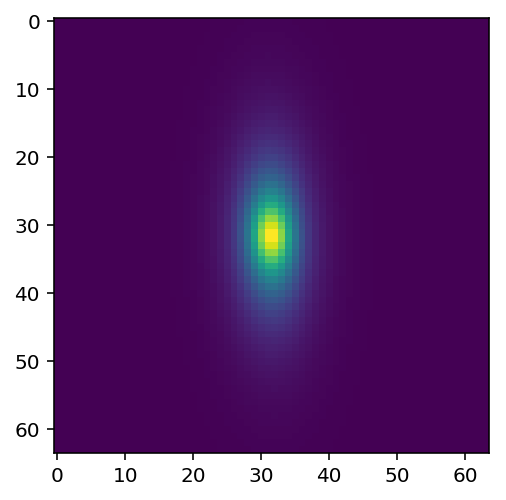

In [92]:
plt.imshow(galaxies[241][0][6])

In [5]:
df['e'] = np.sqrt(df['e1']**2+df['e2']**2)

1.6878863559729709


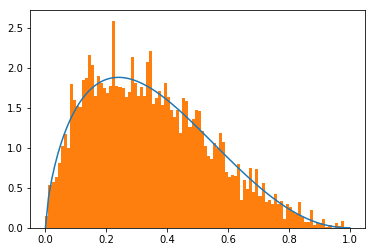

In [7]:
import scipy

e_fit = df['e'][np.logical_and(0.<df['e'], df['e']<1.)]
a, b,_,_ = scipy.stats.beta.fit(e_fit, floc=0., fscale=1.)
print(a, )

xx = np.linspace(0,1,100)
plt.plot(xx,scipy.stats.beta.pdf(xx, a=a, b=b))
_ = plt.hist(e_fit, bins=100, range=[0,1], normed=True)

In [18]:
training_or_test = 'validation'
data_dir = '/sps/lsst/users/barcelin/data/single_galaxies/28/'+training_or_test
root = 'galaxies_isolated_20191022'
count = 0

In [64]:
def compute_e(galaxies, count):
    PSF = galsim.Kolmogorov(fwhm=0.65)
    r_band = 6
    bands = [0,1,2,3,4,5,6,7,8,9]
    pix_scale = 0.2
    #final_epsf_image = PSF.drawImage(scale=0.2)

    psf_image = PSF.drawImage(nx=64, ny=64, scale=0.2)
    e = []
    weight = []
    error_list = []
    denormed_gal = denorm(galaxies[:,0], bands)
    print(denormed_gal.shape)
    for i in range(len(galaxies)):
        #print(i)
        try :
            gal_image = galsim.Image(denormed_gal[i][r_band,:,:])
            gal_image.scale = pix_scale

            # Measurements of shapes
            res = galsim.hsm.EstimateShear(gal_image, psf_image)
            e_beta_in = [np.sqrt(res.corrected_e1**2+res.corrected_e2**2)]

            if e_beta_in[0] > 1:
                #print('passe normalement')
                #e_beta_in = [np.nan]
                #e.append(e_beta_in)
                error_list.append(i)
                pass
            else:
                #print('ok')
                e.append(e_beta_in)
            #print(e_beta_in, 1 / scipy.stats.beta.pdf(e_beta_in, a=a, b=b))
        except :
            print('erreur')
            count += 1
            error_list.append(i)
            pass
        continue
    return np.array(e), count, error_list

In [66]:
weights = []
bands = [0,1,2,3,4,5,6,7,8,9]
for i in range (1):
    galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(i)), mmap_mode = 'c')
    
    # Compute e_beta
    e_beta_test, count, error_list = compute_e(galaxies, count)
    #print(e_beta_test.shape, error_list)
    
    norm(galaxies[:,0], bands)
    new_galaxies = np.delete(galaxies,error_list, axis = 0)
    #print(new_galaxies.shape)
    
    # Save weights transform e_beta distribution in a uniform distribution
    weights = 1 / scipy.stats.beta.pdf(e_beta_test, a=a, b=b)
    
    print(weights)#,e_beta_test
    np.save(data_dir+'/cropped/'+str('weights_v2_{}.npy'.format(i+1)),np.array(weights))
    np.save(data_dir+'/cropped/'+str('images_cropped_v2_{}.npy'.format(i+1)),new_galaxies)

(10000, 10, 64, 64)
[[0.86317211]
 [0.54960507]
 [0.56415088]
 ...
 [0.57144587]
 [1.99989287]
 [0.8541541 ]]


In [76]:
np.save(data_dir+'/cropped/'+str('weights_v2_{}.npy'.format(i+1)),np.clip(weights,0,1))
np.save(data_dir+'/cropped/'+str('images_cropped_v2_{}.npy'.format(i+1)),new_galaxies)

2048839345.1546862

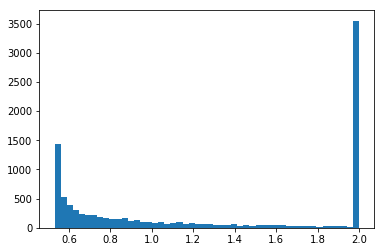

In [75]:
_ = plt.hist(np.clip(weights,0,2), bins = 50)
np.max(weights)